In [3]:
import requests
import time
from multiprocessing import cpu_count
from multiprocessing.pool import ThreadPool
import zipfile
from zipfile import ZipFile
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [2]:
# all zip files from web

urls = ['https://s3.amazonaws.com/hubway-data/201901-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/201902-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/201903-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/201904-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/201905-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/201906-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/201907-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/201908-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/201909-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/201910-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/201911-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/201912-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202001-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202002-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202003-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202004-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202005-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202006-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202007-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202008-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202009-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202010-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202011-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202012-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202101-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202102-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202103-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202104-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202105-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202106-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202107-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202108-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202109-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202110-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202111-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202112-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202201-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202202-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202203-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202204-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202205-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202206-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202207-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202208-bluebikes-tripdata.zip',
'https://s3.amazonaws.com/hubway-data/202209-bluebikes-tripdata.zip']


In [3]:
# all zip files downloaded

fns = ['./201901-bluebikes-tripdata.zip',
'./201902-bluebikes-tripdata.zip',
'./201903-bluebikes-tripdata.zip',
'./201904-bluebikes-tripdata.zip',
'./201905-bluebikes-tripdata.zip',
'./201906-bluebikes-tripdata.zip',
'./201907-bluebikes-tripdata.zip',
'./201908-bluebikes-tripdata.zip',
'./201909-bluebikes-tripdata.zip',
'./201910-bluebikes-tripdata.zip',
'./201911-bluebikes-tripdata.zip',
'./201912-bluebikes-tripdata.zip',
'./202001-bluebikes-tripdata.zip',
'./202002-bluebikes-tripdata.zip',
'./202003-bluebikes-tripdata.zip',
'./202004-bluebikes-tripdata.zip',
'./202005-bluebikes-tripdata.zip',
'./202006-bluebikes-tripdata.zip',
'./202007-bluebikes-tripdata.zip',
'./202008-bluebikes-tripdata.zip',
'./202009-bluebikes-tripdata.zip',
'./202010-bluebikes-tripdata.zip',
'./202011-bluebikes-tripdata.zip',
'./202012-bluebikes-tripdata.zip',
'./202101-bluebikes-tripdata.zip',
'./202102-bluebikes-tripdata.zip',
'./202103-bluebikes-tripdata.zip',
'./202104-bluebikes-tripdata.zip',
'./202105-bluebikes-tripdata.zip',
'./202106-bluebikes-tripdata.zip',
'./202107-bluebikes-tripdata.zip',
'./202108-bluebikes-tripdata.zip',
'./202109-bluebikes-tripdata.zip',
'./202110-bluebikes-tripdata.zip',
'./202111-bluebikes-tripdata.zip',
'./202112-bluebikes-tripdata.zip',
'./202201-bluebikes-tripdata.zip',
'./202202-bluebikes-tripdata.zip',
'./202203-bluebikes-tripdata.zip',
'./202204-bluebikes-tripdata.zip',
'./202205-bluebikes-tripdata.zip',
'./202206-bluebikes-tripdata.zip',
'./202207-bluebikes-tripdata.zip',
'./202208-bluebikes-tripdata.zip',
'./202209-bluebikes-tripdata.zip']

In [4]:
inputs = zip(urls, fns)

In [5]:
def download_url(args):
    t0 = time.time()
    url, fn = args[0], args[1]
    try:
        r = requests.get(url)
        with open(fn, 'wb') as f:
            f.write(r.content)
        return(url, time.time() - t0)
    except Exception as e:
        print('Exception in download_url():', e)

In [6]:
t0 = time.time()
for i in inputs:
    result = download_url(i)
    print('url:', result[0], 'time:', result[1])
print('Total time:', time.time() - t0)

url: https://s3.amazonaws.com/hubway-data/201901-bluebikes-tripdata.zip time: 2.494626045227051
url: https://s3.amazonaws.com/hubway-data/201902-bluebikes-tripdata.zip time: 1.576200008392334
url: https://s3.amazonaws.com/hubway-data/201903-bluebikes-tripdata.zip time: 0.5806663036346436
url: https://s3.amazonaws.com/hubway-data/201904-bluebikes-tripdata.zip time: 3.7217648029327393
url: https://s3.amazonaws.com/hubway-data/201905-bluebikes-tripdata.zip time: 3.5116469860076904
url: https://s3.amazonaws.com/hubway-data/201906-bluebikes-tripdata.zip time: 0.9560408592224121
url: https://s3.amazonaws.com/hubway-data/201907-bluebikes-tripdata.zip time: 0.9273080825805664
url: https://s3.amazonaws.com/hubway-data/201908-bluebikes-tripdata.zip time: 0.9557816982269287
url: https://s3.amazonaws.com/hubway-data/201909-bluebikes-tripdata.zip time: 1.0943961143493652
url: https://s3.amazonaws.com/hubway-data/201910-bluebikes-tripdata.zip time: 5.1537230014801025
url: https://s3.amazonaws.com/hu

In [7]:
# extracting files from all zip folders

for file in os.listdir(os.getcwd()):   # get the list of files
    if zipfile.is_zipfile(file): # if it is a zipfile, extract it
        with zipfile.ZipFile(file) as item: # treat the file as a zip
           item.extractall()  # extract it in the working directory

In [37]:
# reading all csv files

path = os.getcwd()
all_files = glob.glob(os.path.join(path, "*.csv"))
all_files

['/Users/dvjsh95/Documents/6205_project/202007-bluebikes-tripdata.csv',
 '/Users/dvjsh95/Documents/6205_project/202101-bluebikes-tripdata.csv',
 '/Users/dvjsh95/Documents/6205_project/202106-bluebikes-tripdata.csv',
 '/Users/dvjsh95/Documents/6205_project/201911-bluebikes-tripdata.csv',
 '/Users/dvjsh95/Documents/6205_project/202009-bluebikes-tripdata.csv',
 '/Users/dvjsh95/Documents/6205_project/201912-bluebikes-tripdata.csv',
 '/Users/dvjsh95/Documents/6205_project/202105-bluebikes-tripdata.csv',
 '/Users/dvjsh95/Documents/6205_project/202003-bluebikes-tripdata.csv',
 '/Users/dvjsh95/Documents/6205_project/202108-bluebikes-tripdata.csv',
 '/Users/dvjsh95/Documents/6205_project/202102-bluebikes-tripdata.csv',
 '/Users/dvjsh95/Documents/6205_project/202004-bluebikes-tripdata.csv',
 '/Users/dvjsh95/Documents/6205_project/202103-bluebikes-tripdata.csv',
 '/Users/dvjsh95/Documents/6205_project/202005-bluebikes-tripdata.csv',
 '/Users/dvjsh95/Documents/6205_project/202109-bluebikes-tripdat

In [38]:
# making a list of all dataframes

df = []
for item in all_files:
    df.append(pd.read_csv(item))

In [39]:
# checking size of all dataframes

for i in range(0,len(df)):
    print(df[i].shape)

(259726, 14)
(71805, 14)
(311969, 14)
(190759, 15)
(307853, 14)
(92208, 15)
(270893, 14)
(107350, 15)
(357338, 14)
(60447, 14)
(46793, 15)
(139046, 14)
(124879, 14)
(432254, 14)
(187816, 14)
(133235, 15)
(289033, 14)
(305504, 15)
(128598, 15)
(309403, 14)
(191843, 14)
(143300, 14)
(223084, 15)
(487201, 14)
(110460, 14)
(337519, 15)
(80466, 15)
(350660, 14)
(69872, 15)
(248424, 14)
(388531, 14)
(274083, 15)
(250925, 14)
(81613, 14)
(399182, 14)
(317028, 15)
(430585, 14)
(161712, 14)
(274264, 14)
(102369, 15)
(74002, 14)
(363185, 15)
(182421, 14)
(601049, 14)
(166694, 15)


In [42]:
# fetching filenames

filename = []
for item in all_files:
    filename.append(os.path.basename(item))

In [43]:
# extracting date from filenames

date = []
for index, item in enumerate(filename):
    date.append(filename[index].split('-')[0])

In [44]:
date

['202007',
 '202101',
 '202106',
 '201911',
 '202009',
 '201912',
 '202105',
 '202003',
 '202108',
 '202102',
 '202004',
 '202103',
 '202005',
 '202109',
 '202104',
 '202002',
 '202008',
 '201910',
 '202001',
 '202107',
 '202006',
 '202112',
 '201905',
 '202208',
 '202202',
 '201908',
 '201902',
 '202205',
 '201901',
 '202010',
 '202206',
 '201906',
 '202111',
 '202201',
 '202110',
 '201907',
 '202207',
 '202011',
 '202204',
 '201903',
 '202012',
 '201909',
 '202203',
 '202209',
 '201904']

In [45]:
# extracting year and month in two separate lists from date list

year = []
month = []
for item in date:
    year.append(item[0:4])
    month.append(item[4:6])

In [46]:
# making duplicate dataframe list for testing

df1 = df

In [47]:
# adding year and month col to all dataframes of df1 list

for i, df in enumerate(df1):
    df['year'] = year[i]
    df['month'] = month[i]

# for i, df in enumerate(df1):
# df['year'] = [year[i]] * len(df)
# df['month'] = [month[i]] * len(df)

In [48]:
# checking columns of all dataframes

for i in range(0,len(df1)):
    print(year[i],df1[i].columns)

2020 Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'postal code', 'year', 'month'],
      dtype='object')
2021 Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'postal code', 'year', 'month'],
      dtype='object')
2021 Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'postal code', 'year', 'month'],
  

In [49]:
# checking size of all dataframes

for i in range(0,len(df1)):
    print(df1[i].shape)

(259726, 16)
(71805, 16)
(311969, 16)
(190759, 17)
(307853, 16)
(92208, 17)
(270893, 16)
(107350, 17)
(357338, 16)
(60447, 16)
(46793, 17)
(139046, 16)
(124879, 16)
(432254, 16)
(187816, 16)
(133235, 17)
(289033, 16)
(305504, 17)
(128598, 17)
(309403, 16)
(191843, 16)
(143300, 16)
(223084, 17)
(487201, 16)
(110460, 16)
(337519, 17)
(80466, 17)
(350660, 16)
(69872, 17)
(248424, 16)
(388531, 16)
(274083, 17)
(250925, 16)
(81613, 16)
(399182, 16)
(317028, 17)
(430585, 16)
(161712, 16)
(274264, 16)
(102369, 17)
(74002, 16)
(363185, 17)
(182421, 16)
(601049, 16)
(166694, 17)


In [50]:
# checking total no of rows of all dataframes
a = 0
for i in range(0,len(df1)):
    a = a + (df1[i].shape[0])
a

10437381

In [51]:
# merging all dataframes in the df1 list

from functools import reduce                
df2 = reduce(lambda left, right:
                     pd.merge(left , right, how = "outer"), df1)
df2.head(30)  

tripduration                 starttime                  stoptime  \
0            259  2020-07-01 00:01:15.0430  2020-07-01 00:05:34.1010   
1            436  2020-07-01 00:03:39.1810  2020-07-01 00:10:55.4600   
2           1346  2020-07-01 00:04:27.0790  2020-07-01 00:26:53.2030   
3           2069  2020-07-01 00:04:56.0140  2020-07-01 00:39:25.1100   
4           1266  2020-07-01 00:05:43.0180  2020-07-01 00:26:49.0580   
5            619  2020-07-01 00:06:15.2100  2020-07-01 00:16:34.8210   
6            609  2020-07-01 00:11:47.9180  2020-07-01 00:21:57.1630   
7            317  2020-07-01 00:12:27.9800  2020-07-01 00:17:45.4300   
8            982  2020-07-01 00:12:35.8620  2020-07-01 00:28:57.9650   
9            685  2020-07-01 00:13:14.5580  2020-07-01 00:24:40.3450   
10           530  2020-07-01 00:14:48.8550  2020-07-01 00:23:39.3590   
11           425  2020-07-01 00:16:26.5010  2020-07-01 00:23:32.0390   
12          1324  2020-07-01 00:17:36.6400  2020-07-01 00:39:41.0780   
13          1253  2020-07-01 00:17:43.9070  2020-07-01 00:38:37.2460   
14          1289  2020-07-01 00:17:46.9430  2020-07-01 00:39:16.6330   
15          2893  2020-07-01 00:17:56.0300  2020-07-01 01:06:09.2490   
16          1480  2020-07-01 00:18:52.2550  2020-07-01 00:43:32.7810   
17           663  2020-07-01 00:19:10.6680  2020-07-01 00:30:14.2670   
18           658  2020-07-01 00:19:45.0690  2020-07-01 00:30:43.1040   
19          2747  2020-07-01 00:20:15.5830  2020-07-01 01:06:03.0200   
20           420  2020-07-01 00:21:01.8650  2020-07-01 00:28:02.4900   
21           411  2020-07-01 00:21:08.0970  2020-07-01 00:27:59.1890   
22           527  2020-07-01 00:21:36.1090  2020-07-01 00:30:23.3770   
23           696  2020-07-01 00:22:21.5180  2020-07-01 00:33:57.5260   
24           927  2020-07-01 00:24:38.0270  2020-07-01 00:40:05.4480   
25          2938  2020-07-01 00:24:39.9590  2020-07-01 01:13:38.4900   
26           214  2020-07-01 00:24:48.2970  2020-07-01 00:28:23.1190   
27          2247  2020-07-01 00:25:42.4690  2020-07-01 01:03:09.6330   
28          3887  2020-07-01 00:27:21.6630  2020-07-01 01:32:09.4070   
29          3862  2020-07-01 00:27:43.3060  2020-07-01 01:32:06.0960   

    start station id                                 start station name  \
0                 16        Back Bay T Stop - Dartmouth St at Stuart St   
1                  6                             Cambridge St at Joy St   
2                404                                 Mass Ave T Station   
3                436                       Maverick St at Massport Path   
4                404                                 Mass Ave T Station   
5                 20                 Aquarium T Stop - 200 Atlantic Ave   
6                227                                         Silber Way   
7                335            Harvard St at Greene-Rose Heritage Park   
8                  3  Colleges of the Fenway - Fenway at Avenue Loui...   
9                436                       Maverick St at Massport Path   
10                76  Central Sq Post Office / Cambridge City Hall a...   
11               282                                 Stony Brook T Stop   
12                67                       MIT at Mass Ave / Amherst St   
13                67                       MIT at Mass Ave / Amherst St   
14                67                       MIT at Mass Ave / Amherst St   
15               186                        Congress St at Northern Ave   
16               370                         Dartmouth St at Newbury St   
17                32         Landmark Center - Brookline Ave at Park Dr   
18               150                     State Street at Channel Center   
19               186                        Congress St at Northern Ave   
20               150                     State Street at Channel Center   
21               150                     State Street at Channel Center   
22                29     Innovation Lab - 125 

In [52]:
df2.shape

(10437381, 18)

In [53]:
df2.tail(30)

tripduration                 starttime                  stoptime  \
10437351           750  2019-04-30 23:31:13.6450  2019-04-30 23:43:43.7110   
10437352           869  2019-04-30 23:31:24.3580  2019-04-30 23:45:53.5880   
10437353           552  2019-04-30 23:31:24.9610  2019-04-30 23:40:37.7100   
10437354           559  2019-04-30 23:31:50.7750  2019-04-30 23:41:09.9670   
10437355           527  2019-04-30 23:32:23.2010  2019-04-30 23:41:10.3960   
10437356           354  2019-04-30 23:33:24.5800  2019-04-30 23:39:19.5050   
10437357           609  2019-04-30 23:33:26.4980  2019-04-30 23:43:35.6570   
10437358           235  2019-04-30 23:35:59.0540  2019-04-30 23:39:54.1430   
10437359           599  2019-04-30 23:36:13.9690  2019-04-30 23:46:13.3340   
10437360          1035  2019-04-30 23:38:17.3280  2019-04-30 23:55:32.6190   
10437361           495  2019-04-30 23:38:59.4630  2019-04-30 23:47:15.3300   
10437362           318  2019-04-30 23:39:48.6720  2019-04-30 23:45:07.1720   
10437363          1064  2019-04-30 23:40:34.6780  2019-04-30 23:58:19.3750   
10437364           243  2019-04-30 23:41:03.3800  2019-04-30 23:45:06.5810   
10437365           783  2019-04-30 23:45:03.8610  2019-04-30 23:58:07.6600   
10437366           543  2019-04-30 23:45:51.6080  2019-04-30 23:54:55.5270   
10437367           868  2019-04-30 23:46:20.9050  2019-05-01 00:00:49.8230   
10437368           286  2019-04-30 23:46:59.6000  2019-04-30 23:51:45.8890   
10437369           473  2019-04-30 23:47:29.4750  2019-04-30 23:55:22.8510   
10437370           355  2019-04-30 23:48:11.7540  2019-04-30 23:54:06.8850   
10437371           773  2019-04-30 23:49:48.8050  2019-05-01 00:02:41.9220   
10437372           761  2019-04-30 23:49:55.2000  2019-05-01 00:02:36.8520   
10437373           313  2019-04-30 23:51:32.6790  2019-04-30 23:56:46.3170   
10437374           191  2019-04-30 23:53:00.1080  2019-04-30 23:56:11.6620   
10437375          1197  2019-04-30 23:54:13.3930  2019-05-01 00:14:11.1860   
10437376           544  2019-04-30 23:54:34.0020  2019-05-01 00:03:38.2640   
10437377           307  2019-04-30 23:54:37.1180  2019-04-30 23:59:44.8890   
10437378           165  2019-04-30 23:55:08.8940  2019-04-30 23:57:54.1520   
10437379          1213  2019-04-30 23:55:37.7250  2019-05-01 00:15:51.1010   
10437380           250  2019-04-30 23:57:59.0790  2019-05-01 00:02:09.6080   

          start station id                                 start station name  \
10437351               233                                          St Mary's   
10437352               233                                          St Mary's   
10437353                36        Copley Square - Dartmouth St at Boylston St   
10437354                36        Copley Square - Dartmouth St at Boylston St   
10437355               379                         Tremont St at W. Dedham St   
10437356                 9                    Commonwealth Ave at Agganis Way   
10437357                 9                    Commonwealth Ave at Agganis Way   
10437358               239                     Community Path at Cedar Street   
10437359                41  Packard's Corner - Commonwealth Ave at Brighto...   
10437360               122                    Burlington Ave at Brookline Ave   
10437361                24      Seaport Square - Seaport Blvd at Northern Ave   
10437362                24      Seaport Square - Seaport Blvd at Northern Ave   
10437363                39                        Washington St at Rutland St   
10437364                24      Seaport Square - Seaport Blvd at Northern Ave   
10437365                 4                        Tremont St at E Berkeley St   
10437366               104  Harvard University Radcliffe Quadrangle at She...   
10437367                53                     Beacon St at Massachusetts Ave   
10437368               333                                   699 Mt Auburn St   
10437369                 4                        Tr

In [54]:
df3 = df2[['tripduration', 
           'starttime', 
           'stoptime', 
           'start station id',
           'start station name', 
           'start station latitude',
           'start station longitude', 
           'end station id', 
           'end station name',
           'end station latitude', 
           'end station longitude', 
           'bikeid', 
           'usertype', 
           'year', 
           'month']]

In [55]:
df3.sort_values(by=['year','month'])

tripduration                 starttime                  stoptime  \
6051442            371  2019-01-01 00:09:13.7980  2019-01-01 00:15:25.3360   
6051443            264  2019-01-01 00:33:56.1820  2019-01-01 00:38:20.8800   
6051444            458  2019-01-01 00:41:54.6000  2019-01-01 00:49:33.2730   
6051445            364  2019-01-01 00:43:32.5710  2019-01-01 00:49:37.4260   
6051446            681  2019-01-01 00:49:56.4640  2019-01-01 01:01:17.7010   
...                ...                       ...                       ...   
10270682           331  2022-09-30 23:58:32.6410  2022-10-01 00:04:03.8890   
10270683           763  2022-09-30 23:58:49.0850  2022-10-01 00:11:33.0830   
10270684          1706  2022-09-30 23:58:55.7160  2022-10-01 00:27:21.8670   
10270685           427  2022-09-30 23:59:04.2950  2022-10-01 00:06:11.8020   
10270686           523  2022-09-30 23:59:05.1410  2022-10-01 00:07:48.1930   

          start station id                          start station name  \
6051442                 80     MIT Stata Center at Vassar St / Main St   
6051443                117                        Binney St / Sixth St   
6051444                 68       Central Square at Mass Ave / Essex St   
6051445                 89  Harvard Law School at Mass Ave / Jarvis St   
6051446                 73     Harvard Square at Brattle St / Eliot St   
...                    ...                                         ...   
10270682               558              St. Alphonsus St at Tremont St   
10270683                23              Boston City Hall - 28 State St   
10270684               115                       Porter Square Station   
10270685                26                 Washington St at Waltham St   
10270686               446                       700 Commonwealth Ave.   

          start station latitude  start station longitude  end station id  \
6051442                42.362131               -71.091156             179   
6051443                42.366162               -71.086883             189   
6051444                42.365070               -71.103100              96   
6051445                42.379011               -71.119945             334   
6051446                42.373231               -71.120886             367   
...                          ...                      ...             ...   
10270682               42.333293               -71.101246               5   
10270683               42.358920               -71.057629              31   
10270684               42.387995               -71.119084             437   
10270685               42.341575               -71.068904              21   
10270686               42.349609               -71.103915              53   

                                           end station name  \
6051442                                       MIT Vassar St   
6051443                                           Kendall T   
6051444   Cambridge Main Library at Broadway / Trowbridg...   
6051445                           Mass Ave at Hadley/Walden   
6051446                           Vassal Lane at Tobin/VLUS   
...                                                     ...   
10270682        Northeastern University - North Parking Lot   
10270683          Seaport Hotel - Congress St at Seaport Ln   
10270684               Berkshire Street at Cambridge Street   
10270685             Prudential Center - 101 Huntington Ave   
10270686                     Beacon St at Massachusetts Ave   

          end station latitude  end station longitude  bikeid    usertype  \
6051442              42.355601             -71.103945    3689  Subscriber   
6051443              42.362428             -71.084955    4142  Subscriber   
6051444              42.373379             -71.111075    1628  Subscriber   
6051445              42.391210             -71.122608    2969  Subscriber   
6051446              42.383932             -71.139613    3469  Subscriber   
...                        ...          

In [507]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df3, title = 'profile')
profile.to_file('ProfileReport.html')

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/multimethod/__init__.py:312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
# bikes used by each usertype in each month and year

df4 = pd.DataFrame(df3.groupby(by=['usertype','year','month'])['bikeid'].count())
df4.reset_index(inplace=True)
df4.rename(columns={'bikeid': 'total_demand'}, inplace=True)
df4

usertype  year month  total_demand
0     Customer  2019    01          4782
1     Customer  2019    02          6775
2     Customer  2019    03         14523
3     Customer  2019    04         34814
4     Customer  2019    05         51997
..         ...   ...   ...           ...
85  Subscriber  2022    05        234701
86  Subscriber  2022    06        265992
87  Subscriber  2022    07        291377
88  Subscriber  2022    08        373065
89  Subscriber  2022    09        514753

[90 rows x 4 columns]

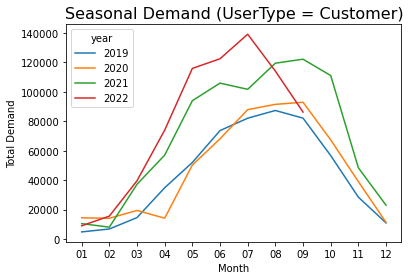

In [60]:
# plotting seasonal demand for usertype = customer

sns.lineplot(data = df4[(df4['usertype'] == 'Customer')], x = 'month',y = 'total_demand', hue = 'year')
plt.title("Seasonal Demand (UserType = Customer)", fontsize = 16)
plt.ylabel('Total Demand', fontsize = 10)
plt.xlabel('Month', fontsize = 10)
plt.savefig('seasonal_demand_customer.jpg', bbox_inches ="tight")

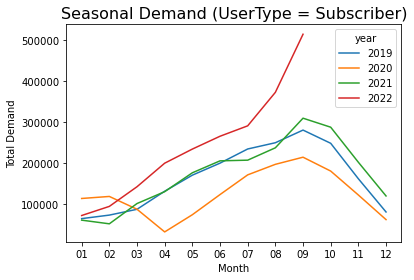

In [61]:
# plotting seasonal demand for usertype = Subscriber

sns.lineplot(data = df4[(df4['usertype'] == 'Subscriber')], x = 'month',y = 'total_demand', hue = 'year')
plt.title("Seasonal Demand (UserType = Subscriber)", fontsize = 16)
plt.ylabel('Total Demand', fontsize = 10)
plt.xlabel('Month', fontsize = 10)
plt.savefig('seasonal_demand_subscriber.jpg', bbox_inches ="tight")

Text(0.5, 0, 'Month')

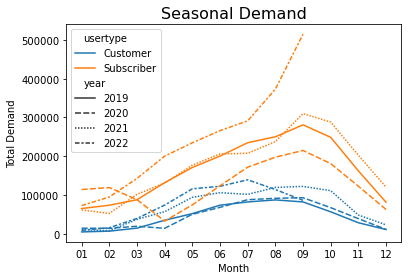

In [304]:
# # combined plot

# sns.lineplot(data = df4, x = 'month',y = 'total_demand', hue = 'usertype', style = 'year')
# plt.title("Seasonal Demand", fontsize = 16)
# plt.ylabel('Total Demand', fontsize = 10)
# plt.xlabel('Month', fontsize = 10)

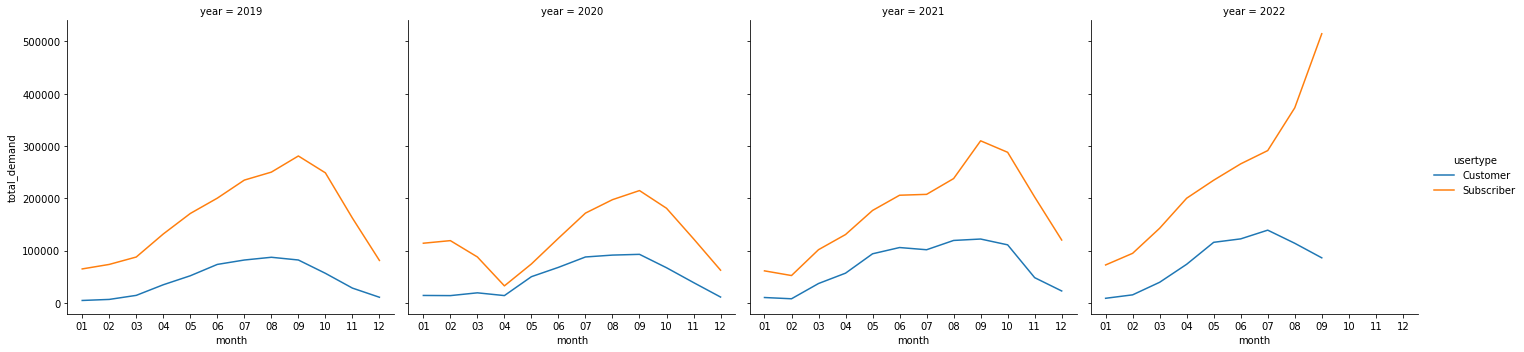

In [62]:
# year-wise plot for seasonal demand

sns.relplot(data = df4, x = 'month',y = 'total_demand', col = 'year', hue = 'usertype', kind = 'line')
plt.savefig('demand_per_year.jpg', bbox_inches ="tight")

In [63]:
# exporting file (not necessary)

df4.to_csv("seasonal_demand_per_usertype.csv", index = False)

In [64]:
# bikes used per station

df5 = pd.DataFrame(df3.groupby(by=['start station id','start station name','start station latitude', 
                                   'start station longitude', 'end station id', 'end station name', 
                                   'end station latitude', 'end station longitude', 'usertype'])['bikeid'].count())
df5.reset_index(inplace=True)
df5.rename(columns={'bikeid': 'total_demand'}, inplace=True)
df5

start station id               start station name  \
0                      1            18 Dorrance Warehouse   
1                      1            18 Dorrance Warehouse   
2                      1            18 Dorrance Warehouse   
3                      1            18 Dorrance Warehouse   
4                      1            18 Dorrance Warehouse   
...                  ...                              ...   
253574               583  Broad Canal Way at Third Street   
253575               583  Broad Canal Way at Third Street   
253576               583  Broad Canal Way at Third Street   
253577               583  Broad Canal Way at Third Street   
253578               583  Broad Canal Way at Third Street   

        start station latitude  start station longitude  end station id  \
0                    42.387151               -71.075978               1   
1                    42.387151               -71.075978              15   
2                    42.387151               -71.075978              23   
3                    42.387151               -71.075978              29   
4                    42.387151               -71.075978              35   
...                        ...                      ...             ...   
253574               42.363045               -71.082871             400   
253575               42.363045               -71.082871             408   
253576               42.363045               -71.082871             413   
253577               42.363045               -71.082871             515   
253578               42.363045               -71.082871             566   

                                      end station name  end station latitude  \
0                                18 Dorrance Warehouse             42.387151   
1                     Brighton Mills - 370 Western Ave             42.361546   
2                       Boston City Hall - 28 State St             42.358920   
3       Innovation Lab - 125 Western Ave at Batten Way             42.363145   
4                               Arch St at Franklin St             42.355335   
...                                                ...                   ...   
253574                                Lansdowne T Stop             42.347345   
253575                        Edgerly Education Center             42.387175   
253576         Kennedy-Longfellow School 158 Spring St             42.369553   
253577                                    955 Mass Ave             42.368952   
253578     Main Street/Albany Street/Technology Square             42.362902   

        end station longitude    usertype  total_demand  
0                  -71.075978  Subscriber            50  
1                  -71.137762  Subscriber             1  
2                  -71.057629  Subscriber             1  
3                  -71.122986  Subscriber             1  
4                  -71.058229  Subscriber             1  
...                       ...         ...           ...  
253574             -71.100168  Subscriber             1  
253575             -71.087144  Subscriber             1  
253576             -71.085790  Subscriber             3  
253577             -71.109988  Subscriber             1  
253578             -71.091567  Subscriber             1  

[253579 rows x 10 columns]

In [65]:
# exporting dataframe to excel file (not necessary)

df5.to_csv("demand_between_stations.csv", index = False)

In [66]:
# adding period column for forecasting

df4['period'] = pd.to_datetime(df4['year']+df4['month'], format='%Y%m')
df4.head()

usertype  year month  total_demand     period
0  Customer  2019    01          4782 2019-01-01
1  Customer  2019    02          6775 2019-02-01
2  Customer  2019    03         14523 2019-03-01
3  Customer  2019    04         34814 2019-04-01
4  Customer  2019    05         51997 2019-05-01

In [94]:
# using package AutoTS for time series forecasting for Customer demand for 6 months (Oct, 2022 - March, 2023)

from autots import AutoTS
model = AutoTS(forecast_length = 6, frequency = 'infer', ensemble = 'simple')
model = model.fit((df4[df4['usertype']=='Customer']), date_col= 'period', value_col = 'total_demand', id_col = None)
prediction = model.predict()

# make predictions

forecast1 = prediction.forecast
print("Demand Forecast")
print(forecast1)
plt.show()

Inferred frequency is: MS
Model Number: 1 with model ARIMA in generation 0 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18562D+01    |proj g|=  2.20609D+00

At iterate    1    f=  1.07686D+01    |proj g|=  8.64347D-01

At iterate    2    f=  1.06210D+01    |proj g|=  6.02109D-01

At iterate    3    f=  1.05925D+01    |proj g|=  1.69535D-01

At iterate    4    f=  1.05772D+01    |proj g|=  1.06728D-01

At iterate    5    f=  1.05641D+01    |proj g|=  8.20991D-02

At iterate    6    f=  1.05533D+01    |proj g|=  7.56715D-02

At iterate    7    f=  1.05498D+01    |proj g|=  9.33624D-02

At iterate    8    f=  1.05441D+01    |proj g|=  4.35806D-02

At iterate    9    f=  1.05337D+01    |proj g|=  5.87184D-02

At iterate   10    f=  1.05202D+01    |proj g|=  2.10769D-01

At iterate   11    f=  1.05122D+01    |proj g|=  3.66172D-02

At iter

 This problem is unconstrained.



At iterate   38    f=  1.04519D+01    |proj g|=  1.51576D-02

At iterate   39    f=  1.04517D+01    |proj g|=  1.69174D-02

At iterate   40    f=  1.04515D+01    |proj g|=  3.18464D-02

At iterate   41    f=  1.04509D+01    |proj g|=  5.82278D-02

At iterate   42    f=  1.04502D+01    |proj g|=  2.75161D-02

At iterate   43    f=  1.04498D+01    |proj g|=  5.15038D-02

At iterate   44    f=  1.04491D+01    |proj g|=  1.08877D-01

At iterate   45    f=  1.04482D+01    |proj g|=  2.43876D-02

At iterate   46    f=  1.04475D+01    |proj g|=  3.37360D-02

At iterate   47    f=  1.04469D+01    |proj g|=  3.94182D-02

At iterate   48    f=  1.04467D+01    |proj g|=  3.25883D-02

At iterate   49    f=  1.04466D+01    |proj g|=  5.66859D-02

At iterate   50    f=  1.04464D+01    |proj g|=  1.93709D-02

At iterate   51    f=  1.04463D+01    |proj g|=  4.87088D-02

At iterate   52    f=  1.04460D+01    |proj g|=  7.66560D-02

At iterate   53    f=  1.04456D+01    |proj g|=  5.44021D-02

At iter

Model Number: 2 with model ARIMA in generation 0 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08232D+01    |proj g|=  8.61754D-02

At iterate    1    f=  1.08131D+01    |proj g|=  1.55561D-01

At iterate    2    f=  1.08032D+01    |proj g|=  9.41621D-02

At iterate    3    f=  1.08004D+01    |proj g|=  2.42132D-02

At iterate    4    f=  1.07999D+01    |proj g|=  2.46452D-02

At iterate    5    f=  1.07993D+01    |proj g|=  2.06677D-02

At iterate    6    f=  1.07981D+01    |proj g|=  3.72565D-02

At iterate    7    f=  1.07970D+01    |proj g|=  3.70475D-02

At iterate    8    f=  1.07948D+01    |proj g|=  2.25981D-02

At iterate    9    f=  1.07928D+01    |proj g|=  2.40170D-02

At iterate   10    f=  1.07836D+01    |proj g|=  1.56551D-01

At iterate   11    f=  1.07830D+01    |proj g|=  1.60038D-01

At iterate   12    f=  1.07790D+0

 This problem is unconstrained.



At iterate   39    f=  1.07626D+01    |proj g|=  1.05109D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     39     47      1     0     0   1.051D-04   1.076D+01
  F =   10.762593814274258     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 3 with model ARIMA in generation 0 of 10


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.06648D+18    |proj g|=  1.55101D+23

At iterate    1    f=  1.36354D+12    |proj g|=  2.21534D+14

At iterate    2    f=  1.07209D+12    |proj g|=  1.54480D+14

At iterate    3    f=  6.74088D+11    |proj g|=  7.70504D+13

At iterate    4    f=  4.63288D+11    |proj g|=  4.39188D+13

At iterate    5    f=  3.07733D+11    |proj g|=  2.37897D+13

At iterate    6    f=  2.07036D+11    |proj g|=  1.31385D+13

At iterate    7    f=  1.38509D+11    |proj g|=  7.19808D+12

At iterate    8    f=  9.27656D+10    |proj g|=  3.95239D+12

At iterate    9    f=  6.20028D+10    |proj g|=  2.16555D+12

At iterate   10    f=  4.13748D+10    |proj g|=  1.18526D+12

At iterate   11    f=  2.75302D+10    |proj g|=  6.47213D+11

At iterate   12    f=  1.82470D+10    |proj g|=  3.52360D+11

At iterate   13    f=  1.2


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 9 with model DatepartRegression in generation 0 of 10
Model Number: 10 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 10: DatepartRegression
Model Number: 11 with model ETS in generation 0 of 10
Model Number: 12 with model ETS in generation 0 of 10
Model Number: 13 with model GLM in generation 0 of 10
Model Number: 14 with model GLM in generation 0 of 10
Model Number: 15 with model GLS in generation 0 of 10
Model Number: 16 with model GLS in generation 0 of 10
Model Number: 17 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 17: GluonTS
Model Number: 18 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 18: GluonTS
Model Number: 19

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda +

Model Number: 30 with model UnobservedComponents in generation 0 of 10
Model Number: 31 with model UnobservedComponents in generation 0 of 10
Model Number: 32 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 32: VAR
Model Number: 33 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 33: VAR
Model Number: 34 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 34: VECM
Model Number: 35 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 35: VECM
Model Number: 36 with model WindowRegression in generation 0 of 10
Model Number: 37 with model ConstantNaive in generation 0 of 10
Model Number: 38 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 38: FBProphet
Model Number: 39 with 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 41 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 41: MultivariateRegression
Model Number: 42 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 42: DatepartRegression
Model Number: 43 with model SeasonalNaive in generation 0 of 10
Model Number: 44 with model DatepartRegression in generation 0 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 45 with model UnobservedComponents in generation 0 of 10
Model Number: 46 with model UnobservedComponents in generation 0 of 10
Model Number: 47 with model ETS in generation 0 of 10
ETS error ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
ETS failed on total_demand with ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
Model Number: 48 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 48: VECM
Model Number: 49 with model ARDL in generation 0 of 10
Model Number: 50 with model MultivariateMotif in generation 0 of 10
Model Number: 51 with model MultivariateMotif in generation 0 of 10
Model Number: 52 with model UnivariateMotif in generation 0 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 52: UnivariateMotif
Mod

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 65 with model LastValueNaive in generation 0 of 10
Model Number: 66 with model AverageValueNaive in generation 0 of 10
Model Number: 67 with model GLS in generation 0 of 10
Model Number: 68 with model SeasonalNaive in generation 0 of 10
Model Number: 69 with model GLM in generation 0 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 69: GLM
Model Number: 70 with model ETS in generation 0 of 10
Model Number: 71 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 71: FBProphet
Model Number: 72 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 72: GluonTS
Model Number: 73 with model UnobservedComponents in generation 0 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:177: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 74 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 74: VAR
Model Number: 75 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 75: VECM
Model Number: 76 with model ARIMA in generation 0 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08171D+01    |proj g|=  4.11851D-01

At iterate    1    f=  1.06990D+01    |proj g|=  2.31964D-01

At iterate    2    f=  1.06734D+01    |proj g|=  1.48813D-01

At iterate    3    f=  1.06381D+01    |proj g|=  6.00731D-02

At iterate    4    f=  1.06248D+01    |proj g|=  5.02568D-02

At iterate    5    f=  1.06160D+01    |proj g|=  7.32889D-02

At iterate    6    f=  1.06139D+01    |proj g|=  4.66320D-02

At iterate    7    f=  1.06123D+01    |proj g|=  1.32627D-02

At it

 This problem is unconstrained.



At iterate   33    f=  1.05668D+01    |proj g|=  3.18592D-02

At iterate   34    f=  1.05637D+01    |proj g|=  2.29870D-02

At iterate   35    f=  1.05623D+01    |proj g|=  3.23129D-02

At iterate   36    f=  1.05592D+01    |proj g|=  3.62940D-02

At iterate   37    f=  1.05586D+01    |proj g|=  1.48011D-02

At iterate   38    f=  1.05584D+01    |proj g|=  4.10916D-03

At iterate   39    f=  1.05581D+01    |proj g|=  8.57150D-03

At iterate   40    f=  1.05580D+01    |proj g|=  6.02717D-03

At iterate   41    f=  1.05578D+01    |proj g|=  9.50695D-03

At iterate   42    f=  1.05575D+01    |proj g|=  7.65366D-03

At iterate   43    f=  1.05575D+01    |proj g|=  5.32021D-03

At iterate   44    f=  1.05574D+01    |proj g|=  3.56611D-03

At iterate   45    f=  1.05573D+01    |proj g|=  2.36442D-03

At iterate   46    f=  1.05573D+01    |proj g|=  8.10075D-03

At iterate   47    f=  1.05572D+01    |proj g|=  1.11501D-02

At iterate   48    f=  1.05569D+01    |proj g|=  1.55137D-02

At iter

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 80 with model MultivariateRegression in generation 0 of 10
Model Number: 81 with model UnivariateMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (6)') in model 81: UnivariateMotif
Model Number: 82 with model MultivariateMotif in generation 0 of 10
Model Number: 83 with model SectionalMotif in generation 0 of 10
Model Number: 84 with model NVAR in generation 0 of 10
Model Number: 85 with model Theta in generation 0 of 10
Model Number: 86 with model ARDL in generation 0 of 10
Model Number: 87 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 87: ARCH
Model Number: 88 with model MetricMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=99) out of bounds (30)') in model 88: MetricMotif
Model Number: 89 with model SeasonalityMotif in generation 0 of 10
Model Number: 90 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError(

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 109 with model AverageValueNaive in generation 0 of 10
Model Number: 110 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 110: SectionalMotif
Model Number: 111 with model SeasonalityMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=4) out of bounds (4)') in model 111: SeasonalityMotif
Model Number: 112 with model GLM in generation 0 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 112: GLM
Model Number: 113 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 113: VECM
Model Number: 114 with model UnobservedComponents in generation 0 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 115 with model SeasonalityMotif in generation 0 of 10
Model Number: 116 with model WindowRegression in generation 0 of 10
Model Number: 117 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 117: ARCH
Model Number: 118 with model MetricMotif in generation 0 of 10
Model Number: 119 with model GLM in generation 0 of 10
Model Number: 120 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 120: GluonTS
Model Number: 121 with model LastValueNaive in generation 0 of 10
Model Number: 122 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 122: UnobservedComponents
Model Number: 123 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regresso

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.73889e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 143 with model Theta in generation 0 of 10
Model Number: 144 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 144: MultivariateRegression
Model Number: 145 with model UnivariateMotif in generation 0 of 10
Model Number: 146 with model Theta in generation 0 of 10
Model Number: 147 with model ETS in generation 0 of 10
ETS error ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
ETS failed on total_demand with ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
Model Number: 148 with model MultivariateMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (20)') in model 148: MultivariateMotif
Model Number: 149 with model ConstantNaive in generation 0 of 10
Model Number: 150 with model SeasonalNaive

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(m

Model Number: 159 with model MetricMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=14) out of bounds (4)') in model 159: MetricMotif
Model Number: 160 with model UnobservedComponents in generation 0 of 10
Model Number: 161 with model SeasonalityMotif in generation 0 of 10
Model Number: 162 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (4)') in model 162: SectionalMotif
Model Number: 163 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 163: ARCH
Model Number: 164 with model SeasonalityMotif in generation 0 of 10
Model Number: 165 with model SeasonalityMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=9) out of bounds (4)') in model 165: SeasonalityMotif
Model Number: 166 with model NVAR in generation 0 of 10
Model Number: 167 with model DatepartRegression in generation 0 of 10
Model Number: 168 with model UnobservedCompon

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 176 with model MultivariateRegression in generation 0 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:    0.3s


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 176: MultivariateRegression
Model Number: 177 with model GLM in generation 0 of 10
Template Eval Error: PerfectSeparationError('Perfect separation detected, results not available') in model 177: GLM
Model Number: 178 with model ConstantNaive in generation 0 of 10


[Parallel(n_jobs=-2)]: Done 786 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.7s finished
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Model Number: 179 with model MultivariateMotif in generation 0 of 10
Model Number: 180 with model SeasonalityMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=99) out of bounds (4)') in model 180: SeasonalityMotif
Model Number: 181 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 181: VECM
Model Number: 182 with model SeasonalityMotif in generation 0 of 10
Model Number: 183 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 183: SectionalMotif
Model Number: 184 with model SeasonalNaive in generation 0 of 10
Model Number: 185 with model SectionalMotif in generation 0 of 10
Model Number: 186 with model SeasonalNaive in generation 0 of 10
Model Number: 187 with model SeasonalityMotif in generation 0 of 10
Model Number: 188 with model GLM in generation 0 of 10
Model Number: 189 with model Unobserved

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 203 with model LastValueNaive in generation 1 of 10
Model Number: 204 with model UnivariateRegression in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 204: UnivariateRegression
Model Number: 205 with model MultivariateMotif in generation 1 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (24)') in model 205: MultivariateMotif
Model Number: 206 with model MetricMotif in generation 1 of 10
Model Number: 207 with model ARDL in generation 1 of 10
Model Number: 208 with model MetricMotif in generation 1 of 10
Model Number: 209 with model UnivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 209: UnivariateRegression
Model Number: 210 with model ConstantNaive in generation 1 of 10
Model Number: 211 with model AverageValueNaive in generation 1 of 10
Model Number: 212 with model WindowRegression in generation 1 of 10
Mode

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 218 with model DatepartRegression in generation 1 of 10
Model Number: 219 with model ETS in generation 1 of 10
Model Number: 220 with model MetricMotif in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 221 with model UnivariateMotif in generation 1 of 10
Model Number: 222 with model MultivariateRegression in generation 1 of 10
Model Number: 223 with model SectionalMotif in generation 1 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (6)') in model 223: SectionalMotif
Model Number: 224 with model Theta in generation 1 of 10
Model Number: 225 with model UnivariateRegression in generation 1 of 10
Model Number: 226 with model MultivariateMotif in generation 1 of 10
Model Number: 227 with model ConstantNaive in generation 1 of 10
Model Number: 228 with model AverageValueNaive in generation 1 of 10
Template Eval Error: ValueError('Model AverageValueNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 228: AverageValueNaive
Model Number: 229 with model UnivariateRegression in generation 1 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 229: UnivariateRegression
Mo

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/window_functions.py:478: RuntimeWarning: invalid value encountered in true_divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages


Model Number: 236 with model MultivariateMotif in generation 1 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (24)') in model 236: MultivariateMotif
Model Number: 237 with model SectionalMotif in generation 1 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (29)') in model 237: SectionalMotif
Model Number: 238 with model MultivariateMotif in generation 1 of 10
Model Number: 239 with model NVAR in generation 1 of 10
Model Number: 240 with model DatepartRegression in generation 1 of 10
Model Number: 241 with model DatepartRegression in generation 1 of 10
Model Number: 242 with model ARIMA in generation 1 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.22899D-01    |proj g|=  3.56478D+00

At iterate    1    f=  4.61784D-01    |proj g|=  1.02147D+00

At iterate    2    f=  3.14605D-01    |proj g|=  2.92256D-01


 This problem is unconstrained.



At iterate   46    f= -8.19611D-02    |proj g|=  1.28276D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     74      1     0     0   1.283D-02  -8.196D-02
  F =  -8.1961104837382059E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 243 with model UnivariateRegression in generation 1 of 10
Model Number: 244 with model WindowRegression in generation 1 of 10
Model Number: 245 with model Theta in generation 1 of 10



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 246 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 246: DatepartRegression
Model Number: 247 with model MultivariateRegression in generation 1 of 10
Model Number: 248 with model SeasonalityMotif in generation 1 of 10
Model Number: 249 with model GLM in generation 1 of 10
Model Number: 250 with model AverageValueNaive in generation 1 of 10
Model Number: 251 with model GLM in generation 1 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 251: GLM
Model Number: 252 with model ARIMA in generation 1 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10719D+01    |proj g|=  1.30675D-01

At iterate    1    f=  1.10607D+01    |proj g|=  3.87449D-02

At iterate    2

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1342: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/d


Template Eval Error: LinAlgError('Singular matrix') in model 259: UnobservedComponents
Model Number: 260 with model AverageValueNaive in generation 1 of 10
Model Number: 261 with model AverageValueNaive in generation 1 of 10
Model Number: 262 with model DatepartRegression in generation 1 of 10
Model Number: 263 with model NVAR in generation 1 of 10
Model Number: 264 with model ETS in generation 1 of 10
Model Number: 265 with model DatepartRegression in generation 1 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 265: DatepartRegression
Model Number: 266 with model ConstantNaive in generation 1 of 10
Model Number: 267 with model AverageValueNaive in generation 1 of 10
Model Number: 268 with model UnobservedComponents in generation 1 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 269 with model SeasonalityMotif in generation 1 of 10
No anomalies detected.
Model Number: 270 with model SeasonalityMotif in generation 1 of 10
Model Number: 271 with model MultivariateMotif in generation 1 of 10
Model Number: 272 with model Theta in generation 1 of 10
Model Number: 273 with model GLM in generation 1 of 10
Model Number: 274 with model ConstantNaive in generation 1 of 10
Model Number: 275 with model SectionalMotif in generation 1 of 10
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 275: SectionalMotif
Model Number: 276 with model WindowRegression in generation 1 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 276: WindowRegression
Model Number: 277 with model AverageValueNaive in generation 1 of 10
Model Number: 278 with model MultivariateRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 279 with model DatepartRegression in generation 1 of 10
Model Number: 280 with model LastValueNaive in generation 1 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 281 with model ConstantNaive in generation 1 of 10
Model Number: 282 with model ARDL in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 282: ARDL
Model Number: 283 with model SectionalMotif in generation 1 of 10
Template Eval Error: ValueError('kth(=3) out of bounds (3)') in model 283: SectionalMotif
Model Number: 284 with model ARIMA in generation 1 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12010D+01    |proj g|=  1.11968D+00

At iterate    1    f=  1.10036D+01    |proj g|=  8.52083D-01

At iterate    2    f=  1.08669D+01    |proj g|=  7.51979D-01

At iterate    3    f=  1.07735D+01    |proj g|=  3.30655D-01

At iterate    4    f=  1.07241D+01    |proj g|=  2.28714D-01

At iterate    5    f=  1.06737D+01    |proj g|=  3.66762D-01

At iterate    6

 This problem is unconstrained.



At iterate   23    f=  1.02730D+01    |proj g|=  1.44614D-01

At iterate   24    f=  1.02707D+01    |proj g|=  9.83745D-02

At iterate   25    f=  1.02698D+01    |proj g|=  6.12165D-02

At iterate   26    f=  1.02684D+01    |proj g|=  3.85596D-02

At iterate   27    f=  1.02674D+01    |proj g|=  4.83692D-02

At iterate   28    f=  1.02633D+01    |proj g|=  1.57669D-01

At iterate   29    f=  1.02599D+01    |proj g|=  2.06057D-01

At iterate   30    f=  1.02537D+01    |proj g|=  1.23115D-01

At iterate   31    f=  1.02465D+01    |proj g|=  2.51914D-01

At iterate   32    f=  1.02428D+01    |proj g|=  1.21350D-01

At iterate   33    f=  1.02412D+01    |proj g|=  6.86448D-02

At iterate   34    f=  1.02387D+01    |proj g|=  7.06709D-02

At iterate   35    f=  1.02366D+01    |proj g|=  6.06129D-02

At iterate   36    f=  1.02349D+01    |proj g|=  4.94970D-02

At iterate   37    f=  1.02336D+01    |proj g|=  7.26775D-02

At iterate   38    f=  1.02335D+01    |proj g|=  4.15711D-02

At iter


At iterate  169    f=  1.01888D+01    |proj g|=  4.94040D-03

At iterate  170    f=  1.01888D+01    |proj g|=  3.36337D-03

At iterate  171    f=  1.01888D+01    |proj g|=  5.74634D-03

At iterate  172    f=  1.01888D+01    |proj g|=  7.53506D-03

At iterate  173    f=  1.01887D+01    |proj g|=  5.31472D-03

At iterate  174    f=  1.01887D+01    |proj g|=  9.11647D-03

At iterate  175    f=  1.01887D+01    |proj g|=  4.66391D-03

At iterate  176    f=  1.01887D+01    |proj g|=  1.21395D-02

At iterate  177    f=  1.01887D+01    |proj g|=  7.48781D-03

At iterate  178    f=  1.01887D+01    |proj g|=  3.23284D-03

At iterate  179    f=  1.01887D+01    |proj g|=  3.10060D-03

At iterate  180    f=  1.01887D+01    |proj g|=  4.27339D-03

At iterate  181    f=  1.01887D+01    |proj g|=  2.01748D-03

At iterate  182    f=  1.01886D+01    |proj g|=  2.94812D-03

At iterate  183    f=  1.01886D+01    |proj g|=  5.26278D-03

At iterate  184    f=  1.01886D+01    |proj g|=  8.61904D-03

At iter


At iterate   25    f=  1.08951D+01    |proj g|=  7.03327D-03

At iterate   26    f=  1.08950D+01    |proj g|=  8.71042D-03

At iterate   27    f=  1.08947D+01    |proj g|=  1.41455D-02

At iterate   28    f=  1.08946D+01    |proj g|=  2.35695D-02

At iterate   29    f=  1.08944D+01    |proj g|=  5.40087D-03

At iterate   30    f=  1.08944D+01    |proj g|=  1.72646D-03

At iterate   31    f=  1.08944D+01    |proj g|=  6.88717D-04

At iterate   32    f=  1.08944D+01    |proj g|=  8.52918D-05

At iterate   33    f=  1.08944D+01    |proj g|=  6.31454D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     33     36   

 This problem is unconstrained.
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in double_scalars
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 296 with model MultivariateRegression in generation 1 of 10
Model Number: 297 with model NVAR in generation 1 of 10
Model Number: 298 with model SectionalMotif in generation 1 of 10
Model Number: 299 with model UnobservedComponents in generation 1 of 10
Model Number: 300 with model UnivariateMotif in generation 1 of 10
Model Number: 301 with model ARIMA in generation 1 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.75856D+01    |proj g|=  1.32294D+01

At iterate    1    f=  1.11772D+01    |proj g|=  1.79856D-01

At iterate    2    f=  1.11554D+01    |proj g|=  1.93450D-01

At iterate    3    f=  1.10971D+01    |proj g|=  1.41074D-01

At iterate    4    f=  1.10799D+01    |proj g|=  8.80132D-02

At iterate    5    f=  1.10771D+01    |proj g|=  8.11866D-02

At iterate    6    f=  1.10746D+01    |proj g|=  7.42070D-02

At ite

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    7    f=  1.07282D+01    |proj g|=  3.96157D-02

At iterate    8    f=  1.07266D+01    |proj g|=  3.48198D-02

At iterate    9    f=  1.07249D+01    |proj g|=  1.99912D-02

At iterate   10    f=  1.07242D+01    |proj g|=  1.41229D-02

At iterate   11    f=  1.07230D+01    |proj g|=  2.23605D-02

At iterate   12    f=  1.07211D+01    |proj g|=  3.37389D-02

At iterate   13    f=  1.07203D+01    |proj g|=  3.20662D-02

At iterate   14    f=  1.07199D+01    |proj g|=  7.92650D-03

At iterate   15    f=  1.07197D+01    |proj g|=  1.28807D-02

At iterate   16    f=  1.07195D+01    |proj g|=  1.43327D-02

At iterate   17    f=  1.07193D+01    |proj g|=  3.24547D-02

At iterate   18    f=  1.07189D+01    |proj g|=  2.60727D-02

At iterate   19    f=  1.07183D+01    |proj g|=  1.04934D-02

At iterate   20    f=  1.07180D+01    |proj g|=  2.52865D-02

At iterate   21    f=  1.07178D+01    |proj g|=  4.69165D-03

At iterate   22    f=  1.07177D+01    |proj g|=  1.40109D-02

At iter

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1342: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/d

Model Number: 307 with model DatepartRegression in generation 1 of 10
Model Number: 308 with model AverageValueNaive in generation 1 of 10
Model Number: 309 with model ETS in generation 1 of 10
Model Number: 310 with model LastValueNaive in generation 1 of 10
Model Number: 311 with model SeasonalNaive in generation 1 of 10
Model Number: 312 with model MultivariateMotif in generation 1 of 10
Model Number: 313 with model Theta in generation 1 of 10
Model Number: 314 with model UnivariateMotif in generation 1 of 10
Template Eval Error: ValueError('The number of observations (7) is too small; the covariance matrix is singular. For observations with 28 dimensions, at least 29 observations are required.') in model 314: UnivariateMotif
Model Number: 315 with model SeasonalityMotif in generation 1 of 10
Model Number: 316 with model SeasonalityMotif in generation 1 of 10
Model Number: 317 with model ConstantNaive in generation 1 of 10
Model Number: 318 with model SeasonalNaive in generation 1 o

 This problem is unconstrained.



At iterate   47    f= -8.31288D-01    |proj g|=  1.06045D-01

At iterate   48    f= -8.31443D-01    |proj g|=  9.19745D-02

At iterate   49    f= -8.31709D-01    |proj g|=  6.66227D-02

At iterate   50    f= -8.32314D-01    |proj g|=  3.63595D-02

At iterate   51    f= -8.32741D-01    |proj g|=  2.85790D-02

At iterate   52    f= -8.33191D-01    |proj g|=  1.14193D-01

At iterate   53    f= -8.33618D-01    |proj g|=  4.71325D-02

At iterate   54    f= -8.33787D-01    |proj g|=  2.60893D-02

At iterate   55    f= -8.34113D-01    |proj g|=  1.42247D-02

At iterate   56    f= -8.34292D-01    |proj g|=  2.74172D-01

At iterate   57    f= -8.34854D-01    |proj g|=  8.83278D-02

At iterate   58    f= -8.35024D-01    |proj g|=  1.34028D-02

At iterate   59    f= -8.35089D-01    |proj g|=  1.01604D-02

At iterate   60    f= -8.35095D-01    |proj g|=  4.16484D-02

At iterate   61    f= -8.35115D-01    |proj g|=  3.54720D-02

At iterate   62    f= -8.35195D-01    |proj g|=  2.24227D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


Model Number: 331 with model ARIMA in generation 2 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06200D+01    |proj g|=  2.74035D-01

At iterate    1    f=  1.05453D+01    |proj g|=  8.45155D-02

At iterate    2    f=  1.05324D+01    |proj g|=  5.18026D-02

At iterate    3    f=  1.05222D+01    |proj g|=  3.35078D-02

At iterate    4    f=  1.05174D+01    |proj g|=  4.30869D-02

At iterate    5    f=  1.05130D+01    |proj g|=  3.00114D-02

At iterate    6    f=  1.05111D+01    |proj g|=  6.40314D-02

At iterate    7    f=  1.05089D+01    |proj g|=  1.68708D-02

At iterate    8    f=  1.05072D+01    |proj g|=  2.14341D-02

At iterate    9    f=  1.05051D+01    |proj g|=  2.54301D-02

At iterate   10    f=  1.05040D+01    |proj g|=  4.42855D-02

At iterate   11    f=  1.05017D+01    |proj g|=  2.03654D-02

At iterate   12    f=  1.05005D

 This problem is unconstrained.


Model Number: 333 with model GLM in generation 2 of 10
Model Number: 334 with model ConstantNaive in generation 2 of 10
Model Number: 335 with model UnivariateRegression in generation 2 of 10
Model Number: 336 with model AverageValueNaive in generation 2 of 10
Model Number: 337 with model Theta in generation 2 of 10
Model Number: 338 with model UnobservedComponents in generation 2 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 339 with model UnivariateMotif in generation 2 of 10
No anomalies detected.
Model Number: 340 with model Theta in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 340: Theta
Model Number: 341 with model AverageValueNaive in generation 2 of 10
Model Number: 342 with model AverageValueNaive in generation 2 of 10
Model Number: 343 with model SeasonalityMotif in generation 2 of 10
Model Number: 344 with model WindowRegression in generation 2 of 10
Model Number: 345 with model UnivariateRegression in generation 2 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 345: UnivariateRegression
Model Number: 346 with model Theta in generation 2 of 10
Model Number: 347 with model SeasonalNaive in generation 2 of 10
Model Number: 348 with model ARIMA in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s


Model Number: 356 with model ConstantNaive in generation 2 of 10
Model Number: 357 with model ETS in generation 2 of 10


[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 358 with model MultivariateRegression in generation 2 of 10
Model Number: 359 with model ETS in generation 2 of 10
Model Number: 360 with model ETS in generation 2 of 10
Model Number: 361 with model LastValueNaive in generation 2 of 10
Model Number: 362 with model WindowRegression in generation 2 of 10
Model Number: 363 with model ConstantNaive in generation 2 of 10
Model Number: 364 with model UnivariateRegression in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 364: UnivariateRegression
Model Number: 365 with model WindowRegression in generation 2 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 366 with model UnobservedComponents in generation 2 of 10
Model Number: 367 with model GLM in generation 2 of 10
Model Number: 368 with model UnobservedComponents in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 368: UnobservedComponents
Model Number: 369 with model UnivariateRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 369: UnivariateRegression
Model Number: 370 with model GLM in generation 2 of 10
Model Number: 371 with model SeasonalityMotif in generation 2 of 10
Model Number: 372 with model MetricMotif in generation 2 of 10
Model Number: 373 with model UnivariateMotif in generation 2 of 10
Model Number: 374 with model ARIMA in generation 2 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bound

 This problem is unconstrained.



At iterate   39    f=  1.05612D+01    |proj g|=  2.38589D-03

At iterate   40    f=  1.05611D+01    |proj g|=  3.41589D-03

At iterate   41    f=  1.05611D+01    |proj g|=  3.41399D-03

At iterate   42    f=  1.05611D+01    |proj g|=  2.20516D-03

At iterate   43    f=  1.05611D+01    |proj g|=  1.59448D-03

At iterate   44    f=  1.05611D+01    |proj g|=  6.20048D-04

At iterate   45    f=  1.05611D+01    |proj g|=  2.65744D-04

At iterate   46    f=  1.05611D+01    |proj g|=  1.35902D-03

At iterate   47    f=  1.05611D+01    |proj g|=  1.81889D-04

At iterate   48    f=  1.05611D+01    |proj g|=  1.68961D-04

At iterate   49    f=  1.05611D+01    |proj g|=  4.53809D-04

At iterate   50    f=  1.05611D+01    |proj g|=  6.84913D-04

At iterate   51    f=  1.05611D+01    |proj g|=  8.82298D-04

At iterate   52    f=  1.05611D+01    |proj g|=  5.13849D-04

At iterate   53    f=  1.05611D+01    |proj g|=  5.41172D-04

At iterate   54    f=  1.05611D+01    |proj g|=  2.13898D-04

At iter

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10006D+01    |proj g|=  5.90659D-02

At iterate    1    f=  1.09951D+01    |proj g|=  4.35479D-02

At iterate    2    f=  1.09946D+01    |proj g|=  5.66383D-02

At iterate    3    f=  1.09934D+01    |proj g|=  1.96632D-02

At iterate    4    f=  1.09929D+01    |proj g|=  1.76399D-02

At iterate    5    f=  1.09918D+01    |proj g|=  3.32336D-02

At iterate    6    f=  1.09902D+01    |proj g|=  4.25356D-02

At iterate    7    f=  1.09838D+01    |proj g|=  5.72380D-02

At iterate    8    f=  1.09738D+01    |proj g|=  1.16602D-01

At iterate    9    f=  1.09715D+01    |proj g|=  1.44427D-01

At iterate   10    f=  1.09613D+01    |proj g|=  1.33099D-01

At iterate   11    f=  1.09439D+01    |proj g|=  6.31872D-02

At iterate   12    f=  1.09306D+01    |proj g|=  4.52861D-02

At iterate   13    f=  1.0

 This problem is unconstrained.


Model Number: 415 with model WindowRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 415: WindowRegression
Model Number: 416 with model UnivariateMotif in generation 2 of 10
Model Number: 417 with model SeasonalityMotif in generation 2 of 10
No anomalies detected.
Model Number: 418 with model MultivariateMotif in generation 2 of 10
Model Number: 419 with model MultivariateMotif in generation 2 of 10
Model Number: 420 with model AverageValueNaive in generation 2 of 10
Model Number: 421 with model AverageValueNaive in generation 2 of 10
Model Number: 422 with model SeasonalNaive in generation 2 of 10
Model Number: 423 with model WindowRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 423: WindowRegression
Model Number: 424 with model DatepartRegression in generation 2 of 10
Model Number: 425 with model MetricMotif in generation 

 This problem is unconstrained.



At iterate   37    f=  1.08471D+01    |proj g|=  4.84060D-02

At iterate   38    f=  1.08462D+01    |proj g|=  3.72932D-02

At iterate   39    f=  1.08455D+01    |proj g|=  3.87564D-02

At iterate   40    f=  1.08453D+01    |proj g|=  1.04911D-02

At iterate   41    f=  1.08453D+01    |proj g|=  9.52142D-03

At iterate   42    f=  1.08452D+01    |proj g|=  6.96266D-03

At iterate   43    f=  1.08450D+01    |proj g|=  8.43351D-03

At iterate   44    f=  1.08447D+01    |proj g|=  1.53868D-02

At iterate   45    f=  1.08444D+01    |proj g|=  4.42094D-02

At iterate   46    f=  1.08442D+01    |proj g|=  1.11207D-02

At iterate   47    f=  1.08440D+01    |proj g|=  1.16184D-02

At iterate   48    f=  1.08439D+01    |proj g|=  5.32251D-02

At iterate   49    f=  1.08436D+01    |proj g|=  2.55176D-02

At iterate   50    f=  1.08432D+01    |proj g|=  1.58628D-02

At iterate   51    f=  1.08427D+01    |proj g|=  2.98786D-02

At iterate   52    f=  1.08425D+01    |proj g|=  3.38480D-02

At iter


At iterate  173    f=  1.08279D+01    |proj g|=  3.03808D-02

At iterate  174    f=  1.08275D+01    |proj g|=  9.43082D-03

At iterate  175    f=  1.08274D+01    |proj g|=  1.24305D-02

At iterate  176    f=  1.08271D+01    |proj g|=  2.83869D-02

At iterate  177    f=  1.08269D+01    |proj g|=  2.72869D-02

At iterate  178    f=  1.08267D+01    |proj g|=  1.96740D-02

At iterate  179    f=  1.08266D+01    |proj g|=  3.94793D-02

At iterate  180    f=  1.08266D+01    |proj g|=  4.54854D-03

At iterate  181    f=  1.08266D+01    |proj g|=  4.15024D-03

At iterate  182    f=  1.08265D+01    |proj g|=  3.71659D-03

At iterate  183    f=  1.08265D+01    |proj g|=  2.81974D-03

At iterate  184    f=  1.08265D+01    |proj g|=  2.69611D-03

At iterate  185    f=  1.08265D+01    |proj g|=  3.06206D-03

At iterate  186    f=  1.08265D+01    |proj g|=  4.29439D-03

At iterate  187    f=  1.08265D+01    |proj g|=  1.94437D-03

At iterate  188    f=  1.08265D+01    |proj g|=  1.02814D-03

At iter

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 438 with model Theta in generation 2 of 10
Model Number: 439 with model MultivariateMotif in generation 2 of 10
Model Number: 440 with model NVAR in generation 2 of 10
Model Number: 441 with model ARIMA in generation 2 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NOR

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/window_functions.py:478: RuntimeWarning: invalid value encountered in true_divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
 This problem is unconstrained.


Model Number: 447 with model DatepartRegression in generation 2 of 10
Model Number: 448 with model UnivariateMotif in generation 2 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 449 with model Theta in generation 2 of 10
Model Number: 450 with model SectionalMotif in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 450: SectionalMotif
Model Number: 451 with model UnivariateMotif in generation 2 of 10
No anomalies detected.
Model Number: 452 with model UnivariateRegression in generation 2 of 10
Model Number: 453 with model SeasonalityMotif in generation 2 of 10
New Generation: 3 of 10
Model Number: 454 with model NVAR in generation 3 of 10
Model Number: 455 with model ARIMA in generation 3 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35206D+01    |proj g|=  2.82102D+02

At iterate    1    f=  1.06769D+00    |proj g|=  7.35889D-01

At iterate    2    f=  5.30196D-01    |proj g|=  4.39365D-01

At iterate    3    f=  4.96267D-01    |proj g|=  3.01945D-01



 This problem is unconstrained.



At iterate   19    f=  1.75236D-01    |proj g|=  1.55125D-01

At iterate   20    f=  1.71328D-01    |proj g|=  1.16389D-01

At iterate   21    f=  1.65512D-01    |proj g|=  9.06446D-02

At iterate   22    f=  1.61449D-01    |proj g|=  1.60372D-01

At iterate   23    f=  1.60230D-01    |proj g|=  1.73431D-01

At iterate   24    f=  1.58803D-01    |proj g|=  8.59769D-02

At iterate   25    f=  1.57682D-01    |proj g|=  3.93813D-02

At iterate   26    f=  1.56921D-01    |proj g|=  5.68685D-02

At iterate   27    f=  1.55987D-01    |proj g|=  1.69856D-01

At iterate   28    f=  1.54896D-01    |proj g|=  4.98771D-02

At iterate   29    f=  1.54275D-01    |proj g|=  4.15751D-02

At iterate   30    f=  1.53625D-01    |proj g|=  2.98459D-02

At iterate   31    f=  1.52733D-01    |proj g|=  3.56074D-02

At iterate   32    f=  1.51163D-01    |proj g|=  5.58152D-02

At iterate   33    f=  1.48899D-01    |proj g|=  7.38937D-02

At iterate   34    f=  1.48189D-01    |proj g|=  1.33838D-01

At iter


At iterate  171    f=  1.34603D-01    |proj g|=  3.10948D-03

At iterate  172    f=  1.34603D-01    |proj g|=  1.50700D-03

At iterate  173    f=  1.34603D-01    |proj g|=  4.09699D-04

At iterate  174    f=  1.34602D-01    |proj g|=  1.44723D-03

At iterate  175    f=  1.34601D-01    |proj g|=  2.05966D-03

At iterate  176    f=  1.34601D-01    |proj g|=  6.47661D-04

At iterate  177    f=  1.34601D-01    |proj g|=  7.30158D-04

At iterate  178    f=  1.34601D-01    |proj g|=  9.75333D-04

At iterate  179    f=  1.34600D-01    |proj g|=  5.98920D-04

At iterate  180    f=  1.34600D-01    |proj g|=  1.82874D-03

At iterate  181    f=  1.34600D-01    |proj g|=  3.00566D-03

At iterate  182    f=  1.34600D-01    |proj g|=  3.45124D-03

At iterate  183    f=  1.34600D-01    |proj g|=  3.25629D-03

At iterate  184    f=  1.34600D-01    |proj g|=  1.05470D-03

At iterate  185    f=  1.34600D-01    |proj g|=  4.23116D-03

At iterate  186    f=  1.34599D-01    |proj g|=  1.83326D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 457 with model WindowRegression in generation 3 of 10
Model Number: 458 with model ETS in generation 3 of 10
Model Number: 459 with model GLM in generation 3 of 10
Model Number: 460 with model UnivariateRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 460: UnivariateRegression
Model Number: 461 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 461: WindowRegression
Model Number: 462 with model UnivariateMotif in generation 3 of 10
No anomalies detected.
Model Number: 463 with model LastValueNaive in generation 3 of 10
Model Number: 464 with model SeasonalNaive in generation 3 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 465 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 466 with model UnivariateMotif in generation 3 of 10
Model Number: 467 with model MultivariateRegression in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 467: MultivariateRegression
Model Number: 468 with model UnivariateMotif in generation 3 of 10
Template Eval Error: Exception('Transformer ScipyFilter failed on fit') in model 468: UnivariateMotif
Model Number: 469 with model ETS in generation 3 of 10
Model Number: 470 with model UnivariateMotif in generation 3 of 10
Model Number: 471 with model MultivariateMotif in generation 3 of 10
Model Number: 472 with model MultivariateMotif in generation 3 of 10
Model Number: 473 with model ConstantNaive in generation 3 of 10
Model Number: 474 with model GLM in generation 3 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 475 with model MetricMotif in generation 3 of 10
Model Number: 476 with model ETS in generation 3 of 10
Model Number: 477 with model AverageValueNaive in generation 3 of 10
Model Number: 478 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 478: UnobservedComponents
Model Number: 479 with model ARIMA in generation 3 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14363D+01    |proj g|=  1.67816D+00

At iterate    1    f=  1.06602D+01    |proj g|=  7.80331D-01

At iterate    2    f=  1.06108D+01    |proj g|=  2.57238D-01

At iterate    3    f=  1.05927D+01    |proj g|=  2.25486D-01

At iterate    4    f=  1.05212D+01    |proj g|=  1.41957D-01

At iterate    5    f=  1.04959D+01    |proj g|=  1.15296D-01

At iterate    6   

 This problem is unconstrained.



At iterate   23    f=  1.04227D+01    |proj g|=  1.73929D-02

At iterate   24    f=  1.04226D+01    |proj g|=  5.65454D-02

At iterate   25    f=  1.04223D+01    |proj g|=  1.59623D-02

At iterate   26    f=  1.04220D+01    |proj g|=  2.81738D-02

At iterate   27    f=  1.04217D+01    |proj g|=  2.30255D-02

At iterate   28    f=  1.04213D+01    |proj g|=  2.93113D-02

At iterate   29    f=  1.04208D+01    |proj g|=  3.33417D-02

At iterate   30    f=  1.04205D+01    |proj g|=  9.77524D-02

At iterate   31    f=  1.04193D+01    |proj g|=  2.41370D-02

At iterate   32    f=  1.04187D+01    |proj g|=  2.77703D-02

At iterate   33    f=  1.04174D+01    |proj g|=  4.65099D-02

At iterate   34    f=  1.04166D+01    |proj g|=  4.78781D-02

At iterate   35    f=  1.04165D+01    |proj g|=  6.67183D-02

At iterate   36    f=  1.04158D+01    |proj g|=  2.09188D-02

At iterate   37    f=  1.04154D+01    |proj g|=  4.77035D-02

At iterate   38    f=  1.04146D+01    |proj g|=  7.89888D-02

At iter

 This problem is unconstrained.



At iterate   39    f=  1.07385D+01    |proj g|=  4.74243D-02

At iterate   40    f=  1.07367D+01    |proj g|=  1.86905D-01

At iterate   41    f=  1.07347D+01    |proj g|=  1.38847D-01

At iterate   42    f=  1.07322D+01    |proj g|=  7.47200D-02

At iterate   43    f=  1.07297D+01    |proj g|=  1.01102D-01

At iterate   44    f=  1.07240D+01    |proj g|=  2.12744D-01

At iterate   45    f=  1.07117D+01    |proj g|=  2.23365D-01

At iterate   46    f=  1.06938D+01    |proj g|=  4.63087D-01

At iterate   47    f=  1.06650D+01    |proj g|=  3.60026D-01

At iterate   48    f=  1.06516D+01    |proj g|=  2.21627D-01

At iterate   49    f=  1.06402D+01    |proj g|=  3.35942D-01

At iterate   50    f=  1.06156D+01    |proj g|=  2.26058D-01

At iterate   51    f=  1.06068D+01    |proj g|=  2.79017D-01

At iterate   52    f=  1.06012D+01    |proj g|=  2.19990D-01

At iterate   53    f=  1.05913D+01    |proj g|=  1.92417D-01

At iterate   54    f=  1.05801D+01    |proj g|=  6.88259D-02

At iter

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 498 with model SeasonalNaive in generation 3 of 10
Model Number: 499 with model SeasonalityMotif in generation 3 of 10
Model Number: 500 with model UnivariateMotif in generation 3 of 10
No anomalies detected.
Model Number: 501 with model Theta in generation 3 of 10
Model Number: 502 with model DatepartRegression in generation 3 of 10
Model Number: 503 with model SeasonalNaive in generation 3 of 10
Model Number: 504 with model SeasonalNaive in generation 3 of 10
Model Number: 505 with model UnobservedComponents in generation 3 of 10
Model Number: 506 with model SeasonalityMotif in generation 3 of 10
No anomalies detected.
Model Number: 507 with model GLM in generation 3 of 10
Model Number: 508 with model UnivariateRegression in generation 3 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.13402e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 509 with model MultivariateMotif in generation 3 of 10
Model Number: 510 with model UnobservedComponents in generation 3 of 10
Model Number: 511 with model UnivariateRegression in generation 3 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 511: UnivariateRegression
Model Number: 512 with model DatepartRegression in generation 3 of 10
Model Number: 513 with model AverageValueNaive in generation 3 of 10
Model Number: 514 with model AverageValueNaive in generation 3 of 10
Model Number: 515 with model UnivariateMotif in generation 3 of 10
Model Number: 516 with model Theta in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 517 with model MultivariateMotif in generation 3 of 10
Model Number: 518 with model UnivariateRegression in generation 3 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:2441: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20847004482.110237, tolerance: 26458015.703533337
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 519 with model ARIMA in generation 3 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
Model Number: 520 with model UnivariateMotif in generation 3 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (6)') in model 520: UnivariateMotif
Model Number: 521 with model ConstantNaive in generation 3 of 10
Model Number: 522 with model ETS in generation 3 of 10
Model Number: 523 with model GLM in generation 3 of 10


 This problem is unconstrained.
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 523: GLM
Model Number: 524 with model AverageValueNaive in generation 3 of 10
Model Number: 525 with model MultivariateMotif in generation 3 of 10
Model Number: 526 with model ConstantNaive in generation 3 of 10
Model Number: 527 with model GLM in generation 3 of 10
Model Number: 528 with model MultivariateMotif in generation 3 of 10
Model Number: 529 with model MultivariateMotif in generation 3 of 10
Model Number: 530 with model Theta in generation 3 of 10
Model Number: 531 with model LastValueNaive in generation 3 of 10
Model Number: 532 with model ETS in generation 3 of 10
Model Number: 533 with model UnivariateMotif in generation 3 of 10
Model Number: 534 with model NVAR in generation 3 of 10
Model Number: 535 with model UnobservedComponents in generation 3 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 536 with model MetricMotif in generation 3 of 10
Model Number: 537 with model MultivariateMotif in generation 3 of 10
Model Number: 538 with model GLS in generation 3 of 10
Model Number: 539 with model AverageValueNaive in generation 3 of 10
Model Number: 540 with model MetricMotif in generation 3 of 10
Model Number: 541 with model DatepartRegression in generation 3 of 10
Model Number: 542 with model SeasonalNaive in generation 3 of 10
Model Number: 543 with model WindowRegression in generation 3 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 543: WindowRegression
Model Number: 544 with model SeasonalityMotif in generation 3 of 10
Model Number: 545 with model UnobservedComponents in generation 3 of 10
Model Number: 546 with model UnobservedComponents in generation 3 of 10
Model Number: 547 with model SectionalMotif in generation 3 of 10
Model Number: 548 with model SectionalMotif in generation 3 of 10
Model Number: 549 with model The

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


Model Number: 560 with model ARIMA in generation 3 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05376D+01    |proj g|=  7.43407D-02

At iterate    1    f=  1.05292D+01    |proj g|=  1.53819D-02

At iterate    2    f=  1.05290D+01    |proj g|=  7.97228D-03

At iterate    3    f=  1.05289D+01    |proj g|=  5.18516D-03

At iterate    4    f=  1.05289D+01    |proj g|=  6.31753D-03

At iterate    5    f=  1.05287D+01    |proj g|=  9.38109D-03

At iterate    6    f=  1.05285D+01    |proj g|=  1.12159D-02

At iterate    7    f=  1.05283D+01    |proj g|=  8.07719D-03

At iterate    8    f=  1.05282D+01    |proj g|=  4.32678D-03

At iterate    9    f=  1.05282D+01    |proj g|=  5.12619D-04

At iterate   10    f=  1.05282D+01    |proj g|=  1.72857D-04

At iterate   11    f=  1.05282D+01    |proj g|=  2.05404D-05

At iterate   12    f=  1.05282D

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
 This problem is unconstrained.
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 565 with model UnivariateMotif in generation 3 of 10
Model Number: 566 with model Theta in generation 3 of 10
Model Number: 567 with model SectionalMotif in generation 3 of 10
Model Number: 568 with model LastValueNaive in generation 3 of 10
Model Number: 569 with model AverageValueNaive in generation 3 of 10
Model Number: 570 with model UnivariateRegression in generation 3 of 10
Template Eval Error: Exception('Transformer LocalLinearTrend failed on fit') in model 570: UnivariateRegression
Model Number: 571 with model SeasonalityMotif in generation 3 of 10
Model Number: 572 with model ARIMA in generation 3 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13576D+01    |proj g|=  7.37997D-03

At iterate    1    f=  1.13552D+01    |proj g|=  1.74708D-03

At iterate    2    f=  1.13551D+01    |proj g|=  3.19297D-05

At iterate  

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 579 with model ConstantNaive in generation 3 of 10
Model Number: 580 with model UnivariateRegression in generation 3 of 10
Model Number: 581 with model SeasonalityMotif in generation 3 of 10
Model Number: 582 with model AverageValueNaive in generation 3 of 10
Model Number: 583 with model WindowRegression in generation 3 of 10
New Generation: 4 of 10
Model Number: 584 with model MetricMotif in generation 4 of 10
Model Number: 585 with model SeasonalNaive in generation 4 of 10
Model Number: 586 with model MetricMotif in generation 4 of 10
Model Number: 587 with model UnivariateRegression in generation 4 of 10
Model Number: 588 with model AverageValueNaive in generation 4 of 10
Model Number: 589 with model Theta in generation 4 of 10
Model Number: 590 with model SeasonalityMotif in generation 4 of 10
Model Number: 591 with model UnobservedComponents in generation 4 of 10
Model Number: 592 with model WindowRegression in generation 4 of 10
Model Number: 593 with model Multivar

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(

Model Number: 605 with model Theta in generation 4 of 10
Model Number: 606 with model UnobservedComponents in generation 4 of 10
Model Number: 607 with model ARIMA in generation 4 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24492D+00    |proj g|=  7.45247D+00

At iterate    1    f=  1.15054D+00    |proj g|=  6.61291D-01

At iterate    2    f=  6.43561D-01    |proj g|=  5.81611D-01

At iterate    3    f=  6.26621D-01    |proj g|=  4.98806D-01

At iterate    4    f=  5.64181D-01    |proj g|=  2.11596D-01

At iterate    5    f=  5.34132D-01    |proj g|=  6.24403D-01

At iterate    6    f=  5.05729D-01    |proj g|=  1.31733D-01

At iterate    7    f=  4.99144D-01    |proj g|=  1.26111D-01

At iterate    8    f=  4.77184D-01    |proj g|=  1.36336D-01

At iterate    9    f=  4.50803D-01    |proj g|=  1.21454D-01

At iterate   10    f=  4.1

 This problem is unconstrained.



At iterate   21    f=  3.15982D-01    |proj g|=  5.34352D-02

At iterate   22    f=  3.15300D-01    |proj g|=  7.70075D-02

At iterate   23    f=  3.11832D-01    |proj g|=  6.33891D-02

At iterate   24    f=  3.09378D-01    |proj g|=  7.62986D-02

At iterate   25    f=  3.04987D-01    |proj g|=  7.42882D-02

At iterate   26    f=  3.02663D-01    |proj g|=  7.87890D-02

At iterate   27    f=  3.01026D-01    |proj g|=  3.90846D-02

At iterate   28    f=  2.99422D-01    |proj g|=  1.01733D-01

At iterate   29    f=  2.97078D-01    |proj g|=  1.49406D-01

At iterate   30    f=  2.95621D-01    |proj g|=  8.06751D-02

At iterate   31    f=  2.93690D-01    |proj g|=  3.82321D-02

At iterate   32    f=  2.93002D-01    |proj g|=  3.13141D-02

At iterate   33    f=  2.91624D-01    |proj g|=  3.18680D-02

At iterate   34    f=  2.89534D-01    |proj g|=  7.15778D-02

At iterate   35    f=  2.86639D-01    |proj g|=  1.03634D-01

At iterate   36    f=  2.84109D-01    |proj g|=  6.11972D-02

At iter


At iterate  154    f=  1.98494D-01    |proj g|=  3.33290D-03

At iterate  155    f=  1.98492D-01    |proj g|=  2.75590D-03

At iterate  156    f=  1.98484D-01    |proj g|=  3.48018D-03

At iterate  157    f=  1.98471D-01    |proj g|=  8.12716D-03

At iterate  158    f=  1.98453D-01    |proj g|=  5.45123D-03

At iterate  159    f=  1.98439D-01    |proj g|=  3.16588D-03

At iterate  160    f=  1.98424D-01    |proj g|=  4.87426D-03

At iterate  161    f=  1.98405D-01    |proj g|=  7.53671D-03

At iterate  162    f=  1.98395D-01    |proj g|=  6.09009D-03

At iterate  163    f=  1.98377D-01    |proj g|=  5.35716D-03

At iterate  164    f=  1.98357D-01    |proj g|=  1.26338D-02

At iterate  165    f=  1.98356D-01    |proj g|=  1.85908D-02

At iterate  166    f=  1.98344D-01    |proj g|=  5.43952D-03

At iterate  167    f=  1.98341D-01    |proj g|=  2.68509D-03

At iterate  168    f=  1.98338D-01    |proj g|=  5.71365D-03

At iterate  169    f=  1.98331D-01    |proj g|=  5.83996D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 608 with model WindowRegression in generation 4 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 608: WindowRegression
Model Number: 609 with model NVAR in generation 4 of 10
Model Number: 610 with model AverageValueNaive in generation 4 of 10
Model Number: 611 with model ETS in generation 4 of 10
ETS error ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
ETS failed on total_demand with ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
Model Number: 612 with model UnobservedComponents in generation 4 of 10
Model Number: 613 with model MultivariateMotif in generation 4 of 10
Model Number: 614 with model ARIMA in generation 4 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.



At iterate   28    f=  1.17549D+01    |proj g|=  1.11533D-01

At iterate   29    f=  1.17536D+01    |proj g|=  1.22180D-01

At iterate   30    f=  1.17523D+01    |proj g|=  8.07603D-02

At iterate   31    f=  1.17511D+01    |proj g|=  1.94753D-01

At iterate   32    f=  1.17496D+01    |proj g|=  8.73811D-02

At iterate   33    f=  1.17486D+01    |proj g|=  1.23229D-01

At iterate   34    f=  1.17468D+01    |proj g|=  1.26694D-01

At iterate   35    f=  1.17442D+01    |proj g|=  2.62047D-01

At iterate   36    f=  1.17400D+01    |proj g|=  3.91635D-01

At iterate   37    f=  1.17371D+01    |proj g|=  4.57809D-01

At iterate   38    f=  1.17306D+01    |proj g|=  7.07798D-01

At iterate   39    f=  1.17280D+01    |proj g|=  2.66903D-01

At iterate   40    f=  1.17270D+01    |proj g|=  1.64227D-01

At iterate   41    f=  1.17261D+01    |proj g|=  1.52633D-01

At iterate   42    f=  1.17256D+01    |proj g|=  7.59772D-02

At iterate   43    f=  1.17252D+01    |proj g|=  7.84149D-02

At iter


At iterate  183    f=  1.10481D+01    |proj g|=  3.00687D-01

At iterate  184    f=  1.09970D+01    |proj g|=  3.46654D-01

At iterate  185    f=  1.09216D+01    |proj g|=  2.50170D+00

At iterate  186    f=  1.08417D+01    |proj g|=  2.04393D+00

At iterate  187    f=  1.07885D+01    |proj g|=  1.43289D+00

At iterate  188    f=  1.07185D+01    |proj g|=  6.90377D-01

At iterate  189    f=  1.06708D+01    |proj g|=  2.57884D-01

At iterate  190    f=  1.06417D+01    |proj g|=  4.72548D-01

At iterate  191    f=  1.06332D+01    |proj g|=  2.86404D-01

At iterate  192    f=  1.06171D+01    |proj g|=  3.82548D-01

At iterate  193    f=  1.06105D+01    |proj g|=  6.85254D-02

At iterate  194    f=  1.06086D+01    |proj g|=  5.65490D-02

At iterate  195    f=  1.06067D+01    |proj g|=  2.43787D-01

At iterate  196    f=  1.06058D+01    |proj g|=  1.62546D-01

At iterate  197    f=  1.06041D+01    |proj g|=  3.73932D-02

At iterate  198    f=  1.06031D+01    |proj g|=  5.56202D-02

At iter


At iterate  323    f=  1.04033D+01    |proj g|=  6.27172D-04

At iterate  324    f=  1.04033D+01    |proj g|=  2.39581D-04

At iterate  325    f=  1.04033D+01    |proj g|=  2.76695D-04

At iterate  326    f=  1.04033D+01    |proj g|=  1.11301D-03

At iterate  327    f=  1.04033D+01    |proj g|=  4.16226D-04

At iterate  328    f=  1.04033D+01    |proj g|=  2.40829D-04

At iterate  329    f=  1.04033D+01    |proj g|=  3.71267D-04

At iterate  330    f=  1.04033D+01    |proj g|=  2.01645D-03

At iterate  331    f=  1.04033D+01    |proj g|=  8.08099D-04

At iterate  332    f=  1.04033D+01    |proj g|=  1.74894D-04

At iterate  333    f=  1.04033D+01    |proj g|=  1.67814D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   42    f= -1.06334D+00    |proj g|=  2.77878D-01

At iterate   43    f= -1.06367D+00    |proj g|=  4.99461D-02

At iterate   44    f= -1.06385D+00    |proj g|=  2.06353D-02

At iterate   45    f= -1.06402D+00    |proj g|=  1.97144D-02

At iterate   46    f= -1.06426D+00    |proj g|=  2.07952D-02

At iterate   47    f= -1.06436D+00    |proj g|=  4.37881D-02

At iterate   48    f= -1.06451D+00    |proj g|=  9.32022D-03

At iterate   49    f= -1.06456D+00    |proj g|=  6.33593D-03

At iterate   50    f= -1.06463D+00    |proj g|=  6.92343D-03

At iterate   51    f= -1.06463D+00    |proj g|=  5.54990D-02

At iterate   52    f= -1.06472D+00    |proj g|=  3.08848D-02

At iterate   53    f= -1.06478D+00    |proj g|=  1.14488D-02

At iterate   54    f= -1.06479D+00    |proj g|=  9.21503D-02

At iterate   55    f= -1.06482D+00    |proj g|=  7.96948D-03

At iterate   56    f= -1.06482D+00    |proj g|=  7.61063D-03

At iterate   57    f= -1.06485D+00    |proj g|=  1.52138D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 617 with model GLM in generation 4 of 10
Model Number: 618 with model MultivariateMotif in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 618: MultivariateMotif
Model Number: 619 with model ARIMA in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 619: ARIMA
Model Number: 620 with model WindowRegression in generation 4 of 10
Model Number: 621 with model WindowRegression in generation 4 of 10
Model Number: 622 with model WindowRegression in generation 4 of 10
Model Number: 623 with model ConstantNaive in generation 4 of 10
Model Number: 624 with model SeasonalityMotif in generation 4 of 10
Model Number: 625 with model UnivariateMotif in generation 4 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (6)') in model 625: UnivariateMotif
Model Number: 626 with model MultivariateRegression in generation 4 of 10
Model Number: 627 with model AverageValueNaive in generati

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.73889e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 628 with model ARIMA in generation 4 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.37103D-01    |proj g|=  4.87191D-01

At iterate    1    f= -4.38728D-01    |proj g|=  4.65479D-02

At iterate    2    f= -4.38773D-01    |proj g|=  3.00214D-02

At iterate    3    f= -4.38830D-01    |proj g|=  4.70020D-02

At iterate    4    f= -4.39067D-01    |proj g|=  1.41432D-01

At iterate    5    f= -4.39433D-01    |proj g|=  2.09543D-01

At iterate    6    f= -4.39921D-01    |proj g|=  1.91781D-01

At iterate    7    f= -4.40322D-01    |proj g|=  7.66409D-02

At iterate    8    f= -4.40397D-01    |proj g|=  2.90443D-03

At iterate    9    f= -4.40402D-01    |proj g|=  1.22441D-02

At iterate   10    f= -4.40404D-01    |proj g|=  1.16630D-02

At iterate   11    f= -4.40410D-01    |proj g|=  2.20147D-03

At iterate   12    f= -4.40411D

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f= -3.21633D-01    |proj g|=  1.85656D+00

At iterate    3    f= -3.78965D-01    |proj g|=  6.09686D-01

At iterate    4    f= -4.02493D-01    |proj g|=  3.61648D-01

At iterate    5    f= -4.84332D-01    |proj g|=  5.28015D-01

At iterate    6    f= -5.55054D-01    |proj g|=  8.09671D-01

At iterate    7    f= -5.75272D-01    |proj g|=  2.16311D-01

At iterate    8    f= -5.85240D-01    |proj g|=  1.48413D-01

At iterate    9    f= -5.92449D-01    |proj g|=  2.75008D-01

At iterate   10    f= -6.00037D-01    |proj g|=  2.28316D-01

At iterate   11    f= -6.05855D-01    |proj g|=  4.96700D-02

At iterate   12    f= -6.07536D-01    |proj g|=  4.17860D-02

At iterate   13    f= -6.08654D-01    |proj g|=  7.39799D-02

At iterate   14    f= -6.11356D-01    |proj g|=  5.48324D-02

At iterate   15    f= -6.12289D-01    |proj g|=  3.21811D-01

At iterate   16    f= -6.14399D-01    |proj g|=  6.61088D-02

At iterate   17    f= -6.15746D-01    |proj g|=  5.57404D-02

At iter


At iterate  137    f= -6.70142D-01    |proj g|=  2.45738D-03

At iterate  138    f= -6.70142D-01    |proj g|=  1.74038D-03

At iterate  139    f= -6.70143D-01    |proj g|=  1.92538D-03

At iterate  140    f= -6.70143D-01    |proj g|=  6.48677D-04

At iterate  141    f= -6.70143D-01    |proj g|=  1.50149D-03

At iterate  142    f= -6.70143D-01    |proj g|=  6.97080D-04

At iterate  143    f= -6.70144D-01    |proj g|=  1.45550D-03

At iterate  144    f= -6.70144D-01    |proj g|=  1.40713D-03

At iterate  145    f= -6.70145D-01    |proj g|=  2.87933D-03

At iterate  146    f= -6.70146D-01    |proj g|=  6.38513D-04

At iterate  147    f= -6.70147D-01    |proj g|=  9.57120D-03

At iterate  148    f= -6.70147D-01    |proj g|=  1.82900D-03

At iterate  149    f= -6.70147D-01    |proj g|=  2.98454D-03

At iterate  150    f= -6.70148D-01    |proj g|=  5.26571D-04

At iterate  151    f= -6.70148D-01    |proj g|=  5.21723D-04

At iterate  152    f= -6.70148D-01    |proj g|=  6.64446D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19434D+01    |proj g|=  2.82065D+00

At iterate    1    f=  1.12112D+01    |proj g|=  1.26449D+00

At iterate    2    f=  1.08730D+01    |proj g|=  1.13735D+00

At iterate    3    f=  1.05905D+01    |proj g|=  2.80904D-01

At iterate    4    f=  1.05610D+01    |proj g|=  1.47307D-01

At iterate    5    f=  1.05425D+01    |proj g|=  1.18327D-01

At iterate    6    f=  1.05289D+01    |proj g|=  1.67687D-01

At iterate    7    f=  1.05183D+01    |proj g|=  1.55936D-01

At iterate    8    f=  1.05086D+01    |proj g|=  8.61952D-02

At iterate    9    f=  1.04967D+01    |proj g|=  8.08268D-02

At iterate   10    f=  1.04782D+01    |proj g|=  1.30272D-01

At iterate   11    f=  1.04533D+01    |proj g|=  2.87695D-01

At iterate   12    f=  1.04186D+01    |proj g|=  1.69500D-01

At iterate   13    f=  1.0

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.73889e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 641 with model Theta in generation 4 of 10
Model Number: 642 with model AverageValueNaive in generation 4 of 10
Model Number: 643 with model UnivariateMotif in generation 4 of 10
Model Number: 644 with model ARIMA in generation 4 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19210D+01    |proj g|=  2.73243D+00

At iterate    1    f=  1.12476D+01    |proj g|=  1.27027D+00

At iterate    2    f=  1.08811D+01    |proj g|=  1.12981D+00

At iterate    3    f=  1.06043D+01    |proj g|=  3.51725D-01

At iterate    4    f=  1.05662D+01    |proj g|=  3.00371D-01

At iterate    5    f=  1.05458D+01    |proj g|=  1.15975D-01

At iterate    6    f=  1.05353D+01    |proj g|=  1.07436D-01

At iterate    7    f=  1.05177D+01    |proj g|=  9.24489D-02

At iterate    8    f=  1.05061D+01    |proj g|=  1.05026D-01

At iterate    9    f=  1

 This problem is unconstrained.



At iterate   41    f=  1.02487D+01    |proj g|=  1.25035D-01

At iterate   42    f=  1.02471D+01    |proj g|=  9.03608D-02

At iterate   43    f=  1.02469D+01    |proj g|=  4.37500D-02

At iterate   44    f=  1.02454D+01    |proj g|=  3.01699D-02

At iterate   45    f=  1.02449D+01    |proj g|=  1.97765D-02

At iterate   46    f=  1.02446D+01    |proj g|=  1.37954D-02

At iterate   47    f=  1.02445D+01    |proj g|=  4.24610D-03

At iterate   48    f=  1.02444D+01    |proj g|=  4.28713D-03

At iterate   49    f=  1.02443D+01    |proj g|=  1.77022D-02

At iterate   50    f=  1.02441D+01    |proj g|=  1.97186D-02

At iterate   51    f=  1.02438D+01    |proj g|=  6.16742D-03

At iterate   52    f=  1.02435D+01    |proj g|=  1.59888D-02

At iterate   53    f=  1.02434D+01    |proj g|=  2.60335D-02

At iterate   54    f=  1.02433D+01    |proj g|=  1.19416D-02

At iterate   55    f=  1.02432D+01    |proj g|=  7.63228D-03

At iterate   56    f=  1.02430D+01    |proj g|=  8.04582D-03

At iter

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))



Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 658: UnivariateRegression
Model Number: 659 with model ARIMA in generation 4 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
Model Number: 660 with model SectionalMotif in generation 4 of 10
Model Number: 661 with model ARIMA in generation 4 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 661: ARIMA
Model Number: 662 with model DatepartRegression in generation 4 of 10
Model Number: 663 with model ARIMA in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 663: ARIMA
Model Number: 664 with model DatepartRegression in generation 4 of 10


 This problem is unconstrained.
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 665 with model Theta in generation 4 of 10
Model Number: 666 with model ETS in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 667 with model UnivariateMotif in generation 4 of 10
Model Number: 668 with model MultivariateMotif in generation 4 of 10
Model Number: 669 with model ARIMA in generation 4 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.92615D-01    |proj g|=  4.40207D+01

At iterate    1    f=  1.39726D-01    |proj g|=  1.88608D+00

At iterate    2    f= -2.94383D-01    |proj g|=  4.31119D-01

At iterate    3    f= -3.10104D-01    |proj g|=  4.68738D-01

At iterate    4    f= -4.04817D-01    |proj g|=  1.50979D+00

At iterate    5    f= -4.54505D-01    |proj g|=  1.58356D-01

At iterate    6    f= -4.67130D-01    |proj g|=  2.02483D-01

At iterate    7    f= -4.80569D-01    |proj g|=  1.53111D-01

At iterate    8    f= -5.05570D-01    |proj g|=  2.43901D-01

At iterate    9    f= -5.23211D-01    |proj g|=  3.11937D-01

At iterate   10    

 This problem is unconstrained.



At iterate   32    f= -7.14490D-01    |proj g|=  1.84912D-01

At iterate   33    f= -7.20396D-01    |proj g|=  2.74857D-01

At iterate   34    f= -7.22135D-01    |proj g|=  4.46020D-01

At iterate   35    f= -7.32678D-01    |proj g|=  3.58311D-01

At iterate   36    f= -7.46562D-01    |proj g|=  2.88019D-01

At iterate   37    f= -7.61354D-01    |proj g|=  1.11994D-01

At iterate   38    f= -7.66085D-01    |proj g|=  9.48906D-02

At iterate   39    f= -7.68271D-01    |proj g|=  1.40199D-01

At iterate   40    f= -7.71350D-01    |proj g|=  6.83325D-01

At iterate   41    f= -7.75365D-01    |proj g|=  9.85039D-02

At iterate   42    f= -7.79900D-01    |proj g|=  5.72128D-01

At iterate   43    f= -7.85301D-01    |proj g|=  2.89393D-01

At iterate   44    f= -7.86952D-01    |proj g|=  2.81652D-01

At iterate   45    f= -7.87786D-01    |proj g|=  4.04780D-02

At iterate   46    f= -7.88512D-01    |proj g|=  1.28680D-01

At iterate   47    f= -7.90631D-01    |proj g|=  2.64112D-01

At iter


At iterate  167    f= -8.16748D-01    |proj g|=  2.51372D-03

At iterate  168    f= -8.16748D-01    |proj g|=  9.40721D-04

At iterate  169    f= -8.16748D-01    |proj g|=  9.38884D-04

At iterate  170    f= -8.16748D-01    |proj g|=  3.82336D-03

At iterate  171    f= -8.16748D-01    |proj g|=  1.99065D-03

At iterate  172    f= -8.16748D-01    |proj g|=  3.02727D-04

At iterate  173    f= -8.16748D-01    |proj g|=  2.57947D-03

At iterate  174    f= -8.16749D-01    |proj g|=  2.16989D-03

At iterate  175    f= -8.16749D-01    |proj g|=  5.08567D-04

At iterate  176    f= -8.16749D-01    |proj g|=  6.22288D-04

At iterate  177    f= -8.16749D-01    |proj g|=  1.29544D-03

At iterate  178    f= -8.16749D-01    |proj g|=  3.84813D-03

At iterate  179    f= -8.16749D-01    |proj g|=  1.67259D-03

At iterate  180    f= -8.16749D-01    |proj g|=  1.15431D-03

At iterate  181    f= -8.16750D-01    |proj g|=  2.19229D-03

At iterate  182    f= -8.16750D-01    |proj g|=  5.21478D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  192    f= -8.16757D-01    |proj g|=  4.14211D-03

At iterate  193    f= -8.16758D-01    |proj g|=  1.29265D-03

At iterate  194    f= -8.16759D-01    |proj g|=  3.39442D-03

At iterate  195    f= -8.16759D-01    |proj g|=  3.00268D-03

At iterate  196    f= -8.16759D-01    |proj g|=  1.88627D-03

At iterate  197    f= -8.16760D-01    |proj g|=  5.26071D-03

At iterate  198    f= -8.16760D-01    |proj g|=  2.45166D-03

At iterate  199    f= -8.16762D-01    |proj g|=  7.78198D-04

At iterate  200    f= -8.16763D-01    |proj g|=  1.07804D-02

At iterate  201    f= -8.16764D-01    |proj g|=  9.20940D-03

At iterate  202    f= -8.16765D-01    |proj g|=  1.99403D-03

At iterate  203    f= -8.16765D-01    |proj g|=  1.01912D-03

At iterate  204    f= -8.16766D-01    |proj g|=  9.30578D-04

At iterate  205    f= -8.16766D-01    |proj g|=  8.22524D-04

At iterate  206    f= -8.16767D-01    |proj g|=  9.25052D-03

At iterate  207    f= -8.16768D-01    |proj g|=  4.67897D-03

At iter

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:2441: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21001662709.766228, tolerance: 26458015.703533337
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 672 with model DatepartRegression in generation 4 of 10
Model Number: 673 with model UnivariateMotif in generation 4 of 10
Model Number: 674 with model NVAR in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 674: NVAR
Model Number: 675 with model UnivariateMotif in generation 4 of 10
No anomalies detected.
Model Number: 676 with model LastValueNaive in generation 4 of 10
Model Number: 677 with model MultivariateMotif in generation 4 of 10
Model Number: 678 with model DatepartRegression in generation 4 of 10
Model Number: 679 with model ConstantNaive in generation 4 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 680 with model DatepartRegression in generation 4 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 680: DatepartRegression
Model Number: 681 with model ConstantNaive in generation 4 of 10
Model Number: 682 with model GLM in generation 4 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 682: GLM
Model Number: 683 with model DatepartRegression in generation 4 of 10
Model Number: 684 with model ConstantNaive in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 684: ConstantNaive
Model Number: 685 with model UnobservedComponents in generation 4 of 10
Model Number: 686 with model Theta in generation 4 of 10
Model Number: 687 with model Theta in generation 4 of 10
Model Number: 688 with model MetricMotif in generation 4 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 689 with model SectionalMotif in generation 4 of 10
Model Number: 690 with model UnivariateRegression in generation 4 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:2441: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5677055956.898902, tolerance: 5412180.947928352
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 691 with model ARDL in generation 4 of 10
Model Number: 692 with model SectionalMotif in generation 4 of 10
Model Number: 693 with model ConstantNaive in generation 4 of 10
Model Number: 694 with model WindowRegression in generation 4 of 10
Model Number: 695 with model DatepartRegression in generation 4 of 10
Model Number: 696 with model SeasonalNaive in generation 4 of 10
Model Number: 697 with model WindowRegression in generation 4 of 10
Model Number: 698 with model GLS in generation 4 of 10
Model Number: 699 with model Theta in generation 4 of 10
Model Number: 700 with model SeasonalityMotif in generation 4 of 10
Model Number: 701 with model DatepartRegression in generation 4 of 10
Model Number: 702 with model MultivariateMotif in generation 4 of 10
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 702: MultivariateMotif
Model Number: 703 with model AverageValueNaive in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 705 with model DatepartRegression in generation 4 of 10
Model Number: 706 with model UnobservedComponents in generation 4 of 10
Model Number: 707 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 707: DatepartRegression
Model Number: 708 with model SeasonalityMotif in generation 4 of 10
Template Eval Error: ValueError('kth(=9) out of bounds (4)') in model 708: SeasonalityMotif
Model Number: 709 with model NVAR in generation 4 of 10
Model Number: 710 with model UnobservedComponents in generation 4 of 10
Model Number: 711 with model DatepartRegression in generation 4 of 10
Model Number: 712 with model GLS in generation 4 of 10
Model Number: 713 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 713: WindowRegression
New Generation: 5 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 714 with model UnivariateRegression in generation 5 of 10
Model Number: 715 with model DatepartRegression in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 715: DatepartRegression
Model Number: 716 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 716: UnobservedComponents
Model Number: 717 with model GLM in generation 5 of 10
Model Number: 718 with model DatepartRegression in generation 5 of 10
Model Number: 719 with model UnivariateMotif in generation 5 of 10
Model Number: 720 with model SeasonalityMotif in generation 5 of 10
Model Number: 721 with model LastValueNaive in generation 5 of 10
Model Number: 722 with model GLS in generation 5 of 10
Model Number: 723 with model UnivariateRegression in generation 5 of 10
Model Number: 724 with model UnivariateRegression in generation 5 of 10
Model Number: 725 with model ARIMA in

 This problem is unconstrained.



At iterate   38    f=  1.07209D+01    |proj g|=  3.60665D-02

At iterate   39    f=  1.07188D+01    |proj g|=  1.95040D-02

At iterate   40    f=  1.07175D+01    |proj g|=  4.45472D-02

At iterate   41    f=  1.07171D+01    |proj g|=  7.60684D-02

At iterate   42    f=  1.07165D+01    |proj g|=  1.93891D-02

At iterate   43    f=  1.07161D+01    |proj g|=  3.40537D-02

At iterate   44    f=  1.07154D+01    |proj g|=  4.49068D-02

At iterate   45    f=  1.07150D+01    |proj g|=  1.09663D-02

At iterate   46    f=  1.07147D+01    |proj g|=  3.13383D-02

At iterate   47    f=  1.07142D+01    |proj g|=  2.46593D-02

At iterate   48    f=  1.07140D+01    |proj g|=  4.12075D-02

At iterate   49    f=  1.07135D+01    |proj g|=  8.62295D-03

At iterate   50    f=  1.07134D+01    |proj g|=  3.03242D-02

At iterate   51    f=  1.07133D+01    |proj g|=  3.11977D-02

At iterate   52    f=  1.07130D+01    |proj g|=  4.63287D-02

At iterate   53    f=  1.07129D+01    |proj g|=  7.57921D-02

At iter

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.73889e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu =

Model Number: 733 with model LastValueNaive in generation 5 of 10
Model Number: 734 with model SeasonalityMotif in generation 5 of 10
Model Number: 735 with model AverageValueNaive in generation 5 of 10
Model Number: 736 with model UnivariateRegression in generation 5 of 10
Model Number: 737 with model DatepartRegression in generation 5 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 737: DatepartRegression
Model Number: 738 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 739 with model MultivariateMotif in generation 5 of 10
Model Number: 740 with model NVAR in generation 5 of 10
Model Number: 741 with model MetricMotif in generation 5 of 10
Model Number: 742 with model UnivariateMotif in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 742: UnivariateMotif
Model Number: 743 with model LastValueNaive in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 743: LastValueNaive
Model Number: 744 with model ConstantNaive in generation 5 of 10
Model Number: 745 with model SeasonalityMotif in generation 5 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 746 with model UnivariateMotif in generation 5 of 10
Model Number: 747 with model UnobservedComponents in generation 5 of 10
Model Number: 748 with model ARIMA in generation 5 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.58684D-01    |proj g|=  3.80576D-01

At iterate    1    f=  5.50240D-01    |proj g|=  1.77486D-01

At iterate    2    f=  5.48663D-01    |proj g|=  6.65866D-02

At iterate    3    f=  5.45464D-01    |proj g|=  5.80377D-02

At iterate    4    f=  5.38006D-01    |proj g|=  7.66144D-02

At iterate    5    f=  5.37315D-01    |proj g|=  8.28930D-02

At iterate    6    f=  5.33885D-01    |proj g|=  2.89412D-02

At iterate    7    f=  5.33175D-01    |proj g|=  2.11152D-02

At iterate    8    f=  5.31733D-01    |proj g|=  3.34715D-02

At iterate    9    f=  5.31001D-01    |proj g|=  3.15172D-02

At iterate   10 

 This problem is unconstrained.


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 750: UnivariateRegression
Model Number: 751 with model SectionalMotif in generation 5 of 10
Model Number: 752 with model SeasonalityMotif in generation 5 of 10
Model Number: 753 with model WindowRegression in generation 5 of 10
Model Number: 754 with model GLM in generation 5 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 754: GLM
Model Number: 755 with model DatepartRegression in generation 5 of 10
Model Number: 756 with model GLS in generation 5 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out o

Model Number: 757 with model UnobservedComponents in generation 5 of 10
Model Number: 758 with model MultivariateMotif in generation 5 of 10
Model Number: 759 with model ConstantNaive in generation 5 of 10
Model Number: 760 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 760: DatepartRegression
Model Number: 761 with model ARDL in generation 5 of 10
Model Number: 762 with model DatepartRegression in generation 5 of 10
Model Number: 763 with model ETS in generation 5 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3

Model Number: 764 with model MetricMotif in generation 5 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 764: MetricMotif
Model Number: 765 with model AverageValueNaive in generation 5 of 10
Model Number: 766 with model SeasonalityMotif in generation 5 of 10
Model Number: 767 with model SeasonalityMotif in generation 5 of 10
Model Number: 768 with model WindowRegression in generation 5 of 10
Model Number: 769 with model ARIMA in generation 5 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57962D+01    |proj g|=  9.18480D+00

At iterate    1    f=  1.10192D+01    |proj g|=  2.54304D-01

At iterate    2    f=  1.10077D+01    |proj g|=  2.38517D-01

At iterate    3    f=  1.09439D+01    |proj g|=  1.60103D-01

At iterate    4    f=  1.09075D+01    |proj g|=  1.03403D-01

At iterate    5

 This problem is unconstrained.



At iterate   49    f=  1.08773D+01    |proj g|=  1.44531D-02

At iterate   50    f=  1.08773D+01    |proj g|=  1.87464D-03

At iterate   51    f=  1.08773D+01    |proj g|=  9.28747D-03

At iterate   52    f=  1.08773D+01    |proj g|=  1.86064D-03

At iterate   53    f=  1.08773D+01    |proj g|=  1.76354D-03

At iterate   54    f=  1.08773D+01    |proj g|=  2.99342D-03

At iterate   55    f=  1.08773D+01    |proj g|=  8.83106D-03

At iterate   56    f=  1.08773D+01    |proj g|=  2.75521D-03

At iterate   57    f=  1.08773D+01    |proj g|=  8.22458D-03

At iterate   58    f=  1.08773D+01    |proj g|=  3.67270D-03

At iterate   59    f=  1.08773D+01    |proj g|=  3.30058D-03

At iterate   60    f=  1.08773D+01    |proj g|=  5.35149D-03

At iterate   61    f=  1.08773D+01    |proj g|=  5.94149D-03

At iterate   62    f=  1.08773D+01    |proj g|=  2.92811D-03

At iterate   63    f=  1.08773D+01    |proj g|=  8.92577D-03

At iterate   64    f=  1.08773D+01    |proj g|=  9.58472D-04

At iter

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 786 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:    0.0s


Model Number: 791 with model ConstantNaive in generation 5 of 10
Model Number: 792 with model MultivariateMotif in generation 5 of 10
Model Number: 793 with model UnivariateMotif in generation 5 of 10
No anomalies detected.
Model Number: 794 with model DatepartRegression in generation 5 of 10
Model Number: 795 with model LastValueNaive in generation 5 of 10
Model Number: 796 with model SeasonalityMotif in generation 5 of 10


[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 1000 out of 1000 | elapsed:    0.1s finished
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 797 with model UnivariateMotif in generation 5 of 10
Template Eval Error: ValueError('kth(=15) out of bounds (6)') in model 797: UnivariateMotif
Model Number: 798 with model UnobservedComponents in generation 5 of 10
Model Number: 799 with model GLM in generation 5 of 10
Model Number: 800 with model UnivariateMotif in generation 5 of 10
Model Number: 801 with model MultivariateMotif in generation 5 of 10
Model Number: 802 with model ARIMA in generation 5 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24492D+00    |proj g|=  7.45247D+00

At iterate    1    f=  1.15054D+00    |proj g|=  6.61291D-01

At iterate    2    f=  6.43561D-01    |proj g|=  5.81611D-01


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 This problem is unconstrained.



At iterate    3    f=  6.26621D-01    |proj g|=  4.98806D-01

At iterate    4    f=  5.64181D-01    |proj g|=  2.11596D-01

At iterate    5    f=  5.34132D-01    |proj g|=  6.24403D-01

At iterate    6    f=  5.05729D-01    |proj g|=  1.31733D-01

At iterate    7    f=  4.99144D-01    |proj g|=  1.26111D-01

At iterate    8    f=  4.77184D-01    |proj g|=  1.36336D-01

At iterate    9    f=  4.50803D-01    |proj g|=  1.21454D-01

At iterate   10    f=  4.15311D-01    |proj g|=  1.93583D-01

At iterate   11    f=  3.96965D-01    |proj g|=  2.16869D-01

At iterate   12    f=  3.73431D-01    |proj g|=  6.41633D-02

At iterate   13    f=  3.65050D-01    |proj g|=  8.34781D-02

At iterate   14    f=  3.46837D-01    |proj g|=  1.64375D-01

At iterate   15    f=  3.37229D-01    |proj g|=  8.19203D-02

At iterate   16    f=  3.33189D-01    |proj g|=  4.92064D-02

At iterate   17    f=  3.29604D-01    |proj g|=  8.57324D-02

At iterate   18    f=  3.25893D-01    |proj g|=  1.17217D-01

At iter


At iterate  141    f=  1.98895D-01    |proj g|=  4.72727D-03

At iterate  142    f=  1.98884D-01    |proj g|=  3.55888D-03

At iterate  143    f=  1.98868D-01    |proj g|=  9.96664D-03

At iterate  144    f=  1.98825D-01    |proj g|=  1.95603D-02

At iterate  145    f=  1.98752D-01    |proj g|=  1.31641D-02

At iterate  146    f=  1.98707D-01    |proj g|=  1.74010D-02

At iterate  147    f=  1.98604D-01    |proj g|=  1.47436D-02

At iterate  148    f=  1.98574D-01    |proj g|=  1.43376D-02

At iterate  149    f=  1.98550D-01    |proj g|=  1.26037D-02

At iterate  150    f=  1.98532D-01    |proj g|=  5.11698D-03

At iterate  151    f=  1.98515D-01    |proj g|=  8.04067D-03

At iterate  152    f=  1.98500D-01    |proj g|=  6.76362D-03

At iterate  153    f=  1.98497D-01    |proj g|=  6.68013D-03

At iterate  154    f=  1.98494D-01    |proj g|=  3.33290D-03

At iterate  155    f=  1.98492D-01    |proj g|=  2.75590D-03

At iterate  156    f=  1.98484D-01    |proj g|=  3.48018D-03

At iter

Model Number: 803 with model Theta in generation 5 of 10



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 804 with model UnivariateRegression in generation 5 of 10
Model Number: 805 with model SeasonalNaive in generation 5 of 10
Model Number: 806 with model LastValueNaive in generation 5 of 10
Model Number: 807 with model UnivariateMotif in generation 5 of 10
Model Number: 808 with model SectionalMotif in generation 5 of 10
Model Number: 809 with model Theta in generation 5 of 10
Model Number: 810 with model UnivariateMotif in generation 5 of 10
No anomalies detected.
Model Number: 811 with model ARIMA in generation 5 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38550D-01    |proj g|=  2.39146D+01

At iterate    1    f=  8.99060D-02    |proj g|=  1.97635D+00

At iterate    2    f= -3.72199D-01    |proj g|=  1.53464D+00

At iterate    3    f= -4.10357D-01    |proj g|=  2.87185D-01

At iterate    4    f= -4.46168D-01    |proj 

 This problem is unconstrained.



At iterate   20    f= -7.56834D-01    |proj g|=  2.19813D-01

At iterate   21    f= -7.65155D-01    |proj g|=  7.56036D-02

At iterate   22    f= -7.69012D-01    |proj g|=  1.64898D-01

At iterate   23    f= -7.71431D-01    |proj g|=  1.98572D-01

At iterate   24    f= -7.72388D-01    |proj g|=  3.59069D-02

At iterate   25    f= -7.72673D-01    |proj g|=  3.87282D-02

At iterate   26    f= -7.73604D-01    |proj g|=  4.33135D-02

At iterate   27    f= -7.76084D-01    |proj g|=  2.47602D-01

At iterate   28    f= -7.79561D-01    |proj g|=  3.93293D-01

At iterate   29    f= -7.81674D-01    |proj g|=  1.99049D-01

At iterate   30    f= -7.84783D-01    |proj g|=  5.88035D-02

At iterate   31    f= -7.86432D-01    |proj g|=  1.35555D-01

At iterate   32    f= -7.88167D-01    |proj g|=  4.17128D-01

At iterate   33    f= -7.89114D-01    |proj g|=  7.99856D-02

At iterate   34    f= -7.89527D-01    |proj g|=  5.54265D-02

At iterate   35    f= -7.90105D-01    |proj g|=  2.32185D-02

At iter


At iterate  153    f= -8.88430D-01    |proj g|=  4.48266D-01

At iterate  154    f= -8.89452D-01    |proj g|=  3.28527D-01

At iterate  155    f= -8.90313D-01    |proj g|=  5.25696D-02

At iterate  156    f= -8.90659D-01    |proj g|=  4.04137D-02

At iterate  157    f= -8.91493D-01    |proj g|=  8.25812D-02

At iterate  158    f= -8.92013D-01    |proj g|=  1.43055D-01

At iterate  159    f= -8.92266D-01    |proj g|=  6.58253D-02

At iterate  160    f= -8.92731D-01    |proj g|=  5.60412D-02

At iterate  161    f= -8.93132D-01    |proj g|=  6.42541D-02

At iterate  162    f= -8.93620D-01    |proj g|=  4.61068D-02

At iterate  163    f= -8.94166D-01    |proj g|=  2.61072D-02

At iterate  164    f= -8.94387D-01    |proj g|=  4.86521D-01

At iterate  165    f= -8.95002D-01    |proj g|=  2.31963D-01

At iterate  166    f= -8.95716D-01    |proj g|=  4.73520D-02

At iterate  167    f= -8.96423D-01    |proj g|=  1.00496D-01

At iterate  168    f= -8.96715D-01    |proj g|=  1.05416D-01

At iter

Model Number: 812 with model NVAR in generation 5 of 10
Model Number: 813 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 813: UnobservedComponents
Model Number: 814 with model WindowRegression in generation 5 of 10
Model Number: 815 with model LastValueNaive in generation 5 of 10
Model Number: 816 with model UnobservedComponents in generation 5 of 10
Model Number: 817 with model Theta in generation 5 of 10
New Generation: 6 of 10
Model Number: 818 with model UnobservedComponents in generation 6 of 10
Model Number: 819 with model GLM in generation 6 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 819: GLM
Model Number: 820 with model Theta in generation 6 of 10
Model Number: 821 with model UnivariateMotif in generation 6 of 10
Model Number: 822 with model AverageValueNaive in generation 6 of 10
Model Number: 82

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(m

Model Number: 824 with model ETS in generation 6 of 10
Model Number: 825 with model AverageValueNaive in generation 6 of 10
Model Number: 826 with model DatepartRegression in generation 6 of 10
Model Number: 827 with model UnivariateRegression in generation 6 of 10
Model Number: 828 with model SeasonalityMotif in generation 6 of 10
Model Number: 829 with model UnivariateRegression in generation 6 of 10
Model Number: 830 with model AverageValueNaive in generation 6 of 10
Model Number: 831 with model UnobservedComponents in generation 6 of 10
Model Number: 832 with model SeasonalityMotif in generation 6 of 10
Model Number: 833 with model NVAR in generation 6 of 10
Model Number: 834 with model UnivariateMotif in generation 6 of 10
Model Number: 835 with model SeasonalityMotif in generation 6 of 10
Model Number: 836 with model ARIMA in generation 6 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variab

 This problem is unconstrained.



At iterate   31    f=  1.15422D+01    |proj g|=  5.94631D-01

At iterate   32    f=  1.15257D+01    |proj g|=  3.80542D-01

At iterate   33    f=  1.14834D+01    |proj g|=  5.96297D-01

At iterate   34    f=  1.14575D+01    |proj g|=  4.95208D-01

At iterate   35    f=  1.14463D+01    |proj g|=  1.23266D-01

At iterate   36    f=  1.14396D+01    |proj g|=  1.86069D-01

At iterate   37    f=  1.14160D+01    |proj g|=  3.67131D-01

At iterate   38    f=  1.13903D+01    |proj g|=  5.16002D-01

At iterate   39    f=  1.13844D+01    |proj g|=  4.71500D-01

At iterate   40    f=  1.13664D+01    |proj g|=  2.48955D-01

At iterate   41    f=  1.13587D+01    |proj g|=  1.80967D-01

At iterate   42    f=  1.13561D+01    |proj g|=  1.00282D-01

At iterate   43    f=  1.13552D+01    |proj g|=  4.55489D-02

At iterate   44    f=  1.13548D+01    |proj g|=  4.14429D-02

At iterate   45    f=  1.13545D+01    |proj g|=  4.52115D-02

At iterate   46    f=  1.13540D+01    |proj g|=  5.48721D-02

At iter


At iterate  180    f=  1.12513D+01    |proj g|=  1.55390D-02

At iterate  181    f=  1.12513D+01    |proj g|=  9.62655D-03

At iterate  182    f=  1.12513D+01    |proj g|=  6.90505D-03

At iterate  183    f=  1.12512D+01    |proj g|=  6.34455D-03

At iterate  184    f=  1.12512D+01    |proj g|=  2.24674D-02

At iterate  185    f=  1.12512D+01    |proj g|=  2.98612D-02

At iterate  186    f=  1.12511D+01    |proj g|=  1.84444D-02

At iterate  187    f=  1.12511D+01    |proj g|=  1.44214D-02

At iterate  188    f=  1.12510D+01    |proj g|=  1.24353D-02

At iterate  189    f=  1.12510D+01    |proj g|=  4.53153D-02

At iterate  190    f=  1.12509D+01    |proj g|=  3.13275D-02

At iterate  191    f=  1.12508D+01    |proj g|=  5.31112D-02

At iterate  192    f=  1.12506D+01    |proj g|=  4.42296D-02

At iterate  193    f=  1.12506D+01    |proj g|=  3.98966D-02

At iterate  194    f=  1.12505D+01    |proj g|=  1.61668D-02

At iterate  195    f=  1.12505D+01    |proj g|=  1.41625D-02

At iter


At iterate  317    f=  1.12268D+01    |proj g|=  4.40063D-02

At iterate  318    f=  1.12263D+01    |proj g|=  7.39447D-02

At iterate  319    f=  1.12262D+01    |proj g|=  1.16398D-01

At iterate  320    f=  1.12257D+01    |proj g|=  4.20351D-02

At iterate  321    f=  1.12253D+01    |proj g|=  3.44407D-02

At iterate  322    f=  1.12248D+01    |proj g|=  5.41779D-02

At iterate  323    f=  1.12243D+01    |proj g|=  7.21694D-02

At iterate  324    f=  1.12233D+01    |proj g|=  9.83299D-02

At iterate  325    f=  1.12224D+01    |proj g|=  8.36463D-02

At iterate  326    f=  1.12203D+01    |proj g|=  1.75686D-01

At iterate  327    f=  1.12175D+01    |proj g|=  1.76647D-01

At iterate  328    f=  1.12086D+01    |proj g|=  3.50015D-01

At iterate  329    f=  1.12051D+01    |proj g|=  1.75540D-01

At iterate  330    f=  1.12028D+01    |proj g|=  2.85383D-01

At iterate  331    f=  1.11988D+01    |proj g|=  2.06591D-01

At iterate  332    f=  1.11957D+01    |proj g|=  1.54931D-01

At iter

 This problem is unconstrained.



At iterate   17    f=  1.86206D-01    |proj g|=  1.19119D-01

At iterate   18    f=  1.76084D-01    |proj g|=  1.72346D-01

At iterate   19    f=  1.75236D-01    |proj g|=  1.55125D-01

At iterate   20    f=  1.71328D-01    |proj g|=  1.16389D-01

At iterate   21    f=  1.65512D-01    |proj g|=  9.06446D-02

At iterate   22    f=  1.61449D-01    |proj g|=  1.60372D-01

At iterate   23    f=  1.60230D-01    |proj g|=  1.73431D-01

At iterate   24    f=  1.58803D-01    |proj g|=  8.59769D-02

At iterate   25    f=  1.57682D-01    |proj g|=  3.93813D-02

At iterate   26    f=  1.56921D-01    |proj g|=  5.68685D-02

At iterate   27    f=  1.55987D-01    |proj g|=  1.69856D-01

At iterate   28    f=  1.54896D-01    |proj g|=  4.98771D-02

At iterate   29    f=  1.54275D-01    |proj g|=  4.15751D-02

At iterate   30    f=  1.53625D-01    |proj g|=  2.98459D-02

At iterate   31    f=  1.52733D-01    |proj g|=  3.56074D-02

At iterate   32    f=  1.51163D-01    |proj g|=  5.58152D-02

At iter


At iterate  152    f=  1.34611D-01    |proj g|=  2.51228D-03

At iterate  153    f=  1.34609D-01    |proj g|=  1.90601D-03

At iterate  154    f=  1.34607D-01    |proj g|=  2.50301D-03

At iterate  155    f=  1.34606D-01    |proj g|=  1.46199D-03

At iterate  156    f=  1.34606D-01    |proj g|=  1.62813D-03

At iterate  157    f=  1.34606D-01    |proj g|=  3.16261D-04

At iterate  158    f=  1.34606D-01    |proj g|=  4.94278D-04

At iterate  159    f=  1.34605D-01    |proj g|=  1.71324D-03

At iterate  160    f=  1.34605D-01    |proj g|=  1.19728D-03

At iterate  161    f=  1.34605D-01    |proj g|=  5.29916D-04

At iterate  162    f=  1.34605D-01    |proj g|=  3.04522D-03

At iterate  163    f=  1.34605D-01    |proj g|=  1.36098D-03

At iterate  164    f=  1.34605D-01    |proj g|=  1.11303D-03

At iterate  165    f=  1.34604D-01    |proj g|=  1.14743D-03

At iterate  166    f=  1.34604D-01    |proj g|=  2.34521D-03

At iterate  167    f=  1.34604D-01    |proj g|=  6.73806D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 840 with model ARDL in generation 6 of 10
Model Number: 841 with model WindowRegression in generation 6 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 841: WindowRegression
Model Number: 842 with model AverageValueNaive in generation 6 of 10
Model Number: 843 with model ARIMA in generation 6 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.82808D-01    |proj g|=  9.85751D-01

At iterate    1    f= -3.91550D-01    |proj g|=  1.67137D-01

At iterate    2    f= -3.92688D-01    |proj g|=  1.63363D-01

At iterate    3    f= -3.99397D-01    |proj g|=  5.54778D-01

At iterate    4    f= -4.04483D-01    |proj g|=  4.95316D-01

At iterate    5    f= -4.11542D-01    |proj g|=  2.35140D-01

At iterate    6    f= -4.20238D-01    |proj g|=  1.70094D-01

At iterate    7   

 This problem is unconstrained.



At iterate   33    f= -5.18012D-01    |proj g|=  2.89277D-02

At iterate   34    f= -5.18171D-01    |proj g|=  1.89539D-02

At iterate   35    f= -5.18215D-01    |proj g|=  6.13325D-03

At iterate   36    f= -5.18252D-01    |proj g|=  1.23147D-02

At iterate   37    f= -5.18260D-01    |proj g|=  2.85355D-02

At iterate   38    f= -5.18260D-01    |proj g|=  2.95020D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     38     50      1     0     0   2.950D-02  -5.183D-01
  F = -0.51825983548168475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 844 with model MultivariateMotif in g

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/window_functions.py:478: RuntimeWarning: invalid value encountered in true_divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]:

Model Number: 847 with model GLM in generation 6 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 848 with model UnivariateRegression in generation 6 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 848: UnivariateRegression
Model Number: 849 with model UnivariateMotif in generation 6 of 10
Model Number: 850 with model UnivariateRegression in generation 6 of 10
Model Number: 851 with model SeasonalityMotif in generation 6 of 10
Model Number: 852 with model SectionalMotif in generation 6 of 10
Model Number: 853 with model SeasonalNaive in generation 6 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 853: SeasonalNaive
Model Number: 854 with model UnivariateRegression in generation 6 of 10
Model Number: 855 with model ConstantNaive in generation 6 of 10
Model Number: 856 with model ConstantNaive in generation 6 of 10
Model Number: 857 with model AverageValueNaive in generation 6 of 10
Model Number: 858 with model ARIMA in generation 6 of 10
RUNNING THE L-BFGS-B C

 This problem is unconstrained.


Model Number: 863 with model DatepartRegression in generation 6 of 10
Model Number: 864 with model ARIMA in generation 6 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12137D+01    |proj g|=  9.97887D-01

At iterate    1    f=  1.08878D+01    |proj g|=  6.92855D-01

At iterate    2    f=  1.07175D+01    |proj g|=  4.04951D-01

At iterate    3    f=  1.06662D+01    |proj g|=  1.91082D-01

At iterate    4    f=  1.06418D+01    |proj g|=  2.05363D-01

At iterate    5    f=  1.05968D+01    |proj g|=  2.19286D-01


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
 This problem is unconstrained.



At iterate    6    f=  1.05649D+01    |proj g|=  1.80580D-01

At iterate    7    f=  1.04915D+01    |proj g|=  2.77739D-01

At iterate    8    f=  1.04429D+01    |proj g|=  4.37373D-01

At iterate    9    f=  1.04184D+01    |proj g|=  7.23765D-01

At iterate   10    f=  1.03606D+01    |proj g|=  2.64362D-01

At iterate   11    f=  1.03358D+01    |proj g|=  1.53295D-01

At iterate   12    f=  1.03159D+01    |proj g|=  1.59751D-01

At iterate   13    f=  1.03119D+01    |proj g|=  8.09092D-02

At iterate   14    f=  1.03074D+01    |proj g|=  5.04348D-02

At iterate   15    f=  1.03059D+01    |proj g|=  4.57674D-02

At iterate   16    f=  1.03040D+01    |proj g|=  3.52603D-02

At iterate   17    f=  1.03021D+01    |proj g|=  4.05083D-02

At iterate   18    f=  1.03006D+01    |proj g|=  1.02382D-01

At iterate   19    f=  1.03002D+01    |proj g|=  3.08459D-02

At iterate   20    f=  1.03000D+01    |proj g|=  2.46596D-02

At iterate   21    f=  1.02998D+01    |proj g|=  2.87724D-02

At iter

Model Number: 865 with model WindowRegression in generation 6 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 865: WindowRegression
Model Number: 866 with model GLM in generation 6 of 10
Model Number: 867 with model UnobservedComponents in generation 6 of 10
Model Number: 868 with model UnivariateMotif in generation 6 of 10
Model Number: 869 with model MultivariateMotif in generation 6 of 10
Model Number: 870 with model LastValueNaive in generation 6 of 10
Model Number: 871 with model UnobservedComponents in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 871: UnobservedComponents
Model Number: 872 with model UnivariateMotif in generation 6 of 10
Model Number: 873 with model MultivariateMotif in generation 6 of 10
Model Number: 874 with model ETS in generation 6 of 10
Model Number: 875 with model NVAR in generation 6 of 10
Model Number: 876 with model ARIMA in generation 6 of 10
RUNNING THE L-BF

 This problem is unconstrained.


At iterate   51    f= -7.06883D-01    |proj g|=  7.75013D-03

At iterate   52    f= -7.07004D-01    |proj g|=  1.16174D-02

At iterate   53    f= -7.07134D-01    |proj g|=  7.29637D-02

At iterate   54    f= -7.07175D-01    |proj g|=  1.96000D-02

At iterate   55    f= -7.07207D-01    |proj g|=  8.91641D-03

At iterate   56    f= -7.07231D-01    |proj g|=  9.92340D-03

At iterate   57    f= -7.07238D-01    |proj g|=  4.28073D-02

At iterate   58    f= -7.07275D-01    |proj g|=  2.79781D-02

At iterate   59    f= -7.07344D-01    |proj g|=  3.70263D-02

At iterate   60    f= -7.07435D-01    |proj g|=  2.44433D-02

At iterate   61    f= -7.07568D-01    |proj g|=  5.59745D-03

At iterate   62    f= -7.07612D-01    |proj g|=  7.47880D-03

At iterate   63    f= -7.07623D-01    |proj g|=  7.50059D-03

At iterate   64    f= -7.07639D-01    |proj g|=  5.69789D-03

At iterate   65    f= -7.07645D-01    |proj g|=  2.50662D-02

At iterate   66    f= -7.07668D-01    |proj g|=  4.10963D-02

At itera


At iterate   24    f=  1.08701D+01    |proj g|=  1.68359D-02

At iterate   25    f=  1.08699D+01    |proj g|=  1.96873D-02

At iterate   26    f=  1.08693D+01    |proj g|=  5.64196D-02

At iterate   27    f=  1.08684D+01    |proj g|=  9.08675D-02

At iterate   28    f=  1.08668D+01    |proj g|=  1.20886D-01

At iterate   29    f=  1.08646D+01    |proj g|=  1.12753D-01

At iterate   30    f=  1.08629D+01    |proj g|=  1.80005D-01

At iterate   31    f=  1.08591D+01    |proj g|=  1.37201D-01

At iterate   32    f=  1.08546D+01    |proj g|=  7.98691D-02

At iterate   33    f=  1.08530D+01    |proj g|=  1.59542D-01

At iterate   34    f=  1.08499D+01    |proj g|=  1.79904D-01

At iterate   35    f=  1.08480D+01    |proj g|=  2.24442D-02

At iterate   36    f=  1.08477D+01    |proj g|=  6.17784D-02


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
 This problem is unconstrained.



At iterate   37    f=  1.08471D+01    |proj g|=  4.84060D-02

At iterate   38    f=  1.08462D+01    |proj g|=  3.72932D-02

At iterate   39    f=  1.08455D+01    |proj g|=  3.87564D-02

At iterate   40    f=  1.08453D+01    |proj g|=  1.04911D-02

At iterate   41    f=  1.08453D+01    |proj g|=  9.52142D-03

At iterate   42    f=  1.08452D+01    |proj g|=  6.96266D-03

At iterate   43    f=  1.08450D+01    |proj g|=  8.43351D-03

At iterate   44    f=  1.08447D+01    |proj g|=  1.53868D-02

At iterate   45    f=  1.08444D+01    |proj g|=  4.42094D-02

At iterate   46    f=  1.08442D+01    |proj g|=  1.11207D-02

At iterate   47    f=  1.08440D+01    |proj g|=  1.16184D-02

At iterate   48    f=  1.08439D+01    |proj g|=  5.32251D-02

At iterate   49    f=  1.08436D+01    |proj g|=  2.55176D-02

At iterate   50    f=  1.08432D+01    |proj g|=  1.58628D-02

At iterate   51    f=  1.08427D+01    |proj g|=  2.98786D-02

At iterate   52    f=  1.08425D+01    |proj g|=  3.38480D-02

At iter


At iterate  172    f=  1.08281D+01    |proj g|=  1.88860D-02

At iterate  173    f=  1.08279D+01    |proj g|=  3.03808D-02

At iterate  174    f=  1.08275D+01    |proj g|=  9.43082D-03

At iterate  175    f=  1.08274D+01    |proj g|=  1.24305D-02

At iterate  176    f=  1.08271D+01    |proj g|=  2.83869D-02

At iterate  177    f=  1.08269D+01    |proj g|=  2.72869D-02

At iterate  178    f=  1.08267D+01    |proj g|=  1.96740D-02

At iterate  179    f=  1.08266D+01    |proj g|=  3.94793D-02

At iterate  180    f=  1.08266D+01    |proj g|=  4.54854D-03

At iterate  181    f=  1.08266D+01    |proj g|=  4.15024D-03

At iterate  182    f=  1.08265D+01    |proj g|=  3.71659D-03

At iterate  183    f=  1.08265D+01    |proj g|=  2.81974D-03

At iterate  184    f=  1.08265D+01    |proj g|=  2.69611D-03

At iterate  185    f=  1.08265D+01    |proj g|=  3.06206D-03

At iterate  186    f=  1.08265D+01    |proj g|=  4.29439D-03

At iterate  187    f=  1.08265D+01    |proj g|=  1.94437D-03

At iter

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/s

Model Number: 893 with model UnivariateRegression in generation 6 of 10
Model Number: 894 with model MultivariateMotif in generation 6 of 10
Model Number: 895 with model MultivariateMotif in generation 6 of 10
Model Number: 896 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 896: UnobservedComponents
Model Number: 897 with model SeasonalNaive in generation 6 of 10
Model Number: 898 with model SeasonalityMotif in generation 6 of 10
Model Number: 899 with model LastValueNaive in generation 6 of 10
Model Number: 900 with model ARIMA in generation 6 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24492D+00    |proj g|=  7.45247D+00

At iterate    1    f=  1.15054D+00    |proj g|=  6.61291D-01

At iterate    2    f=  6.43561D-01    |proj 

 This problem is unconstrained.



At iterate   21    f=  3.15982D-01    |proj g|=  5.34352D-02

At iterate   22    f=  3.15300D-01    |proj g|=  7.70075D-02

At iterate   23    f=  3.11832D-01    |proj g|=  6.33891D-02

At iterate   24    f=  3.09378D-01    |proj g|=  7.62986D-02

At iterate   25    f=  3.04987D-01    |proj g|=  7.42882D-02

At iterate   26    f=  3.02663D-01    |proj g|=  7.87890D-02

At iterate   27    f=  3.01026D-01    |proj g|=  3.90846D-02

At iterate   28    f=  2.99422D-01    |proj g|=  1.01733D-01

At iterate   29    f=  2.97078D-01    |proj g|=  1.49406D-01

At iterate   30    f=  2.95621D-01    |proj g|=  8.06751D-02

At iterate   31    f=  2.93690D-01    |proj g|=  3.82321D-02

At iterate   32    f=  2.93002D-01    |proj g|=  3.13141D-02

At iterate   33    f=  2.91624D-01    |proj g|=  3.18680D-02

At iterate   34    f=  2.89534D-01    |proj g|=  7.15778D-02

At iterate   35    f=  2.86639D-01    |proj g|=  1.03634D-01

At iterate   36    f=  2.84109D-01    |proj g|=  6.11972D-02

At iter


At iterate  156    f=  1.98484D-01    |proj g|=  3.48018D-03

At iterate  157    f=  1.98471D-01    |proj g|=  8.12716D-03

At iterate  158    f=  1.98453D-01    |proj g|=  5.45123D-03

At iterate  159    f=  1.98439D-01    |proj g|=  3.16588D-03

At iterate  160    f=  1.98424D-01    |proj g|=  4.87426D-03

At iterate  161    f=  1.98405D-01    |proj g|=  7.53671D-03

At iterate  162    f=  1.98395D-01    |proj g|=  6.09009D-03

At iterate  163    f=  1.98377D-01    |proj g|=  5.35716D-03

At iterate  164    f=  1.98357D-01    |proj g|=  1.26338D-02

At iterate  165    f=  1.98356D-01    |proj g|=  1.85908D-02

At iterate  166    f=  1.98344D-01    |proj g|=  5.43952D-03

At iterate  167    f=  1.98341D-01    |proj g|=  2.68509D-03

At iterate  168    f=  1.98338D-01    |proj g|=  5.71365D-03

At iterate  169    f=  1.98331D-01    |proj g|=  5.83996D-03

At iterate  170    f=  1.98328D-01    |proj g|=  1.35157D-02

At iterate  171    f=  1.98321D-01    |proj g|=  3.64449D-03

At iter

Model Number: 901 with model UnivariateMotif in generation 6 of 10



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 902 with model UnivariateRegression in generation 6 of 10
Model Number: 903 with model GLM in generation 6 of 10
Model Number: 904 with model AverageValueNaive in generation 6 of 10
Model Number: 905 with model DatepartRegression in generation 6 of 10
Model Number: 906 with model GLM in generation 6 of 10
Model Number: 907 with model LastValueNaive in generation 6 of 10
Model Number: 908 with model SectionalMotif in generation 6 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (10)') in model 908: SectionalMotif
Model Number: 909 with model MetricMotif in generation 6 of 10
Model Number: 910 with model MetricMotif in generation 6 of 10
Model Number: 911 with model ConstantNaive in generation 6 of 10
Model Number: 912 with model WindowRegression in generation 6 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 912: WindowRegression
Model Number: 913 with model LastValueNaive in generation 6 of 10


 This problem is unconstrained.



At iterate   18    f= -9.15029D-01    |proj g|=  1.57905D-01

At iterate   19    f= -9.20448D-01    |proj g|=  2.31980D-01

At iterate   20    f= -9.27615D-01    |proj g|=  5.35172D-01

At iterate   21    f= -9.31093D-01    |proj g|=  2.36961D-01

At iterate   22    f= -9.32526D-01    |proj g|=  8.26608D-02

At iterate   23    f= -9.34438D-01    |proj g|=  4.16131D-01

At iterate   24    f= -9.36570D-01    |proj g|=  5.77553D-01

At iterate   25    f= -9.41728D-01    |proj g|=  9.01482D-01

At iterate   26    f= -9.46100D-01    |proj g|=  4.94994D-01

At iterate   27    f= -9.47541D-01    |proj g|=  1.29167D-01

At iterate   28    f= -9.47637D-01    |proj g|=  7.51380D-02

At iterate   29    f= -9.47918D-01    |proj g|=  9.16331D-02

At iterate   30    f= -9.48090D-01    |proj g|=  1.42254D-01

At iterate   31    f= -9.48512D-01    |proj g|=  1.62271D-01

At iterate   32    f= -9.49329D-01    |proj g|=  3.68534D-01

At iterate   33    f= -9.50055D-01    |proj g|=  1.16535D-01

At iter


At iterate  170    f= -1.00061D+00    |proj g|=  2.81011D-02

At iterate  171    f= -1.00062D+00    |proj g|=  9.10016D-03

At iterate  172    f= -1.00064D+00    |proj g|=  8.59969D-03

At iterate  173    f= -1.00064D+00    |proj g|=  1.46475D-02

At iterate  174    f= -1.00066D+00    |proj g|=  8.33357D-03

At iterate  175    f= -1.00067D+00    |proj g|=  3.71412D-03

At iterate  176    f= -1.00067D+00    |proj g|=  3.45521D-02

At iterate  177    f= -1.00068D+00    |proj g|=  2.68488D-02

At iterate  178    f= -1.00068D+00    |proj g|=  2.13214D-02

At iterate  179    f= -1.00069D+00    |proj g|=  9.29676D-02

At iterate  180    f= -1.00070D+00    |proj g|=  1.75726D-02

At iterate  181    f= -1.00070D+00    |proj g|=  4.22751D-03

At iterate  182    f= -1.00070D+00    |proj g|=  1.28957D-02

At iterate  183    f= -1.00070D+00    |proj g|=  5.34696D-03

At iterate  184    f= -1.00071D+00    |proj g|=  1.89074D-02

At iterate  185    f= -1.00071D+00    |proj g|=  2.79398D-02

At iter

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
 This problem is unconstrained.


At iterate    3    f=  4.96267D-01    |proj g|=  3.01945D-01

At iterate    4    f=  4.15317D-01    |proj g|=  5.58237D-01

At iterate    5    f=  3.54523D-01    |proj g|=  1.30934D-01

At iterate    6    f=  3.38771D-01    |proj g|=  1.71751D-01

At iterate    7    f=  3.04151D-01    |proj g|=  2.25841D-01

At iterate    8    f=  2.80565D-01    |proj g|=  4.46831D-01

At iterate    9    f=  2.50720D-01    |proj g|=  2.25300D-01

At iterate   10    f=  2.36213D-01    |proj g|=  2.74782D-01

At iterate   11    f=  2.19460D-01    |proj g|=  2.05061D-01

At iterate   12    f=  2.09351D-01    |proj g|=  1.00534D-01

At iterate   13    f=  2.03619D-01    |proj g|=  1.09413D-01

At iterate   14    f=  1.93989D-01    |proj g|=  1.82301D-01

At iterate   15    f=  1.91485D-01    |proj g|=  1.36338D-01

At iterate   16    f=  1.89483D-01    |proj g|=  7.70398D-02

At iterate   17    f=  1.86206D-01    |proj g|=  1.19119D-01

At iterate   18    f=  1.76084D-01    |proj g|=  1.72346D-01

At itera


At iterate  139    f=  1.34658D-01    |proj g|=  3.00288D-03

At iterate  140    f=  1.34656D-01    |proj g|=  2.21925D-03

At iterate  141    f=  1.34654D-01    |proj g|=  2.34749D-03

At iterate  142    f=  1.34650D-01    |proj g|=  2.05287D-03

At iterate  143    f=  1.34645D-01    |proj g|=  6.52773D-03

At iterate  144    f=  1.34637D-01    |proj g|=  8.10655D-03

At iterate  145    f=  1.34633D-01    |proj g|=  1.24866D-02

At iterate  146    f=  1.34624D-01    |proj g|=  5.30751D-03

At iterate  147    f=  1.34622D-01    |proj g|=  2.12303D-03

At iterate  148    f=  1.34619D-01    |proj g|=  5.52787D-03

At iterate  149    f=  1.34618D-01    |proj g|=  1.05464D-02

At iterate  150    f=  1.34614D-01    |proj g|=  2.10932D-03

At iterate  151    f=  1.34613D-01    |proj g|=  1.64682D-03

At iterate  152    f=  1.34611D-01    |proj g|=  2.51228D-03

At iterate  153    f=  1.34609D-01    |proj g|=  1.90601D-03

At iterate  154    f=  1.34607D-01    |proj g|=  2.50301D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 932 with model GLS in generation 7 of 10
Model Number: 933 with model SeasonalNaive in generation 7 of 10
Model Number: 934 with model UnivariateMotif in generation 7 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (20)') in model 934: UnivariateMotif
Model Number: 935 with model ConstantNaive in generation 7 of 10
Model Number: 936 with model AverageValueNaive in generation 7 of 10
Model Number: 937 with model Theta in generation 7 of 10
Model Number: 938 with model MultivariateMotif in generation 7 of 10
Model Number: 939 with model ARDL in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 939: ARDL
Model Number: 940 with model Theta in generation 7 of 10
Model Number: 941 with model LastValueNaive in generation 7 of 10
Model Number: 942 with model UnivariateMotif in generation 7 of 10
No anomalies detected.
Model Number: 943 with model DatepartRegression in generation 7 of 10
Model Num

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
 This problem is unconstrained.



At iterate    7    f= -9.03208D-02    |proj g|=  1.45181D-01

At iterate    8    f= -1.03670D-01    |proj g|=  2.91029D-01

At iterate    9    f= -1.17316D-01    |proj g|=  1.04254D-01

At iterate   10    f= -1.27756D-01    |proj g|=  1.68694D-01

At iterate   11    f= -1.53338D-01    |proj g|=  3.54976D-01

At iterate   12    f= -1.72163D-01    |proj g|=  1.87041D-01

At iterate   13    f= -1.99097D-01    |proj g|=  1.87377D-01

At iterate   14    f= -2.24455D-01    |proj g|=  3.03658D-01

At iterate   15    f= -2.30291D-01    |proj g|=  9.75323D-02

At iterate   16    f= -2.37483D-01    |proj g|=  1.72489D-01

At iterate   17    f= -2.46902D-01    |proj g|=  3.08601D-01

At iterate   18    f= -2.57171D-01    |proj g|=  1.80960D-01

At iterate   19    f= -2.67609D-01    |proj g|=  4.64766D-01

At iterate   20    f= -2.75319D-01    |proj g|=  8.43553D-02

At iterate   21    f= -2.79263D-01    |proj g|=  1.27166D-01

At iterate   22    f= -2.83852D-01    |proj g|=  9.73321D-02

At iter


At iterate  141    f= -3.94206D-01    |proj g|=  1.73545D-01

At iterate  142    f= -3.94787D-01    |proj g|=  1.54757D-01

At iterate  143    f= -3.95242D-01    |proj g|=  5.48651D-02

At iterate  144    f= -3.95346D-01    |proj g|=  3.18336D-02

At iterate  145    f= -3.95449D-01    |proj g|=  5.64480D-02

At iterate  146    f= -3.95806D-01    |proj g|=  6.30133D-02

At iterate  147    f= -3.96253D-01    |proj g|=  6.65964D-02

At iterate  148    f= -3.98669D-01    |proj g|=  5.91259D-02

At iterate  149    f= -4.00293D-01    |proj g|=  5.04361D-02

At iterate  150    f= -4.00749D-01    |proj g|=  2.76182D-01

At iterate  151    f= -4.02106D-01    |proj g|=  2.86496D-01

At iterate  152    f= -4.03143D-01    |proj g|=  4.37325D-02

At iterate  153    f= -4.03532D-01    |proj g|=  6.10454D-02

At iterate  154    f= -4.03945D-01    |proj g|=  3.40016D-02

At iterate  155    f= -4.04719D-01    |proj g|=  1.06423D-01

At iterate  156    f= -4.05273D-01    |proj g|=  7.72164D-02

At iter

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 This problem is unconstrained.



At iterate    2    f= -2.88796D-01    |proj g|=  2.01478D+00

At iterate    3    f= -3.72512D-01    |proj g|=  2.64127D-01

At iterate    4    f= -3.95585D-01    |proj g|=  3.78686D-01

At iterate    5    f= -5.15562D-01    |proj g|=  2.79756D+00

At iterate    6    f= -5.44435D-01    |proj g|=  9.30193D-01

At iterate    7    f= -5.51140D-01    |proj g|=  5.04074D-01

At iterate    8    f= -5.59094D-01    |proj g|=  2.73067D-01

At iterate    9    f= -5.67921D-01    |proj g|=  5.47848D-01

At iterate   10    f= -5.95829D-01    |proj g|=  1.18871D+00

At iterate   11    f= -6.11055D-01    |proj g|=  4.33584D-01

At iterate   12    f= -6.17588D-01    |proj g|=  1.12742D-01

At iterate   13    f= -6.20670D-01    |proj g|=  2.89278D-01

At iterate   14    f= -6.33696D-01    |proj g|=  7.78638D-01

At iterate   15    f= -6.58232D-01    |proj g|=  1.24812D+00

At iterate   16    f= -6.74297D-01    |proj g|=  9.62164D-01

At iterate   17    f= -6.85939D-01    |proj g|=  1.14232D+00

At iter


At iterate  137    f= -8.51319D-01    |proj g|=  8.83288D-02

At iterate  138    f= -8.51785D-01    |proj g|=  8.43419D-02

At iterate  139    f= -8.52098D-01    |proj g|=  7.98382D-02

At iterate  140    f= -8.52165D-01    |proj g|=  3.59537D-02

At iterate  141    f= -8.52317D-01    |proj g|=  3.95012D-02

At iterate  142    f= -8.52753D-01    |proj g|=  1.47126D-01

At iterate  143    f= -8.52854D-01    |proj g|=  4.21174D-02

At iterate  144    f= -8.52966D-01    |proj g|=  3.49314D-02

At iterate  145    f= -8.53203D-01    |proj g|=  4.65734D-02

At iterate  146    f= -8.53292D-01    |proj g|=  2.86168D-02

At iterate  147    f= -8.53403D-01    |proj g|=  3.31164D-02

At iterate  148    f= -8.53545D-01    |proj g|=  3.30867D-02

At iterate  149    f= -8.53662D-01    |proj g|=  3.33585D-02

At iterate  150    f= -8.53707D-01    |proj g|=  3.27925D-02

At iterate  151    f= -8.53722D-01    |proj g|=  9.32435D-03

At iterate  152    f= -8.53737D-01    |proj g|=  4.26150D-03

At iter

 This problem is unconstrained.



At iterate   28    f=  8.15855D-01    |proj g|=  9.63378D-02

At iterate   29    f=  8.12850D-01    |proj g|=  2.57967D-01

At iterate   30    f=  8.11620D-01    |proj g|=  9.77831D-02

At iterate   31    f=  8.10430D-01    |proj g|=  8.59713D-02

At iterate   32    f=  8.09035D-01    |proj g|=  6.57366D-02

At iterate   33    f=  8.08863D-01    |proj g|=  1.41455D-01

At iterate   34    f=  8.08528D-01    |proj g|=  3.56745D-02

At iterate   35    f=  8.08435D-01    |proj g|=  3.89022D-02

At iterate   36    f=  8.08280D-01    |proj g|=  3.15275D-02

At iterate   37    f=  8.07825D-01    |proj g|=  1.25284D-01

At iterate   38    f=  8.07056D-01    |proj g|=  1.91314D-01

At iterate   39    f=  8.05096D-01    |proj g|=  3.61098D-01

At iterate   40    f=  8.01880D-01    |proj g|=  2.94909D-01

At iterate   41    f=  7.99590D-01    |proj g|=  4.79134D-01

At iterate   42    f=  7.97370D-01    |proj g|=  8.45803D-02

At iterate   43    f=  7.96697D-01    |proj g|=  1.66065D-01

At iter

Model Number: 972 with model SeasonalNaive in generation 7 of 10
Model Number: 973 with model UnobservedComponents in generation 7 of 10
Model Number: 974 with model LastValueNaive in generation 7 of 10
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 974: LastValueNaive
Model Number: 975 with model UnobservedComponents in generation 7 of 10
Model Number: 976 with model LastValueNaive in generation 7 of 10
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 976: LastValueNaive
Model Number: 977 with model UnivariateMotif in generation 7 of 10
No anomalies detected.
Model Number: 978 with model WindowRegression in generation 7 of 10
Model Number: 979 with model MultivariateMotif in generation 7 of 10
Model Number: 980 with model ARDL in generation 7 of 10
Model Number: 981 with model MultivariateRegression in generation 7 of 10
Model Number: 982 with model MultivariateMotif in generation 7 of 10
Model Number: 983 with model 

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.73889e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 990 with model AverageValueNaive in generation 7 of 10
Model Number: 991 with model WindowRegression in generation 7 of 10
Model Number: 992 with model Theta in generation 7 of 10
Model Number: 993 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 993: DatepartRegression
Model Number: 994 with model ConstantNaive in generation 7 of 10
Model Number: 995 with model WindowRegression in generation 7 of 10
Model Number: 996 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 996: DatepartRegression
Model Number: 997 with model GLM in generation 7 of 10
Model Number: 998 with model ARIMA in generation 7 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterat

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 This problem is unconstrained.



At iterate   12    f= -6.54790D-01    |proj g|=  2.77834D-01

At iterate   13    f= -6.74988D-01    |proj g|=  7.97271D-01

At iterate   14    f= -6.94188D-01    |proj g|=  3.67449D-01

At iterate   15    f= -7.05353D-01    |proj g|=  1.17027D-01

At iterate   16    f= -7.14025D-01    |proj g|=  1.13984D-01

At iterate   17    f= -7.15328D-01    |proj g|=  4.69702D-01

At iterate   18    f= -7.19780D-01    |proj g|=  3.15057D-01

At iterate   19    f= -7.39030D-01    |proj g|=  1.92436D-01

At iterate   20    f= -7.56834D-01    |proj g|=  2.19813D-01

At iterate   21    f= -7.65155D-01    |proj g|=  7.56036D-02

At iterate   22    f= -7.69012D-01    |proj g|=  1.64898D-01

At iterate   23    f= -7.71431D-01    |proj g|=  1.98572D-01

At iterate   24    f= -7.72388D-01    |proj g|=  3.59069D-02

At iterate   25    f= -7.72673D-01    |proj g|=  3.87282D-02

At iterate   26    f= -7.73604D-01    |proj g|=  4.33135D-02

At iterate   27    f= -7.76084D-01    |proj g|=  2.47602D-01

At iter


At iterate  149    f= -8.85328D-01    |proj g|=  2.11120D-01

At iterate  150    f= -8.85743D-01    |proj g|=  5.28281D-02

At iterate  151    f= -8.86549D-01    |proj g|=  8.44936D-02

At iterate  152    f= -8.87687D-01    |proj g|=  1.88074D-01

At iterate  153    f= -8.88430D-01    |proj g|=  4.48266D-01

At iterate  154    f= -8.89452D-01    |proj g|=  3.28527D-01

At iterate  155    f= -8.90313D-01    |proj g|=  5.25696D-02

At iterate  156    f= -8.90659D-01    |proj g|=  4.04137D-02

At iterate  157    f= -8.91493D-01    |proj g|=  8.25812D-02

At iterate  158    f= -8.92013D-01    |proj g|=  1.43055D-01

At iterate  159    f= -8.92266D-01    |proj g|=  6.58253D-02

At iterate  160    f= -8.92731D-01    |proj g|=  5.60412D-02

At iterate  161    f= -8.93132D-01    |proj g|=  6.42541D-02

At iterate  162    f= -8.93620D-01    |proj g|=  4.61068D-02

At iterate  163    f= -8.94166D-01    |proj g|=  2.61072D-02

At iterate  164    f= -8.94387D-01    |proj g|=  4.86521D-01

At iter


At iterate  286    f= -9.08065D-01    |proj g|=  2.29735D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15    286    357      1     0     0   2.297D-03  -9.081D-01
  F = -0.90806477885139059     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 999 with model UnivariateRegression in generation 7 of 10
Model Number: 1000 with model SectionalMotif in generation 7 of 10
Model Number: 1001 with model ETS in generation 7 of 10
No anomalies detected.
Model Number: 1002 with model AverageValueNaive in generation 7 of 10
Model Number: 1003 with model MultivariateRegression in generation 7 of 1

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.73889e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 1004 with model UnivariateMotif in generation 7 of 10
Model Number: 1005 with model UnobservedComponents in generation 7 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1005: UnobservedComponents
Model Number: 1006 with model ConstantNaive in generation 7 of 10
Model Number: 1007 with model AverageValueNaive in generation 7 of 10
Model Number: 1008 with model WindowRegression in generation 7 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.73889e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 1008: WindowRegression
Model Number: 1009 with model WindowRegression in generation 7 of 10
Model Number: 1010 with model WindowRegression in generation 7 of 10
Model Number: 1011 with model MetricMotif in generation 7 of 10
Model Number: 1012 with model WindowRegression in generation 7 of 10
Model Number: 1013 with model MetricMotif in generation 7 of 10
Model Number: 1014 with model ARIMA in generation 7 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46514D+00    |proj g|=  6.70057D+01

At iterate    1    f=  1.24794D+00    |proj g|=  5.16161D-01

At iterate    2    f=  1.08743D+00    |proj g|=  3.77665D-01

At iterate    3    f=  1.04729D+00    |proj g|=  2.49248D-01

At iterate    4    f=  1.00953D+00    |proj g|=

 This problem is unconstrained.


At iterate   22    f=  8.12697D-01    |proj g|=  3.19566D-01

At iterate   23    f=  8.10646D-01    |proj g|=  1.32796D-01

At iterate   24    f=  8.09095D-01    |proj g|=  1.28488D-01

At iterate   25    f=  8.06644D-01    |proj g|=  7.76536D-02

At iterate   26    f=  8.03087D-01    |proj g|=  1.67238D-01

At iterate   27    f=  7.97362D-01    |proj g|=  1.43804D-01

At iterate   28    f=  7.93104D-01    |proj g|=  5.09132D-01

At iterate   29    f=  7.91514D-01    |proj g|=  3.15044D-01

At iterate   30    f=  7.84235D-01    |proj g|=  7.76740D-02

At iterate   31    f=  7.83181D-01    |proj g|=  1.05474D-01

At iterate   32    f=  7.82166D-01    |proj g|=  1.12082D-01

At iterate   33    f=  7.81128D-01    |proj g|=  1.34808D-01

At iterate   34    f=  7.79944D-01    |proj g|=  6.52523D-02

At iterate   35    f=  7.78954D-01    |proj g|=  4.37356D-02

At iterate   36    f=  7.77109D-01    |proj g|=  4.31701D-02

At iterate   37    f=  7.75561D-01    |proj g|=  8.11656D-02

At itera


At iterate  158    f=  7.59884D-01    |proj g|=  1.84404D-02

At iterate  159    f=  7.59882D-01    |proj g|=  8.40621D-03

At iterate  160    f=  7.59879D-01    |proj g|=  1.14630D-02

At iterate  161    f=  7.59869D-01    |proj g|=  1.78990D-02

At iterate  162    f=  7.59863D-01    |proj g|=  1.32793D-02

At iterate  163    f=  7.59859D-01    |proj g|=  4.16549D-02

At iterate  164    f=  7.59850D-01    |proj g|=  5.05353D-03

At iterate  165    f=  7.59843D-01    |proj g|=  1.29383D-02

At iterate  166    f=  7.59836D-01    |proj g|=  1.55425D-02

At iterate  167    f=  7.59829D-01    |proj g|=  3.38736D-03

At iterate  168    f=  7.59828D-01    |proj g|=  1.60183D-02

At iterate  169    f=  7.59824D-01    |proj g|=  1.05578D-02

At iterate  170    f=  7.59822D-01    |proj g|=  3.41568D-02

At iterate  171    f=  7.59815D-01    |proj g|=  1.09419D-02

At iterate  172    f=  7.59814D-01    |proj g|=  9.35309D-03

At iterate  173    f=  7.59814D-01    |proj g|=  1.19875D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1016 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 1017 with model SectionalMotif in generation 7 of 10
Model Number: 1018 with model WindowRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1018: WindowRegression
Model Number: 1019 with model GLM in generation 7 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1019: GLM
Model Number: 1020 with model MultivariateMotif in generation 7 of 10
Model Number: 1021 with model SeasonalityMotif in generation 7 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide


Model Number: 1022 with model ETS in generation 7 of 10
No anomalies detected.
Model Number: 1023 with model UnivariateRegression in generation 7 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 1023: UnivariateRegression
Model Number: 1024 with model UnobservedComponents in generation 7 of 10
Model Number: 1025 with model SeasonalityMotif in generation 7 of 10
New Generation: 8 of 10
Model Number: 1026 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 1027 with model Theta in generation 8 of 10
Model Number: 1028 with model AverageValueNaive in generation 8 of 10
Model Number: 1029 with model UnivariateMotif in generation 8 of 10
Model Number: 1030 with model LastValueNaive in generation 8 of 10
Model Number: 1031 with model ConstantNaive in generation 8 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1032 with model UnobservedComponents in generation 8 of 10
Model Number: 1033 with model ConstantNaive in generation 8 of 10
Model Number: 1034 with model ARDL in generation 8 of 10
Model Number: 1035 with model DatepartRegression in generation 8 of 10
Model Number: 1036 with model AverageValueNaive in generation 8 of 10
Model Number: 1037 with model UnobservedComponents in generation 8 of 10
Model Number: 1038 with model DatepartRegression in generation 8 of 10
Model Number: 1039 with model MetricMotif in generation 8 of 10
Model Number: 1040 with model WindowRegression in generation 8 of 10
Model Number: 1041 with model DatepartRegression in generation 8 of 10
Model Number: 1042 with model UnobservedComponents in generation 8 of 10
Model Number: 1043 with model ConstantNaive in generation 8 of 10
Model Number: 1044 with model Theta in generation 8 of 10
Model Number: 1045 with model SeasonalityMotif in generation 8 of 10
Model Number: 1046 with model UnobservedComponent

 This problem is unconstrained.



At iterate   31    f=  1.73634D-01    |proj g|=  2.01058D-02

At iterate   32    f=  1.72402D-01    |proj g|=  5.10815D-02

At iterate   33    f=  1.72018D-01    |proj g|=  5.70142D-02

At iterate   34    f=  1.71886D-01    |proj g|=  3.39970D-02

At iterate   35    f=  1.71770D-01    |proj g|=  1.53655D-02

At iterate   36    f=  1.71620D-01    |proj g|=  2.69233D-02

At iterate   37    f=  1.71511D-01    |proj g|=  1.92121D-02

At iterate   38    f=  1.71459D-01    |proj g|=  1.65062D-02

At iterate   39    f=  1.71366D-01    |proj g|=  1.69446D-02

At iterate   40    f=  1.71341D-01    |proj g|=  6.48920D-03

At iterate   41    f=  1.71312D-01    |proj g|=  8.84318D-03

At iterate   42    f=  1.71280D-01    |proj g|=  3.56305D-02

At iterate   43    f=  1.71233D-01    |proj g|=  2.91713D-02

At iterate   44    f=  1.71069D-01    |proj g|=  1.15444D-02

At iterate   45    f=  1.70903D-01    |proj g|=  3.68543D-02

At iterate   46    f=  1.70773D-01    |proj g|=  4.96927D-02

At iter


At iterate  168    f=  1.67956D-01    |proj g|=  1.27272D-03

At iterate  169    f=  1.67955D-01    |proj g|=  3.99257D-03

At iterate  170    f=  1.67953D-01    |proj g|=  3.61006D-03

At iterate  171    f=  1.67952D-01    |proj g|=  1.67520D-03

At iterate  172    f=  1.67952D-01    |proj g|=  1.65622D-03

At iterate  173    f=  1.67952D-01    |proj g|=  1.75148D-03

At iterate  174    f=  1.67951D-01    |proj g|=  1.83695D-03

At iterate  175    f=  1.67951D-01    |proj g|=  1.13248D-03

At iterate  176    f=  1.67951D-01    |proj g|=  1.07623D-03

At iterate  177    f=  1.67950D-01    |proj g|=  7.50733D-04

At iterate  178    f=  1.67950D-01    |proj g|=  1.23191D-03

At iterate  179    f=  1.67950D-01    |proj g|=  5.25697D-04

At iterate  180    f=  1.67949D-01    |proj g|=  8.67126D-04

At iterate  181    f=  1.67949D-01    |proj g|=  1.60168D-03

At iterate  182    f=  1.67948D-01    |proj g|=  1.47416D-03

At iterate  183    f=  1.67948D-01    |proj g|=  1.20973D-03

At iter

 This problem is unconstrained.



At iterate   25    f=  2.92721D-01    |proj g|=  2.97169D-02

At iterate   26    f=  2.92395D-01    |proj g|=  1.94538D-02

At iterate   27    f=  2.91795D-01    |proj g|=  2.87457D-02

At iterate   28    f=  2.91275D-01    |proj g|=  3.01665D-02

At iterate   29    f=  2.90641D-01    |proj g|=  4.13951D-02

At iterate   30    f=  2.90197D-01    |proj g|=  3.59279D-02

At iterate   31    f=  2.89889D-01    |proj g|=  4.17515D-02

At iterate   32    f=  2.89731D-01    |proj g|=  1.58675D-02

At iterate   33    f=  2.89682D-01    |proj g|=  1.09581D-02

At iterate   34    f=  2.89629D-01    |proj g|=  6.03082D-03

At iterate   35    f=  2.89515D-01    |proj g|=  1.13843D-02

At iterate   36    f=  2.89399D-01    |proj g|=  1.35943D-02

At iterate   37    f=  2.89286D-01    |proj g|=  3.15029D-02

At iterate   38    f=  2.89123D-01    |proj g|=  8.01410D-03

At iterate   39    f=  2.89087D-01    |proj g|=  6.02307D-03

At iterate   40    f=  2.89055D-01    |proj g|=  8.37799D-03

At iter


At iterate  174    f=  1.82188D-01    |proj g|=  4.47536D-03

At iterate  175    f=  1.82186D-01    |proj g|=  2.75217D-03

At iterate  176    f=  1.82184D-01    |proj g|=  2.58688D-03

At iterate  177    f=  1.82170D-01    |proj g|=  6.71583D-03

At iterate  178    f=  1.82153D-01    |proj g|=  1.11178D-02

At iterate  179    f=  1.82143D-01    |proj g|=  1.59865D-02

At iterate  180    f=  1.82128D-01    |proj g|=  6.12070D-03

At iterate  181    f=  1.82123D-01    |proj g|=  2.37504D-03

At iterate  182    f=  1.82120D-01    |proj g|=  2.03751D-03

At iterate  183    f=  1.82115D-01    |proj g|=  1.00810D-02

At iterate  184    f=  1.82105D-01    |proj g|=  5.69857D-03

At iterate  185    f=  1.82096D-01    |proj g|=  5.48323D-03

At iterate  186    f=  1.82080D-01    |proj g|=  1.36203D-02

At iterate  187    f=  1.82070D-01    |proj g|=  4.60840D-03

At iterate  188    f=  1.82065D-01    |proj g|=  2.71956D-03

At iterate  189    f=  1.82057D-01    |proj g|=  4.13338D-03

At iter

 This problem is unconstrained.


At iterate   24    f= -2.92651D-01    |proj g|=  1.11956D-01

At iterate   25    f= -2.93677D-01    |proj g|=  2.12074D-01

At iterate   26    f= -2.97628D-01    |proj g|=  8.49950D-02

At iterate   27    f= -3.00278D-01    |proj g|=  1.80988D-01

At iterate   28    f= -3.00984D-01    |proj g|=  1.08777D-01

At iterate   29    f= -3.02439D-01    |proj g|=  1.47180D-01

At iterate   30    f= -3.05827D-01    |proj g|=  9.33712D-02

At iterate   31    f= -3.08389D-01    |proj g|=  6.92955D-02

At iterate   32    f= -3.10442D-01    |proj g|=  1.49068D-01

At iterate   33    f= -3.11851D-01    |proj g|=  4.85485D-02

At iterate   34    f= -3.13137D-01    |proj g|=  6.18977D-02

At iterate   35    f= -3.13636D-01    |proj g|=  3.41958D-02

At iterate   36    f= -3.14284D-01    |proj g|=  2.14272D-02

At iterate   37    f= -3.15978D-01    |proj g|=  4.80292D-02

At iterate   38    f= -3.19664D-01    |proj g|=  2.89427D-01

At iterate   39    f= -3.20986D-01    |proj g|=  5.41108D-02

At itera


At iterate  161    f= -4.25198D-01    |proj g|=  1.28955D-02

At iterate  162    f= -4.25205D-01    |proj g|=  1.41078D-02

At iterate  163    f= -4.25212D-01    |proj g|=  1.07425D-02

At iterate  164    f= -4.25214D-01    |proj g|=  3.06436D-02

At iterate  165    f= -4.25221D-01    |proj g|=  5.39032D-03

At iterate  166    f= -4.25221D-01    |proj g|=  1.69674D-03

At iterate  167    f= -4.25222D-01    |proj g|=  1.99170D-03

At iterate  168    f= -4.25222D-01    |proj g|=  1.15633D-03

At iterate  169    f= -4.25223D-01    |proj g|=  6.03701D-03

At iterate  170    f= -4.25225D-01    |proj g|=  1.70333D-03

At iterate  171    f= -4.25225D-01    |proj g|=  2.04106D-03

At iterate  172    f= -4.25226D-01    |proj g|=  1.06019D-03

At iterate  173    f= -4.25227D-01    |proj g|=  4.81171D-03

At iterate  174    f= -4.25228D-01    |proj g|=  2.40434D-03

At iterate  175    f= -4.25232D-01    |proj g|=  3.10162D-03

At iterate  176    f= -4.25236D-01    |proj g|=  7.56494D-03

At iter

Model Number: 1069 with model AverageValueNaive in generation 8 of 10
Model Number: 1070 with model WindowRegression in generation 8 of 10
Model Number: 1071 with model SeasonalityMotif in generation 8 of 10
Model Number: 1072 with model GLM in generation 8 of 10
Model Number: 1073 with model AverageValueNaive in generation 8 of 10
No anomalies detected.


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
 This problem is unconstrained.


Model Number: 1074 with model ARIMA in generation 8 of 10
No anomalies detected.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10795D+01    |proj g|=  4.00985D-01

At iterate    1    f=  1.09922D+01    |proj g|=  2.54603D-01

At iterate    2    f=  1.09261D+01    |proj g|=  9.17708D-02

At iterate    3    f=  1.09131D+01    |proj g|=  6.62780D-02

At iterate    4    f=  1.09092D+01    |proj g|=  3.01296D-02

At iterate    5    f=  1.09062D+01    |proj g|=  2.78137D-02

At iterate    6    f=  1.09032D+01    |proj g|=  2.25128D-02

At iterate    7    f=  1.09027D+01    |proj g|=  1.74978D-02

At iterate    8    f=  1.09023D+01    |proj g|=  5.51634D-03

At iterate    9    f=  1.09023D+01    |proj g|=  3.23235D-03

At iterate   10    f=  1.09021D+01    |proj g|=  2.81227D-03

At iterate   11    f=  1.09020D+01    |proj g|=  3.53028D-03

At iter

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1078: DatepartRegression
Model Number: 1079 with model UnivariateMotif in generation 8 of 10
Model Number: 1080 with model Theta in generation 8 of 10
Model Number: 1081 with model MetricMotif in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1081: MetricMotif
Model Number: 1082 with model ARIMA in generation 8 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35197D+01    |proj g|=  2.82096D+02

At iterate    1    f=  1.06769D+00    |proj g|=  7.35886D-01

At iterate    2    f=  5.30198D-01    |proj g|=  4.39404D-01

At iterate    3    f=  4.96267D-01    |proj g|=  3.01938D-01

At iterate    4    f=  4.15320D-01    |proj g|=  5.58339D-01

At iterate    5    f=  3.54523D-01    |proj g|=  1.30935D-0

 This problem is unconstrained.



At iterate   21    f=  1.64940D-01    |proj g|=  9.57667D-02

At iterate   22    f=  1.61372D-01    |proj g|=  7.90446D-02

At iterate   23    f=  1.60220D-01    |proj g|=  1.15378D-01

At iterate   24    f=  1.58643D-01    |proj g|=  6.89741D-02

At iterate   25    f=  1.57739D-01    |proj g|=  8.39952D-02

At iterate   26    f=  1.57083D-01    |proj g|=  4.35434D-02

At iterate   27    f=  1.56048D-01    |proj g|=  4.79784D-02

At iterate   28    f=  1.54966D-01    |proj g|=  7.78605D-02

At iterate   29    f=  1.54367D-01    |proj g|=  6.53180D-02

At iterate   30    f=  1.53852D-01    |proj g|=  4.35815D-02

At iterate   31    f=  1.53149D-01    |proj g|=  3.54457D-02

At iterate   32    f=  1.52419D-01    |proj g|=  4.14271D-02

At iterate   33    f=  1.50158D-01    |proj g|=  1.67512D-01

At iterate   34    f=  1.47824D-01    |proj g|=  9.28524D-02

At iterate   35    f=  1.45533D-01    |proj g|=  1.03361D-01

At iterate   36    f=  1.42561D-01    |proj g|=  8.64828D-02

At iter


At iterate  157    f=  1.34659D-01    |proj g|=  1.74452D-03

At iterate  158    f=  1.34655D-01    |proj g|=  2.18505D-03

At iterate  159    f=  1.34646D-01    |proj g|=  7.54205D-03

At iterate  160    f=  1.34640D-01    |proj g|=  5.44875D-03

At iterate  161    f=  1.34632D-01    |proj g|=  3.91768D-03

At iterate  162    f=  1.34625D-01    |proj g|=  5.43797D-03

At iterate  163    f=  1.34616D-01    |proj g|=  6.14174D-03

At iterate  164    f=  1.34614D-01    |proj g|=  2.86781D-03

At iterate  165    f=  1.34612D-01    |proj g|=  3.02629D-03

At iterate  166    f=  1.34610D-01    |proj g|=  2.99666D-03

At iterate  167    f=  1.34609D-01    |proj g|=  5.76927D-03

At iterate  168    f=  1.34607D-01    |proj g|=  5.34526D-03

At iterate  169    f=  1.34604D-01    |proj g|=  5.56265D-03

At iterate  170    f=  1.34603D-01    |proj g|=  3.07077D-03

At iterate  171    f=  1.34599D-01    |proj g|=  2.04197D-03

At iterate  172    f=  1.34599D-01    |proj g|=  1.46738D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/window_functions.py:478: RuntimeWarning: invalid value encountered in true_divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1089 with model UnobservedComponents in generation 8 of 10
Model Number: 1090 with model AverageValueNaive in generation 8 of 10
Model Number: 1091 with model UnivariateMotif in generation 8 of 10
Model Number: 1092 with model WindowRegression in generation 8 of 10
Model Number: 1093 with model ARIMA in generation 8 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34018D+01    |proj g|=  4.39943D+00

At iterate    1    f=  1.12264D+01    |proj g|=  2.53874D-01

At iterate    2    f=  1.11991D+01    |proj g|=  1.51466D-01

At iterate    3    f=  1.11675D+01    |proj g|=  1.56904D-01

At iterate    4    f=  1.11396D+01    |proj g|=  8.56239D-02

At iterate    5    f=  1.11237D+01    |proj g|=  2.02536D-01

At iterate    6    f=  1.11131D+01    |proj g|=  1.75162D-01

At iterate    7    f=  1.11016D+01    |proj g|=  1.27072D-01

 This problem is unconstrained.



At iterate   41    f=  1.09996D+01    |proj g|=  7.03857D-03

At iterate   42    f=  1.09996D+01    |proj g|=  2.65426D-03

At iterate   43    f=  1.09996D+01    |proj g|=  2.19156D-03

At iterate   44    f=  1.09996D+01    |proj g|=  2.02049D-03

At iterate   45    f=  1.09995D+01    |proj g|=  2.60646D-03

At iterate   46    f=  1.09995D+01    |proj g|=  2.38742D-03

At iterate   47    f=  1.09994D+01    |proj g|=  5.52246D-03

At iterate   48    f=  1.09994D+01    |proj g|=  8.93715D-03

At iterate   49    f=  1.09994D+01    |proj g|=  9.57361D-03

At iterate   50    f=  1.09994D+01    |proj g|=  3.19330D-03

At iterate   51    f=  1.09993D+01    |proj g|=  2.61609D-03

At iterate   52    f=  1.09993D+01    |proj g|=  4.84733D-03

At iterate   53    f=  1.09992D+01    |proj g|=  6.25034D-03

At iterate   54    f=  1.09991D+01    |proj g|=  6.71566D-03

At iterate   55    f=  1.09991D+01    |proj g|=  1.03070D-02

At iterate   56    f=  1.09991D+01    |proj g|=  1.64226D-03

At iter

 This problem is unconstrained.


Model Number: 1114 with model DatepartRegression in generation 8 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 1114: DatepartRegression
Model Number: 1115 with model WindowRegression in generation 8 of 10
Model Number: 1116 with model AverageValueNaive in generation 8 of 10
Model Number: 1117 with model WindowRegression in generation 8 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 1117: WindowRegression
Model Number: 1118 with model ARIMA in generation 8 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.02952D+18    |proj g|=  5.27214D+23

At iterate    1    f=  4.65019D+12    |proj g|=  7.55516D+14

At iterate    2    f=  3.65350D+12    |proj g|=  5.26244D+14

At iterate    3    f=  2.29791D+12    |proj g

 This problem is unconstrained.



At iterate   34    f=  3.54769D+06    |proj g|=  1.59930D+06

At iterate   35    f=  2.47989D+06    |proj g|=  2.22472D+06

At iterate   36    f=  1.49779D+06    |proj g|=  6.76152D+05

At iterate   37    f=  1.14934D+06    |proj g|=  5.28520D+05

At iterate   38    f=  7.36728D+05    |proj g|=  5.45900D+05

At iterate   39    f=  5.22838D+05    |proj g|=  5.42081D+05

At iterate   40    f=  3.66748D+05    |proj g|=  3.56182D+05

At iterate   41    f=  3.16237D+05    |proj g|=  2.48915D+05

At iterate   42    f=  1.89181D+05    |proj g|=  1.32392D+05

At iterate   43    f=  9.74199D+04    |proj g|=  9.36536D+04

At iterate   44    f=  6.96669D+04    |proj g|=  7.90721D+04

At iterate   45    f=  4.13443D+04    |proj g|=  2.29556D+04

At iterate   46    f=  3.60666D+04    |proj g|=  3.88614D+04

At iterate   47    f=  3.20585D+04    |proj g|=  3.74702D+04

At iterate   48    f=  2.61712D+04    |proj g|=  3.13830D+04

At iterate   49    f=  1.87145D+04    |proj g|=  5.49952D+04

At iter

 This problem is unconstrained.



At iterate   29    f=  1.02809D+01    |proj g|=  2.35605D-02

At iterate   30    f=  1.02806D+01    |proj g|=  2.59648D-02

At iterate   31    f=  1.02800D+01    |proj g|=  2.66280D-02

At iterate   32    f=  1.02798D+01    |proj g|=  5.69987D-02

At iterate   33    f=  1.02796D+01    |proj g|=  3.40179D-02

At iterate   34    f=  1.02794D+01    |proj g|=  1.61232D-02

At iterate   35    f=  1.02794D+01    |proj g|=  9.25667D-03

At iterate   36    f=  1.02791D+01    |proj g|=  2.15071D-02

At iterate   37    f=  1.02788D+01    |proj g|=  1.59863D-02

At iterate   38    f=  1.02785D+01    |proj g|=  2.65338D-02

At iterate   39    f=  1.02783D+01    |proj g|=  1.01893D-02

At iterate   40    f=  1.02782D+01    |proj g|=  1.49987D-02

At iterate   41    f=  1.02781D+01    |proj g|=  9.15364D-03

At iterate   42    f=  1.02781D+01    |proj g|=  1.32232D-02

At iterate   43    f=  1.02781D+01    |proj g|=  5.46164D-03

At iterate   44    f=  1.02781D+01    |proj g|=  5.41135D-03

At iter


At iterate    9    f=  3.38518D-01    |proj g|=  5.99155D-02

At iterate   10    f=  3.33487D-01    |proj g|=  9.22556D-02

At iterate   11    f=  3.25540D-01    |proj g|=  7.37372D-02

At iterate   12    f=  3.12194D-01    |proj g|=  7.40697D-02

At iterate   13    f=  3.05146D-01    |proj g|=  7.82906D-02

At iterate   14    f=  2.94234D-01    |proj g|=  1.59460D-01


 This problem is unconstrained.



At iterate   15    f=  2.72839D-01    |proj g|=  2.68539D-01

At iterate   16    f=  2.55672D-01    |proj g|=  9.68802D-02

At iterate   17    f=  2.46632D-01    |proj g|=  1.32170D-01

At iterate   18    f=  2.43858D-01    |proj g|=  3.93944D-01

At iterate   19    f=  2.33153D-01    |proj g|=  1.26583D-01

At iterate   20    f=  2.19972D-01    |proj g|=  2.83285D-01

At iterate   21    f=  2.15074D-01    |proj g|=  3.22402D-01

At iterate   22    f=  2.07889D-01    |proj g|=  9.01242D-02

At iterate   23    f=  2.03522D-01    |proj g|=  3.52312D-01

At iterate   24    f=  2.00357D-01    |proj g|=  1.52470D-01

At iterate   25    f=  1.98639D-01    |proj g|=  8.35639D-02

At iterate   26    f=  1.97249D-01    |proj g|=  5.68171D-02

At iterate   27    f=  1.96349D-01    |proj g|=  4.70362D-02

At iterate   28    f=  1.95434D-01    |proj g|=  5.12869D-02

At iterate   29    f=  1.93848D-01    |proj g|=  7.49925D-02

At iterate   30    f=  1.92932D-01    |proj g|=  6.28887D-02

At iter


At iterate  151    f=  1.43707D-01    |proj g|=  1.45848D-02

At iterate  152    f=  1.43699D-01    |proj g|=  1.81033D-02

At iterate  153    f=  1.43685D-01    |proj g|=  1.84466D-02

At iterate  154    f=  1.43673D-01    |proj g|=  2.92235D-02

At iterate  155    f=  1.43637D-01    |proj g|=  1.51317D-02

At iterate  156    f=  1.43621D-01    |proj g|=  7.84930D-02

At iterate  157    f=  1.43603D-01    |proj g|=  4.58068D-02

At iterate  158    f=  1.43568D-01    |proj g|=  1.61334D-02

At iterate  159    f=  1.43558D-01    |proj g|=  2.25106D-02

At iterate  160    f=  1.43546D-01    |proj g|=  2.62040D-02

At iterate  161    f=  1.43526D-01    |proj g|=  2.76331D-02

At iterate  162    f=  1.43470D-01    |proj g|=  2.97419D-02

At iterate  163    f=  1.43443D-01    |proj g|=  4.20925D-02

At iterate  164    f=  1.43408D-01    |proj g|=  5.92962D-02

At iterate  165    f=  1.43334D-01    |proj g|=  6.15951D-02

At iterate  166    f=  1.43260D-01    |proj g|=  9.04228D-02

At iter


At iterate  289    f=  1.41585D-01    |proj g|=  1.00546D-02

At iterate  290    f=  1.41585D-01    |proj g|=  1.08357D-02

At iterate  291    f=  1.41584D-01    |proj g|=  1.34028D-02

At iterate  292    f=  1.41582D-01    |proj g|=  1.83333D-02

At iterate  293    f=  1.41581D-01    |proj g|=  4.28648D-02

At iterate  294    f=  1.41578D-01    |proj g|=  1.98759D-02

At iterate  295    f=  1.41571D-01    |proj g|=  8.75173D-03

At iterate  296    f=  1.41569D-01    |proj g|=  2.47959D-02

At iterate  297    f=  1.41566D-01    |proj g|=  3.54517D-02

At iterate  298    f=  1.41561D-01    |proj g|=  4.63455D-02

At iterate  299    f=  1.41559D-01    |proj g|=  3.19996D-02

At iterate  300    f=  1.41551D-01    |proj g|=  2.00498D-02

At iterate  301    f=  1.41550D-01    |proj g|=  3.10329D-02

At iterate  302    f=  1.41547D-01    |proj g|=  1.71911D-02

At iterate  303    f=  1.41546D-01    |proj g|=  1.64929D-02

At iterate  304    f=  1.41542D-01    |proj g|=  1.29810D-02

At iter

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 1134 with model ConstantNaive in generation 9 of 10
Model Number: 1135 with model ARIMA in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.84558D-01    |proj g|=  5.61188D-01

At iterate    1    f=  1.47634D-01    |proj g|=  1.40997D+00

At iterate    2    f=  4.19131D-02    |proj g|=  1.07089D+00

At iterate    3    f= -1.17536D-02    |proj g|=  4.95540D-01

At iterate    4    f= -5.07286D-02    |proj g|=  7.07119D-01

At iterate    5    f= -8.86366D-02    |proj g|=  9.33357D-01

At iterate    6    f= -1.58173D-01    |proj g|=  2.18373D-01

At iterate    7    f= -1.81017D-01    |proj g|=  1.69530D-01

At iterate    8    f= -2.18645D-01    |proj g|=  3.60790D-01

At iterate    9    f= -2.53529D-01    |proj g|=  3.62899D-01

At iterate   10    f= -2.69404D-01    |proj g|=  2.64998D-01

At iterate   11    f= -3.0

 This problem is unconstrained.



At iterate   12    f= -3.35949D-01    |proj g|=  1.71716D-01

At iterate   13    f= -3.50904D-01    |proj g|=  1.77481D-01

At iterate   14    f= -3.61015D-01    |proj g|=  4.35636D-01

At iterate   15    f= -3.66052D-01    |proj g|=  1.26733D-01

At iterate   16    f= -3.69704D-01    |proj g|=  1.20352D-01

At iterate   17    f= -3.73230D-01    |proj g|=  1.58072D-01

At iterate   18    f= -3.75125D-01    |proj g|=  6.11264D-02

At iterate   19    f= -3.76823D-01    |proj g|=  8.67703D-02

At iterate   20    f= -3.77997D-01    |proj g|=  6.27612D-02

At iterate   21    f= -3.78700D-01    |proj g|=  7.01842D-02

At iterate   22    f= -3.79494D-01    |proj g|=  2.73772D-02

At iterate   23    f= -3.79676D-01    |proj g|=  4.53299D-01

At iterate   24    f= -3.81016D-01    |proj g|=  8.59583D-02

At iterate   25    f= -3.81322D-01    |proj g|=  2.72719D-02

At iterate   26    f= -3.81586D-01    |proj g|=  7.75795D-02

At iterate   27    f= -3.82001D-01    |proj g|=  5.73934D-02

At iter


At iterate  149    f= -4.34377D-01    |proj g|=  7.00719D-03

At iterate  150    f= -4.34384D-01    |proj g|=  1.43173D-02

At iterate  151    f= -4.34400D-01    |proj g|=  1.53366D-02

At iterate  152    f= -4.34430D-01    |proj g|=  2.48357D-02

At iterate  153    f= -4.34491D-01    |proj g|=  7.87543D-02

At iterate  154    f= -4.34546D-01    |proj g|=  1.83704D-02

At iterate  155    f= -4.34575D-01    |proj g|=  1.98075D-02

At iterate  156    f= -4.34584D-01    |proj g|=  2.71907D-02

At iterate  157    f= -4.34609D-01    |proj g|=  7.52699D-03

At iterate  158    f= -4.34622D-01    |proj g|=  1.37864D-02

At iterate  159    f= -4.34644D-01    |proj g|=  2.20999D-02

At iterate  160    f= -4.34682D-01    |proj g|=  4.17147D-02

At iterate  161    f= -4.34730D-01    |proj g|=  4.36209D-02

At iterate  162    f= -4.34733D-01    |proj g|=  1.09382D-01

At iterate  163    f= -4.34791D-01    |proj g|=  6.82901D-02

At iterate  164    f= -4.34809D-01    |proj g|=  3.89128D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  262    f= -4.37523D-01    |proj g|=  7.31386D-03

At iterate  263    f= -4.37523D-01    |proj g|=  9.90412D-03

At iterate  264    f= -4.37523D-01    |proj g|=  9.58313D-03

At iterate  265    f= -4.37524D-01    |proj g|=  7.63822D-03

At iterate  266    f= -4.37525D-01    |proj g|=  3.07298D-03

At iterate  267    f= -4.37526D-01    |proj g|=  4.48630D-03

At iterate  268    f= -4.37527D-01    |proj g|=  6.24698D-03

At iterate  269    f= -4.37528D-01    |proj g|=  7.10116D-03

At iterate  270    f= -4.37528D-01    |proj g|=  3.66406D-03

At iterate  271    f= -4.37529D-01    |proj g|=  1.08993D-02

At iterate  272    f= -4.37529D-01    |proj g|=  1.16626D-02

At iterate  273    f= -4.37529D-01    |proj g|=  5.65373D-03

At iterate  274    f= -4.37529D-01    |proj g|=  5.50775D-03

At iterate  275    f= -4.37529D-01    |proj g|=  5.36704D-03

At iterate  276    f= -4.37529D-01    |proj g|=  5.23557D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1145 with model UnivariateMotif in generation 9 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (20)') in model 1145: UnivariateMotif
Model Number: 1146 with model GLM in generation 9 of 10
Model Number: 1147 with model Theta in generation 9 of 10
Model Number: 1148 with model AverageValueNaive in generation 9 of 10
Model Number: 1149 with model UnivariateRegression in generation 9 of 10
Model Number: 1150 with model UnobservedComponents in generation 9 of 10
Model Number: 1151 with model UnobservedComponents in generation 9 of 10
Model Number: 1152 with model DatepartRegression in generation 9 of 10
Model Number: 1153 with model ARIMA in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.29466D-01    |proj g|=  1.25294D+00

At iterate    1    f= -7.34638D-01    |proj g|=  9.98687D-02

At iterate   

 This problem is unconstrained.



At iterate   50    f= -8.33780D-01    |proj g|=  6.38503D-03

At iterate   51    f= -8.33796D-01    |proj g|=  1.99462D-03

At iterate   52    f= -8.33800D-01    |proj g|=  8.66752D-03

At iterate   53    f= -8.33803D-01    |proj g|=  5.52868D-03

At iterate   54    f= -8.33806D-01    |proj g|=  1.71472D-03

At iterate   55    f= -8.33806D-01    |proj g|=  1.72181D-03

At iterate   56    f= -8.33808D-01    |proj g|=  8.06248D-03

At iterate   57    f= -8.33810D-01    |proj g|=  1.30351D-02

At iterate   58    f= -8.33814D-01    |proj g|=  7.68749D-03

At iterate   59    f= -8.33823D-01    |proj g|=  2.85920D-02

At iterate   60    f= -8.33846D-01    |proj g|=  5.11798D-02

At iterate   61    f= -8.33871D-01    |proj g|=  4.66493D-02

At iterate   62    f= -8.33934D-01    |proj g|=  5.77066D-02

At iterate   63    f= -8.33971D-01    |proj g|=  2.60257D-02

At iterate   64    f= -8.34058D-01    |proj g|=  2.14899D-02

At iterate   65    f= -8.34180D-01    |proj g|=  2.27025D-02

At iter

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 1157 with model MetricMotif in generation 9 of 10
Model Number: 1158 with model GLM in generation 9 of 10
Model Number: 1159 with model AverageValueNaive in generation 9 of 10
Model Number: 1160 with model DatepartRegression in generation 9 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1161 with model SeasonalityMotif in generation 9 of 10
Model Number: 1162 with model LastValueNaive in generation 9 of 10
Model Number: 1163 with model ARIMA in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09109D+01    |proj g|=  1.36700D+00

At iterate    1    f=  1.06547D+01    |proj g|=  5.16797D-01

At iterate    2    f=  1.04886D+01    |proj g|=  4.93678D-01

At iterate    3    f=  1.03866D+01    |proj g|=  2.32173D-01

At iterate    4    f=  1.03694D+01    |proj g|=  8.25415D-02

At iterate    5    f=  1.03658D+01    |proj g|=  4.12793D-02

At iterate    6    f=  1.03617D+01    |proj g|=  4.88571D-02

At iterate    7    f=  1.03580D+01    |proj g|=  1.06604D-01

At iterate    8    f=  1.03535D+01    |proj g|=  6.24911D-02

At iterate    9    f=  1.03408D+01    |proj g|=  2.05851D-01

At iterate   10   

 This problem is unconstrained.



At iterate   25    f=  1.02803D+01    |proj g|=  4.00697D-02

At iterate   26    f=  1.02799D+01    |proj g|=  1.52294D-02

At iterate   27    f=  1.02797D+01    |proj g|=  1.53986D-02

At iterate   28    f=  1.02794D+01    |proj g|=  1.91346D-02

At iterate   29    f=  1.02792D+01    |proj g|=  8.55996D-03

At iterate   30    f=  1.02790D+01    |proj g|=  1.33470D-02

At iterate   31    f=  1.02785D+01    |proj g|=  2.04481D-02

At iterate   32    f=  1.02775D+01    |proj g|=  4.57914D-02

At iterate   33    f=  1.02759D+01    |proj g|=  6.23082D-02

At iterate   34    f=  1.02732D+01    |proj g|=  6.08910D-02

At iterate   35    f=  1.02721D+01    |proj g|=  1.07873D-01

At iterate   36    f=  1.02713D+01    |proj g|=  5.61086D-02

At iterate   37    f=  1.02699D+01    |proj g|=  7.37620D-02

At iterate   38    f=  1.02691D+01    |proj g|=  1.35458D-01

At iterate   39    f=  1.02669D+01    |proj g|=  1.63067D-01

At iterate   40    f=  1.02654D+01    |proj g|=  4.43270D-02

At iter


At iterate  165    f=  1.02547D+01    |proj g|=  2.27460D-03

At iterate  166    f=  1.02547D+01    |proj g|=  1.46842D-03

At iterate  167    f=  1.02547D+01    |proj g|=  2.28863D-03

At iterate  168    f=  1.02547D+01    |proj g|=  4.83112D-03

At iterate  169    f=  1.02547D+01    |proj g|=  8.67775D-03

At iterate  170    f=  1.02547D+01    |proj g|=  2.39020D-03

At iterate  171    f=  1.02547D+01    |proj g|=  2.48547D-03

At iterate  172    f=  1.02547D+01    |proj g|=  6.13789D-03

At iterate  173    f=  1.02547D+01    |proj g|=  3.35596D-03

At iterate  174    f=  1.02547D+01    |proj g|=  2.24627D-03

At iterate  175    f=  1.02547D+01    |proj g|=  2.90226D-03

At iterate  176    f=  1.02547D+01    |proj g|=  5.83696D-03

At iterate  177    f=  1.02547D+01    |proj g|=  3.45040D-03

At iterate  178    f=  1.02547D+01    |proj g|=  3.75869D-03

At iterate  179    f=  1.02547D+01    |proj g|=  4.23399D-03

At iterate  180    f=  1.02547D+01    |proj g|=  2.89407D-03

At iter


At iterate  301    f=  1.02337D+01    |proj g|=  6.28124D-04

At iterate  302    f=  1.02337D+01    |proj g|=  1.49290D-03

At iterate  303    f=  1.02337D+01    |proj g|=  3.15228D-04

At iterate  304    f=  1.02337D+01    |proj g|=  7.48070D-04

At iterate  305    f=  1.02337D+01    |proj g|=  5.75239D-04

At iterate  306    f=  1.02337D+01    |proj g|=  5.76699D-03

At iterate  307    f=  1.02337D+01    |proj g|=  3.40194D-03

At iterate  308    f=  1.02337D+01    |proj g|=  9.88531D-03

At iterate  309    f=  1.02337D+01    |proj g|=  3.43553D-03

At iterate  310    f=  1.02337D+01    |proj g|=  1.91696D-03

At iterate  311    f=  1.02337D+01    |proj g|=  8.42842D-04

At iterate  312    f=  1.02337D+01    |proj g|=  6.96592D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate   21    f= -4.71907D-01    |proj g|=  1.28592D-01

At iterate   22    f= -4.74358D-01    |proj g|=  9.90809D-02

At iterate   23    f= -4.80341D-01    |proj g|=  3.54680D-01

At iterate   24    f= -4.82826D-01    |proj g|=  3.15581D-01

At iterate   25    f= -4.83407D-01    |proj g|=  1.08777D-01

At iterate   26    f= -4.85787D-01    |proj g|=  4.18823D-02

At iterate   27    f= -4.85987D-01    |proj g|=  1.46556D-01

At iterate   28    f= -4.86321D-01    |proj g|=  7.57096D-02

At iterate   29    f= -4.86793D-01    |proj g|=  3.74740D-02

At iterate   30    f= -4.87172D-01    |proj g|=  2.66728D-02

At iterate   31    f= -4.87927D-01    |proj g|=  2.40144D-02

At iterate   32    f= -4.89521D-01    |proj g|=  6.17019D-02

At iterate   33    f= -4.91078D-01    |proj g|=  7.87383D-02

At iterate   34    f= -4.93635D-01    |proj g|=  1.15885D-01

At iterate   35    f= -4.97206D-01    |proj g|=  2.36852D-01

At iterate   36    f= -4.98002D-01    |proj g|=  3.41601D-01

At iter

Model Number: 1170 with model MultivariateMotif in generation 9 of 10
Model Number: 1171 with model Theta in generation 9 of 10
Model Number: 1172 with model AverageValueNaive in generation 9 of 10
Model Number: 1173 with model MultivariateMotif in generation 9 of 10



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1174 with model SectionalMotif in generation 9 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (5)') in model 1174: SectionalMotif
Model Number: 1175 with model Theta in generation 9 of 10
Model Number: 1176 with model MultivariateMotif in generation 9 of 10
Model Number: 1177 with model SectionalMotif in generation 9 of 10
Model Number: 1178 with model GLM in generation 9 of 10
Model Number: 1179 with model SectionalMotif in generation 9 of 10
Model Number: 1180 with model ARIMA in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67345D+01    |proj g|=  5.83610D+00

At iterate    1    f=  1.41532D+01    |proj g|=  3.88430D+00

At iterate    2    f=  1.27365D+01    |proj g|=  2.17409D+00

At iterate    3    f=  1.17741D+01    |proj g|=  1.41732D+00

At iterate    4    f=  1.12617D+01    |proj g|=  

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 This problem is unconstrained.



At iterate   20    f=  1.00154D+01    |proj g|=  8.53228D-02

At iterate   21    f=  1.00125D+01    |proj g|=  7.57412D-02

At iterate   22    f=  1.00047D+01    |proj g|=  6.13273D-02

At iterate   23    f=  9.99939D+00    |proj g|=  8.02024D-02

At iterate   24    f=  9.99524D+00    |proj g|=  8.16440D-02

At iterate   25    f=  9.99057D+00    |proj g|=  8.60116D-02

At iterate   26    f=  9.98785D+00    |proj g|=  9.91176D-02

At iterate   27    f=  9.98568D+00    |proj g|=  8.68516D-02

At iterate   28    f=  9.98409D+00    |proj g|=  6.59877D-02

At iterate   29    f=  9.98302D+00    |proj g|=  3.60939D-02

At iterate   30    f=  9.98134D+00    |proj g|=  6.95018D-02

At iterate   31    f=  9.97881D+00    |proj g|=  1.67273D-01

At iterate   32    f=  9.97657D+00    |proj g|=  1.78950D-01

At iterate   33    f=  9.97324D+00    |proj g|=  2.70364D-02

At iterate   34    f=  9.97149D+00    |proj g|=  3.18831D-02

At iterate   35    f=  9.96975D+00    |proj g|=  8.45946D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1186 with model UnivariateMotif in generation 9 of 10
Model Number: 1187 with model LastValueNaive in generation 9 of 10
Model Number: 1188 with model AverageValueNaive in generation 9 of 10
Model Number: 1189 with model UnobservedComponents in generation 9 of 10
Model Number: 1190 with model UnivariateMotif in generation 9 of 10
Model Number: 1191 with model WindowRegression in generation 9 of 10
Model Number: 1192 with model AverageValueNaive in generation 9 of 10
Model Number: 1193 with model SeasonalityMotif in generation 9 of 10
Model Number: 1194 with model MetricMotif in generation 9 of 10
Model Number: 1195 with model ConstantNaive in generation 9 of 10
Model Number: 1196 with model UnivariateMotif in generation 9 of 10
Model Number: 1197 with model WindowRegression in generation 9 of 10
Model Number: 1198 with model MultivariateRegression in generation 9 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1198: MultivariateRegression
M

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.73889e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
 This problem is unconstrained.


Model Number: 1202 with model ARIMA in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.41132D-01    |proj g|=  3.38285D+02

At iterate    1    f= -1.10710D+00    |proj g|=  7.43824D+00

At iterate    2    f= -2.07251D+00    |proj g|=  2.21466D+00

At iterate    3    f= -2.07313D+00    |proj g|=  1.62791D+00

At iterate    4    f= -2.07740D+00    |proj g|=  6.82116D-01

At iterate    5    f= -2.08805D+00    |proj g|=  4.90305D+00

At iterate    6    f= -2.11233D+00    |proj g|=  1.15497D+01

At iterate    7    f= -2.16230D+00    |proj g|=  1.81419D+01

At iterate    8    f= -2.22734D+00    |proj g|=  1.02219D+01

At iterate    9    f= -2.24875D+00    |proj g|=  2.92141D+00

At iterate   10    f= -2.25304D+00    |proj g|=  8.90169D-01

At iterate   11    f= -2.25362D+00    |proj g|=  1.49944D-01

At iterate   12    f= -2.25379


At iterate  129    f= -2.41754D+00    |proj g|=  1.02362D+00

At iterate  130    f= -2.41804D+00    |proj g|=  8.65860D-01

At iterate  131    f= -2.41845D+00    |proj g|=  1.30089D+00

At iterate  132    f= -2.41895D+00    |proj g|=  1.19909D+00

At iterate  133    f= -2.41908D+00    |proj g|=  1.40066D+00

At iterate  134    f= -2.42017D+00    |proj g|=  3.90763D-01

At iterate  135    f= -2.42065D+00    |proj g|=  1.06165D-01

At iterate  136    f= -2.42104D+00    |proj g|=  1.40375D-01

At iterate  137    f= -2.42108D+00    |proj g|=  4.76142D-01

At iterate  138    f= -2.42131D+00    |proj g|=  2.10372D-01

At iterate  139    f= -2.42181D+00    |proj g|=  2.24822D-01

At iterate  140    f= -2.42189D+00    |proj g|=  2.06498D-01

At iterate  141    f= -2.42201D+00    |proj g|=  7.40746D-01

At iterate  142    f= -2.42240D+00    |proj g|=  2.59688D-01

At iterate  143    f= -2.42246D+00    |proj g|=  1.70166D-02

At iterate  144    f= -2.42246D+00    |proj g|=  2.35335D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 1211 with model UnivariateMotif in generation 9 of 10
Model Number: 1212 with model UnobservedComponents in generation 9 of 10
Model Number: 1213 with model ETS in generation 9 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on total_demand with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1214 with model ARDL in generation 9 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'fake_date', 'transformations': {'0': 'IntermittentOccurrence', '1': 'SeasonalDifference', '2': 'AlignLastValue', '3': 'StandardScaler', '4': 'Detrend'}, 'transformation_params': {'0': {'center': 'mean'}, '1': {'lag_1': 24, 'method': 'Mean'}, '2': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '3': {}, '4': {'model': 'GLS', 'phi': 1, 'window': 10, 'trans

 This problem is unconstrained.


Model Number: 1228 with model MultivariateRegression in generation 9 of 10
Model Number: 1229 with model UnivariateMotif in generation 9 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (20)') in model 1229: UnivariateMotif
Model Number: 1230 with model ARIMA in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88663D+00    |proj g|=  3.18251D+00

At iterate    1    f=  1.87594D+00    |proj g|=  3.02935D-01

At iterate    2    f=  1.84005D+00    |proj g|=  2.18732D-01

At iterate    3    f=  1.77116D+00    |proj g|=  1.11237D-01

At iterate    4    f=  1.75614D+00    |proj g|=  7.53104D-02

At iterate    5    f=  1.75176D+00    |proj g|=  1.19825D-01

At iterate    6    f=  1.74696D+00    |proj g|=  6.67679D-02

At iterate    7    f=  1.74487D+00    |proj g|=  1.58234D-02

At iterate    8    f=  1.74417D+00    |p

 This problem is unconstrained.



At iterate   25    f=  1.70001D+00    |proj g|=  3.09237D-02

At iterate   26    f=  1.69830D+00    |proj g|=  2.72510D-02

At iterate   27    f=  1.69653D+00    |proj g|=  2.06264D-02

At iterate   28    f=  1.69593D+00    |proj g|=  3.02858D-02

At iterate   29    f=  1.69541D+00    |proj g|=  1.44511D-02

At iterate   30    f=  1.69515D+00    |proj g|=  4.07690D-02

At iterate   31    f=  1.69463D+00    |proj g|=  2.39791D-02

At iterate   32    f=  1.69380D+00    |proj g|=  4.12674D-02

At iterate   33    f=  1.69316D+00    |proj g|=  3.19676D-02

At iterate   34    f=  1.69265D+00    |proj g|=  6.49922D-02

At iterate   35    f=  1.69151D+00    |proj g|=  1.92607D-02

At iterate   36    f=  1.69069D+00    |proj g|=  2.05344D-02

At iterate   37    f=  1.68906D+00    |proj g|=  4.70212D-02

At iterate   38    f=  1.68802D+00    |proj g|=  2.21610D-02

At iterate   39    f=  1.68654D+00    |proj g|=  2.55730D-02

At iterate   40    f=  1.68521D+00    |proj g|=  3.37353D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1234 with model AverageValueNaive in generation 10 of 10
Model Number: 1235 with model ARIMA in generation 10 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00507D+01    |proj g|=  1.40095D+04

At iterate    1    f= -1.19935D+01    |proj g|=  1.81172D+05
  ys=-1.887E+00  -gs= 1.582E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15      2     34      2     1     0   1.812D+05  -1.199D+01
  F =  -11.993481209971780     

ABNORMAL_TE

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1236 with model UnobservedComponents in generation 10 of 10
Model Number: 1237 with model MultivariateMotif in generation 10 of 10
Model Number: 1238 with model UnivariateRegression in generation 10 of 10
Model Number: 1239 with model UnivariateMotif in generation 10 of 10
Model Number: 1240 with model AverageValueNaive in generation 10 of 10
Model Number: 1241 with model AverageValueNaive in generation 10 of 10
Model Number: 1242 with model UnivariateMotif in generation 10 of 10
No anomalies detected.
Model Number: 1243 with model MultivariateMotif in generation 10 of 10
Model Number: 1244 with model UnobservedComponents in generation 10 of 10
Model Number: 1245 with model ConstantNaive in generation 10 of 10
Model Number: 1246 with model SeasonalityMotif in generation 10 of 10
Model Number: 1247 with model UnivariateRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1247: UnivariateRegr

 This problem is unconstrained.



At iterate   20    f=  2.10161D-01    |proj g|=  1.46084D-01

At iterate   21    f=  2.06883D-01    |proj g|=  9.45296D-02

At iterate   22    f=  2.04913D-01    |proj g|=  3.24199D-02

At iterate   23    f=  2.04507D-01    |proj g|=  2.70825D-02

At iterate   24    f=  2.03452D-01    |proj g|=  4.77143D-02

At iterate   25    f=  2.02068D-01    |proj g|=  4.80622D-02

At iterate   26    f=  1.99334D-01    |proj g|=  4.63939D-02

At iterate   27    f=  1.98325D-01    |proj g|=  1.47907D-01

At iterate   28    f=  1.95362D-01    |proj g|=  6.55543D-02

At iterate   29    f=  1.93251D-01    |proj g|=  5.26370D-02

At iterate   30    f=  1.91467D-01    |proj g|=  4.31321D-02

At iterate   31    f=  1.91012D-01    |proj g|=  7.05884D-02

At iterate   32    f=  1.90282D-01    |proj g|=  7.70344D-02

At iterate   33    f=  1.89697D-01    |proj g|=  2.75496D-02

At iterate   34    f=  1.88993D-01    |proj g|=  5.17977D-02

At iterate   35    f=  1.88124D-01    |proj g|=  5.56892D-02

At iter


At iterate  166    f=  1.84149D-01    |proj g|=  1.83856D-03

At iterate  167    f=  1.84149D-01    |proj g|=  7.25328D-04

At iterate  168    f=  1.84149D-01    |proj g|=  3.66120D-04

At iterate  169    f=  1.84149D-01    |proj g|=  7.42967D-04

At iterate  170    f=  1.84149D-01    |proj g|=  3.51809D-04

At iterate  171    f=  1.84149D-01    |proj g|=  2.36963D-04

At iterate  172    f=  1.84149D-01    |proj g|=  3.98108D-04

At iterate  173    f=  1.84149D-01    |proj g|=  2.05843D-04

At iterate  174    f=  1.84149D-01    |proj g|=  1.95418D-04

At iterate  175    f=  1.84149D-01    |proj g|=  1.44617D-04

At iterate  176    f=  1.84149D-01    |proj g|=  1.26593D-04

At iterate  177    f=  1.84149D-01    |proj g|=  3.01811D-04

At iterate  178    f=  1.84149D-01    |proj g|=  3.04115D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
 This problem is unconstrained.



At iterate   15    f=  1.76188D-01    |proj g|=  3.01448D-01

At iterate   16    f=  1.69184D-01    |proj g|=  2.41319D-01

At iterate   17    f=  1.66676D-01    |proj g|=  1.01438D-01

At iterate   18    f=  1.66056D-01    |proj g|=  4.14854D-02

At iterate   19    f=  1.65604D-01    |proj g|=  3.99878D-02

At iterate   20    f=  1.64960D-01    |proj g|=  4.52097D-02

At iterate   21    f=  1.63842D-01    |proj g|=  1.34133D-01

At iterate   22    f=  1.62994D-01    |proj g|=  5.34962D-02

At iterate   23    f=  1.62658D-01    |proj g|=  2.33039D-02

At iterate   24    f=  1.62389D-01    |proj g|=  3.83227D-02

At iterate   25    f=  1.62017D-01    |proj g|=  5.60997D-02

At iterate   26    f=  1.61068D-01    |proj g|=  3.58422D-02

At iterate   27    f=  1.60369D-01    |proj g|=  3.36489D-02

At iterate   28    f=  1.59581D-01    |proj g|=  2.74853D-02

At iterate   29    f=  1.59276D-01    |proj g|=  4.40561D-02

At iterate   30    f=  1.59004D-01    |proj g|=  1.87765D-02

At iter


At iterate   14    f= -8.94265D-01    |proj g|=  1.01326D-01

At iterate   15    f= -9.00621D-01    |proj g|=  1.19468D-01

At iterate   16    f= -9.04889D-01    |proj g|=  1.08263D+00

At iterate   17    f= -9.10240D-01    |proj g|=  4.54618D-01


 This problem is unconstrained.



At iterate   18    f= -9.14911D-01    |proj g|=  1.55880D-01

At iterate   19    f= -9.20572D-01    |proj g|=  2.63634D-01

At iterate   20    f= -9.27537D-01    |proj g|=  5.20080D-01

At iterate   21    f= -9.31209D-01    |proj g|=  2.35995D-01

At iterate   22    f= -9.32935D-01    |proj g|=  8.27265D-02

At iterate   23    f= -9.35231D-01    |proj g|=  4.44869D-01

At iterate   24    f= -9.37665D-01    |proj g|=  6.36056D-01

At iterate   25    f= -9.42747D-01    |proj g|=  7.60639D-01

At iterate   26    f= -9.47072D-01    |proj g|=  4.40069D-01

At iterate   27    f= -9.47454D-01    |proj g|=  6.52244D-02

At iterate   28    f= -9.48045D-01    |proj g|=  7.36901D-02

At iterate   29    f= -9.48224D-01    |proj g|=  8.40100D-02

At iterate   30    f= -9.48493D-01    |proj g|=  4.56126D-02

At iterate   31    f= -9.48677D-01    |proj g|=  2.81878D-02

At iterate   32    f= -9.49620D-01    |proj g|=  1.03289D-01

At iterate   33    f= -9.51243D-01    |proj g|=  1.64457D-01

At iter


At iterate  165    f= -1.00089D+00    |proj g|=  6.76308D-02

At iterate  166    f= -1.00091D+00    |proj g|=  8.15700D-03

At iterate  167    f= -1.00091D+00    |proj g|=  5.72756D-03

At iterate  168    f= -1.00092D+00    |proj g|=  7.25422D-03

At iterate  169    f= -1.00093D+00    |proj g|=  1.25594D-02

At iterate  170    f= -1.00094D+00    |proj g|=  1.39419D-02

At iterate  171    f= -1.00096D+00    |proj g|=  1.38486D-02

At iterate  172    f= -1.00097D+00    |proj g|=  4.68495D-02

At iterate  173    f= -1.00097D+00    |proj g|=  7.99214D-02

At iterate  174    f= -1.00099D+00    |proj g|=  2.31245D-02

At iterate  175    f= -1.00100D+00    |proj g|=  6.66307D-03

At iterate  176    f= -1.00100D+00    |proj g|=  1.40761D-02

At iterate  177    f= -1.00101D+00    |proj g|=  3.60995D-02

At iterate  178    f= -1.00101D+00    |proj g|=  3.16869D-02

At iterate  179    f= -1.00102D+00    |proj g|=  8.33875D-03

At iterate  180    f= -1.00103D+00    |proj g|=  6.91821D-03

At iter

Model Number: 1264 with model UnivariateMotif in generation 10 of 10
Model Number: 1265 with model LastValueNaive in generation 10 of 10
Model Number: 1266 with model ConstantNaive in generation 10 of 10
Model Number: 1267 with model UnivariateMotif in generation 10 of 10
Model Number: 1268 with model ARIMA in generation 10 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.97616D+00    |proj g|=  6.64031D+00

At iterate    1    f=  2.69581D+00    |proj g|=  1.03698D+00

At iterate    2    f=  2.48768D+00    |proj g|=  6.80794D-01

At iterate    3    f=  2.26608D+00    |proj g|=  1.93053D-01

At iterate    4    f=  2.20151D+00    |proj g|=  8.81523D-02

At iterate    5    f=  2.16468D+00    |proj g|=  8.88330D-02

At iterate    6    f=  2.14712D+00    |proj g|=  9.23437D-02

At iterate    7    f=  2.12757D+00    |proj g|=  4.88541D-02

At i

 This problem is unconstrained.



At iterate   26    f=  2.04734D+00    |proj g|=  2.58638D-02

At iterate   27    f=  2.04695D+00    |proj g|=  1.46503D-02

At iterate   28    f=  2.04671D+00    |proj g|=  2.48253D-02

At iterate   29    f=  2.04658D+00    |proj g|=  5.30195D-03

At iterate   30    f=  2.04643D+00    |proj g|=  1.37205D-02

At iterate   31    f=  2.04625D+00    |proj g|=  3.29264D-02

At iterate   32    f=  2.04609D+00    |proj g|=  1.20949D-02

At iterate   33    f=  2.04597D+00    |proj g|=  1.42209D-02

At iterate   34    f=  2.04555D+00    |proj g|=  3.26074D-02

At iterate   35    f=  2.04521D+00    |proj g|=  3.99688D-02

At iterate   36    f=  2.04435D+00    |proj g|=  4.40574D-02

At iterate   37    f=  2.04312D+00    |proj g|=  5.98253D-02

At iterate   38    f=  2.04284D+00    |proj g|=  1.63512D-02

At iterate   39    f=  2.04264D+00    |proj g|=  2.49429D-02

At iterate   40    f=  2.04216D+00    |proj g|=  2.46226D-02

At iterate   41    f=  2.04205D+00    |proj g|=  2.77591D-02

At iter


At iterate  166    f=  2.04023D+00    |proj g|=  3.22999D-03

At iterate  167    f=  2.04023D+00    |proj g|=  2.61942D-03

At iterate  168    f=  2.04023D+00    |proj g|=  1.44330D-03

At iterate  169    f=  2.04023D+00    |proj g|=  4.93154D-03

At iterate  170    f=  2.04023D+00    |proj g|=  4.91344D-03

At iterate  171    f=  2.04023D+00    |proj g|=  2.13452D-03

At iterate  172    f=  2.04022D+00    |proj g|=  1.73589D-03

At iterate  173    f=  2.04022D+00    |proj g|=  3.28911D-03

At iterate  174    f=  2.04022D+00    |proj g|=  2.47582D-03

At iterate  175    f=  2.04022D+00    |proj g|=  1.20843D-03

At iterate  176    f=  2.04022D+00    |proj g|=  1.29044D-03

At iterate  177    f=  2.04022D+00    |proj g|=  8.82380D-04

At iterate  178    f=  2.04022D+00    |proj g|=  2.81634D-03

At iterate  179    f=  2.04022D+00    |proj g|=  1.55674D-03

At iterate  180    f=  2.04022D+00    |proj g|=  1.25302D-03

At iterate  181    f=  2.04022D+00    |proj g|=  1.12213D-03

At iter

 This problem is unconstrained.



At iterate   18    f=  1.76117D-01    |proj g|=  1.72135D-01

At iterate   19    f=  1.75096D-01    |proj g|=  1.49599D-01

At iterate   20    f=  1.71280D-01    |proj g|=  1.23002D-01

At iterate   21    f=  1.64940D-01    |proj g|=  9.57667D-02

At iterate   22    f=  1.61372D-01    |proj g|=  7.90446D-02

At iterate   23    f=  1.60220D-01    |proj g|=  1.15378D-01

At iterate   24    f=  1.58643D-01    |proj g|=  6.89741D-02

At iterate   25    f=  1.57739D-01    |proj g|=  8.39952D-02

At iterate   26    f=  1.57083D-01    |proj g|=  4.35434D-02

At iterate   27    f=  1.56048D-01    |proj g|=  4.79784D-02

At iterate   28    f=  1.54966D-01    |proj g|=  7.78605D-02

At iterate   29    f=  1.54367D-01    |proj g|=  6.53180D-02

At iterate   30    f=  1.53852D-01    |proj g|=  4.35815D-02

At iterate   31    f=  1.53149D-01    |proj g|=  3.54457D-02

At iterate   32    f=  1.52419D-01    |proj g|=  4.14271D-02

At iterate   33    f=  1.50158D-01    |proj g|=  1.67512D-01

At iter


At iterate  166    f=  1.34610D-01    |proj g|=  2.99666D-03

At iterate  167    f=  1.34609D-01    |proj g|=  5.76927D-03

At iterate  168    f=  1.34607D-01    |proj g|=  5.34526D-03

At iterate  169    f=  1.34604D-01    |proj g|=  5.56265D-03

At iterate  170    f=  1.34603D-01    |proj g|=  3.07077D-03

At iterate  171    f=  1.34599D-01    |proj g|=  2.04197D-03

At iterate  172    f=  1.34599D-01    |proj g|=  1.46738D-03

At iterate  173    f=  1.34598D-01    |proj g|=  4.63809D-03

At iterate  174    f=  1.34596D-01    |proj g|=  2.56090D-03

At iterate  175    f=  1.34595D-01    |proj g|=  5.33246D-04

At iterate  176    f=  1.34595D-01    |proj g|=  2.78575D-03

At iterate  177    f=  1.34594D-01    |proj g|=  1.18741D-03

At iterate  178    f=  1.34594D-01    |proj g|=  1.11983D-03

At iterate  179    f=  1.34592D-01    |proj g|=  1.77711D-03

At iterate  180    f=  1.34592D-01    |proj g|=  2.86306D-03

At iterate  181    f=  1.34591D-01    |proj g|=  3.07436D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1278 with model UnivariateRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1278: UnivariateRegression
Model Number: 1279 with model GLM in generation 10 of 10
Model Number: 1280 with model ARIMA in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1280: ARIMA
Model Number: 1281 with model MultivariateMotif in generation 10 of 10
Model Number: 1282 with model SeasonalityMotif in generation 10 of 10
Model Number: 1283 with model DatepartRegression in generation 10 of 10
Model Number: 1284 with model SeasonalityMotif in generation 10 of 10
Model Number: 1285 with model ARIMA in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1285: ARIMA
Model Number: 1286 with model WindowRegression in generation 10 of 10
Model Number: 1287 with model DatepartRegre

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1312 with model Ensemble in generation 11 of Ensembles
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35206D+01    |proj g|=  2.82102D+02

At iterate    1    f=  1.06769D+00    |proj g|=  7.35889D-01

At iterate    2    f=  5.30196D-01    |proj g|=  4.39365D-01

At iterate    3    f=  4.96267D-01    |proj g|=  3.01945D-01

At iterate    4    f=  4.15317D-01    |proj g|=  5.58237D-01

At iterate    5    f=  3.54523D-01    |proj g|=  1.30934D-01

At iterate    6    f=  3.38771D-01    |proj g|=  1.71751D-01

At iterate    7    f=  3.04151D-01    |proj g|=  2.25841D-01

At iterate    8    f=  2.80565D-01    |proj g|=  4.46831D-01

At iterate    9    f=  2.50720D-01    |proj g|=  2.25300D-01

At iterate   10    f=  2.36213D-01    |proj g|=  2.74782D-01

At iterate   11    f=  2.19460D-01    |proj g|=  2.05061D-01

At iterate   12    

 This problem is unconstrained.



At iterate   19    f=  1.75236D-01    |proj g|=  1.55125D-01

At iterate   20    f=  1.71328D-01    |proj g|=  1.16389D-01

At iterate   21    f=  1.65512D-01    |proj g|=  9.06446D-02

At iterate   22    f=  1.61449D-01    |proj g|=  1.60372D-01

At iterate   23    f=  1.60230D-01    |proj g|=  1.73431D-01

At iterate   24    f=  1.58803D-01    |proj g|=  8.59769D-02

At iterate   25    f=  1.57682D-01    |proj g|=  3.93813D-02

At iterate   26    f=  1.56921D-01    |proj g|=  5.68685D-02

At iterate   27    f=  1.55987D-01    |proj g|=  1.69856D-01

At iterate   28    f=  1.54896D-01    |proj g|=  4.98771D-02

At iterate   29    f=  1.54275D-01    |proj g|=  4.15751D-02

At iterate   30    f=  1.53625D-01    |proj g|=  2.98459D-02

At iterate   31    f=  1.52733D-01    |proj g|=  3.56074D-02

At iterate   32    f=  1.51163D-01    |proj g|=  5.58152D-02

At iterate   33    f=  1.48899D-01    |proj g|=  7.38937D-02

At iterate   34    f=  1.48189D-01    |proj g|=  1.33838D-01

At iter


At iterate  156    f=  1.34606D-01    |proj g|=  1.62813D-03

At iterate  157    f=  1.34606D-01    |proj g|=  3.16261D-04

At iterate  158    f=  1.34606D-01    |proj g|=  4.94278D-04

At iterate  159    f=  1.34605D-01    |proj g|=  1.71324D-03

At iterate  160    f=  1.34605D-01    |proj g|=  1.19728D-03

At iterate  161    f=  1.34605D-01    |proj g|=  5.29916D-04

At iterate  162    f=  1.34605D-01    |proj g|=  3.04522D-03

At iterate  163    f=  1.34605D-01    |proj g|=  1.36098D-03

At iterate  164    f=  1.34605D-01    |proj g|=  1.11303D-03

At iterate  165    f=  1.34604D-01    |proj g|=  1.14743D-03

At iterate  166    f=  1.34604D-01    |proj g|=  2.34521D-03

At iterate  167    f=  1.34604D-01    |proj g|=  6.73806D-04

At iterate  168    f=  1.34604D-01    |proj g|=  3.08298D-03

At iterate  169    f=  1.34604D-01    |proj g|=  1.75043D-03

At iterate  170    f=  1.34603D-01    |proj g|=  1.31310D-03

At iterate  171    f=  1.34603D-01    |proj g|=  3.10948D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35206D+01    |proj g|=  2.82102D+02

At iterate    1    f=  1.06769D+00    |proj g|=  7.35889D-01

At iterate    2    f=  5.30196D-01    |proj g|=  4.39365D-01

At iterate    3    f=  4.96267D-01    |proj g|=  3.01945D-01

At iterate    4    f=  4.15317D-01    |proj g|=  5.58237D-01

At iterate    5    f=  3.54523D-01    |proj g|=  1.30934D-01

At iterate    6    f=  3.38771D-01    |proj g|=  1.71751D-01

At iterate    7    f=  3.04151D-01    |proj g|=  2.25841D-01

At iterate    8    f=  2.80565D-01    |proj g|=  4.46831D-01

At iterate    9    f=  2.50720D-01    |proj g|=  2.25300D-01

At iterate   10    f=  2.36213D-01    |proj g|=  2.74782D-01

At iterate   11    f=  2.19460D-01    |proj g|=  2.05061D-01

At iterate   12    f=  2.09351D-01    |proj g|=  1.00534D-01

At iterate   13    f=  2.0


At iterate  139    f=  1.34658D-01    |proj g|=  3.00288D-03

At iterate  140    f=  1.34656D-01    |proj g|=  2.21925D-03

At iterate  141    f=  1.34654D-01    |proj g|=  2.34749D-03

At iterate  142    f=  1.34650D-01    |proj g|=  2.05287D-03

At iterate  143    f=  1.34645D-01    |proj g|=  6.52773D-03

At iterate  144    f=  1.34637D-01    |proj g|=  8.10655D-03

At iterate  145    f=  1.34633D-01    |proj g|=  1.24866D-02

At iterate  146    f=  1.34624D-01    |proj g|=  5.30751D-03

At iterate  147    f=  1.34622D-01    |proj g|=  2.12303D-03

At iterate  148    f=  1.34619D-01    |proj g|=  5.52787D-03

At iterate  149    f=  1.34618D-01    |proj g|=  1.05464D-02

At iterate  150    f=  1.34614D-01    |proj g|=  2.10932D-03

At iterate  151    f=  1.34613D-01    |proj g|=  1.64682D-03

At iterate  152    f=  1.34611D-01    |proj g|=  2.51228D-03

At iterate  153    f=  1.34609D-01    |proj g|=  1.90601D-03

At iterate  154    f=  1.34607D-01    |proj g|=  2.50301D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35206D+01    |proj g|=  2.82102D+02

At iterate    1    f=  1.06769D+00    |proj g|=  7.35889D-01

At iterate    2    f=  5.30196D-01    |proj g|=  4.39365D-01

At iterate    3    f=  4.96267D-01    |proj g|=  3.01945D-01

At iterate    4    f=  4.15317D-01    |proj g|=  5.58237D-01

At iterate    5    f=  3.54523D-01    |proj g|=  1.30934D-01

At iterate    6    f=  3.38771D-01    |proj g|=  1.71751D-01

At iterate    7    f=  3.04151D-01    |proj g|=  2.25841D-01

At iterate    8    f=  2.80565D-01    |proj g|=  4.46831D-01

At iterate    9    f=  2.50720D-01    |proj g|=  2.25300D-01

At iterate   10    f=  2.36213D-01    |proj g|=  2.74782D-01

At iterate   11    f=  2.19460D-01    |proj g|=  2.05061D-01

At iterate   12    f=  2.09351D-01    |proj g|=  1.00534D-01

At iterate   13    f=  2.0


At iterate  138    f=  1.34658D-01    |proj g|=  2.60052D-03

At iterate  139    f=  1.34658D-01    |proj g|=  3.00288D-03

At iterate  140    f=  1.34656D-01    |proj g|=  2.21925D-03

At iterate  141    f=  1.34654D-01    |proj g|=  2.34749D-03

At iterate  142    f=  1.34650D-01    |proj g|=  2.05287D-03

At iterate  143    f=  1.34645D-01    |proj g|=  6.52773D-03

At iterate  144    f=  1.34637D-01    |proj g|=  8.10655D-03

At iterate  145    f=  1.34633D-01    |proj g|=  1.24866D-02

At iterate  146    f=  1.34624D-01    |proj g|=  5.30751D-03

At iterate  147    f=  1.34622D-01    |proj g|=  2.12303D-03

At iterate  148    f=  1.34619D-01    |proj g|=  5.52787D-03

At iterate  149    f=  1.34618D-01    |proj g|=  1.05464D-02

At iterate  150    f=  1.34614D-01    |proj g|=  2.10932D-03

At iterate  151    f=  1.34613D-01    |proj g|=  1.64682D-03

At iterate  152    f=  1.34611D-01    |proj g|=  2.51228D-03

At iterate  153    f=  1.34609D-01    |proj g|=  1.90601D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


Model Number: 1313 with model Ensemble in generation 11 of Ensembles
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35206D+01    |proj g|=  2.82102D+02

At iterate    1    f=  1.06769D+00    |proj g|=  7.35889D-01

At iterate    2    f=  5.30196D-01    |proj g|=  4.39365D-01

At iterate    3    f=  4.96267D-01    |proj g|=  3.01945D-01

At iterate    4    f=  4.15317D-01    |proj g|=  5.58237D-01

At iterate    5    f=  3.54523D-01    |proj g|=  1.30934D-01

At iterate    6    f=  3.38771D-01    |proj g|=  1.71751D-01

At iterate    7    f=  3.04151D-01    |proj g|=  2.25841D-01

At iterate    8    f=  2.80565D-01    |proj g|=  4.46831D-01

At iterate    9    f=  2.50720D-01    |proj g|=  2.25300D-01

At iterate   10    f=  2.36213D-01    |proj g|=  2.74782D-01

At iterate   11    f=  2.19460D-01    |proj g|=  2.05061D-01

At iterate   12    


At iterate  132    f=  1.34682D-01    |proj g|=  2.63296D-03

At iterate  133    f=  1.34678D-01    |proj g|=  3.57258D-03

At iterate  134    f=  1.34672D-01    |proj g|=  6.38655D-03

At iterate  135    f=  1.34667D-01    |proj g|=  4.46707D-03

At iterate  136    f=  1.34665D-01    |proj g|=  4.56578D-03

At iterate  137    f=  1.34662D-01    |proj g|=  5.23236D-03

At iterate  138    f=  1.34658D-01    |proj g|=  2.60052D-03

At iterate  139    f=  1.34658D-01    |proj g|=  3.00288D-03

At iterate  140    f=  1.34656D-01    |proj g|=  2.21925D-03

At iterate  141    f=  1.34654D-01    |proj g|=  2.34749D-03

At iterate  142    f=  1.34650D-01    |proj g|=  2.05287D-03

At iterate  143    f=  1.34645D-01    |proj g|=  6.52773D-03

At iterate  144    f=  1.34637D-01    |proj g|=  8.10655D-03

At iterate  145    f=  1.34633D-01    |proj g|=  1.24866D-02

At iterate  146    f=  1.34624D-01    |proj g|=  5.30751D-03

At iterate  147    f=  1.34622D-01    |proj g|=  2.12303D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    2    f=  5.30196D-01    |proj g|=  4.39365D-01

At iterate    3    f=  4.96267D-01    |proj g|=  3.01945D-01

At iterate    4    f=  4.15317D-01    |proj g|=  5.58237D-01

At iterate    5    f=  3.54523D-01    |proj g|=  1.30934D-01

At iterate    6    f=  3.38771D-01    |proj g|=  1.71751D-01

At iterate    7    f=  3.04151D-01    |proj g|=  2.25841D-01

At iterate    8    f=  2.80565D-01    |proj g|=  4.46831D-01

At iterate    9    f=  2.50720D-01    |proj g|=  2.25300D-01

At iterate   10    f=  2.36213D-01    |proj g|=  2.74782D-01

At iterate   11    f=  2.19460D-01    |proj g|=  2.05061D-01

At iterate   12    f=  2.09351D-01    |proj g|=  1.00534D-01

At iterate   13    f=  2.03619D-01    |proj g|=  1.09413D-01

At iterate   14    f=  1.93989D-01    |proj g|=  1.82301D-01

At iterate   15    f=  1.91485D-01    |proj g|=  1.36338D-01

At iterate   16    f=  1.89483D-01    |proj g|=  7.70398D-02

At iterate   17    f=  1.86206D-01    |proj g|=  1.19119D-01

At iter


At iterate  135    f=  1.34667D-01    |proj g|=  4.46707D-03

At iterate  136    f=  1.34665D-01    |proj g|=  4.56578D-03

At iterate  137    f=  1.34662D-01    |proj g|=  5.23236D-03

At iterate  138    f=  1.34658D-01    |proj g|=  2.60052D-03

At iterate  139    f=  1.34658D-01    |proj g|=  3.00288D-03

At iterate  140    f=  1.34656D-01    |proj g|=  2.21925D-03

At iterate  141    f=  1.34654D-01    |proj g|=  2.34749D-03

At iterate  142    f=  1.34650D-01    |proj g|=  2.05287D-03

At iterate  143    f=  1.34645D-01    |proj g|=  6.52773D-03

At iterate  144    f=  1.34637D-01    |proj g|=  8.10655D-03

At iterate  145    f=  1.34633D-01    |proj g|=  1.24866D-02

At iterate  146    f=  1.34624D-01    |proj g|=  5.30751D-03

At iterate  147    f=  1.34622D-01    |proj g|=  2.12303D-03

At iterate  148    f=  1.34619D-01    |proj g|=  5.52787D-03

At iterate  149    f=  1.34618D-01    |proj g|=  1.05464D-02

At iterate  150    f=  1.34614D-01    |proj g|=  2.10932D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    2    f=  5.30196D-01    |proj g|=  4.39365D-01

At iterate    3    f=  4.96267D-01    |proj g|=  3.01945D-01

At iterate    4    f=  4.15317D-01    |proj g|=  5.58237D-01

At iterate    5    f=  3.54523D-01    |proj g|=  1.30934D-01

At iterate    6    f=  3.38771D-01    |proj g|=  1.71751D-01

At iterate    7    f=  3.04151D-01    |proj g|=  2.25841D-01

At iterate    8    f=  2.80565D-01    |proj g|=  4.46831D-01

At iterate    9    f=  2.50720D-01    |proj g|=  2.25300D-01

At iterate   10    f=  2.36213D-01    |proj g|=  2.74782D-01

At iterate   11    f=  2.19460D-01    |proj g|=  2.05061D-01

At iterate   12    f=  2.09351D-01    |proj g|=  1.00534D-01

At iterate   13    f=  2.03619D-01    |proj g|=  1.09413D-01

At iterate   14    f=  1.93989D-01    |proj g|=  1.82301D-01

At iterate   15    f=  1.91485D-01    |proj g|=  1.36338D-01

At iterate   16    f=  1.89483D-01    |proj g|=  7.70398D-02

At iterate   17    f=  1.86206D-01    |proj g|=  1.19119D-01

At iter


At iterate  137    f=  1.34662D-01    |proj g|=  5.23236D-03

At iterate  138    f=  1.34658D-01    |proj g|=  2.60052D-03

At iterate  139    f=  1.34658D-01    |proj g|=  3.00288D-03

At iterate  140    f=  1.34656D-01    |proj g|=  2.21925D-03

At iterate  141    f=  1.34654D-01    |proj g|=  2.34749D-03

At iterate  142    f=  1.34650D-01    |proj g|=  2.05287D-03

At iterate  143    f=  1.34645D-01    |proj g|=  6.52773D-03

At iterate  144    f=  1.34637D-01    |proj g|=  8.10655D-03

At iterate  145    f=  1.34633D-01    |proj g|=  1.24866D-02

At iterate  146    f=  1.34624D-01    |proj g|=  5.30751D-03

At iterate  147    f=  1.34622D-01    |proj g|=  2.12303D-03

At iterate  148    f=  1.34619D-01    |proj g|=  5.52787D-03

At iterate  149    f=  1.34618D-01    |proj g|=  1.05464D-02

At iterate  150    f=  1.34614D-01    |proj g|=  2.10932D-03

At iterate  151    f=  1.34613D-01    |proj g|=  1.64682D-03

At iterate  152    f=  1.34611D-01    |proj g|=  2.51228D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    9    f= -7.55652D-01    |proj g|=  3.46551D-01

At iterate   10    f= -7.90910D-01    |proj g|=  1.91975D-01

At iterate   11    f= -8.42117D-01    |proj g|=  4.11174D-01

At iterate   12    f= -8.77153D-01    |proj g|=  3.69333D-01

At iterate   13    f= -8.87806D-01    |proj g|=  2.16532D-01

At iterate   14    f= -8.93713D-01    |proj g|=  1.00254D-01

At iterate   15    f= -9.00166D-01    |proj g|=  1.18787D-01

At iterate   16    f= -9.04132D-01    |proj g|=  1.04223D+00

At iterate   17    f= -9.09631D-01    |proj g|=  5.07480D-01

At iterate   18    f= -9.15029D-01    |proj g|=  1.57905D-01

At iterate   19    f= -9.20448D-01    |proj g|=  2.31980D-01

At iterate   20    f= -9.27615D-01    |proj g|=  5.35172D-01

At iterate   21    f= -9.31093D-01    |proj g|=  2.36961D-01

At iterate   22    f= -9.32526D-01    |proj g|=  8.26608D-02

At iterate   23    f= -9.34438D-01    |proj g|=  4.16131D-01

At iterate   24    f= -9.36570D-01    |proj g|=  5.77553D-01

At iter


At iterate  150    f= -1.00048D+00    |proj g|=  1.91518D-02

At iterate  151    f= -1.00048D+00    |proj g|=  5.33882D-03

At iterate  152    f= -1.00048D+00    |proj g|=  1.12701D-02

At iterate  153    f= -1.00048D+00    |proj g|=  2.42417D-03

At iterate  154    f= -1.00048D+00    |proj g|=  3.94040D-03

At iterate  155    f= -1.00049D+00    |proj g|=  9.36244D-03

At iterate  156    f= -1.00049D+00    |proj g|=  9.43435D-03

At iterate  157    f= -1.00049D+00    |proj g|=  9.24746D-03

At iterate  158    f= -1.00049D+00    |proj g|=  7.01178D-03

At iterate  159    f= -1.00049D+00    |proj g|=  1.23642D-02

At iterate  160    f= -1.00049D+00    |proj g|=  3.03527D-03

At iterate  161    f= -1.00049D+00    |proj g|=  2.96164D-03

At iterate  162    f= -1.00049D+00    |proj g|=  5.68612D-03

At iterate  163    f= -1.00049D+00    |proj g|=  2.00115D-02

At iterate  164    f= -1.00050D+00    |proj g|=  1.77581D-02

At iterate  165    f= -1.00050D+00    |proj g|=  6.40225D-02

At iter

 This problem is unconstrained.



At iterate    3    f=  4.96267D-01    |proj g|=  3.01938D-01

At iterate    4    f=  4.15320D-01    |proj g|=  5.58339D-01

At iterate    5    f=  3.54523D-01    |proj g|=  1.30935D-01

At iterate    6    f=  3.38774D-01    |proj g|=  1.71739D-01

At iterate    7    f=  3.04156D-01    |proj g|=  2.25847D-01

At iterate    8    f=  2.80574D-01    |proj g|=  4.47229D-01

At iterate    9    f=  2.50727D-01    |proj g|=  2.25362D-01

At iterate   10    f=  2.36225D-01    |proj g|=  2.74684D-01

At iterate   11    f=  2.19466D-01    |proj g|=  2.04945D-01

At iterate   12    f=  2.09354D-01    |proj g|=  1.00508D-01

At iterate   13    f=  2.03617D-01    |proj g|=  1.09493D-01

At iterate   14    f=  1.93990D-01    |proj g|=  1.82154D-01

At iterate   15    f=  1.91482D-01    |proj g|=  1.36115D-01

At iterate   16    f=  1.89482D-01    |proj g|=  7.66919D-02

At iterate   17    f=  1.86210D-01    |proj g|=  1.19059D-01

At iterate   18    f=  1.76117D-01    |proj g|=  1.72135D-01

At iter


At iterate  144    f=  1.34739D-01    |proj g|=  3.82431D-03

At iterate  145    f=  1.34737D-01    |proj g|=  3.67654D-03

At iterate  146    f=  1.34736D-01    |proj g|=  5.52282D-03

At iterate  147    f=  1.34731D-01    |proj g|=  2.71152D-03

At iterate  148    f=  1.34719D-01    |proj g|=  6.31322D-03

At iterate  149    f=  1.34708D-01    |proj g|=  6.08141D-03

At iterate  150    f=  1.34703D-01    |proj g|=  9.25825D-03

At iterate  151    f=  1.34692D-01    |proj g|=  7.01787D-03

At iterate  152    f=  1.34687D-01    |proj g|=  6.17104D-03

At iterate  153    f=  1.34678D-01    |proj g|=  5.63049D-03

At iterate  154    f=  1.34666D-01    |proj g|=  8.40053D-03

At iterate  155    f=  1.34662D-01    |proj g|=  4.21361D-03

At iterate  156    f=  1.34660D-01    |proj g|=  1.97567D-03

At iterate  157    f=  1.34659D-01    |proj g|=  1.74452D-03

At iterate  158    f=  1.34655D-01    |proj g|=  2.18505D-03

At iterate  159    f=  1.34646D-01    |proj g|=  7.54205D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23843D+01    |proj g|=  9.05306D+02

At iterate    1    f=  9.37071D-01    |proj g|=  9.21904D-01

At iterate    2    f= -4.12702D-01    |proj g|=  4.46000D-01

At iterate    3    f= -4.16784D-01    |proj g|=  6.65232D-01

At iterate    4    f= -6.04452D-01    |proj g|=  3.68610D+00

At iterate    5    f= -6.81091D-01    |proj g|=  1.22963D+00

At iterate    6    f= -7.01987D-01    |proj g|=  2.97937D-01

At iterate    7    f= -7.09463D-01    |proj g|=  2.90638D-01

At iterate    8    f= -7.22591D-01    |proj g|=  4.72351D-01

At iterate    9    f= -7.55652D-01    |proj g|=  3.46551D-01

At iterate   10    f= -7.90910D-01    |proj g|=  1.91975D-01

At iterate   11    f= -8.42117D-01    |proj g|=  4.11174D-01

At iterate   12    f= -8.77153D-01    |proj g|=  3.69333D-01

At iterate   13    f= -8.8


At iterate  138    f= -1.00046D+00    |proj g|=  8.39130D-03

At iterate  139    f= -1.00046D+00    |proj g|=  6.02083D-03

At iterate  140    f= -1.00047D+00    |proj g|=  5.14828D-03

At iterate  141    f= -1.00047D+00    |proj g|=  1.26764D-02

At iterate  142    f= -1.00047D+00    |proj g|=  2.74703D-03

At iterate  143    f= -1.00047D+00    |proj g|=  6.87898D-03

At iterate  144    f= -1.00048D+00    |proj g|=  2.51910D-03

At iterate  145    f= -1.00048D+00    |proj g|=  7.13571D-03

At iterate  146    f= -1.00048D+00    |proj g|=  2.56210D-03

At iterate  147    f= -1.00048D+00    |proj g|=  9.61210D-03

At iterate  148    f= -1.00048D+00    |proj g|=  3.86494D-03

At iterate  149    f= -1.00048D+00    |proj g|=  1.45494D-02

At iterate  150    f= -1.00048D+00    |proj g|=  1.91518D-02

At iterate  151    f= -1.00048D+00    |proj g|=  5.33882D-03

At iterate  152    f= -1.00048D+00    |proj g|=  1.12701D-02

At iterate  153    f= -1.00048D+00    |proj g|=  2.42417D-03

At iter

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23843D+01    |proj g|=  9.05306D+02

At iterate    1    f=  9.37071D-01    |proj g|=  9.21904D-01

At iterate    2    f= -4.12702D-01    |proj g|=  4.45989D-01

At iterate    3    f= -4.16819D-01    |proj g|=  6.43872D-01

At iterate    4    f= -6.04022D-01    |proj g|=  3.72307D+00

At iterate    5    f= -6.80875D-01    |proj g|=  1.22819D+00

At iterate    6    f= -7.01659D-01    |proj g|=  2.98749D-01

At iterate    7    f= -7.09139D-01    |proj g|=  2.91930D-01

At iterate    8    f= -7.22145D-01    |proj g|=  4.81584D-01

At iterate    9    f= -7.54768D-01    |proj g|=  3.61076D-01

At iterate   10    f= -7.90527D-01    |proj g|=  2.04140D-01


 This problem is unconstrained.



At iterate   11    f= -8.41337D-01    |proj g|=  4.03450D-01

At iterate   12    f= -8.77390D-01    |proj g|=  3.44996D-01

At iterate   13    f= -8.88303D-01    |proj g|=  2.06624D-01

At iterate   14    f= -8.94265D-01    |proj g|=  1.01326D-01

At iterate   15    f= -9.00621D-01    |proj g|=  1.19468D-01

At iterate   16    f= -9.04889D-01    |proj g|=  1.08263D+00

At iterate   17    f= -9.10240D-01    |proj g|=  4.54618D-01

At iterate   18    f= -9.14911D-01    |proj g|=  1.55880D-01

At iterate   19    f= -9.20572D-01    |proj g|=  2.63634D-01

At iterate   20    f= -9.27537D-01    |proj g|=  5.20080D-01

At iterate   21    f= -9.31209D-01    |proj g|=  2.35995D-01

At iterate   22    f= -9.32935D-01    |proj g|=  8.27265D-02

At iterate   23    f= -9.35231D-01    |proj g|=  4.44869D-01

At iterate   24    f= -9.37665D-01    |proj g|=  6.36056D-01

At iterate   25    f= -9.42747D-01    |proj g|=  7.60639D-01

At iterate   26    f= -9.47072D-01    |proj g|=  4.40069D-01

At iter


At iterate  154    f= -1.00060D+00    |proj g|=  2.29920D-02

At iterate  155    f= -1.00062D+00    |proj g|=  1.26678D-02

At iterate  156    f= -1.00063D+00    |proj g|=  5.73301D-03

At iterate  157    f= -1.00063D+00    |proj g|=  2.61633D-02

At iterate  158    f= -1.00064D+00    |proj g|=  1.93115D-02

At iterate  159    f= -1.00065D+00    |proj g|=  9.91266D-03

At iterate  160    f= -1.00066D+00    |proj g|=  1.35186D-02

At iterate  161    f= -1.00069D+00    |proj g|=  1.77989D-02

At iterate  162    f= -1.00075D+00    |proj g|=  2.73729D-02

At iterate  163    f= -1.00082D+00    |proj g|=  3.05518D-02

At iterate  164    f= -1.00087D+00    |proj g|=  3.96742D-02

At iterate  165    f= -1.00089D+00    |proj g|=  6.76308D-02

At iterate  166    f= -1.00091D+00    |proj g|=  8.15700D-03

At iterate  167    f= -1.00091D+00    |proj g|=  5.72756D-03

At iterate  168    f= -1.00092D+00    |proj g|=  7.25422D-03

At iterate  169    f= -1.00093D+00    |proj g|=  1.25594D-02

At iter


At iterate  299    f= -1.00159D+00    |proj g|=  8.31953D-03

At iterate  300    f= -1.00159D+00    |proj g|=  3.23820D-03

At iterate  301    f= -1.00159D+00    |proj g|=  5.41029D-03

At iterate  302    f= -1.00159D+00    |proj g|=  5.92808D-03

At iterate  303    f= -1.00159D+00    |proj g|=  3.38475D-03

At iterate  304    f= -1.00159D+00    |proj g|=  1.15919D-03

At iterate  305    f= -1.00159D+00    |proj g|=  1.20953D-03

At iterate  306    f= -1.00159D+00    |proj g|=  2.02677D-03

At iterate  307    f= -1.00159D+00    |proj g|=  2.01430D-03

At iterate  308    f= -1.00159D+00    |proj g|=  5.66883D-04

At iterate  309    f= -1.00159D+00    |proj g|=  6.75806D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda +


At iterate   12    f= -8.77153D-01    |proj g|=  3.69333D-01

At iterate   13    f= -8.87806D-01    |proj g|=  2.16532D-01

At iterate   14    f= -8.93713D-01    |proj g|=  1.00254D-01

At iterate   15    f= -9.00166D-01    |proj g|=  1.18787D-01

At iterate   16    f= -9.04132D-01    |proj g|=  1.04223D+00

At iterate   17    f= -9.09631D-01    |proj g|=  5.07480D-01

At iterate   18    f= -9.15029D-01    |proj g|=  1.57905D-01

At iterate   19    f= -9.20448D-01    |proj g|=  2.31980D-01

At iterate   20    f= -9.27615D-01    |proj g|=  5.35172D-01

At iterate   21    f= -9.31093D-01    |proj g|=  2.36961D-01

At iterate   22    f= -9.32526D-01    |proj g|=  8.26608D-02

At iterate   23    f= -9.34438D-01    |proj g|=  4.16131D-01

At iterate   24    f= -9.36570D-01    |proj g|=  5.77553D-01

At iterate   25    f= -9.41728D-01    |proj g|=  9.01482D-01

At iterate   26    f= -9.46100D-01    |proj g|=  4.94994D-01

At iterate   27    f= -9.47541D-01    |proj g|=  1.29167D-01

At iter


At iterate  153    f= -1.00048D+00    |proj g|=  2.42417D-03

At iterate  154    f= -1.00048D+00    |proj g|=  3.94040D-03

At iterate  155    f= -1.00049D+00    |proj g|=  9.36244D-03

At iterate  156    f= -1.00049D+00    |proj g|=  9.43435D-03

At iterate  157    f= -1.00049D+00    |proj g|=  9.24746D-03

At iterate  158    f= -1.00049D+00    |proj g|=  7.01178D-03

At iterate  159    f= -1.00049D+00    |proj g|=  1.23642D-02

At iterate  160    f= -1.00049D+00    |proj g|=  3.03527D-03

At iterate  161    f= -1.00049D+00    |proj g|=  2.96164D-03

At iterate  162    f= -1.00049D+00    |proj g|=  5.68612D-03

At iterate  163    f= -1.00049D+00    |proj g|=  2.00115D-02

At iterate  164    f= -1.00050D+00    |proj g|=  1.77581D-02

At iterate  165    f= -1.00050D+00    |proj g|=  6.40225D-02

At iterate  166    f= -1.00052D+00    |proj g|=  4.63581D-02

At iterate  167    f= -1.00054D+00    |proj g|=  1.09415D-02

At iterate  168    f= -1.00056D+00    |proj g|=  1.05219D-02

At iter

 This problem is unconstrained.



At iterate   17    f= -9.10240D-01    |proj g|=  4.54618D-01

At iterate   18    f= -9.14911D-01    |proj g|=  1.55880D-01

At iterate   19    f= -9.20572D-01    |proj g|=  2.63634D-01

At iterate   20    f= -9.27537D-01    |proj g|=  5.20080D-01

At iterate   21    f= -9.31209D-01    |proj g|=  2.35995D-01

At iterate   22    f= -9.32935D-01    |proj g|=  8.27265D-02

At iterate   23    f= -9.35231D-01    |proj g|=  4.44869D-01

At iterate   24    f= -9.37665D-01    |proj g|=  6.36056D-01

At iterate   25    f= -9.42747D-01    |proj g|=  7.60639D-01

At iterate   26    f= -9.47072D-01    |proj g|=  4.40069D-01

At iterate   27    f= -9.47454D-01    |proj g|=  6.52244D-02

At iterate   28    f= -9.48045D-01    |proj g|=  7.36901D-02

At iterate   29    f= -9.48224D-01    |proj g|=  8.40100D-02

At iterate   30    f= -9.48493D-01    |proj g|=  4.56126D-02

At iterate   31    f= -9.48677D-01    |proj g|=  2.81878D-02

At iterate   32    f= -9.49620D-01    |proj g|=  1.03289D-01

At iter


At iterate  156    f= -1.00063D+00    |proj g|=  5.73301D-03

At iterate  157    f= -1.00063D+00    |proj g|=  2.61633D-02

At iterate  158    f= -1.00064D+00    |proj g|=  1.93115D-02

At iterate  159    f= -1.00065D+00    |proj g|=  9.91266D-03

At iterate  160    f= -1.00066D+00    |proj g|=  1.35186D-02

At iterate  161    f= -1.00069D+00    |proj g|=  1.77989D-02

At iterate  162    f= -1.00075D+00    |proj g|=  2.73729D-02

At iterate  163    f= -1.00082D+00    |proj g|=  3.05518D-02

At iterate  164    f= -1.00087D+00    |proj g|=  3.96742D-02

At iterate  165    f= -1.00089D+00    |proj g|=  6.76308D-02

At iterate  166    f= -1.00091D+00    |proj g|=  8.15700D-03

At iterate  167    f= -1.00091D+00    |proj g|=  5.72756D-03

At iterate  168    f= -1.00092D+00    |proj g|=  7.25422D-03

At iterate  169    f= -1.00093D+00    |proj g|=  1.25594D-02

At iterate  170    f= -1.00094D+00    |proj g|=  1.39419D-02

At iterate  171    f= -1.00096D+00    |proj g|=  1.38486D-02

At iter


At iterate  297    f= -1.00159D+00    |proj g|=  5.35226D-03

At iterate  298    f= -1.00159D+00    |proj g|=  3.45457D-03

At iterate  299    f= -1.00159D+00    |proj g|=  8.31953D-03

At iterate  300    f= -1.00159D+00    |proj g|=  3.23820D-03

At iterate  301    f= -1.00159D+00    |proj g|=  5.41029D-03

At iterate  302    f= -1.00159D+00    |proj g|=  5.92808D-03

At iterate  303    f= -1.00159D+00    |proj g|=  3.38475D-03

At iterate  304    f= -1.00159D+00    |proj g|=  1.15919D-03

At iterate  305    f= -1.00159D+00    |proj g|=  1.20953D-03

At iterate  306    f= -1.00159D+00    |proj g|=  2.02677D-03

At iterate  307    f= -1.00159D+00    |proj g|=  2.01430D-03

At iterate  308    f= -1.00159D+00    |proj g|=  5.66883D-04

At iterate  309    f= -1.00159D+00    |proj g|=  6.75806D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate   19    f=  1.75236D-01    |proj g|=  1.55125D-01

At iterate   20    f=  1.71328D-01    |proj g|=  1.16389D-01

At iterate   21    f=  1.65512D-01    |proj g|=  9.06446D-02

At iterate   22    f=  1.61449D-01    |proj g|=  1.60372D-01

At iterate   23    f=  1.60230D-01    |proj g|=  1.73431D-01

At iterate   24    f=  1.58803D-01    |proj g|=  8.59769D-02

At iterate   25    f=  1.57682D-01    |proj g|=  3.93813D-02

At iterate   26    f=  1.56921D-01    |proj g|=  5.68685D-02

At iterate   27    f=  1.55987D-01    |proj g|=  1.69856D-01

At iterate   28    f=  1.54896D-01    |proj g|=  4.98771D-02

At iterate   29    f=  1.54275D-01    |proj g|=  4.15751D-02

At iterate   30    f=  1.53625D-01    |proj g|=  2.98459D-02

At iterate   31    f=  1.52733D-01    |proj g|=  3.56074D-02

At iterate   32    f=  1.51163D-01    |proj g|=  5.58152D-02

At iterate   33    f=  1.48899D-01    |proj g|=  7.38937D-02

At iterate   34    f=  1.48189D-01    |proj g|=  1.33838D-01

At iter


At iterate  162    f=  1.34605D-01    |proj g|=  3.04522D-03

At iterate  163    f=  1.34605D-01    |proj g|=  1.36098D-03

At iterate  164    f=  1.34605D-01    |proj g|=  1.11303D-03

At iterate  165    f=  1.34604D-01    |proj g|=  1.14743D-03

At iterate  166    f=  1.34604D-01    |proj g|=  2.34521D-03

At iterate  167    f=  1.34604D-01    |proj g|=  6.73806D-04

At iterate  168    f=  1.34604D-01    |proj g|=  3.08298D-03

At iterate  169    f=  1.34604D-01    |proj g|=  1.75043D-03

At iterate  170    f=  1.34603D-01    |proj g|=  1.31310D-03

At iterate  171    f=  1.34603D-01    |proj g|=  3.10948D-03

At iterate  172    f=  1.34603D-01    |proj g|=  1.50700D-03

At iterate  173    f=  1.34603D-01    |proj g|=  4.09699D-04

At iterate  174    f=  1.34602D-01    |proj g|=  1.44723D-03

At iterate  175    f=  1.34601D-01    |proj g|=  2.05966D-03

At iterate  176    f=  1.34601D-01    |proj g|=  6.47661D-04

At iterate  177    f=  1.34601D-01    |proj g|=  7.30158D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate    2    f=  5.30196D-01    |proj g|=  4.39365D-01

At iterate    3    f=  4.96267D-01    |proj g|=  3.01945D-01

At iterate    4    f=  4.15317D-01    |proj g|=  5.58237D-01

At iterate    5    f=  3.54523D-01    |proj g|=  1.30934D-01

At iterate    6    f=  3.38771D-01    |proj g|=  1.71751D-01

At iterate    7    f=  3.04151D-01    |proj g|=  2.25841D-01

At iterate    8    f=  2.80565D-01    |proj g|=  4.46831D-01

At iterate    9    f=  2.50720D-01    |proj g|=  2.25300D-01

At iterate   10    f=  2.36213D-01    |proj g|=  2.74782D-01

At iterate   11    f=  2.19460D-01    |proj g|=  2.05061D-01

At iterate   12    f=  2.09351D-01    |proj g|=  1.00534D-01

At iterate   13    f=  2.03619D-01    |proj g|=  1.09413D-01

At iterate   14    f=  1.93989D-01    |proj g|=  1.82301D-01

At iterate   15    f=  1.91485D-01    |proj g|=  1.36338D-01

At iterate   16    f=  1.89483D-01    |proj g|=  7.70398D-02

At iterate   17    f=  1.86206D-01    |proj g|=  1.19119D-01

At itera


At iterate  137    f=  1.34662D-01    |proj g|=  5.23236D-03

At iterate  138    f=  1.34658D-01    |proj g|=  2.60052D-03

At iterate  139    f=  1.34658D-01    |proj g|=  3.00288D-03

At iterate  140    f=  1.34656D-01    |proj g|=  2.21925D-03

At iterate  141    f=  1.34654D-01    |proj g|=  2.34749D-03

At iterate  142    f=  1.34650D-01    |proj g|=  2.05287D-03

At iterate  143    f=  1.34645D-01    |proj g|=  6.52773D-03

At iterate  144    f=  1.34637D-01    |proj g|=  8.10655D-03

At iterate  145    f=  1.34633D-01    |proj g|=  1.24866D-02

At iterate  146    f=  1.34624D-01    |proj g|=  5.30751D-03

At iterate  147    f=  1.34622D-01    |proj g|=  2.12303D-03

At iterate  148    f=  1.34619D-01    |proj g|=  5.52787D-03

At iterate  149    f=  1.34618D-01    |proj g|=  1.05464D-02

At iterate  150    f=  1.34614D-01    |proj g|=  2.10932D-03

At iterate  151    f=  1.34613D-01    |proj g|=  1.64682D-03

At iterate  152    f=  1.34611D-01    |proj g|=  2.51228D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    3    f=  4.96267D-01    |proj g|=  3.01945D-01

At iterate    4    f=  4.15317D-01    |proj g|=  5.58237D-01

At iterate    5    f=  3.54523D-01    |proj g|=  1.30934D-01

At iterate    6    f=  3.38771D-01    |proj g|=  1.71751D-01

At iterate    7    f=  3.04151D-01    |proj g|=  2.25841D-01

At iterate    8    f=  2.80565D-01    |proj g|=  4.46831D-01

At iterate    9    f=  2.50720D-01    |proj g|=  2.25300D-01

At iterate   10    f=  2.36213D-01    |proj g|=  2.74782D-01

At iterate   11    f=  2.19460D-01    |proj g|=  2.05061D-01

At iterate   12    f=  2.09351D-01    |proj g|=  1.00534D-01

At iterate   13    f=  2.03619D-01    |proj g|=  1.09413D-01

At iterate   14    f=  1.93989D-01    |proj g|=  1.82301D-01

At iterate   15    f=  1.91485D-01    |proj g|=  1.36338D-01

At iterate   16    f=  1.89483D-01    |proj g|=  7.70398D-02

At iterate   17    f=  1.86206D-01    |proj g|=  1.19119D-01

At iterate   18    f=  1.76084D-01    |proj g|=  1.72346D-01

At iter


At iterate  142    f=  1.34650D-01    |proj g|=  2.05287D-03

At iterate  143    f=  1.34645D-01    |proj g|=  6.52773D-03

At iterate  144    f=  1.34637D-01    |proj g|=  8.10655D-03

At iterate  145    f=  1.34633D-01    |proj g|=  1.24866D-02

At iterate  146    f=  1.34624D-01    |proj g|=  5.30751D-03

At iterate  147    f=  1.34622D-01    |proj g|=  2.12303D-03

At iterate  148    f=  1.34619D-01    |proj g|=  5.52787D-03

At iterate  149    f=  1.34618D-01    |proj g|=  1.05464D-02

At iterate  150    f=  1.34614D-01    |proj g|=  2.10932D-03

At iterate  151    f=  1.34613D-01    |proj g|=  1.64682D-03

At iterate  152    f=  1.34611D-01    |proj g|=  2.51228D-03

At iterate  153    f=  1.34609D-01    |proj g|=  1.90601D-03

At iterate  154    f=  1.34607D-01    |proj g|=  2.50301D-03

At iterate  155    f=  1.34606D-01    |proj g|=  1.46199D-03

At iterate  156    f=  1.34606D-01    |proj g|=  1.62813D-03

At iterate  157    f=  1.34606D-01    |proj g|=  3.16261D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1317 with model Ensemble in generation 11 of Ensembles
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35206D+01    |proj g|=  2.82102D+02

At iterate    1    f=  1.06769D+00    |proj g|=  7.35889D-01

At iterate    2    f=  5.30196D-01    |proj g|=  4.39365D-01

At iterate    3    f=  4.96267D-01    |proj g|=  3.01945D-01

At iterate    4    f=  4.15317D-01    |proj g|=  5.58237D-01

At iterate    5    f=  3.54523D-01    |proj g|=  1.30934D-01

At iterate    6    f=  3.38771D-01    |proj g|=  1.71751D-01

At iterate    7    f=  3.04151D-01    |proj g|=  2.25841D-01

At iterate    8    f=  2.80565D-01    |proj g|=  4.46831D-01

At iterate    9    f=  2.50720D-01    |proj g|=  2.25300D-01

At iterate   10    f=  2.36213D-01    |proj g|=  2.74782D-01

At iterate   11    f=  2.19460D-01    |proj g|=  2.05061D-01

At iterate   12    

 This problem is unconstrained.



At iterate   19    f=  1.75236D-01    |proj g|=  1.55125D-01

At iterate   20    f=  1.71328D-01    |proj g|=  1.16389D-01

At iterate   21    f=  1.65512D-01    |proj g|=  9.06446D-02

At iterate   22    f=  1.61449D-01    |proj g|=  1.60372D-01

At iterate   23    f=  1.60230D-01    |proj g|=  1.73431D-01

At iterate   24    f=  1.58803D-01    |proj g|=  8.59769D-02

At iterate   25    f=  1.57682D-01    |proj g|=  3.93813D-02

At iterate   26    f=  1.56921D-01    |proj g|=  5.68685D-02

At iterate   27    f=  1.55987D-01    |proj g|=  1.69856D-01

At iterate   28    f=  1.54896D-01    |proj g|=  4.98771D-02

At iterate   29    f=  1.54275D-01    |proj g|=  4.15751D-02

At iterate   30    f=  1.53625D-01    |proj g|=  2.98459D-02

At iterate   31    f=  1.52733D-01    |proj g|=  3.56074D-02

At iterate   32    f=  1.51163D-01    |proj g|=  5.58152D-02

At iterate   33    f=  1.48899D-01    |proj g|=  7.38937D-02

At iterate   34    f=  1.48189D-01    |proj g|=  1.33838D-01

At iter


At iterate  170    f=  1.34603D-01    |proj g|=  1.31310D-03

At iterate  171    f=  1.34603D-01    |proj g|=  3.10948D-03

At iterate  172    f=  1.34603D-01    |proj g|=  1.50700D-03

At iterate  173    f=  1.34603D-01    |proj g|=  4.09699D-04

At iterate  174    f=  1.34602D-01    |proj g|=  1.44723D-03

At iterate  175    f=  1.34601D-01    |proj g|=  2.05966D-03

At iterate  176    f=  1.34601D-01    |proj g|=  6.47661D-04

At iterate  177    f=  1.34601D-01    |proj g|=  7.30158D-04

At iterate  178    f=  1.34601D-01    |proj g|=  9.75333D-04

At iterate  179    f=  1.34600D-01    |proj g|=  5.98920D-04

At iterate  180    f=  1.34600D-01    |proj g|=  1.82874D-03

At iterate  181    f=  1.34600D-01    |proj g|=  3.00566D-03

At iterate  182    f=  1.34600D-01    |proj g|=  3.45124D-03

At iterate  183    f=  1.34600D-01    |proj g|=  3.25629D-03

At iterate  184    f=  1.34600D-01    |proj g|=  1.05470D-03

At iterate  185    f=  1.34600D-01    |proj g|=  4.23116D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1318 with model Ensemble in generation 11 of Ensembles
No anomalies detected.
Model Number: 1319 with model Ensemble in generation 11 of Ensembles
No anomalies detected.
Validation Round: 1
Model Number: 1 of 197 with model Ensemble for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16254D+08    |proj g|=  6.73880D+12

At iterate    1    f=  7.32580D+01    |proj g|=  1.23632D+04

At iterate    2    f=  6.73762D+01    |proj g|=  1.09552D+04

At iterate    3    f=  3.83352D+01    |proj g|=  4.89287D+03

At iterate    4    f=  2.63543D+01    |proj g|=  2.89169D+03

At iterate    5    f=  1.66153D+01    |proj g|=  1.53832D+03

At iterate    6    f=  1.06019D+01    |proj g|=  8.51091D+02

At iterate    7    f=  6.50701D+00    |proj g|=  4.62030D+02

At iterate    8    f=  3.85110D+00    |proj g|=  2.51380D+02

At iterate

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda +


At iterate   16    f= -5.30097D-01    |proj g|=  4.86598D-01

At iterate   17    f= -5.60389D-01    |proj g|=  1.34969D+00

At iterate   18    f= -6.09865D-01    |proj g|=  2.22137D+00

At iterate   19    f= -7.06765D-01    |proj g|=  2.84331D+00

At iterate   20    f= -8.32952D-01    |proj g|=  1.57062D+00

At iterate   21    f= -8.33814D-01    |proj g|=  1.07736D+00

At iterate   22    f= -8.38710D-01    |proj g|=  2.04748D-01

At iterate   23    f= -8.39603D-01    |proj g|=  1.65782D-01

At iterate   24    f= -8.41002D-01    |proj g|=  3.55559D-01

At iterate   25    f= -8.46131D-01    |proj g|=  8.32609D-01

At iterate   26    f= -8.52779D-01    |proj g|=  9.11408D-01

At iterate   27    f= -8.63103D-01    |proj g|=  8.43328D-01

At iterate   28    f= -8.66383D-01    |proj g|=  1.95747D-01

At iterate   29    f= -8.68889D-01    |proj g|=  2.64467D-01

At iterate   30    f= -8.72667D-01    |proj g|=  1.94956D-01

At iterate   31    f= -8.78074D-01    |proj g|=  1.01752D-01

At iter


At iterate  150    f= -1.05527D+00    |proj g|=  1.45529D-02

At iterate  151    f= -1.05530D+00    |proj g|=  3.73085D-02

At iterate  152    f= -1.05531D+00    |proj g|=  4.20059D-02

At iterate  153    f= -1.05532D+00    |proj g|=  4.07313D-02

At iterate  154    f= -1.05533D+00    |proj g|=  4.97493D-02

At iterate  155    f= -1.05534D+00    |proj g|=  2.56638D-02

At iterate  156    f= -1.05534D+00    |proj g|=  1.55692D-02

At iterate  157    f= -1.05535D+00    |proj g|=  1.30149D-02

At iterate  158    f= -1.05536D+00    |proj g|=  8.42108D-03

At iterate  159    f= -1.05536D+00    |proj g|=  9.57599D-03

At iterate  160    f= -1.05536D+00    |proj g|=  1.24669D-02

At iterate  161    f= -1.05537D+00    |proj g|=  3.44842D-02

At iterate  162    f= -1.05538D+00    |proj g|=  1.69174D-02

At iterate  163    f= -1.05541D+00    |proj g|=  1.16706D-02

At iterate  164    f= -1.05542D+00    |proj g|=  2.65359D-02

At iterate  165    f= -1.05542D+00    |proj g|=  1.53123D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    2    f=  6.73762D+01    |proj g|=  1.09552D+04

At iterate    3    f=  3.83352D+01    |proj g|=  4.89287D+03

At iterate    4    f=  2.63543D+01    |proj g|=  2.89169D+03

At iterate    5    f=  1.66153D+01    |proj g|=  1.53832D+03

At iterate    6    f=  1.06019D+01    |proj g|=  8.51091D+02

At iterate    7    f=  6.50701D+00    |proj g|=  4.62030D+02

At iterate    8    f=  3.85110D+00    |proj g|=  2.51380D+02

At iterate    9    f=  2.11996D+00    |proj g|=  1.35555D+02

At iterate   10    f=  1.01727D+00    |proj g|=  7.24221D+01

At iterate   11    f=  3.30757D-01    |proj g|=  3.80358D+01

At iterate   12    f= -8.03687D-02    |proj g|=  1.94123D+01

At iterate   13    f= -3.13374D-01    |proj g|=  9.38851D+00

At iterate   14    f= -4.36019D-01    |proj g|=  4.03869D+00

At iterate   15    f= -4.96733D-01    |proj g|=  1.19979D+00

At iterate   16    f= -5.30097D-01    |proj g|=  4.86598D-01

At iterate   17    f= -5.60389D-01    |proj g|=  1.34969D+00

At iter


At iterate  138    f= -1.04260D+00    |proj g|=  5.00459D-02

At iterate  139    f= -1.04271D+00    |proj g|=  3.35334D-02

At iterate  140    f= -1.04277D+00    |proj g|=  2.88345D-02

At iterate  141    f= -1.04284D+00    |proj g|=  2.31361D-02

At iterate  142    f= -1.04292D+00    |proj g|=  1.37241D-02

At iterate  143    f= -1.04312D+00    |proj g|=  1.68524D-02

At iterate  144    f= -1.04330D+00    |proj g|=  3.75303D-02

At iterate  145    f= -1.04346D+00    |proj g|=  9.33958D-02

At iterate  146    f= -1.04363D+00    |proj g|=  8.82937D-02

At iterate  147    f= -1.04370D+00    |proj g|=  2.65771D-02

At iterate  148    f= -1.04404D+00    |proj g|=  8.47907D-02

At iterate  149    f= -1.04461D+00    |proj g|=  3.55240D-01

At iterate  150    f= -1.04524D+00    |proj g|=  1.79066D-01

At iterate  151    f= -1.04546D+00    |proj g|=  4.90098D-01

At iterate  152    f= -1.04628D+00    |proj g|=  5.75739D-02

At iterate  153    f= -1.04645D+00    |proj g|=  6.30145D-02

At iter


At iterate  274    f= -1.06464D+00    |proj g|=  1.00953D-03

At iterate  275    f= -1.06464D+00    |proj g|=  2.27906D-03

At iterate  276    f= -1.06464D+00    |proj g|=  4.63738D-03

At iterate  277    f= -1.06464D+00    |proj g|=  3.28511D-03

At iterate  278    f= -1.06465D+00    |proj g|=  7.67445D-03

At iterate  279    f= -1.06465D+00    |proj g|=  5.73980D-03

At iterate  280    f= -1.06465D+00    |proj g|=  1.74776D-03

At iterate  281    f= -1.06465D+00    |proj g|=  1.62808D-03

At iterate  282    f= -1.06465D+00    |proj g|=  9.18012D-03

At iterate  283    f= -1.06465D+00    |proj g|=  7.14438D-03

At iterate  284    f= -1.06465D+00    |proj g|=  5.61455D-03

At iterate  285    f= -1.06465D+00    |proj g|=  1.99724D-03

At iterate  286    f= -1.06465D+00    |proj g|=  2.27322D-03

At iterate  287    f= -1.06465D+00    |proj g|=  6.11606D-04

At iterate  288    f= -1.06465D+00    |proj g|=  1.50255D-03

At iterate  289    f= -1.06465D+00    |proj g|=  1.10066D-03

At iter

 This problem is unconstrained.



At iterate    8    f=  5.73659D+01    |proj g|=  2.65212D+03

At iterate    9    f=  3.79049D+01    |proj g|=  1.45085D+03

At iterate   10    f=  2.49327D+01    |proj g|=  7.92894D+02

At iterate   11    f=  1.62829D+01    |proj g|=  4.31779D+02

At iterate   12    f=  1.05428D+01    |proj g|=  2.34066D+02

At iterate   13    f=  6.75389D+00    |proj g|=  1.25990D+02

At iterate   14    f=  4.27561D+00    |proj g|=  6.71101D+01

At iterate   15    f=  2.67710D+00    |proj g|=  3.51855D+01

At iterate   16    f=  1.66851D+00    |proj g|=  1.80045D+01

At iterate   17    f=  1.05343D+00    |proj g|=  8.85887D+00

At iterate   18    f=  6.96998D-01    |proj g|=  4.06519D+00

At iterate   19    f=  5.04464D-01    |proj g|=  1.60350D+00

At iterate   20    f=  4.07780D-01    |proj g|=  3.72159D-01

At iterate   21    f=  3.58291D-01    |proj g|=  2.21165D-01

At iterate   22    f=  3.23363D-01    |proj g|=  4.74452D-01

At iterate   23    f=  2.84819D-01    |proj g|=  3.65641D-01

At iter


At iterate  153    f=  7.21075D-02    |proj g|=  4.23213D-03

At iterate  154    f=  7.21041D-02    |proj g|=  6.48998D-03

At iterate  155    f=  7.21021D-02    |proj g|=  3.57341D-03

At iterate  156    f=  7.21010D-02    |proj g|=  1.76893D-03

At iterate  157    f=  7.21006D-02    |proj g|=  1.00284D-03

At iterate  158    f=  7.21003D-02    |proj g|=  1.82281D-03

At iterate  159    f=  7.20997D-02    |proj g|=  9.56250D-04

At iterate  160    f=  7.20984D-02    |proj g|=  2.64787D-03

At iterate  161    f=  7.20975D-02    |proj g|=  2.12496D-03

At iterate  162    f=  7.20971D-02    |proj g|=  3.89090D-03

At iterate  163    f=  7.20964D-02    |proj g|=  1.54747D-03

At iterate  164    f=  7.20960D-02    |proj g|=  1.75037D-03

At iterate  165    f=  7.20957D-02    |proj g|=  1.85770D-03

At iterate  166    f=  7.20955D-02    |proj g|=  2.60460D-03

At iterate  167    f=  7.20954D-02    |proj g|=  1.25132D-03

At iterate  168    f=  7.20952D-02    |proj g|=  8.87286D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18982D+09    |proj g|=  6.89693D+13

At iterate    1    f=  7.80928D+02    |proj g|=  1.27261D+05

At iterate    2    f=  7.20042D+02    |proj g|=  1.12770D+05

At iterate    3    f=  4.19425D+02    |proj g|=  5.03492D+04

At iterate    4    f=  2.95284D+02    |proj g|=  2.98388D+04

At iterate    5    f=  1.93464D+02    |proj g|=  1.59093D+04

At iterate    6    f=  1.30108D+02    |proj g|=  8.84386D+03

At iterate    7    f=  8.63083D+01    |proj g|=  4.82771D+03

At iterate    8    f=  5.73659D+01    |proj g|=  2.65212D+03

At iterate    9    f=  3.79049D+01    |proj g|=  1.45085D+03

At iterate   10    f=  2.49327D+01    |proj g|=  7.92894D+02

At iterate   11    f=  1.62829D+01    |proj g|=  4.31779D+02

At iterate   12    f=  1.05428D+01    |proj g|=  2.34066D+02

At iterate   13    f=  6.7

 This problem is unconstrained.



At iterate   22    f=  3.23363D-01    |proj g|=  4.74452D-01

At iterate   23    f=  2.84819D-01    |proj g|=  3.65641D-01

At iterate   24    f=  2.65127D-01    |proj g|=  2.21244D-01

At iterate   25    f=  2.62438D-01    |proj g|=  1.15009D-01

At iterate   26    f=  2.58256D-01    |proj g|=  5.52653D-02

At iterate   27    f=  2.55475D-01    |proj g|=  9.03869D-02

At iterate   28    f=  2.47735D-01    |proj g|=  1.49013D-01

At iterate   29    f=  2.39050D-01    |proj g|=  2.27491D-01

At iterate   30    f=  2.22028D-01    |proj g|=  2.40146D-01

At iterate   31    f=  1.69159D-01    |proj g|=  1.40827D-01

At iterate   32    f=  1.57032D-01    |proj g|=  3.04470D-01

At iterate   33    f=  1.48550D-01    |proj g|=  1.53103D-01

At iterate   34    f=  1.37842D-01    |proj g|=  2.04027D-01

At iterate   35    f=  1.35400D-01    |proj g|=  3.09071D-01

At iterate   36    f=  1.29178D-01    |proj g|=  8.73424D-01

At iterate   37    f=  1.20245D-01    |proj g|=  1.06675D-01

At iter


At iterate  169    f=  7.20951D-02    |proj g|=  1.40932D-03

At iterate  170    f=  7.20950D-02    |proj g|=  1.45653D-03

At iterate  171    f=  7.20948D-02    |proj g|=  1.53292D-03

At iterate  172    f=  7.20947D-02    |proj g|=  1.65711D-03

At iterate  173    f=  7.20943D-02    |proj g|=  1.44429D-03

At iterate  174    f=  7.20935D-02    |proj g|=  2.27906D-03

At iterate  175    f=  7.20934D-02    |proj g|=  1.72487D-03

At iterate  176    f=  7.20931D-02    |proj g|=  1.05795D-03

At iterate  177    f=  7.20929D-02    |proj g|=  7.16980D-04

At iterate  178    f=  7.20927D-02    |proj g|=  4.81303D-04

At iterate  179    f=  7.20923D-02    |proj g|=  1.05771D-03

At iterate  180    f=  7.20923D-02    |proj g|=  1.47931D-03

At iterate  181    f=  7.20922D-02    |proj g|=  6.09407D-04

At iterate  182    f=  7.20922D-02    |proj g|=  3.47590D-04

At iterate  183    f=  7.20920D-02    |proj g|=  5.23208D-04

At iterate  184    f=  7.20920D-02    |proj g|=  5.31124D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


📈 1 - Ensemble with avg smape 66.54: 
Model Number: 2 of 197 with model Ensemble for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18982D+09    |proj g|=  6.89693D+13

At iterate    1    f=  7.80928D+02    |proj g|=  1.27261D+05

At iterate    2    f=  7.20042D+02    |proj g|=  1.12770D+05

At iterate    3    f=  4.19425D+02    |proj g|=  5.03492D+04

At iterate    4    f=  2.95284D+02    |proj g|=  2.98388D+04

At iterate    5    f=  1.93464D+02    |proj g|=  1.59093D+04

At iterate    6    f=  1.30108D+02    |proj g|=  8.84386D+03

At iterate    7    f=  8.63083D+01    |proj g|=  4.82771D+03

At iterate    8    f=  5.73659D+01    |proj g|=  2.65212D+03

At iterate    9    f=  3.79049D+01    |proj g|=  1.45085D+03

At iterate   10    f=  2.49327D+01    |proj g|=  7.92894D+02

At iterate   11    f=  1.62829D+01    |proj g|=  4.3

 This problem is unconstrained.



At iterate   16    f=  1.66851D+00    |proj g|=  1.80045D+01

At iterate   17    f=  1.05343D+00    |proj g|=  8.85887D+00

At iterate   18    f=  6.96998D-01    |proj g|=  4.06519D+00

At iterate   19    f=  5.04464D-01    |proj g|=  1.60350D+00

At iterate   20    f=  4.07780D-01    |proj g|=  3.72159D-01

At iterate   21    f=  3.58291D-01    |proj g|=  2.21165D-01

At iterate   22    f=  3.23363D-01    |proj g|=  4.74452D-01

At iterate   23    f=  2.84819D-01    |proj g|=  3.65641D-01

At iterate   24    f=  2.65127D-01    |proj g|=  2.21244D-01

At iterate   25    f=  2.62438D-01    |proj g|=  1.15009D-01

At iterate   26    f=  2.58256D-01    |proj g|=  5.52653D-02

At iterate   27    f=  2.55475D-01    |proj g|=  9.03869D-02

At iterate   28    f=  2.47735D-01    |proj g|=  1.49013D-01

At iterate   29    f=  2.39050D-01    |proj g|=  2.27491D-01

At iterate   30    f=  2.22028D-01    |proj g|=  2.40146D-01

At iterate   31    f=  1.69159D-01    |proj g|=  1.40827D-01

At iter


At iterate  152    f=  7.21103D-02    |proj g|=  2.16389D-03

At iterate  153    f=  7.21075D-02    |proj g|=  4.23213D-03

At iterate  154    f=  7.21041D-02    |proj g|=  6.48998D-03

At iterate  155    f=  7.21021D-02    |proj g|=  3.57341D-03

At iterate  156    f=  7.21010D-02    |proj g|=  1.76893D-03

At iterate  157    f=  7.21006D-02    |proj g|=  1.00284D-03

At iterate  158    f=  7.21003D-02    |proj g|=  1.82281D-03

At iterate  159    f=  7.20997D-02    |proj g|=  9.56250D-04

At iterate  160    f=  7.20984D-02    |proj g|=  2.64787D-03

At iterate  161    f=  7.20975D-02    |proj g|=  2.12496D-03

At iterate  162    f=  7.20971D-02    |proj g|=  3.89090D-03

At iterate  163    f=  7.20964D-02    |proj g|=  1.54747D-03

At iterate  164    f=  7.20960D-02    |proj g|=  1.75037D-03

At iterate  165    f=  7.20957D-02    |proj g|=  1.85770D-03

At iterate  166    f=  7.20955D-02    |proj g|=  2.60460D-03

At iterate  167    f=  7.20954D-02    |proj g|=  1.25132D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18982D+09    |proj g|=  6.89693D+13

At iterate    1    f=  7.80928D+02    |proj g|=  1.27261D+05


 This problem is unconstrained.



At iterate    2    f=  7.20042D+02    |proj g|=  1.12770D+05

At iterate    3    f=  4.19425D+02    |proj g|=  5.03492D+04

At iterate    4    f=  2.95284D+02    |proj g|=  2.98388D+04

At iterate    5    f=  1.93464D+02    |proj g|=  1.59093D+04

At iterate    6    f=  1.30108D+02    |proj g|=  8.84386D+03

At iterate    7    f=  8.63083D+01    |proj g|=  4.82771D+03

At iterate    8    f=  5.73659D+01    |proj g|=  2.65212D+03

At iterate    9    f=  3.79049D+01    |proj g|=  1.45085D+03

At iterate   10    f=  2.49327D+01    |proj g|=  7.92894D+02

At iterate   11    f=  1.62829D+01    |proj g|=  4.31779D+02

At iterate   12    f=  1.05428D+01    |proj g|=  2.34066D+02

At iterate   13    f=  6.75389D+00    |proj g|=  1.25990D+02

At iterate   14    f=  4.27561D+00    |proj g|=  6.71101D+01

At iterate   15    f=  2.67710D+00    |proj g|=  3.51855D+01

At iterate   16    f=  1.66851D+00    |proj g|=  1.80045D+01

At iterate   17    f=  1.05343D+00    |proj g|=  8.85887D+00

At iter


At iterate  151    f=  7.21114D-02    |proj g|=  1.90792D-03

At iterate  152    f=  7.21103D-02    |proj g|=  2.16389D-03

At iterate  153    f=  7.21075D-02    |proj g|=  4.23213D-03

At iterate  154    f=  7.21041D-02    |proj g|=  6.48998D-03

At iterate  155    f=  7.21021D-02    |proj g|=  3.57341D-03

At iterate  156    f=  7.21010D-02    |proj g|=  1.76893D-03

At iterate  157    f=  7.21006D-02    |proj g|=  1.00284D-03

At iterate  158    f=  7.21003D-02    |proj g|=  1.82281D-03

At iterate  159    f=  7.20997D-02    |proj g|=  9.56250D-04

At iterate  160    f=  7.20984D-02    |proj g|=  2.64787D-03

At iterate  161    f=  7.20975D-02    |proj g|=  2.12496D-03

At iterate  162    f=  7.20971D-02    |proj g|=  3.89090D-03

At iterate  163    f=  7.20964D-02    |proj g|=  1.54747D-03

At iterate  164    f=  7.20960D-02    |proj g|=  1.75037D-03

At iterate  165    f=  7.20957D-02    |proj g|=  1.85770D-03

At iterate  166    f=  7.20955D-02    |proj g|=  2.60460D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18982D+09    |proj g|=  6.89693D+13

At iterate    1    f=  7.80928D+02    |proj g|=  1.27261D+05


 This problem is unconstrained.



At iterate    2    f=  7.20042D+02    |proj g|=  1.12770D+05

At iterate    3    f=  4.19425D+02    |proj g|=  5.03492D+04

At iterate    4    f=  2.95284D+02    |proj g|=  2.98388D+04

At iterate    5    f=  1.93464D+02    |proj g|=  1.59093D+04

At iterate    6    f=  1.30108D+02    |proj g|=  8.84386D+03

At iterate    7    f=  8.63083D+01    |proj g|=  4.82771D+03

At iterate    8    f=  5.73659D+01    |proj g|=  2.65212D+03

At iterate    9    f=  3.79049D+01    |proj g|=  1.45085D+03

At iterate   10    f=  2.49327D+01    |proj g|=  7.92894D+02

At iterate   11    f=  1.62829D+01    |proj g|=  4.31779D+02

At iterate   12    f=  1.05428D+01    |proj g|=  2.34066D+02

At iterate   13    f=  6.75389D+00    |proj g|=  1.25990D+02

At iterate   14    f=  4.27561D+00    |proj g|=  6.71101D+01

At iterate   15    f=  2.67710D+00    |proj g|=  3.51855D+01

At iterate   16    f=  1.66851D+00    |proj g|=  1.80045D+01

At iterate   17    f=  1.05343D+00    |proj g|=  8.85887D+00

At iter


At iterate  151    f=  7.21114D-02    |proj g|=  1.90792D-03

At iterate  152    f=  7.21103D-02    |proj g|=  2.16389D-03

At iterate  153    f=  7.21075D-02    |proj g|=  4.23213D-03

At iterate  154    f=  7.21041D-02    |proj g|=  6.48998D-03

At iterate  155    f=  7.21021D-02    |proj g|=  3.57341D-03

At iterate  156    f=  7.21010D-02    |proj g|=  1.76893D-03

At iterate  157    f=  7.21006D-02    |proj g|=  1.00284D-03

At iterate  158    f=  7.21003D-02    |proj g|=  1.82281D-03

At iterate  159    f=  7.20997D-02    |proj g|=  9.56250D-04

At iterate  160    f=  7.20984D-02    |proj g|=  2.64787D-03

At iterate  161    f=  7.20975D-02    |proj g|=  2.12496D-03

At iterate  162    f=  7.20971D-02    |proj g|=  3.89090D-03

At iterate  163    f=  7.20964D-02    |proj g|=  1.54747D-03

At iterate  164    f=  7.20960D-02    |proj g|=  1.75037D-03

At iterate  165    f=  7.20957D-02    |proj g|=  1.85770D-03

At iterate  166    f=  7.20955D-02    |proj g|=  2.60460D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16254D+08    |proj g|=  6.73880D+12

At iterate    1    f=  7.32580D+01    |proj g|=  1.23632D+04

At iterate    2    f=  6.73762D+01    |proj g|=  1.09552D+04

At iterate    3    f=  3.83352D+01    |proj g|=  4.89287D+03

At iterate    4    f=  2.63543D+01    |proj g|=  2.89169D+03

At iterate    5    f=  1.66153D+01    |proj g|=  1.53832D+03

At iterate    6    f=  1.06019D+01    |proj g|=  8.51091D+02

At iterate    7    f=  6.50701D+00    |proj g|=  4.62030D+02

At iterate    8    f=  3.85110D+00    |proj g|=  2.51380D+02

At iterate    9    f=  2.11996D+00    |proj g|=  1.35555D+02

At iterate   10    f=  1.01727D+00    |proj g|=  7.24221D+01

At iterate   11    f=  3.30757D-01    |proj g|=  3.80358D+01

At iterate   12    f= -8.03687D-02    |proj g|=  1.94123D+01

At iterate   13    f= -3.1

 This problem is unconstrained.



At iterate   22    f= -8.38710D-01    |proj g|=  2.04748D-01

At iterate   23    f= -8.39603D-01    |proj g|=  1.65782D-01

At iterate   24    f= -8.41002D-01    |proj g|=  3.55559D-01

At iterate   25    f= -8.46131D-01    |proj g|=  8.32609D-01

At iterate   26    f= -8.52779D-01    |proj g|=  9.11408D-01

At iterate   27    f= -8.63103D-01    |proj g|=  8.43328D-01

At iterate   28    f= -8.66383D-01    |proj g|=  1.95747D-01

At iterate   29    f= -8.68889D-01    |proj g|=  2.64467D-01

At iterate   30    f= -8.72667D-01    |proj g|=  1.94956D-01

At iterate   31    f= -8.78074D-01    |proj g|=  1.01752D-01

At iterate   32    f= -8.85506D-01    |proj g|=  1.98914D-01

At iterate   33    f= -8.98725D-01    |proj g|=  1.74204D-01

At iterate   34    f= -9.50447D-01    |proj g|=  2.16580D-01

At iterate   35    f= -9.63191D-01    |proj g|=  5.09558D-01

At iterate   36    f= -9.75350D-01    |proj g|=  6.37456D-01

At iterate   37    f= -9.83271D-01    |proj g|=  1.57606D-01

At iter


At iterate  163    f= -1.05541D+00    |proj g|=  1.16706D-02

At iterate  164    f= -1.05542D+00    |proj g|=  2.65359D-02

At iterate  165    f= -1.05542D+00    |proj g|=  1.53123D-02

At iterate  166    f= -1.05543D+00    |proj g|=  7.53295D-03

At iterate  167    f= -1.05543D+00    |proj g|=  4.77238D-03

At iterate  168    f= -1.05543D+00    |proj g|=  1.18663D-02

At iterate  169    f= -1.05544D+00    |proj g|=  2.01427D-02

At iterate  170    f= -1.05544D+00    |proj g|=  1.54972D-02

At iterate  171    f= -1.05545D+00    |proj g|=  2.35760D-02

At iterate  172    f= -1.05545D+00    |proj g|=  4.46130D-03

At iterate  173    f= -1.05545D+00    |proj g|=  4.26778D-03

At iterate  174    f= -1.05546D+00    |proj g|=  2.71893D-02

At iterate  175    f= -1.05546D+00    |proj g|=  4.85511D-03

At iterate  176    f= -1.05547D+00    |proj g|=  6.92880D-02

At iterate  177    f= -1.05547D+00    |proj g|=  6.69872D-03

At iterate  178    f= -1.05547D+00    |proj g|=  6.38817D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    2    f=  7.20035D+02    |proj g|=  1.12669D+05

At iterate    3    f=  4.20956D+02    |proj g|=  5.05935D+04

At iterate    4    f=  2.95937D+02    |proj g|=  2.99268D+04

At iterate    5    f=  1.93959D+02    |proj g|=  1.59696D+04

At iterate    6    f=  1.30387D+02    |proj g|=  8.87210D+03

At iterate    7    f=  8.65101D+01    |proj g|=  4.84442D+03

At iterate    8    f=  5.74970D+01    |proj g|=  2.66105D+03

At iterate    9    f=  3.79935D+01    |proj g|=  1.45581D+03

At iterate   10    f=  2.49915D+01    |proj g|=  7.95598D+02

At iterate   11    f=  1.63221D+01    |proj g|=  4.33262D+02

At iterate   12    f=  1.05687D+01    |proj g|=  2.34876D+02

At iterate   13    f=  6.77087D+00    |proj g|=  1.26433D+02

At iterate   14    f=  4.28663D+00    |proj g|=  6.73503D+01

At iterate   15    f=  2.68412D+00    |proj g|=  3.53152D+01

At iterate   16    f=  1.67285D+00    |proj g|=  1.80739D+01

At iterate   17    f=  1.05601D+00    |proj g|=  8.89551D+00

At iter


At iterate  136    f=  6.40771D-02    |proj g|=  1.19037D-02

At iterate  137    f=  6.40478D-02    |proj g|=  7.67529D-03

At iterate  138    f=  6.40040D-02    |proj g|=  1.03595D-02

At iterate  139    f=  6.39743D-02    |proj g|=  3.71517D-02

At iterate  140    f=  6.39353D-02    |proj g|=  1.41607D-02

At iterate  141    f=  6.38977D-02    |proj g|=  6.57601D-03

At iterate  142    f=  6.38728D-02    |proj g|=  1.17187D-02

At iterate  143    f=  6.38344D-02    |proj g|=  9.14972D-03

At iterate  144    f=  6.37805D-02    |proj g|=  4.05840D-02

At iterate  145    f=  6.37350D-02    |proj g|=  2.85490D-02

At iterate  146    f=  6.36806D-02    |proj g|=  2.04387D-02

At iterate  147    f=  6.35987D-02    |proj g|=  8.65061D-03

At iterate  148    f=  6.35598D-02    |proj g|=  1.47988D-02

At iterate  149    f=  6.34939D-02    |proj g|=  1.97665D-02

At iterate  150    f=  6.34111D-02    |proj g|=  2.67117D-02

At iterate  151    f=  6.33150D-02    |proj g|=  1.25740D-02

At iter


At iterate  270    f=  6.29972D-02    |proj g|=  1.05655D-03

At iterate  271    f=  6.29972D-02    |proj g|=  6.27486D-04

At iterate  272    f=  6.29971D-02    |proj g|=  1.40162D-03

At iterate  273    f=  6.29970D-02    |proj g|=  1.25586D-03

At iterate  274    f=  6.29969D-02    |proj g|=  4.89154D-04

At iterate  275    f=  6.29967D-02    |proj g|=  5.68604D-04

At iterate  276    f=  6.29965D-02    |proj g|=  1.89594D-03

At iterate  277    f=  6.29963D-02    |proj g|=  3.21108D-03

At iterate  278    f=  6.29961D-02    |proj g|=  2.21874D-03

At iterate  279    f=  6.29958D-02    |proj g|=  1.38133D-03

At iterate  280    f=  6.29956D-02    |proj g|=  1.12380D-03

At iterate  281    f=  6.29955D-02    |proj g|=  9.00523D-04

At iterate  282    f=  6.29954D-02    |proj g|=  2.25724D-03

At iterate  283    f=  6.29951D-02    |proj g|=  9.19006D-04

At iterate  284    f=  6.29948D-02    |proj g|=  6.59877D-04

At iterate  285    f=  6.29943D-02    |proj g|=  1.10306D-03

At iter

 This problem is unconstrained.



At iterate   17    f=  1.05343D+00    |proj g|=  8.85887D+00

At iterate   18    f=  6.96998D-01    |proj g|=  4.06519D+00

At iterate   19    f=  5.04464D-01    |proj g|=  1.60350D+00

At iterate   20    f=  4.07780D-01    |proj g|=  3.72159D-01

At iterate   21    f=  3.58291D-01    |proj g|=  2.21165D-01

At iterate   22    f=  3.23363D-01    |proj g|=  4.74452D-01

At iterate   23    f=  2.84819D-01    |proj g|=  3.65641D-01

At iterate   24    f=  2.65127D-01    |proj g|=  2.21244D-01

At iterate   25    f=  2.62438D-01    |proj g|=  1.15009D-01

At iterate   26    f=  2.58256D-01    |proj g|=  5.52653D-02

At iterate   27    f=  2.55475D-01    |proj g|=  9.03869D-02

At iterate   28    f=  2.47735D-01    |proj g|=  1.49013D-01

At iterate   29    f=  2.39050D-01    |proj g|=  2.27491D-01

At iterate   30    f=  2.22028D-01    |proj g|=  2.40146D-01

At iterate   31    f=  1.69159D-01    |proj g|=  1.40827D-01

At iterate   32    f=  1.57032D-01    |proj g|=  3.04470D-01

At iter


At iterate  167    f=  7.20954D-02    |proj g|=  1.25132D-03

At iterate  168    f=  7.20952D-02    |proj g|=  8.87286D-04

At iterate  169    f=  7.20951D-02    |proj g|=  1.40932D-03

At iterate  170    f=  7.20950D-02    |proj g|=  1.45653D-03

At iterate  171    f=  7.20948D-02    |proj g|=  1.53292D-03

At iterate  172    f=  7.20947D-02    |proj g|=  1.65711D-03

At iterate  173    f=  7.20943D-02    |proj g|=  1.44429D-03

At iterate  174    f=  7.20935D-02    |proj g|=  2.27906D-03

At iterate  175    f=  7.20934D-02    |proj g|=  1.72487D-03

At iterate  176    f=  7.20931D-02    |proj g|=  1.05795D-03

At iterate  177    f=  7.20929D-02    |proj g|=  7.16980D-04

At iterate  178    f=  7.20927D-02    |proj g|=  4.81303D-04

At iterate  179    f=  7.20923D-02    |proj g|=  1.05771D-03

At iterate  180    f=  7.20923D-02    |proj g|=  1.47931D-03

At iterate  181    f=  7.20922D-02    |proj g|=  6.09407D-04

At iterate  182    f=  7.20922D-02    |proj g|=  3.47590D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


3 - ARIMA with avg smape 66.54: 
Model Number: 4 of 197 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18982D+09    |proj g|=  6.89693D+13

At iterate    1    f=  7.80928D+02    |proj g|=  1.27261D+05

At iterate    2    f=  7.20042D+02    |proj g|=  1.12770D+05

At iterate    3    f=  4.19425D+02    |proj g|=  5.03492D+04

At iterate    4    f=  2.95284D+02    |proj g|=  2.98388D+04

At iterate    5    f=  1.93464D+02    |proj g|=  1.59093D+04

At iterate    6    f=  1.30108D+02    |proj g|=  8.84386D+03

At iterate    7    f=  8.63083D+01    |proj g|=  4.82771D+03

At iterate    8    f=  5.73659D+01    |proj g|=  2.65212D+03

At iterate    9    f=  3.79049D+01    |proj g|=  1.45085D+03

At iterate   10    f=  2.49327D+01    |proj g|=  7.92894D+02

At iterate   11    f=  1.62829D+01    |proj g|=  4.31779D+02

 This problem is unconstrained.



At iterate   23    f=  2.84819D-01    |proj g|=  3.65641D-01

At iterate   24    f=  2.65127D-01    |proj g|=  2.21244D-01

At iterate   25    f=  2.62438D-01    |proj g|=  1.15009D-01

At iterate   26    f=  2.58256D-01    |proj g|=  5.52653D-02

At iterate   27    f=  2.55475D-01    |proj g|=  9.03869D-02

At iterate   28    f=  2.47735D-01    |proj g|=  1.49013D-01

At iterate   29    f=  2.39050D-01    |proj g|=  2.27491D-01

At iterate   30    f=  2.22028D-01    |proj g|=  2.40146D-01

At iterate   31    f=  1.69159D-01    |proj g|=  1.40827D-01

At iterate   32    f=  1.57032D-01    |proj g|=  3.04470D-01

At iterate   33    f=  1.48550D-01    |proj g|=  1.53103D-01

At iterate   34    f=  1.37842D-01    |proj g|=  2.04027D-01

At iterate   35    f=  1.35400D-01    |proj g|=  3.09071D-01

At iterate   36    f=  1.29178D-01    |proj g|=  8.73424D-01

At iterate   37    f=  1.20245D-01    |proj g|=  1.06675D-01

At iterate   38    f=  1.14732D-01    |proj g|=  3.99774D-02

At iter


At iterate  166    f=  7.20955D-02    |proj g|=  2.60460D-03

At iterate  167    f=  7.20954D-02    |proj g|=  1.25132D-03

At iterate  168    f=  7.20952D-02    |proj g|=  8.87286D-04

At iterate  169    f=  7.20951D-02    |proj g|=  1.40932D-03

At iterate  170    f=  7.20950D-02    |proj g|=  1.45653D-03

At iterate  171    f=  7.20948D-02    |proj g|=  1.53292D-03

At iterate  172    f=  7.20947D-02    |proj g|=  1.65711D-03

At iterate  173    f=  7.20943D-02    |proj g|=  1.44429D-03

At iterate  174    f=  7.20935D-02    |proj g|=  2.27906D-03

At iterate  175    f=  7.20934D-02    |proj g|=  1.72487D-03

At iterate  176    f=  7.20931D-02    |proj g|=  1.05795D-03

At iterate  177    f=  7.20929D-02    |proj g|=  7.16980D-04

At iterate  178    f=  7.20927D-02    |proj g|=  4.81303D-04

At iterate  179    f=  7.20923D-02    |proj g|=  1.05771D-03

At iterate  180    f=  7.20923D-02    |proj g|=  1.47931D-03

At iterate  181    f=  7.20922D-02    |proj g|=  6.09407D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


4 - ARIMA with avg smape 66.54: 
Model Number: 5 of 197 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18982D+09    |proj g|=  6.89693D+13

At iterate    1    f=  7.80928D+02    |proj g|=  1.27261D+05

At iterate    2    f=  7.20042D+02    |proj g|=  1.12770D+05

At iterate    3    f=  4.19425D+02    |proj g|=  5.03492D+04

At iterate    4    f=  2.95284D+02    |proj g|=  2.98388D+04

At iterate    5    f=  1.93464D+02    |proj g|=  1.59093D+04

At iterate    6    f=  1.30108D+02    |proj g|=  8.84386D+03

At iterate    7    f=  8.63083D+01    |proj g|=  4.82771D+03

At iterate    8    f=  5.73659D+01    |proj g|=  2.65212D+03

At iterate    9    f=  3.79049D+01    |proj g|=  1.45085D+03

At iterate   10    f=  2.49327D+01    |proj g|=  7.92894D+02

At iterate   11    f=  1.62829D+01    |proj g|=  4.31779D+02

 This problem is unconstrained.



At iterate   22    f=  3.23363D-01    |proj g|=  4.74452D-01

At iterate   23    f=  2.84819D-01    |proj g|=  3.65641D-01

At iterate   24    f=  2.65127D-01    |proj g|=  2.21244D-01

At iterate   25    f=  2.62438D-01    |proj g|=  1.15009D-01

At iterate   26    f=  2.58256D-01    |proj g|=  5.52653D-02

At iterate   27    f=  2.55475D-01    |proj g|=  9.03869D-02

At iterate   28    f=  2.47735D-01    |proj g|=  1.49013D-01

At iterate   29    f=  2.39050D-01    |proj g|=  2.27491D-01

At iterate   30    f=  2.22028D-01    |proj g|=  2.40146D-01

At iterate   31    f=  1.69159D-01    |proj g|=  1.40827D-01

At iterate   32    f=  1.57032D-01    |proj g|=  3.04470D-01

At iterate   33    f=  1.48550D-01    |proj g|=  1.53103D-01

At iterate   34    f=  1.37842D-01    |proj g|=  2.04027D-01

At iterate   35    f=  1.35400D-01    |proj g|=  3.09071D-01

At iterate   36    f=  1.29178D-01    |proj g|=  8.73424D-01

At iterate   37    f=  1.20245D-01    |proj g|=  1.06675D-01

At iter


At iterate  163    f=  7.20964D-02    |proj g|=  1.54747D-03

At iterate  164    f=  7.20960D-02    |proj g|=  1.75037D-03

At iterate  165    f=  7.20957D-02    |proj g|=  1.85770D-03

At iterate  166    f=  7.20955D-02    |proj g|=  2.60460D-03

At iterate  167    f=  7.20954D-02    |proj g|=  1.25132D-03

At iterate  168    f=  7.20952D-02    |proj g|=  8.87286D-04

At iterate  169    f=  7.20951D-02    |proj g|=  1.40932D-03

At iterate  170    f=  7.20950D-02    |proj g|=  1.45653D-03

At iterate  171    f=  7.20948D-02    |proj g|=  1.53292D-03

At iterate  172    f=  7.20947D-02    |proj g|=  1.65711D-03

At iterate  173    f=  7.20943D-02    |proj g|=  1.44429D-03

At iterate  174    f=  7.20935D-02    |proj g|=  2.27906D-03

At iterate  175    f=  7.20934D-02    |proj g|=  1.72487D-03

At iterate  176    f=  7.20931D-02    |proj g|=  1.05795D-03

At iterate  177    f=  7.20929D-02    |proj g|=  7.16980D-04

At iterate  178    f=  7.20927D-02    |proj g|=  4.81303D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


5 - ARIMA with avg smape 66.54: 
Model Number: 6 of 197 with model Ensemble for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18982D+09    |proj g|=  6.89693D+13

At iterate    1    f=  7.80928D+02    |proj g|=  1.27261D+05

At iterate    2    f=  7.20042D+02    |proj g|=  1.12770D+05

At iterate    3    f=  4.19425D+02    |proj g|=  5.03492D+04

At iterate    4    f=  2.95284D+02    |proj g|=  2.98388D+04

At iterate    5    f=  1.93464D+02    |proj g|=  1.59093D+04

At iterate    6    f=  1.30108D+02    |proj g|=  8.84386D+03

At iterate    7    f=  8.63083D+01    |proj g|=  4.82771D+03

At iterate    8    f=  5.73659D+01    |proj g|=  2.65212D+03

At iterate    9    f=  3.79049D+01    |proj g|=  1.45085D+03

At iterate   10    f=  2.49327D+01    |proj g|=  7.92894D+02

At iterate   11    f=  1.62829D+01    |proj g|=  4.31779D

 This problem is unconstrained.



At iterate   22    f=  3.23363D-01    |proj g|=  4.74452D-01

At iterate   23    f=  2.84819D-01    |proj g|=  3.65641D-01

At iterate   24    f=  2.65127D-01    |proj g|=  2.21244D-01

At iterate   25    f=  2.62438D-01    |proj g|=  1.15009D-01

At iterate   26    f=  2.58256D-01    |proj g|=  5.52653D-02

At iterate   27    f=  2.55475D-01    |proj g|=  9.03869D-02

At iterate   28    f=  2.47735D-01    |proj g|=  1.49013D-01

At iterate   29    f=  2.39050D-01    |proj g|=  2.27491D-01

At iterate   30    f=  2.22028D-01    |proj g|=  2.40146D-01

At iterate   31    f=  1.69159D-01    |proj g|=  1.40827D-01

At iterate   32    f=  1.57032D-01    |proj g|=  3.04470D-01

At iterate   33    f=  1.48550D-01    |proj g|=  1.53103D-01

At iterate   34    f=  1.37842D-01    |proj g|=  2.04027D-01

At iterate   35    f=  1.35400D-01    |proj g|=  3.09071D-01

At iterate   36    f=  1.29178D-01    |proj g|=  8.73424D-01

At iterate   37    f=  1.20245D-01    |proj g|=  1.06675D-01

At iter


At iterate  165    f=  7.20957D-02    |proj g|=  1.85770D-03

At iterate  166    f=  7.20955D-02    |proj g|=  2.60460D-03

At iterate  167    f=  7.20954D-02    |proj g|=  1.25132D-03

At iterate  168    f=  7.20952D-02    |proj g|=  8.87286D-04

At iterate  169    f=  7.20951D-02    |proj g|=  1.40932D-03

At iterate  170    f=  7.20950D-02    |proj g|=  1.45653D-03

At iterate  171    f=  7.20948D-02    |proj g|=  1.53292D-03

At iterate  172    f=  7.20947D-02    |proj g|=  1.65711D-03

At iterate  173    f=  7.20943D-02    |proj g|=  1.44429D-03

At iterate  174    f=  7.20935D-02    |proj g|=  2.27906D-03

At iterate  175    f=  7.20934D-02    |proj g|=  1.72487D-03

At iterate  176    f=  7.20931D-02    |proj g|=  1.05795D-03

At iterate  177    f=  7.20929D-02    |proj g|=  7.16980D-04

At iterate  178    f=  7.20927D-02    |proj g|=  4.81303D-04

At iterate  179    f=  7.20923D-02    |proj g|=  1.05771D-03

At iterate  180    f=  7.20923D-02    |proj g|=  1.47931D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18982D+09    |proj g|=  6.89693D+13

At iterate    1    f=  7.80928D+02    |proj g|=  1.27261D+05


 This problem is unconstrained.



At iterate    2    f=  7.20042D+02    |proj g|=  1.12770D+05

At iterate    3    f=  4.19425D+02    |proj g|=  5.03492D+04

At iterate    4    f=  2.95284D+02    |proj g|=  2.98388D+04

At iterate    5    f=  1.93464D+02    |proj g|=  1.59093D+04

At iterate    6    f=  1.30108D+02    |proj g|=  8.84386D+03

At iterate    7    f=  8.63083D+01    |proj g|=  4.82771D+03

At iterate    8    f=  5.73659D+01    |proj g|=  2.65212D+03

At iterate    9    f=  3.79049D+01    |proj g|=  1.45085D+03

At iterate   10    f=  2.49327D+01    |proj g|=  7.92894D+02

At iterate   11    f=  1.62829D+01    |proj g|=  4.31779D+02

At iterate   12    f=  1.05428D+01    |proj g|=  2.34066D+02

At iterate   13    f=  6.75389D+00    |proj g|=  1.25990D+02

At iterate   14    f=  4.27561D+00    |proj g|=  6.71101D+01

At iterate   15    f=  2.67710D+00    |proj g|=  3.51855D+01

At iterate   16    f=  1.66851D+00    |proj g|=  1.80045D+01

At iterate   17    f=  1.05343D+00    |proj g|=  8.85887D+00

At iter


At iterate  147    f=  7.21137D-02    |proj g|=  5.61711D-04

At iterate  148    f=  7.21135D-02    |proj g|=  6.13863D-04

At iterate  149    f=  7.21132D-02    |proj g|=  1.20928D-03

At iterate  150    f=  7.21122D-02    |proj g|=  1.50495D-03

At iterate  151    f=  7.21114D-02    |proj g|=  1.90792D-03

At iterate  152    f=  7.21103D-02    |proj g|=  2.16389D-03

At iterate  153    f=  7.21075D-02    |proj g|=  4.23213D-03

At iterate  154    f=  7.21041D-02    |proj g|=  6.48998D-03

At iterate  155    f=  7.21021D-02    |proj g|=  3.57341D-03

At iterate  156    f=  7.21010D-02    |proj g|=  1.76893D-03

At iterate  157    f=  7.21006D-02    |proj g|=  1.00284D-03

At iterate  158    f=  7.21003D-02    |proj g|=  1.82281D-03

At iterate  159    f=  7.20997D-02    |proj g|=  9.56250D-04

At iterate  160    f=  7.20984D-02    |proj g|=  2.64787D-03

At iterate  161    f=  7.20975D-02    |proj g|=  2.12496D-03

At iterate  162    f=  7.20971D-02    |proj g|=  3.89090D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18982D+09    |proj g|=  6.89693D+13

At iterate    1    f=  7.80928D+02    |proj g|=  1.27261D+05

At iterate    2    f=  7.20042D+02    |proj g|=  1.12770D+05

At iterate    3    f=  4.19425D+02    |proj g|=  5.03492D+04

At iterate    4    f=  2.95284D+02    |proj g|=  2.98388D+04

At iterate    5    f=  1.93464D+02    |proj g|=  1.59093D+04

At iterate    6    f=  1.30108D+02    |proj g|=  8.84386D+03

At iterate    7    f=  8.63083D+01    |proj g|=  4.82771D+03

At iterate    8    f=  5.73659D+01    |proj g|=  2.65212D+03

At iterate    9    f=  3.79049D+01    |proj g|=  1.45085D+03

At iterate   10    f=  2.49327D+01    |proj g|=  7.92894D+02

At iterate   11    f=  1.62829D+01    |proj g|=  4.31779D+02

At iterate   12    f=  1.05428D+01    |proj g|=  2.34066D+02

At iterate   13    f=  6.7

 This problem is unconstrained.



At iterate   21    f=  3.58291D-01    |proj g|=  2.21165D-01

At iterate   22    f=  3.23363D-01    |proj g|=  4.74452D-01

At iterate   23    f=  2.84819D-01    |proj g|=  3.65641D-01

At iterate   24    f=  2.65127D-01    |proj g|=  2.21244D-01

At iterate   25    f=  2.62438D-01    |proj g|=  1.15009D-01

At iterate   26    f=  2.58256D-01    |proj g|=  5.52653D-02

At iterate   27    f=  2.55475D-01    |proj g|=  9.03869D-02

At iterate   28    f=  2.47735D-01    |proj g|=  1.49013D-01

At iterate   29    f=  2.39050D-01    |proj g|=  2.27491D-01

At iterate   30    f=  2.22028D-01    |proj g|=  2.40146D-01

At iterate   31    f=  1.69159D-01    |proj g|=  1.40827D-01

At iterate   32    f=  1.57032D-01    |proj g|=  3.04470D-01

At iterate   33    f=  1.48550D-01    |proj g|=  1.53103D-01

At iterate   34    f=  1.37842D-01    |proj g|=  2.04027D-01

At iterate   35    f=  1.35400D-01    |proj g|=  3.09071D-01

At iterate   36    f=  1.29178D-01    |proj g|=  8.73424D-01

At iter


At iterate  158    f=  7.21003D-02    |proj g|=  1.82281D-03

At iterate  159    f=  7.20997D-02    |proj g|=  9.56250D-04

At iterate  160    f=  7.20984D-02    |proj g|=  2.64787D-03

At iterate  161    f=  7.20975D-02    |proj g|=  2.12496D-03

At iterate  162    f=  7.20971D-02    |proj g|=  3.89090D-03

At iterate  163    f=  7.20964D-02    |proj g|=  1.54747D-03

At iterate  164    f=  7.20960D-02    |proj g|=  1.75037D-03

At iterate  165    f=  7.20957D-02    |proj g|=  1.85770D-03

At iterate  166    f=  7.20955D-02    |proj g|=  2.60460D-03

At iterate  167    f=  7.20954D-02    |proj g|=  1.25132D-03

At iterate  168    f=  7.20952D-02    |proj g|=  8.87286D-04

At iterate  169    f=  7.20951D-02    |proj g|=  1.40932D-03

At iterate  170    f=  7.20950D-02    |proj g|=  1.45653D-03

At iterate  171    f=  7.20948D-02    |proj g|=  1.53292D-03

At iterate  172    f=  7.20947D-02    |proj g|=  1.65711D-03

At iterate  173    f=  7.20943D-02    |proj g|=  1.44429D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


6 - Ensemble with avg smape 66.54: 
Model Number: 7 of 197 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16254D+08    |proj g|=  6.73880D+12

At iterate    1    f=  7.32580D+01    |proj g|=  1.23632D+04

At iterate    2    f=  6.73762D+01    |proj g|=  1.09552D+04

At iterate    3    f=  3.83352D+01    |proj g|=  4.89287D+03

At iterate    4    f=  2.63543D+01    |proj g|=  2.89169D+03

At iterate    5    f=  1.66153D+01    |proj g|=  1.53832D+03

At iterate    6    f=  1.06019D+01    |proj g|=  8.51091D+02

At iterate    7    f=  6.50701D+00    |proj g|=  4.62030D+02

At iterate    8    f=  3.85110D+00    |proj g|=  2.51380D+02

At iterate    9    f=  2.11996D+00    |proj g|=  1.35555D+02

At iterate   10    f=  1.01727D+00    |proj g|=  7.24221D+01

At iterate   11    f=  3.30757D-01    |proj g|=  3.80358D

 This problem is unconstrained.



At iterate   17    f= -5.60389D-01    |proj g|=  1.34969D+00

At iterate   18    f= -6.09865D-01    |proj g|=  2.22137D+00

At iterate   19    f= -7.06765D-01    |proj g|=  2.84331D+00

At iterate   20    f= -8.32952D-01    |proj g|=  1.57062D+00

At iterate   21    f= -8.33814D-01    |proj g|=  1.07736D+00

At iterate   22    f= -8.38710D-01    |proj g|=  2.04748D-01

At iterate   23    f= -8.39603D-01    |proj g|=  1.65782D-01

At iterate   24    f= -8.41002D-01    |proj g|=  3.55559D-01

At iterate   25    f= -8.46131D-01    |proj g|=  8.32609D-01

At iterate   26    f= -8.52779D-01    |proj g|=  9.11408D-01

At iterate   27    f= -8.63103D-01    |proj g|=  8.43328D-01

At iterate   28    f= -8.66383D-01    |proj g|=  1.95747D-01

At iterate   29    f= -8.68889D-01    |proj g|=  2.64467D-01

At iterate   30    f= -8.72667D-01    |proj g|=  1.94956D-01

At iterate   31    f= -8.78074D-01    |proj g|=  1.01752D-01

At iterate   32    f= -8.85506D-01    |proj g|=  1.98914D-01

At iter


At iterate  164    f= -1.05542D+00    |proj g|=  2.65359D-02

At iterate  165    f= -1.05542D+00    |proj g|=  1.53123D-02

At iterate  166    f= -1.05543D+00    |proj g|=  7.53295D-03

At iterate  167    f= -1.05543D+00    |proj g|=  4.77238D-03

At iterate  168    f= -1.05543D+00    |proj g|=  1.18663D-02

At iterate  169    f= -1.05544D+00    |proj g|=  2.01427D-02

At iterate  170    f= -1.05544D+00    |proj g|=  1.54972D-02

At iterate  171    f= -1.05545D+00    |proj g|=  2.35760D-02

At iterate  172    f= -1.05545D+00    |proj g|=  4.46130D-03

At iterate  173    f= -1.05545D+00    |proj g|=  4.26778D-03

At iterate  174    f= -1.05546D+00    |proj g|=  2.71893D-02

At iterate  175    f= -1.05546D+00    |proj g|=  4.85511D-03

At iterate  176    f= -1.05547D+00    |proj g|=  6.92880D-02

At iterate  177    f= -1.05547D+00    |proj g|=  6.69872D-03

At iterate  178    f= -1.05547D+00    |proj g|=  6.38817D-03

At iterate  179    f= -1.05548D+00    |proj g|=  6.15201D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    2    f=  7.20035D+02    |proj g|=  1.12669D+05

At iterate    3    f=  4.20956D+02    |proj g|=  5.05935D+04

At iterate    4    f=  2.95937D+02    |proj g|=  2.99268D+04

At iterate    5    f=  1.93959D+02    |proj g|=  1.59696D+04

At iterate    6    f=  1.30387D+02    |proj g|=  8.87210D+03

At iterate    7    f=  8.65101D+01    |proj g|=  4.84442D+03

At iterate    8    f=  5.74970D+01    |proj g|=  2.66105D+03

At iterate    9    f=  3.79935D+01    |proj g|=  1.45581D+03

At iterate   10    f=  2.49915D+01    |proj g|=  7.95598D+02

At iterate   11    f=  1.63221D+01    |proj g|=  4.33262D+02

At iterate   12    f=  1.05687D+01    |proj g|=  2.34876D+02

At iterate   13    f=  6.77087D+00    |proj g|=  1.26433D+02

At iterate   14    f=  4.28663D+00    |proj g|=  6.73503D+01

At iterate   15    f=  2.68412D+00    |proj g|=  3.53152D+01

At iterate   16    f=  1.67285D+00    |proj g|=  1.80739D+01

At iterate   17    f=  1.05601D+00    |proj g|=  8.89551D+00

At iter


At iterate  137    f=  6.40478D-02    |proj g|=  7.67529D-03

At iterate  138    f=  6.40040D-02    |proj g|=  1.03595D-02

At iterate  139    f=  6.39743D-02    |proj g|=  3.71517D-02

At iterate  140    f=  6.39353D-02    |proj g|=  1.41607D-02

At iterate  141    f=  6.38977D-02    |proj g|=  6.57601D-03

At iterate  142    f=  6.38728D-02    |proj g|=  1.17187D-02

At iterate  143    f=  6.38344D-02    |proj g|=  9.14972D-03

At iterate  144    f=  6.37805D-02    |proj g|=  4.05840D-02

At iterate  145    f=  6.37350D-02    |proj g|=  2.85490D-02

At iterate  146    f=  6.36806D-02    |proj g|=  2.04387D-02

At iterate  147    f=  6.35987D-02    |proj g|=  8.65061D-03

At iterate  148    f=  6.35598D-02    |proj g|=  1.47988D-02

At iterate  149    f=  6.34939D-02    |proj g|=  1.97665D-02

At iterate  150    f=  6.34111D-02    |proj g|=  2.67117D-02

At iterate  151    f=  6.33150D-02    |proj g|=  1.25740D-02

At iterate  152    f=  6.32721D-02    |proj g|=  2.21647D-02

At iter


At iterate  272    f=  6.29971D-02    |proj g|=  1.40162D-03

At iterate  273    f=  6.29970D-02    |proj g|=  1.25586D-03

At iterate  274    f=  6.29969D-02    |proj g|=  4.89154D-04

At iterate  275    f=  6.29967D-02    |proj g|=  5.68604D-04

At iterate  276    f=  6.29965D-02    |proj g|=  1.89594D-03

At iterate  277    f=  6.29963D-02    |proj g|=  3.21108D-03

At iterate  278    f=  6.29961D-02    |proj g|=  2.21874D-03

At iterate  279    f=  6.29958D-02    |proj g|=  1.38133D-03

At iterate  280    f=  6.29956D-02    |proj g|=  1.12380D-03

At iterate  281    f=  6.29955D-02    |proj g|=  9.00523D-04

At iterate  282    f=  6.29954D-02    |proj g|=  2.25724D-03

At iterate  283    f=  6.29951D-02    |proj g|=  9.19006D-04

At iterate  284    f=  6.29948D-02    |proj g|=  6.59877D-04

At iterate  285    f=  6.29943D-02    |proj g|=  1.10306D-03

At iterate  286    f=  6.29938D-02    |proj g|=  2.09297D-03

At iterate  287    f=  6.29935D-02    |proj g|=  1.23064D-03

At iter

 This problem is unconstrained.



At iterate   19    f=  5.05195D-01    |proj g|=  1.61313D+00

At iterate   20    f=  4.08131D-01    |proj g|=  3.76892D-01

At iterate   21    f=  3.58486D-01    |proj g|=  2.18953D-01

At iterate   22    f=  3.23546D-01    |proj g|=  4.73771D-01

At iterate   23    f=  2.85023D-01    |proj g|=  3.68422D-01

At iterate   24    f=  2.65146D-01    |proj g|=  2.25239D-01

At iterate   25    f=  2.62460D-01    |proj g|=  1.14961D-01

At iterate   26    f=  2.58302D-01    |proj g|=  5.52467D-02

At iterate   27    f=  2.55555D-01    |proj g|=  9.05383D-02

At iterate   28    f=  2.47902D-01    |proj g|=  1.49570D-01

At iterate   29    f=  2.38990D-01    |proj g|=  2.27587D-01

At iterate   30    f=  2.22150D-01    |proj g|=  2.40818D-01

At iterate   31    f=  1.70407D-01    |proj g|=  1.73347D-01

At iterate   32    f=  1.60527D-01    |proj g|=  2.69443D-01

At iterate   33    f=  1.56336D-01    |proj g|=  3.28078D-01

At iterate   34    f=  1.41823D-01    |proj g|=  9.88913D-02

At iter


At iterate  155    f=  6.32476D-02    |proj g|=  2.18128D-03

At iterate  156    f=  6.32469D-02    |proj g|=  1.70750D-03

At iterate  157    f=  6.32453D-02    |proj g|=  2.88653D-03

At iterate  158    f=  6.32443D-02    |proj g|=  5.09140D-03

At iterate  159    f=  6.32430D-02    |proj g|=  2.73849D-03

At iterate  160    f=  6.32426D-02    |proj g|=  2.00320D-03

At iterate  161    f=  6.32422D-02    |proj g|=  1.87554D-03

At iterate  162    f=  6.32420D-02    |proj g|=  1.73607D-03

At iterate  163    f=  6.32417D-02    |proj g|=  1.28639D-03

At iterate  164    f=  6.32414D-02    |proj g|=  1.34094D-03

At iterate  165    f=  6.32412D-02    |proj g|=  6.37006D-04

At iterate  166    f=  6.32408D-02    |proj g|=  1.08583D-03

At iterate  167    f=  6.32402D-02    |proj g|=  1.97430D-03

At iterate  168    f=  6.32398D-02    |proj g|=  2.17543D-03

At iterate  169    f=  6.32393D-02    |proj g|=  7.12367D-04

At iterate  170    f=  6.32391D-02    |proj g|=  9.34177D-04

At iter


At iterate  302    f=  6.29896D-02    |proj g|=  7.82538D-04

At iterate  303    f=  6.29896D-02    |proj g|=  8.14425D-04

At iterate  304    f=  6.29893D-02    |proj g|=  1.29413D-03

At iterate  305    f=  6.29890D-02    |proj g|=  2.36776D-03

At iterate  306    f=  6.29889D-02    |proj g|=  1.56208D-03

At iterate  307    f=  6.29887D-02    |proj g|=  8.49608D-04

At iterate  308    f=  6.29886D-02    |proj g|=  2.14604D-03

At iterate  309    f=  6.29884D-02    |proj g|=  1.07688D-03

At iterate  310    f=  6.29880D-02    |proj g|=  6.37613D-04

At iterate  311    f=  6.29878D-02    |proj g|=  1.82842D-03

At iterate  312    f=  6.29878D-02    |proj g|=  1.83578D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   20    f= -8.32952D-01    |proj g|=  1.57062D+00

At iterate   21    f= -8.33814D-01    |proj g|=  1.07736D+00

At iterate   22    f= -8.38710D-01    |proj g|=  2.04748D-01

At iterate   23    f= -8.39603D-01    |proj g|=  1.65782D-01

At iterate   24    f= -8.41002D-01    |proj g|=  3.55559D-01

At iterate   25    f= -8.46131D-01    |proj g|=  8.32253D-01

At iterate   26    f= -8.52782D-01    |proj g|=  9.11440D-01

At iterate   27    f= -8.63096D-01    |proj g|=  8.40548D-01

At iterate   28    f= -8.66391D-01    |proj g|=  2.00773D-01

At iterate   29    f= -8.68887D-01    |proj g|=  2.66444D-01

At iterate   30    f= -8.72760D-01    |proj g|=  1.86517D-01

At iterate   31    f= -8.77729D-01    |proj g|=  8.91015D-02

At iterate   32    f= -8.85470D-01    |proj g|=  1.84181D-01

At iterate   33    f= -9.29392D-01    |proj g|=  2.38586D-01

At iterate   34    f= -9.50118D-01    |proj g|=  5.93161D-01

At iterate   35    f= -9.53678D-01    |proj g|=  4.01259D-01

At iter


At iterate  164    f= -1.05118D+00    |proj g|=  7.71937D-02

At iterate  165    f= -1.05133D+00    |proj g|=  4.98449D-02

At iterate  166    f= -1.05154D+00    |proj g|=  5.14162D-02

At iterate  167    f= -1.05188D+00    |proj g|=  4.32198D-02

At iterate  168    f= -1.05206D+00    |proj g|=  6.43773D-02

At iterate  169    f= -1.05242D+00    |proj g|=  1.14689D-01

At iterate  170    f= -1.05281D+00    |proj g|=  1.07246D-01

At iterate  171    f= -1.05386D+00    |proj g|=  3.89853D-01

At iterate  172    f= -1.05455D+00    |proj g|=  1.20804D-01

At iterate  173    f= -1.05481D+00    |proj g|=  6.08951D-02

At iterate  174    f= -1.05498D+00    |proj g|=  7.05307D-02

At iterate  175    f= -1.05503D+00    |proj g|=  4.51450D-02

At iterate  176    f= -1.05515D+00    |proj g|=  6.56018D-02

At iterate  177    f= -1.05521D+00    |proj g|=  2.10588D-02

At iterate  178    f= -1.05528D+00    |proj g|=  2.23853D-02

At iterate  179    f= -1.05543D+00    |proj g|=  7.79136D-02

At iter


At iterate  298    f= -1.06465D+00    |proj g|=  3.98916D-04

At iterate  299    f= -1.06465D+00    |proj g|=  1.20570D-03

At iterate  300    f= -1.06465D+00    |proj g|=  8.59453D-04

At iterate  301    f= -1.06465D+00    |proj g|=  3.53815D-04

At iterate  302    f= -1.06465D+00    |proj g|=  5.60578D-04

At iterate  303    f= -1.06465D+00    |proj g|=  2.61490D-04

At iterate  304    f= -1.06465D+00    |proj g|=  4.19784D-04

At iterate  305    f= -1.06465D+00    |proj g|=  1.21186D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15    305    372      1     0     0   1.212D-03  -1.065D+00
  F =  -1.06464808429

 This problem is unconstrained.



At iterate   20    f= -8.32952D-01    |proj g|=  1.57062D+00

At iterate   21    f= -8.33814D-01    |proj g|=  1.07736D+00

At iterate   22    f= -8.38710D-01    |proj g|=  2.04748D-01

At iterate   23    f= -8.39603D-01    |proj g|=  1.65782D-01

At iterate   24    f= -8.41002D-01    |proj g|=  3.55559D-01

At iterate   25    f= -8.46131D-01    |proj g|=  8.32253D-01

At iterate   26    f= -8.52782D-01    |proj g|=  9.11440D-01

At iterate   27    f= -8.63096D-01    |proj g|=  8.40548D-01

At iterate   28    f= -8.66391D-01    |proj g|=  2.00773D-01

At iterate   29    f= -8.68887D-01    |proj g|=  2.66444D-01

At iterate   30    f= -8.72760D-01    |proj g|=  1.86517D-01

At iterate   31    f= -8.77729D-01    |proj g|=  8.91015D-02

At iterate   32    f= -8.85470D-01    |proj g|=  1.84181D-01

At iterate   33    f= -9.29392D-01    |proj g|=  2.38586D-01

At iterate   34    f= -9.50118D-01    |proj g|=  5.93161D-01

At iterate   35    f= -9.53678D-01    |proj g|=  4.01259D-01

At iter


At iterate  162    f= -1.04989D+00    |proj g|=  1.57438D-01

At iterate  163    f= -1.05007D+00    |proj g|=  8.90856D-01

At iterate  164    f= -1.05118D+00    |proj g|=  7.71937D-02

At iterate  165    f= -1.05133D+00    |proj g|=  4.98449D-02

At iterate  166    f= -1.05154D+00    |proj g|=  5.14162D-02

At iterate  167    f= -1.05188D+00    |proj g|=  4.32198D-02

At iterate  168    f= -1.05206D+00    |proj g|=  6.43773D-02

At iterate  169    f= -1.05242D+00    |proj g|=  1.14689D-01

At iterate  170    f= -1.05281D+00    |proj g|=  1.07246D-01

At iterate  171    f= -1.05386D+00    |proj g|=  3.89853D-01

At iterate  172    f= -1.05455D+00    |proj g|=  1.20804D-01

At iterate  173    f= -1.05481D+00    |proj g|=  6.08951D-02

At iterate  174    f= -1.05498D+00    |proj g|=  7.05307D-02

At iterate  175    f= -1.05503D+00    |proj g|=  4.51450D-02

At iterate  176    f= -1.05515D+00    |proj g|=  6.56018D-02

At iterate  177    f= -1.05521D+00    |proj g|=  2.10588D-02

At iter


At iterate  305    f= -1.06465D+00    |proj g|=  1.21186D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15    305    372      1     0     0   1.212D-03  -1.065D+00
  F =  -1.0646480842989006     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
11 - ARIMA with avg smape 64.33: 
Model Number: 12 of 197 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.40616D+08    |proj g|=  1.97441D+13

At iterate    1    f=  2.21152D+02    |

 This problem is unconstrained.



At iterate   20    f= -1.98975D-01    |proj g|=  1.37471D+00

At iterate   21    f= -2.97146D-01    |proj g|=  1.09033D+00

At iterate   22    f= -3.28782D-01    |proj g|=  2.23598D-01

At iterate   23    f= -3.31495D-01    |proj g|=  3.90538D-01

At iterate   24    f= -3.39712D-01    |proj g|=  3.37164D-01

At iterate   25    f= -3.47017D-01    |proj g|=  1.77059D-01

At iterate   26    f= -3.51226D-01    |proj g|=  5.88675D-02

At iterate   27    f= -3.54118D-01    |proj g|=  1.65171D-01

At iterate   28    f= -3.58592D-01    |proj g|=  2.21260D-01

At iterate   29    f= -3.64845D-01    |proj g|=  3.08741D-01

At iterate   30    f= -3.71616D-01    |proj g|=  3.64284D-01

At iterate   31    f= -3.89214D-01    |proj g|=  6.50776D-01

At iterate   32    f= -4.31054D-01    |proj g|=  8.14961D-01

At iterate   33    f= -4.44215D-01    |proj g|=  4.86893D-01

At iterate   34    f= -4.47246D-01    |proj g|=  2.27206D-01

At iterate   35    f= -4.52636D-01    |proj g|=  1.96836D-01

At iter


At iterate  165    f= -5.41146D-01    |proj g|=  1.63826D-02

At iterate  166    f= -5.41280D-01    |proj g|=  1.35443D-02

At iterate  167    f= -5.41412D-01    |proj g|=  1.03724D-02

At iterate  168    f= -5.41454D-01    |proj g|=  4.09593D-02

At iterate  169    f= -5.41537D-01    |proj g|=  9.23343D-03

At iterate  170    f= -5.41570D-01    |proj g|=  4.84054D-03

At iterate  171    f= -5.41579D-01    |proj g|=  7.25479D-02

At iterate  172    f= -5.41599D-01    |proj g|=  1.41812D-02

At iterate  173    f= -5.41604D-01    |proj g|=  4.79240D-03

At iterate  174    f= -5.41614D-01    |proj g|=  1.20192D-02

At iterate  175    f= -5.41619D-01    |proj g|=  6.34980D-03

At iterate  176    f= -5.41630D-01    |proj g|=  9.93536D-03

At iterate  177    f= -5.41642D-01    |proj g|=  1.68855D-02

At iterate  178    f= -5.41676D-01    |proj g|=  1.68689D-02

At iterate  179    f= -5.41757D-01    |proj g|=  1.97724D-02

At iterate  180    f= -5.41825D-01    |proj g|=  2.39590D-02

At iter


At iterate  302    f= -5.43325D-01    |proj g|=  3.45876D-03

At iterate  303    f= -5.43329D-01    |proj g|=  2.56292D-03

At iterate  304    f= -5.43330D-01    |proj g|=  7.49918D-03

At iterate  305    f= -5.43330D-01    |proj g|=  8.87901D-03

At iterate  306    f= -5.43332D-01    |proj g|=  7.57853D-03

At iterate  307    f= -5.43335D-01    |proj g|=  6.30883D-03

At iterate  308    f= -5.43339D-01    |proj g|=  2.19573D-02

At iterate  309    f= -5.43341D-01    |proj g|=  3.97713D-03

At iterate  310    f= -5.43343D-01    |proj g|=  1.78286D-03

At iterate  311    f= -5.43344D-01    |proj g|=  5.08549D-03

At iterate  312    f= -5.43346D-01    |proj g|=  6.16785D-03

At iterate  313    f= -5.43347D-01    |proj g|=  1.78776D-03

At iterate  314    f= -5.43351D-01    |proj g|=  1.34874D-02

At iterate  315    f= -5.43355D-01    |proj g|=  1.05945D-02

At iterate  316    f= -5.43356D-01    |proj g|=  5.67146D-03

At iterate  317    f= -5.43357D-01    |proj g|=  7.94664D-03

At iter

 This problem is unconstrained.



At iterate   17    f=  1.05343D+00    |proj g|=  8.85887D+00

At iterate   18    f=  6.96998D-01    |proj g|=  4.06519D+00

At iterate   19    f=  5.04464D-01    |proj g|=  1.60350D+00

At iterate   20    f=  4.07780D-01    |proj g|=  3.72159D-01

At iterate   21    f=  3.58291D-01    |proj g|=  2.21165D-01

At iterate   22    f=  3.23363D-01    |proj g|=  4.74452D-01

At iterate   23    f=  2.84819D-01    |proj g|=  3.65641D-01

At iterate   24    f=  2.65127D-01    |proj g|=  2.21244D-01

At iterate   25    f=  2.62438D-01    |proj g|=  1.15009D-01

At iterate   26    f=  2.58256D-01    |proj g|=  5.52653D-02

At iterate   27    f=  2.55475D-01    |proj g|=  9.03869D-02

At iterate   28    f=  2.47735D-01    |proj g|=  1.49013D-01

At iterate   29    f=  2.39050D-01    |proj g|=  2.27491D-01

At iterate   30    f=  2.22028D-01    |proj g|=  2.40146D-01

At iterate   31    f=  1.69159D-01    |proj g|=  1.40827D-01

At iterate   32    f=  1.57032D-01    |proj g|=  3.04470D-01

At iter


At iterate  165    f=  7.20957D-02    |proj g|=  1.85770D-03

At iterate  166    f=  7.20955D-02    |proj g|=  2.60460D-03

At iterate  167    f=  7.20954D-02    |proj g|=  1.25132D-03

At iterate  168    f=  7.20952D-02    |proj g|=  8.87286D-04

At iterate  169    f=  7.20951D-02    |proj g|=  1.40932D-03

At iterate  170    f=  7.20950D-02    |proj g|=  1.45653D-03

At iterate  171    f=  7.20948D-02    |proj g|=  1.53292D-03

At iterate  172    f=  7.20947D-02    |proj g|=  1.65711D-03

At iterate  173    f=  7.20943D-02    |proj g|=  1.44429D-03

At iterate  174    f=  7.20935D-02    |proj g|=  2.27906D-03

At iterate  175    f=  7.20934D-02    |proj g|=  1.72487D-03

At iterate  176    f=  7.20931D-02    |proj g|=  1.05795D-03

At iterate  177    f=  7.20929D-02    |proj g|=  7.16980D-04

At iterate  178    f=  7.20927D-02    |proj g|=  4.81303D-04

At iterate  179    f=  7.20923D-02    |proj g|=  1.05771D-03

At iterate  180    f=  7.20923D-02    |proj g|=  1.47931D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


No anomalies detected.
13 - Ensemble with avg smape 85.55: 
Model Number: 14 of 197 with model Ensemble for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18982D+09    |proj g|=  6.89693D+13

At iterate    1    f=  7.80928D+02    |proj g|=  1.27261D+05

At iterate    2    f=  7.20042D+02    |proj g|=  1.12770D+05

At iterate    3    f=  4.19425D+02    |proj g|=  5.03492D+04

At iterate    4    f=  2.95284D+02    |proj g|=  2.98388D+04

At iterate    5    f=  1.93464D+02    |proj g|=  1.59093D+04

At iterate    6    f=  1.30108D+02    |proj g|=  8.84386D+03

At iterate    7    f=  8.63083D+01    |proj g|=  4.82771D+03

At iterate    8    f=  5.73659D+01    |proj g|=  2.65212D+03

At iterate    9    f=  3.79049D+01    |proj g|=  1.45085D+03

At iterate   10    f=  2.49327D+01    |proj g|=  7.92894D+02

At iterate   11    f=  1.6282

 This problem is unconstrained.



At iterate   20    f=  4.07780D-01    |proj g|=  3.72159D-01

At iterate   21    f=  3.58291D-01    |proj g|=  2.21165D-01

At iterate   22    f=  3.23363D-01    |proj g|=  4.74452D-01

At iterate   23    f=  2.84819D-01    |proj g|=  3.65641D-01

At iterate   24    f=  2.65127D-01    |proj g|=  2.21244D-01

At iterate   25    f=  2.62438D-01    |proj g|=  1.15009D-01

At iterate   26    f=  2.58256D-01    |proj g|=  5.52653D-02

At iterate   27    f=  2.55475D-01    |proj g|=  9.03869D-02

At iterate   28    f=  2.47735D-01    |proj g|=  1.49013D-01

At iterate   29    f=  2.39050D-01    |proj g|=  2.27491D-01

At iterate   30    f=  2.22028D-01    |proj g|=  2.40146D-01

At iterate   31    f=  1.69159D-01    |proj g|=  1.40827D-01

At iterate   32    f=  1.57032D-01    |proj g|=  3.04470D-01

At iterate   33    f=  1.48550D-01    |proj g|=  1.53103D-01

At iterate   34    f=  1.37842D-01    |proj g|=  2.04027D-01

At iterate   35    f=  1.35400D-01    |proj g|=  3.09071D-01

At iter


At iterate  181    f=  7.20922D-02    |proj g|=  6.09407D-04

At iterate  182    f=  7.20922D-02    |proj g|=  3.47590D-04

At iterate  183    f=  7.20920D-02    |proj g|=  5.23208D-04

At iterate  184    f=  7.20920D-02    |proj g|=  5.31124D-04

At iterate  185    f=  7.20918D-02    |proj g|=  1.05787D-03

At iterate  186    f=  7.20916D-02    |proj g|=  1.13123D-03

At iterate  187    f=  7.20914D-02    |proj g|=  9.04201D-04

At iterate  188    f=  7.20913D-02    |proj g|=  1.71844D-03

At iterate  189    f=  7.20912D-02    |proj g|=  7.61276D-04

At iterate  190    f=  7.20911D-02    |proj g|=  4.11559D-04

At iterate  191    f=  7.20911D-02    |proj g|=  4.50191D-04

At iterate  192    f=  7.20908D-02    |proj g|=  8.22074D-04

At iterate  193    f=  7.20907D-02    |proj g|=  8.18759D-04

At iterate  194    f=  7.20904D-02    |proj g|=  1.68679D-03

At iterate  195    f=  7.20900D-02    |proj g|=  1.87223D-03

At iterate  196    f=  7.20885D-02    |proj g|=  3.27760D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


No anomalies detected.
14 - Ensemble with avg smape 75.4: 
Model Number: 15 of 197 with model Ensemble for Validation 1
No anomalies detected.
15 - Ensemble with avg smape 86.83: 
Model Number: 16 of 197 with model Ensemble for Validation 1
No anomalies detected.
16 - Ensemble with avg smape 86.39: 
Model Number: 17 of 197 with model UnobservedComponents for Validation 1
17 - UnobservedComponents with avg smape 93.91: 
Model Number: 18 of 197 with model UnobservedComponents for Validation 1
18 - UnobservedComponents with avg smape 93.99: 
Model Number: 19 of 197 with model UnobservedComponents for Validation 1
19 - UnobservedComponents with avg smape 93.99: 
Model Number: 20 of 197 with model UnobservedComponents for Validation 1
20 - UnobservedComponents with avg smape 93.99: 
Model Number: 21 of 197 with model UnobservedComponents for Validation 1
21 - UnobservedComponents with avg smape 93.99: 
Model Number: 22 of 197 with model UnobservedComponents for Validation 1
22 - UnobservedC

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


71 - AverageValueNaive with avg smape 81.08: 
Model Number: 72 of 197 with model WindowRegression for Validation 1
72 - WindowRegression with avg smape 64.24: 
Model Number: 73 of 197 with model ARDL for Validation 1
73 - ARDL with avg smape 60.13: 
Model Number: 74 of 197 with model AverageValueNaive for Validation 1
74 - AverageValueNaive with avg smape 76.99: 
Model Number: 75 of 197 with model SeasonalityMotif for Validation 1
75 - SeasonalityMotif with avg smape 50.21: 
Model Number: 76 of 197 with model SeasonalityMotif for Validation 1
76 - SeasonalityMotif with avg smape 50.21: 
Model Number: 77 of 197 with model SeasonalityMotif for Validation 1
77 - SeasonalityMotif with avg smape 50.21: 
Model Number: 78 of 197 with model ETS for Validation 1
78 - ETS with avg smape 110.46: 
Model Number: 79 of 197 with model ETS for Validation 1
79 - ETS with avg smape 110.46: 
Model Number: 80 of 197 with model GLM for Validation 1
80 - GLM with avg smape 38.66: 
Model Number: 81 of 197 wi

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.23862e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


82 - MultivariateMotif with avg smape 94.19: 
Model Number: 83 of 197 with model SeasonalityMotif for Validation 1
83 - SeasonalityMotif with avg smape 48.21: 
Model Number: 84 of 197 with model SeasonalityMotif for Validation 1
84 - SeasonalityMotif with avg smape 48.21: 
Model Number: 85 of 197 with model LastValueNaive for Validation 1
85 - LastValueNaive with avg smape 43.46: 
Model Number: 86 of 197 with model SeasonalityMotif for Validation 1
86 - SeasonalityMotif with avg smape 49.8: 
Model Number: 87 of 197 with model SeasonalityMotif for Validation 1
87 - SeasonalityMotif with avg smape 49.8: 
Model Number: 88 of 197 with model GLM for Validation 1
88 - GLM with avg smape 49.51: 
Model Number: 89 of 197 with model GLM for Validation 1
89 - GLM with avg smape 38.85: 
Model Number: 90 of 197 with model AverageValueNaive for Validation 1
90 - AverageValueNaive with avg smape 88.94: 
Model Number: 91 of 197 with model DatepartRegression for Validation 1
Template Eval Error: ValueE

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


95 - MultivariateRegression with avg smape 55.71: 
Model Number: 96 of 197 with model DatepartRegression for Validation 1
96 - DatepartRegression with avg smape 97.77: 
Model Number: 97 of 197 with model DatepartRegression for Validation 1
97 - DatepartRegression with avg smape 106.27: 
Model Number: 98 of 197 with model MultivariateMotif for Validation 1
98 - MultivariateMotif with avg smape 83.93: 
Model Number: 99 of 197 with model MetricMotif for Validation 1


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


99 - MetricMotif with avg smape 63.32: 
Model Number: 100 of 197 with model ETS for Validation 1
No anomalies detected.
100 - ETS with avg smape 93.91: 
Model Number: 101 of 197 with model Theta for Validation 1
101 - Theta with avg smape 35.69: 
Model Number: 102 of 197 with model Theta for Validation 1
102 - Theta with avg smape 33.15: 
Model Number: 103 of 197 with model Theta for Validation 1
103 - Theta with avg smape 36.62: 
Model Number: 104 of 197 with model Theta for Validation 1
104 - Theta with avg smape 36.62: 
Model Number: 105 of 197 with model Theta for Validation 1
105 - Theta with avg smape 36.62: 
Model Number: 106 of 197 with model Theta for Validation 1
106 - Theta with avg smape 33.99: 
Model Number: 107 of 197 with model Theta for Validation 1
107 - Theta with avg smape 33.99: 
Model Number: 108 of 197 with model SectionalMotif for Validation 1
108 - SectionalMotif with avg smape 31.5: 
Model Number: 109 of 197 with model Theta for Validation 1
109 - Theta with av

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

133 - MultivariateRegression with avg smape 96.63: 
Model Number: 134 of 197 with model MetricMotif for Validation 1
No anomalies detected.
134 - MetricMotif with avg smape 29.57: 
Model Number: 135 of 197 with model LastValueNaive for Validation 1
135 - LastValueNaive with avg smape 47.94: 
Model Number: 136 of 197 with model GLM for Validation 1
136 - GLM with avg smape 65.44: 
Model Number: 137 of 197 with model MetricMotif for Validation 1
137 - MetricMotif with avg smape 124.2: 
Model Number: 138 of 197 with model MetricMotif for Validation 1


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


138 - MetricMotif with avg smape 37.29: 
Model Number: 139 of 197 with model GLM for Validation 1
139 - GLM with avg smape 37.94: 
Model Number: 140 of 197 with model GLM for Validation 1
140 - GLM with avg smape 65.44: 
Model Number: 141 of 197 with model GLM for Validation 1
No anomalies detected.
141 - GLM with avg smape 54.91: 
Model Number: 142 of 197 with model GLM for Validation 1
142 - GLM with avg smape 36.81: 
Model Number: 143 of 197 with model ARDL for Validation 1


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


143 - ARDL with avg smape 51.39: 
Model Number: 144 of 197 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

144 - MultivariateRegression with avg smape 70.76: 
Model Number: 145 of 197 with model ETS for Validation 1
145 - ETS with avg smape 113.64: 
Model Number: 146 of 197 with model MetricMotif for Validation 1
146 - MetricMotif with avg smape 141.37: 
Model Number: 147 of 197 with model SectionalMotif for Validation 1
147 - SectionalMotif with avg smape 68.88: 
Model Number: 148 of 197 with model MetricMotif for Validation 1
148 - MetricMotif with avg smape 123.49: 
Model Number: 149 of 197 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


149 - MultivariateRegression with avg smape 102.04: 
Model Number: 150 of 197 with model MultivariateRegression for Validation 1
150 - MultivariateRegression with avg smape 102.26: 
Model Number: 151 of 197 with model ETS for Validation 1
151 - ETS with avg smape 118.34: 
Model Number: 152 of 197 with model ETS for Validation 1
152 - ETS with avg smape 118.34: 
Model Number: 153 of 197 with model ETS for Validation 1
153 - ETS with avg smape 118.34: 
Model Number: 154 of 197 with model ETS for Validation 1
154 - ETS with avg smape 118.09: 
Model Number: 155 of 197 with model ETS for Validation 1
155 - ETS with avg smape 118.09: 
Model Number: 156 of 197 with model SeasonalNaive for Validation 1
156 - SeasonalNaive with avg smape 64.02: 
Model Number: 157 of 197 with model SeasonalNaive for Validation 1
157 - SeasonalNaive with avg smape 64.02: 
Model Number: 158 of 197 with model ARDL for Validation 1
158 - ARDL with avg smape 118.03: 
Model Number: 159 of 197 with model MultivariateRe

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

162 - MultivariateRegression with avg smape 110.44: 
Model Number: 163 of 197 with model SeasonalNaive for Validation 1
163 - SeasonalNaive with avg smape 100.19: 
Model Number: 164 of 197 with model SeasonalNaive for Validation 1
164 - SeasonalNaive with avg smape 100.19: 
Model Number: 165 of 197 with model SeasonalNaive for Validation 1
165 - SeasonalNaive with avg smape 54.33: 
Model Number: 166 of 197 with model SeasonalNaive for Validation 1
166 - SeasonalNaive with avg smape 54.75: 
Model Number: 167 of 197 with model NVAR for Validation 1
167 - NVAR with avg smape 79.29: 
Model Number: 168 of 197 with model NVAR for Validation 1
168 - NVAR with avg smape 115.07: 
Model Number: 169 of 197 with model NVAR for Validation 1
169 - NVAR with avg smape 115.07: 
Model Number: 170 of 197 with model NVAR for Validation 1


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


170 - NVAR with avg smape 52.45: 
Model Number: 171 of 197 with model LastValueNaive for Validation 1
171 - LastValueNaive with avg smape 72.4: 
Model Number: 172 of 197 with model LastValueNaive for Validation 1
172 - LastValueNaive with avg smape 71.68: 
Model Number: 173 of 197 with model NVAR for Validation 1
173 - NVAR with avg smape 84.24: 
Model Number: 174 of 197 with model NVAR for Validation 1
174 - NVAR with avg smape 84.24: 
Model Number: 175 of 197 with model SeasonalNaive for Validation 1
175 - SeasonalNaive with avg smape 31.87: 
Model Number: 176 of 197 with model NVAR for Validation 1
176 - NVAR with avg smape 82.68: 
Model Number: 177 of 197 with model SeasonalNaive for Validation 1
177 - SeasonalNaive with avg smape 47.93: 
Model Number: 178 of 197 with model NVAR for Validation 1
178 - NVAR with avg smape 123.39: 
Model Number: 179 of 197 with model NVAR for Validation 1
179 - NVAR with avg smape 123.14: 
Model Number: 180 of 197 with model LastValueNaive for Valida

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda +


At iterate   15    f= -4.96733D-01    |proj g|=  1.19979D+00

At iterate   16    f= -5.30097D-01    |proj g|=  4.86598D-01

At iterate   17    f= -5.60389D-01    |proj g|=  1.34969D+00

At iterate   18    f= -6.09865D-01    |proj g|=  2.22137D+00

At iterate   19    f= -7.06765D-01    |proj g|=  2.84331D+00

At iterate   20    f= -8.32952D-01    |proj g|=  1.57062D+00

At iterate   21    f= -8.33814D-01    |proj g|=  1.07736D+00

At iterate   22    f= -8.38710D-01    |proj g|=  2.04748D-01

At iterate   23    f= -8.39603D-01    |proj g|=  1.65782D-01

At iterate   24    f= -8.41002D-01    |proj g|=  3.55559D-01

At iterate   25    f= -8.46131D-01    |proj g|=  8.32609D-01

At iterate   26    f= -8.52779D-01    |proj g|=  9.11408D-01

At iterate   27    f= -8.63103D-01    |proj g|=  8.43328D-01

At iterate   28    f= -8.66383D-01    |proj g|=  1.95747D-01

At iterate   29    f= -8.68889D-01    |proj g|=  2.64467D-01

At iterate   30    f= -8.72667D-01    |proj g|=  1.94956D-01

At iter


At iterate  149    f= -1.05525D+00    |proj g|=  7.62007D-02

At iterate  150    f= -1.05527D+00    |proj g|=  1.45529D-02

At iterate  151    f= -1.05530D+00    |proj g|=  3.73085D-02

At iterate  152    f= -1.05531D+00    |proj g|=  4.20059D-02

At iterate  153    f= -1.05532D+00    |proj g|=  4.07313D-02

At iterate  154    f= -1.05533D+00    |proj g|=  4.97493D-02

At iterate  155    f= -1.05534D+00    |proj g|=  2.56638D-02

At iterate  156    f= -1.05534D+00    |proj g|=  1.55692D-02

At iterate  157    f= -1.05535D+00    |proj g|=  1.30149D-02

At iterate  158    f= -1.05536D+00    |proj g|=  8.42108D-03

At iterate  159    f= -1.05536D+00    |proj g|=  9.57599D-03

At iterate  160    f= -1.05536D+00    |proj g|=  1.24669D-02

At iterate  161    f= -1.05537D+00    |proj g|=  3.44842D-02

At iterate  162    f= -1.05538D+00    |proj g|=  1.69174D-02

At iterate  163    f= -1.05541D+00    |proj g|=  1.16706D-02

At iterate  164    f= -1.05542D+00    |proj g|=  2.65359D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   14    f= -4.36019D-01    |proj g|=  4.03869D+00

At iterate   15    f= -4.96733D-01    |proj g|=  1.19979D+00

At iterate   16    f= -5.30097D-01    |proj g|=  4.86598D-01

At iterate   17    f= -5.60389D-01    |proj g|=  1.34969D+00

At iterate   18    f= -6.09865D-01    |proj g|=  2.22137D+00

At iterate   19    f= -7.06765D-01    |proj g|=  2.84331D+00

At iterate   20    f= -8.32952D-01    |proj g|=  1.57062D+00

At iterate   21    f= -8.33814D-01    |proj g|=  1.07736D+00

At iterate   22    f= -8.38710D-01    |proj g|=  2.04748D-01

At iterate   23    f= -8.39603D-01    |proj g|=  1.65782D-01

At iterate   24    f= -8.41002D-01    |proj g|=  3.55559D-01

At iterate   25    f= -8.46131D-01    |proj g|=  8.32253D-01

At iterate   26    f= -8.52782D-01    |proj g|=  9.11440D-01

At iterate   27    f= -8.63096D-01    |proj g|=  8.40548D-01

At iterate   28    f= -8.66391D-01    |proj g|=  2.00773D-01

At iterate   29    f= -8.68887D-01    |proj g|=  2.66444D-01

At iter


At iterate  147    f= -1.04370D+00    |proj g|=  2.65771D-02

At iterate  148    f= -1.04404D+00    |proj g|=  8.47907D-02

At iterate  149    f= -1.04461D+00    |proj g|=  3.55240D-01

At iterate  150    f= -1.04524D+00    |proj g|=  1.79066D-01

At iterate  151    f= -1.04546D+00    |proj g|=  4.90098D-01

At iterate  152    f= -1.04628D+00    |proj g|=  5.75739D-02

At iterate  153    f= -1.04645D+00    |proj g|=  6.30145D-02

At iterate  154    f= -1.04670D+00    |proj g|=  1.09054D-01

At iterate  155    f= -1.04731D+00    |proj g|=  5.69097D-02

At iterate  156    f= -1.04823D+00    |proj g|=  5.85257D-02

At iterate  157    f= -1.04866D+00    |proj g|=  1.05144D-01

At iterate  158    f= -1.04873D+00    |proj g|=  8.30955D-02

At iterate  159    f= -1.04907D+00    |proj g|=  1.01104D-01

At iterate  160    f= -1.04934D+00    |proj g|=  1.38287D-01

At iterate  161    f= -1.04959D+00    |proj g|=  1.33262D-01

At iterate  162    f= -1.04989D+00    |proj g|=  1.57438D-01

At iter


At iterate  281    f= -1.06465D+00    |proj g|=  1.62808D-03

At iterate  282    f= -1.06465D+00    |proj g|=  9.18012D-03

At iterate  283    f= -1.06465D+00    |proj g|=  7.14438D-03

At iterate  284    f= -1.06465D+00    |proj g|=  5.61455D-03

At iterate  285    f= -1.06465D+00    |proj g|=  1.99724D-03

At iterate  286    f= -1.06465D+00    |proj g|=  2.27322D-03

At iterate  287    f= -1.06465D+00    |proj g|=  6.11606D-04

At iterate  288    f= -1.06465D+00    |proj g|=  1.50255D-03

At iterate  289    f= -1.06465D+00    |proj g|=  1.10066D-03

At iterate  290    f= -1.06465D+00    |proj g|=  2.55843D-03

At iterate  291    f= -1.06465D+00    |proj g|=  1.90963D-03

At iterate  292    f= -1.06465D+00    |proj g|=  7.33297D-04

At iterate  293    f= -1.06465D+00    |proj g|=  3.25223D-03

At iterate  294    f= -1.06465D+00    |proj g|=  3.80053D-03

At iterate  295    f= -1.06465D+00    |proj g|=  2.05400D-03

At iterate  296    f= -1.06465D+00    |proj g|=  1.59999D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
📈 1 - Ensemble with avg smape 77.13: 
Model Number: 2 of 197 with model Ensemble for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
📈 2 - Ensemble with avg smape 76.42: 
Model Number: 3 of 197 with model ARIMA for Va

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
3 - ARIMA with avg smape 76.42: 
Model Number: 4 of 197 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
4 - ARIMA with avg smape 76.42: 
Model Number: 5 of 197 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    0    f=          NaN    |proj g|=          NaN
5 - ARIMA with avg smape 76.42: 
Model Number: 6 of 197 with model Ensemble for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


6 - Ensemble with avg smape 76.42: 
Model Number: 7 of 197 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
7 - ARIMA with avg smape 180.67: 
Model Number: 8 of 197 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
📈 8 - ARIMA with avg smape 76.4: 
Model Number: 9 of 197 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


9 - ARIMA with avg smape 76.4: 
Model Number: 10 of 197 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
10 - ARIMA with avg smape 180.67: 
Model Number: 11 of 197 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
11 - ARIMA with avg smape 180.67: 
Model Number: 12 of 197 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


12 - ARIMA with avg smape 76.4: 
Model Number: 13 of 197 with model Ensemble for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


No anomalies detected.
📈 13 - Ensemble with avg smape 45.53: 
Model Number: 14 of 197 with model Ensemble for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


No anomalies detected.
📈 14 - Ensemble with avg smape 43.46: 
Model Number: 15 of 197 with model Ensemble for Validation 2
No anomalies detected.
📈 15 - Ensemble with avg smape 40.66: 
Model Number: 16 of 197 with model Ensemble for Validation 2
No anomalies detected.
16 - Ensemble with avg smape 41.36: 
Model Number: 17 of 197 with model UnobservedComponents for Validation 2
📈 17 - UnobservedComponents with avg smape 18.05: 
Model Number: 18 of 197 with model UnobservedComponents for Validation 2
18 - UnobservedComponents with avg smape 18.05: 
Model Number: 19 of 197 with model UnobservedComponents for Validation 2
19 - UnobservedComponents with avg smape 18.05: 
Model Number: 20 of 197 with model UnobservedComponents for Validation 2
20 - UnobservedComponents with avg smape 18.05: 
Model Number: 21 of 197 with model UnobservedComponents for Validation 2
21 - UnobservedComponents with avg smape 18.05: 
Model Number: 22 of 197 with model UnobservedComponents for Validation 2
📈 22 - Un

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


📈 71 - AverageValueNaive with avg smape 7.43: 
Model Number: 72 of 197 with model WindowRegression for Validation 2
72 - WindowRegression with avg smape 64.0: 
Model Number: 73 of 197 with model ARDL for Validation 2
73 - ARDL with avg smape 35.12: 
Model Number: 74 of 197 with model AverageValueNaive for Validation 2
74 - AverageValueNaive with avg smape 7.95: 
Model Number: 75 of 197 with model SeasonalityMotif for Validation 2
75 - SeasonalityMotif with avg smape 52.47: 
Model Number: 76 of 197 with model SeasonalityMotif for Validation 2
76 - SeasonalityMotif with avg smape 52.47: 
Model Number: 77 of 197 with model SeasonalityMotif for Validation 2
77 - SeasonalityMotif with avg smape 52.47: 
Model Number: 78 of 197 with model ETS for Validation 2
78 - ETS with avg smape 16.18: 
Model Number: 79 of 197 with model ETS for Validation 2
79 - ETS with avg smape 16.18: 
Model Number: 80 of 197 with model GLM for Validation 2
80 - GLM with avg smape 43.43: 
Model Number: 81 of 197 with 

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.96329e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 82 of 197 with model MultivariateMotif for Validation 2
82 - MultivariateMotif with avg smape 56.47: 
Model Number: 83 of 197 with model SeasonalityMotif for Validation 2
83 - SeasonalityMotif with avg smape 50.82: 
Model Number: 84 of 197 with model SeasonalityMotif for Validation 2
84 - SeasonalityMotif with avg smape 50.82: 
Model Number: 85 of 197 with model LastValueNaive for Validation 2
85 - LastValueNaive with avg smape 30.87: 
Model Number: 86 of 197 with model SeasonalityMotif for Validation 2
86 - SeasonalityMotif with avg smape 50.25: 
Model Number: 87 of 197 with model SeasonalityMotif for Validation 2
87 - SeasonalityMotif with avg smape 50.25: 
Model Number: 88 of 197 with model GLM for Validation 2
88 - GLM with avg smape 47.64: 
Model Number: 89 of 197 with model GLM for Validation 2
89 - GLM with avg smape 48.58: 
Model Number: 90 of 197 with model AverageValueNaive for Validation 2
90 - AverageValueNaive with avg smape 7.69: 
Model Number: 91 of 197 wit

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


99 - MetricMotif with avg smape 40.14: 
Model Number: 100 of 197 with model ETS for Validation 2
No anomalies detected.
100 - ETS with avg smape 18.36: 
Model Number: 101 of 197 with model Theta for Validation 2
101 - Theta with avg smape 48.71: 
Model Number: 102 of 197 with model Theta for Validation 2
102 - Theta with avg smape 48.58: 
Model Number: 103 of 197 with model Theta for Validation 2
103 - Theta with avg smape 48.68: 
Model Number: 104 of 197 with model Theta for Validation 2
104 - Theta with avg smape 48.68: 
Model Number: 105 of 197 with model Theta for Validation 2
105 - Theta with avg smape 51.19: 
Model Number: 106 of 197 with model Theta for Validation 2
106 - Theta with avg smape 48.52: 
Model Number: 107 of 197 with model Theta for Validation 2
107 - Theta with avg smape 48.52: 
Model Number: 108 of 197 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('kth(=10) out of bounds (7)') in model 108: SectionalMotif
Model Number: 109 of 197 with 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

133 - MultivariateRegression with avg smape 53.36: 
Model Number: 134 of 197 with model MetricMotif for Validation 2
134 - MetricMotif with avg smape 46.49: 
Model Number: 135 of 197 with model LastValueNaive for Validation 2
135 - LastValueNaive with avg smape 36.57: 
Model Number: 136 of 197 with model GLM for Validation 2
136 - GLM with avg smape 44.21: 
Model Number: 137 of 197 with model MetricMotif for Validation 2
137 - MetricMotif with avg smape 59.15: 
Model Number: 138 of 197 with model MetricMotif for Validation 2


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


138 - MetricMotif with avg smape 48.84: 
Model Number: 139 of 197 with model GLM for Validation 2
139 - GLM with avg smape 33.61: 
Model Number: 140 of 197 with model GLM for Validation 2
140 - GLM with avg smape 44.21: 
Model Number: 141 of 197 with model GLM for Validation 2
No anomalies detected.
141 - GLM with avg smape 49.2: 
Model Number: 142 of 197 with model GLM for Validation 2
142 - GLM with avg smape 32.1: 
Model Number: 143 of 197 with model ARDL for Validation 2


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


143 - ARDL with avg smape 40.38: 
Model Number: 144 of 197 with model MultivariateRegression for Validation 2
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 144: MultivariateRegression
Model Number: 145 of 197 with model ETS for Validation 2
145 - ETS with avg smape 36.76: 
Model Number: 146 of 197 with model MetricMotif for Validation 2
146 - MetricMotif with avg smape 54.12: 
Model Number: 147 of 197 with model SectionalMotif for Validation 2
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean_24', 'transformations': {'0': 'MinMaxScaler', '1': 'PositiveShift', '2': 'AlignLastValue'}, 'transformation_params': {'0': {}, '1': {}, '2': {'rows': 4, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 147: SectionalMotif
Model Number: 148 of 197 with model MetricMotif for Validation 2
148 - MetricMotif with avg smape 51.55: 
Model Number:

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

162 - MultivariateRegression with avg smape 99.18: 
Model Number: 163 of 197 with model SeasonalNaive for Validation 2
163 - SeasonalNaive with avg smape 79.13: 
Model Number: 164 of 197 with model SeasonalNaive for Validation 2
164 - SeasonalNaive with avg smape 79.13: 
Model Number: 165 of 197 with model SeasonalNaive for Validation 2
165 - SeasonalNaive with avg smape 32.49: 
Model Number: 166 of 197 with model SeasonalNaive for Validation 2
166 - SeasonalNaive with avg smape 24.42: 
Model Number: 167 of 197 with model NVAR for Validation 2
167 - NVAR with avg smape 70.53: 
Model Number: 168 of 197 with model NVAR for Validation 2
168 - NVAR with avg smape 27.43: 
Model Number: 169 of 197 with model NVAR for Validation 2
169 - NVAR with avg smape 27.43: 
Model Number: 170 of 197 with model NVAR for Validation 2


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


170 - NVAR with avg smape 37.58: 
Model Number: 171 of 197 with model LastValueNaive for Validation 2
171 - LastValueNaive with avg smape 48.43: 
Model Number: 172 of 197 with model LastValueNaive for Validation 2
172 - LastValueNaive with avg smape 63.94: 
Model Number: 173 of 197 with model NVAR for Validation 2
173 - NVAR with avg smape 32.46: 
Model Number: 174 of 197 with model NVAR for Validation 2
174 - NVAR with avg smape 32.46: 
Model Number: 175 of 197 with model SeasonalNaive for Validation 2
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 175: SeasonalNaive
Model Number: 176 of 197 with model NVAR for Validation 2
176 - NVAR with avg smape 49.77: 
Model Number: 177 of 197 with model SeasonalNaive for Validation 2
177 - SeasonalNaive with avg smape 42.83: 
Model Number: 178 of 197 with model NVAR for Validation 2
178 - NVAR with avg smape 35.26: 
Model Number: 179 of 197 with model NVAR for Validation 2
179 - NVAR with avg smape 34.89: 
Model Num

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.26121D-01    |proj g|=  2.87788D+00

At iterate    1    f= -2.96087D-01    |proj g|=  1.34270D+00

At iterate    2    f= -4.15217D-01    |proj g|=  9.91662D-01

At iterate    3    f= -4.70482D-01    |proj g|=  6.42457D+00

At iterate    4    f= -6.27262D-01    |proj g|=  4.65647D-01

At iterate    5    f= -6.54607D-01    |proj g|=  8.05275D-01

At iterate    6    f= -7.16407D-01    |proj g|=  3.00342D-01

At iterate    7    f= -7.83619D-01    |proj g|=  6.34832D-01

At iterate    8    f= -8.01904D-01    |proj g|=  6.86577D-01

At iterate    9    f= -8.10017D-01    |proj g|=  4.11007D-01

At iterate   10    f= -8.17283D-01    |proj g|=  1.15527D-01

At iterate   11    f= -8.20321D-01    |proj g|=  2.25458D-01

At iterate   12    f= -8.22983D-01    |proj g|=  2.05932D-01

At iterate   13    f= -8.3

 This problem is unconstrained.



At iterate   36    f= -9.65778D-01    |proj g|=  6.56363D-02

At iterate   37    f= -9.66279D-01    |proj g|=  1.06008D-01

At iterate   38    f= -9.66556D-01    |proj g|=  2.23616D-01

At iterate   39    f= -9.67079D-01    |proj g|=  5.85322D-02

At iterate   40    f= -9.67567D-01    |proj g|=  4.98116D-02

At iterate   41    f= -9.68459D-01    |proj g|=  1.04373D-01

At iterate   42    f= -9.69291D-01    |proj g|=  1.09479D-01

At iterate   43    f= -9.70017D-01    |proj g|=  6.79684D-02

At iterate   44    f= -9.70940D-01    |proj g|=  7.31124D-02

At iterate   45    f= -9.72217D-01    |proj g|=  1.84504D-01

At iterate   46    f= -9.73600D-01    |proj g|=  9.46687D-02

At iterate   47    f= -9.74827D-01    |proj g|=  7.32308D-02

At iterate   48    f= -9.75172D-01    |proj g|=  3.26076D-02

At iterate   49    f= -9.75665D-01    |proj g|=  2.33799D-01

At iterate   50    f= -9.75791D-01    |proj g|=  6.42309D-02

At iterate   51    f= -9.75904D-01    |proj g|=  5.58969D-02

At iter


At iterate  172    f= -9.94303D-01    |proj g|=  1.79353D-02

At iterate  173    f= -9.94304D-01    |proj g|=  2.00136D-02

At iterate  174    f= -9.94305D-01    |proj g|=  6.89650D-03

At iterate  175    f= -9.94306D-01    |proj g|=  7.94263D-03

At iterate  176    f= -9.94312D-01    |proj g|=  2.66309D-02

At iterate  177    f= -9.94322D-01    |proj g|=  2.73071D-02

At iterate  178    f= -9.94341D-01    |proj g|=  2.80285D-02

At iterate  179    f= -9.94356D-01    |proj g|=  4.09547D-03

At iterate  180    f= -9.94362D-01    |proj g|=  3.58464D-02

At iterate  181    f= -9.94365D-01    |proj g|=  4.55716D-02

At iterate  182    f= -9.94371D-01    |proj g|=  5.97671D-03

At iterate  183    f= -9.94373D-01    |proj g|=  2.28429D-02

At iterate  184    f= -9.94383D-01    |proj g|=  1.78136D-02

At iterate  185    f= -9.94384D-01    |proj g|=  1.20744D-02

At iterate  186    f= -9.94391D-01    |proj g|=  6.53143D-03

At iterate  187    f= -9.94393D-01    |proj g|=  9.14132D-03

At iter


At iterate  305    f= -9.94914D-01    |proj g|=  6.65894D-02

At iterate  306    f= -9.94924D-01    |proj g|=  1.99998D-02

At iterate  307    f= -9.94929D-01    |proj g|=  1.13135D-02

At iterate  308    f= -9.94932D-01    |proj g|=  4.38132D-02

At iterate  309    f= -9.94938D-01    |proj g|=  2.00299D-02

At iterate  310    f= -9.94948D-01    |proj g|=  1.03631D-01

At iterate  311    f= -9.94971D-01    |proj g|=  6.21804D-02

At iterate  312    f= -9.94973D-01    |proj g|=  2.67078D-02

At iterate  313    f= -9.94980D-01    |proj g|=  5.67173D-03

At iterate  314    f= -9.94988D-01    |proj g|=  2.05613D-02

At iterate  315    f= -9.94992D-01    |proj g|=  1.66798D-02

At iterate  316    f= -9.95002D-01    |proj g|=  2.23904D-02

At iterate  317    f= -9.95008D-01    |proj g|=  1.69131D-02

At iterate  318    f= -9.95021D-01    |proj g|=  5.88983D-02

At iterate  319    f= -9.95036D-01    |proj g|=  6.42765D-02

At iterate  320    f= -9.95045D-01    |proj g|=  3.25834D-02

At iter

 This problem is unconstrained.


At iterate   21    f= -9.26071D-01    |proj g|=  9.17927D-02

At iterate   22    f= -9.26856D-01    |proj g|=  7.98222D-02

At iterate   23    f= -9.30203D-01    |proj g|=  3.53073D-01

At iterate   24    f= -9.37370D-01    |proj g|=  3.38174D-01

At iterate   25    f= -9.41508D-01    |proj g|=  1.87067D-01

At iterate   26    f= -9.44497D-01    |proj g|=  1.01832D+00

At iterate   27    f= -9.49055D-01    |proj g|=  3.05447D-01

At iterate   28    f= -9.50534D-01    |proj g|=  5.85147D-02

At iterate   29    f= -9.51015D-01    |proj g|=  7.72034D-02

At iterate   30    f= -9.51446D-01    |proj g|=  2.66539D-01

At iterate   31    f= -9.52378D-01    |proj g|=  4.91255D-02

At iterate   32    f= -9.52830D-01    |proj g|=  9.99790D-02

At iterate   33    f= -9.53484D-01    |proj g|=  2.08242D-01

At iterate   34    f= -9.54576D-01    |proj g|=  1.78794D-01

At iterate   35    f= -9.55532D-01    |proj g|=  1.16808D+00

At iterate   36    f= -9.58026D-01    |proj g|=  4.85817D-01

At itera


At iterate  156    f= -9.94074D-01    |proj g|=  7.26103D-03

At iterate  157    f= -9.94074D-01    |proj g|=  9.74694D-03

At iterate  158    f= -9.94075D-01    |proj g|=  5.10435D-03

At iterate  159    f= -9.94076D-01    |proj g|=  8.47595D-03

At iterate  160    f= -9.94077D-01    |proj g|=  1.85960D-02

At iterate  161    f= -9.94080D-01    |proj g|=  2.55074D-02

At iterate  162    f= -9.94083D-01    |proj g|=  1.56848D-02

At iterate  163    f= -9.94085D-01    |proj g|=  1.69160D-02

At iterate  164    f= -9.94089D-01    |proj g|=  1.08770D-02

At iterate  165    f= -9.94094D-01    |proj g|=  1.27514D-02

At iterate  166    f= -9.94099D-01    |proj g|=  1.00411D-02

At iterate  167    f= -9.94101D-01    |proj g|=  1.64417D-02

At iterate  168    f= -9.94108D-01    |proj g|=  3.80839D-02

At iterate  169    f= -9.94114D-01    |proj g|=  3.42110D-02

At iterate  170    f= -9.94117D-01    |proj g|=  3.44755D-02

At iterate  171    f= -9.94120D-01    |proj g|=  1.18828D-02

At iter


At iterate  290    f= -9.94602D-01    |proj g|=  1.00239D-02

At iterate  291    f= -9.94605D-01    |proj g|=  5.75597D-03

At iterate  292    f= -9.94614D-01    |proj g|=  7.33534D-03

At iterate  293    f= -9.94618D-01    |proj g|=  9.38580D-03

At iterate  294    f= -9.94621D-01    |proj g|=  3.44495D-02

At iterate  295    f= -9.94624D-01    |proj g|=  1.08354D-02

At iterate  296    f= -9.94626D-01    |proj g|=  6.69827D-02

At iterate  297    f= -9.94629D-01    |proj g|=  3.03614D-02

At iterate  298    f= -9.94631D-01    |proj g|=  6.76000D-03

At iterate  299    f= -9.94632D-01    |proj g|=  3.73749D-03

At iterate  300    f= -9.94633D-01    |proj g|=  1.25909D-02

At iterate  301    f= -9.94634D-01    |proj g|=  2.52794D-02

At iterate  302    f= -9.94634D-01    |proj g|=  2.98012D-02

At iterate  303    f= -9.94634D-01    |proj g|=  3.58873D-02

At iterate  304    f= -9.94648D-01    |proj g|=  1.65797D-02

At iterate  305    f= -9.94660D-01    |proj g|=  2.26406D-02

At iter


At iterate   14    f=  4.78375D-02    |proj g|=  2.16447D-01

At iterate   15    f=  4.43176D-02    |proj g|=  3.41756D-01

At iterate   16    f=  3.97748D-02    |proj g|=  3.21909D-01

At iterate   17    f=  3.59711D-02    |proj g|=  1.13762D-01

At iterate   18    f=  2.72028D-02    |proj g|=  2.75130D-01

At iterate   19    f=  1.71897D-02    |proj g|=  4.30072D-01

At iterate   20    f=  1.34127D-02    |proj g|=  9.84805D-02

At iterate   21    f=  1.03070D-02    |proj g|=  7.61568D-02

At iterate   22    f=  9.14406D-03    |proj g|=  3.99011D-02

At iterate   23    f=  5.92788D-03    |proj g|=  6.42301D-02

At iterate   24    f=  6.50258D-04    |proj g|=  1.66124D-01

At iterate   25    f= -2.27428D-03    |proj g|=  1.90216D-01

At iterate   26    f= -4.68076D-03    |proj g|=  9.77643D-02

At iterate   27    f= -6.21751D-03    |proj g|=  1.33791D-01

At iterate   28    f= -6.82553D-03    |proj g|=  4.89544D-02

At iterate   29    f= -7.99987D-03    |proj g|=  7.55264D-02

At iter

 This problem is unconstrained.



At iterate   31    f= -9.76876D-03    |proj g|=  1.74005D-01

At iterate   32    f= -1.21181D-02    |proj g|=  9.68589D-02

At iterate   33    f= -1.37184D-02    |proj g|=  7.58306D-02

At iterate   34    f= -1.74833D-02    |proj g|=  1.79791D-01

At iterate   35    f= -1.84111D-02    |proj g|=  1.09232D-01

At iterate   36    f= -1.89562D-02    |proj g|=  6.95700D-02

At iterate   37    f= -1.97576D-02    |proj g|=  1.96600D-01

At iterate   38    f= -2.06889D-02    |proj g|=  6.14420D-02

At iterate   39    f= -2.10310D-02    |proj g|=  3.63048D-02

At iterate   40    f= -2.13105D-02    |proj g|=  4.77546D-02

At iterate   41    f= -2.18050D-02    |proj g|=  4.57746D-02

At iterate   42    f= -2.23889D-02    |proj g|=  5.65387D-02

At iterate   43    f= -2.26680D-02    |proj g|=  6.38329D-02

At iterate   44    f= -2.27978D-02    |proj g|=  2.81670D-02

At iterate   45    f= -2.28879D-02    |proj g|=  1.62440D-02

At iterate   46    f= -2.30408D-02    |proj g|=  4.21275D-02

At iter


At iterate  170    f= -3.78429D-02    |proj g|=  6.60426D-03

At iterate  171    f= -3.78507D-02    |proj g|=  4.23963D-03

At iterate  172    f= -3.78664D-02    |proj g|=  3.45516D-02

At iterate  173    f= -3.78927D-02    |proj g|=  1.55241D-02

At iterate  174    f= -3.79220D-02    |proj g|=  5.30942D-03

At iterate  175    f= -3.79316D-02    |proj g|=  3.91275D-03

At iterate  176    f= -3.79434D-02    |proj g|=  8.35864D-03

At iterate  177    f= -3.79504D-02    |proj g|=  7.92395D-03

At iterate  178    f= -3.79549D-02    |proj g|=  4.01070D-03

At iterate  179    f= -3.79571D-02    |proj g|=  1.72275D-03

At iterate  180    f= -3.79586D-02    |proj g|=  5.04337D-03

At iterate  181    f= -3.79607D-02    |proj g|=  2.40374D-03

At iterate  182    f= -3.79622D-02    |proj g|=  1.51881D-03

At iterate  183    f= -3.79633D-02    |proj g|=  1.28084D-02

At iterate  184    f= -3.79649D-02    |proj g|=  2.98795D-03

At iterate  185    f= -3.79658D-02    |proj g|=  1.54918D-03

At iter


At iterate  305    f= -3.93589D-02    |proj g|=  1.98414D-02

At iterate  306    f= -3.93639D-02    |proj g|=  1.53227D-02

At iterate  307    f= -3.93644D-02    |proj g|=  1.92020D-02

At iterate  308    f= -3.93645D-02    |proj g|=  1.88430D-02

At iterate  309    f= -3.93690D-02    |proj g|=  1.49601D-02

At iterate  310    f= -3.93711D-02    |proj g|=  3.95923D-02

At iterate  311    f= -3.93779D-02    |proj g|=  1.32968D-02

At iterate  312    f= -3.93840D-02    |proj g|=  1.23016D-02

At iterate  313    f= -3.93903D-02    |proj g|=  1.91862D-02

At iterate  314    f= -3.93999D-02    |proj g|=  1.12358D-02

At iterate  315    f= -3.94066D-02    |proj g|=  1.60100D-02

At iterate  316    f= -3.94142D-02    |proj g|=  1.40231D-02

At iterate  317    f= -3.94204D-02    |proj g|=  5.71401D-02

At iterate  318    f= -3.94274D-02    |proj g|=  6.37421D-02

At iterate  319    f= -3.94478D-02    |proj g|=  3.75724D-02

At iterate  320    f= -3.94651D-02    |proj g|=  2.25296D-02

At iter

 This problem is unconstrained.



At iterate   30    f= -9.08857D-03    |proj g|=  8.21787D-02

At iterate   31    f= -9.76876D-03    |proj g|=  1.74005D-01

At iterate   32    f= -1.21181D-02    |proj g|=  9.68589D-02

At iterate   33    f= -1.37184D-02    |proj g|=  7.58306D-02

At iterate   34    f= -1.74833D-02    |proj g|=  1.79791D-01

At iterate   35    f= -1.84111D-02    |proj g|=  1.09232D-01

At iterate   36    f= -1.89562D-02    |proj g|=  6.95700D-02

At iterate   37    f= -1.97576D-02    |proj g|=  1.96600D-01

At iterate   38    f= -2.06889D-02    |proj g|=  6.14420D-02

At iterate   39    f= -2.10310D-02    |proj g|=  3.63048D-02

At iterate   40    f= -2.13105D-02    |proj g|=  4.77546D-02

At iterate   41    f= -2.18050D-02    |proj g|=  4.57746D-02

At iterate   42    f= -2.23889D-02    |proj g|=  5.65387D-02

At iterate   43    f= -2.26680D-02    |proj g|=  6.38329D-02

At iterate   44    f= -2.27978D-02    |proj g|=  2.81670D-02

At iterate   45    f= -2.28879D-02    |proj g|=  1.62440D-02

At iter


At iterate  165    f= -3.75395D-02    |proj g|=  5.11501D-02

At iterate  166    f= -3.77132D-02    |proj g|=  1.94834D-02

At iterate  167    f= -3.77708D-02    |proj g|=  2.01238D-02

At iterate  168    f= -3.77872D-02    |proj g|=  2.48910D-02

At iterate  169    f= -3.78168D-02    |proj g|=  2.64425D-02

At iterate  170    f= -3.78429D-02    |proj g|=  6.60426D-03

At iterate  171    f= -3.78507D-02    |proj g|=  4.23963D-03

At iterate  172    f= -3.78664D-02    |proj g|=  3.45516D-02

At iterate  173    f= -3.78927D-02    |proj g|=  1.55241D-02

At iterate  174    f= -3.79220D-02    |proj g|=  5.30942D-03

At iterate  175    f= -3.79316D-02    |proj g|=  3.91275D-03

At iterate  176    f= -3.79434D-02    |proj g|=  8.35864D-03

At iterate  177    f= -3.79504D-02    |proj g|=  7.92395D-03

At iterate  178    f= -3.79549D-02    |proj g|=  4.01070D-03

At iterate  179    f= -3.79571D-02    |proj g|=  1.72275D-03

At iterate  180    f= -3.79586D-02    |proj g|=  5.04337D-03

At iter


At iterate  303    f= -3.93540D-02    |proj g|=  2.49975D-02

At iterate  304    f= -3.93562D-02    |proj g|=  2.85616D-02

At iterate  305    f= -3.93589D-02    |proj g|=  1.98414D-02

At iterate  306    f= -3.93639D-02    |proj g|=  1.53227D-02

At iterate  307    f= -3.93644D-02    |proj g|=  1.92020D-02

At iterate  308    f= -3.93645D-02    |proj g|=  1.88430D-02

At iterate  309    f= -3.93690D-02    |proj g|=  1.49601D-02

At iterate  310    f= -3.93711D-02    |proj g|=  3.95923D-02

At iterate  311    f= -3.93779D-02    |proj g|=  1.32968D-02

At iterate  312    f= -3.93840D-02    |proj g|=  1.23016D-02

At iterate  313    f= -3.93903D-02    |proj g|=  1.91862D-02

At iterate  314    f= -3.93999D-02    |proj g|=  1.12358D-02

At iterate  315    f= -3.94066D-02    |proj g|=  1.60100D-02

At iterate  316    f= -3.94142D-02    |proj g|=  1.40231D-02

At iterate  317    f= -3.94204D-02    |proj g|=  5.71401D-02

At iterate  318    f= -3.94274D-02    |proj g|=  6.37421D-02

At iter

 This problem is unconstrained.



At iterate   31    f= -9.76876D-03    |proj g|=  1.74005D-01

At iterate   32    f= -1.21181D-02    |proj g|=  9.68589D-02

At iterate   33    f= -1.37184D-02    |proj g|=  7.58306D-02

At iterate   34    f= -1.74833D-02    |proj g|=  1.79791D-01

At iterate   35    f= -1.84111D-02    |proj g|=  1.09232D-01

At iterate   36    f= -1.89562D-02    |proj g|=  6.95700D-02

At iterate   37    f= -1.97576D-02    |proj g|=  1.96600D-01

At iterate   38    f= -2.06889D-02    |proj g|=  6.14420D-02

At iterate   39    f= -2.10310D-02    |proj g|=  3.63048D-02

At iterate   40    f= -2.13105D-02    |proj g|=  4.77546D-02

At iterate   41    f= -2.18050D-02    |proj g|=  4.57746D-02

At iterate   42    f= -2.23889D-02    |proj g|=  5.65387D-02

At iterate   43    f= -2.26680D-02    |proj g|=  6.38329D-02

At iterate   44    f= -2.27978D-02    |proj g|=  2.81670D-02

At iterate   45    f= -2.28879D-02    |proj g|=  1.62440D-02

At iterate   46    f= -2.30408D-02    |proj g|=  4.21275D-02

At iter


At iterate  168    f= -3.77872D-02    |proj g|=  2.48910D-02

At iterate  169    f= -3.78168D-02    |proj g|=  2.64425D-02

At iterate  170    f= -3.78429D-02    |proj g|=  6.60426D-03

At iterate  171    f= -3.78507D-02    |proj g|=  4.23963D-03

At iterate  172    f= -3.78664D-02    |proj g|=  3.45516D-02

At iterate  173    f= -3.78927D-02    |proj g|=  1.55241D-02

At iterate  174    f= -3.79220D-02    |proj g|=  5.30942D-03

At iterate  175    f= -3.79316D-02    |proj g|=  3.91275D-03

At iterate  176    f= -3.79434D-02    |proj g|=  8.35864D-03

At iterate  177    f= -3.79504D-02    |proj g|=  7.92395D-03

At iterate  178    f= -3.79549D-02    |proj g|=  4.01070D-03

At iterate  179    f= -3.79571D-02    |proj g|=  1.72275D-03

At iterate  180    f= -3.79586D-02    |proj g|=  5.04337D-03

At iterate  181    f= -3.79607D-02    |proj g|=  2.40374D-03

At iterate  182    f= -3.79622D-02    |proj g|=  1.51881D-03

At iterate  183    f= -3.79633D-02    |proj g|=  1.28084D-02

At iter


At iterate  303    f= -3.93540D-02    |proj g|=  2.49975D-02

At iterate  304    f= -3.93562D-02    |proj g|=  2.85616D-02

At iterate  305    f= -3.93589D-02    |proj g|=  1.98414D-02

At iterate  306    f= -3.93639D-02    |proj g|=  1.53227D-02

At iterate  307    f= -3.93644D-02    |proj g|=  1.92020D-02

At iterate  308    f= -3.93645D-02    |proj g|=  1.88430D-02

At iterate  309    f= -3.93690D-02    |proj g|=  1.49601D-02

At iterate  310    f= -3.93711D-02    |proj g|=  3.95923D-02

At iterate  311    f= -3.93779D-02    |proj g|=  1.32968D-02

At iterate  312    f= -3.93840D-02    |proj g|=  1.23016D-02

At iterate  313    f= -3.93903D-02    |proj g|=  1.91862D-02

At iterate  314    f= -3.93999D-02    |proj g|=  1.12358D-02

At iterate  315    f= -3.94066D-02    |proj g|=  1.60100D-02

At iterate  316    f= -3.94142D-02    |proj g|=  1.40231D-02

At iterate  317    f= -3.94204D-02    |proj g|=  5.71401D-02

At iterate  318    f= -3.94274D-02    |proj g|=  6.37421D-02

At iter

 This problem is unconstrained.



At iterate   21    f=  1.03070D-02    |proj g|=  7.61568D-02

At iterate   22    f=  9.14406D-03    |proj g|=  3.99011D-02

At iterate   23    f=  5.92788D-03    |proj g|=  6.42301D-02

At iterate   24    f=  6.50258D-04    |proj g|=  1.66124D-01

At iterate   25    f= -2.27428D-03    |proj g|=  1.90216D-01

At iterate   26    f= -4.68076D-03    |proj g|=  9.77643D-02

At iterate   27    f= -6.21751D-03    |proj g|=  1.33791D-01

At iterate   28    f= -6.82553D-03    |proj g|=  4.89544D-02

At iterate   29    f= -7.99987D-03    |proj g|=  7.55264D-02

At iterate   30    f= -9.08857D-03    |proj g|=  8.21787D-02

At iterate   31    f= -9.76876D-03    |proj g|=  1.74005D-01

At iterate   32    f= -1.21181D-02    |proj g|=  9.68589D-02

At iterate   33    f= -1.37184D-02    |proj g|=  7.58306D-02

At iterate   34    f= -1.74833D-02    |proj g|=  1.79791D-01

At iterate   35    f= -1.84111D-02    |proj g|=  1.09232D-01

At iterate   36    f= -1.89562D-02    |proj g|=  6.95700D-02

At iter


At iterate  165    f= -3.75395D-02    |proj g|=  5.11501D-02

At iterate  166    f= -3.77132D-02    |proj g|=  1.94834D-02

At iterate  167    f= -3.77708D-02    |proj g|=  2.01238D-02

At iterate  168    f= -3.77872D-02    |proj g|=  2.48910D-02

At iterate  169    f= -3.78168D-02    |proj g|=  2.64425D-02

At iterate  170    f= -3.78429D-02    |proj g|=  6.60426D-03

At iterate  171    f= -3.78507D-02    |proj g|=  4.23963D-03

At iterate  172    f= -3.78664D-02    |proj g|=  3.45516D-02

At iterate  173    f= -3.78927D-02    |proj g|=  1.55241D-02

At iterate  174    f= -3.79220D-02    |proj g|=  5.30942D-03

At iterate  175    f= -3.79316D-02    |proj g|=  3.91275D-03

At iterate  176    f= -3.79434D-02    |proj g|=  8.35864D-03

At iterate  177    f= -3.79504D-02    |proj g|=  7.92395D-03

At iterate  178    f= -3.79549D-02    |proj g|=  4.01070D-03

At iterate  179    f= -3.79571D-02    |proj g|=  1.72275D-03

At iterate  180    f= -3.79586D-02    |proj g|=  5.04337D-03

At iter


At iterate  302    f= -3.93504D-02    |proj g|=  4.07601D-03

At iterate  303    f= -3.93540D-02    |proj g|=  2.49975D-02

At iterate  304    f= -3.93562D-02    |proj g|=  2.85616D-02

At iterate  305    f= -3.93589D-02    |proj g|=  1.98414D-02

At iterate  306    f= -3.93639D-02    |proj g|=  1.53227D-02

At iterate  307    f= -3.93644D-02    |proj g|=  1.92020D-02

At iterate  308    f= -3.93645D-02    |proj g|=  1.88430D-02

At iterate  309    f= -3.93690D-02    |proj g|=  1.49601D-02

At iterate  310    f= -3.93711D-02    |proj g|=  3.95923D-02

At iterate  311    f= -3.93779D-02    |proj g|=  1.32968D-02

At iterate  312    f= -3.93840D-02    |proj g|=  1.23016D-02

At iterate  313    f= -3.93903D-02    |proj g|=  1.91862D-02

At iterate  314    f= -3.93999D-02    |proj g|=  1.12358D-02

At iterate  315    f= -3.94066D-02    |proj g|=  1.60100D-02

At iterate  316    f= -3.94142D-02    |proj g|=  1.40231D-02

At iterate  317    f= -3.94204D-02    |proj g|=  5.71401D-02

At iter

 This problem is unconstrained.



At iterate   31    f= -9.76876D-03    |proj g|=  1.74005D-01

At iterate   32    f= -1.21181D-02    |proj g|=  9.68589D-02

At iterate   33    f= -1.37184D-02    |proj g|=  7.58306D-02

At iterate   34    f= -1.74833D-02    |proj g|=  1.79791D-01

At iterate   35    f= -1.84111D-02    |proj g|=  1.09232D-01

At iterate   36    f= -1.89562D-02    |proj g|=  6.95700D-02

At iterate   37    f= -1.97576D-02    |proj g|=  1.96600D-01

At iterate   38    f= -2.06889D-02    |proj g|=  6.14420D-02

At iterate   39    f= -2.10310D-02    |proj g|=  3.63048D-02

At iterate   40    f= -2.13105D-02    |proj g|=  4.77546D-02

At iterate   41    f= -2.18050D-02    |proj g|=  4.57746D-02

At iterate   42    f= -2.23889D-02    |proj g|=  5.65387D-02

At iterate   43    f= -2.26680D-02    |proj g|=  6.38329D-02

At iterate   44    f= -2.27978D-02    |proj g|=  2.81670D-02

At iterate   45    f= -2.28879D-02    |proj g|=  1.62440D-02

At iterate   46    f= -2.30408D-02    |proj g|=  4.21275D-02

At iter


At iterate  167    f= -3.77708D-02    |proj g|=  2.01238D-02

At iterate  168    f= -3.77872D-02    |proj g|=  2.48910D-02

At iterate  169    f= -3.78168D-02    |proj g|=  2.64425D-02

At iterate  170    f= -3.78429D-02    |proj g|=  6.60426D-03

At iterate  171    f= -3.78507D-02    |proj g|=  4.23963D-03

At iterate  172    f= -3.78664D-02    |proj g|=  3.45516D-02

At iterate  173    f= -3.78927D-02    |proj g|=  1.55241D-02

At iterate  174    f= -3.79220D-02    |proj g|=  5.30942D-03

At iterate  175    f= -3.79316D-02    |proj g|=  3.91275D-03

At iterate  176    f= -3.79434D-02    |proj g|=  8.35864D-03

At iterate  177    f= -3.79504D-02    |proj g|=  7.92395D-03

At iterate  178    f= -3.79549D-02    |proj g|=  4.01070D-03

At iterate  179    f= -3.79571D-02    |proj g|=  1.72275D-03

At iterate  180    f= -3.79586D-02    |proj g|=  5.04337D-03

At iterate  181    f= -3.79607D-02    |proj g|=  2.40374D-03

At iterate  182    f= -3.79622D-02    |proj g|=  1.51881D-03

At iter


At iterate  303    f= -3.93540D-02    |proj g|=  2.49975D-02

At iterate  304    f= -3.93562D-02    |proj g|=  2.85616D-02

At iterate  305    f= -3.93589D-02    |proj g|=  1.98414D-02

At iterate  306    f= -3.93639D-02    |proj g|=  1.53227D-02

At iterate  307    f= -3.93644D-02    |proj g|=  1.92020D-02

At iterate  308    f= -3.93645D-02    |proj g|=  1.88430D-02

At iterate  309    f= -3.93690D-02    |proj g|=  1.49601D-02

At iterate  310    f= -3.93711D-02    |proj g|=  3.95923D-02

At iterate  311    f= -3.93779D-02    |proj g|=  1.32968D-02

At iterate  312    f= -3.93840D-02    |proj g|=  1.23016D-02

At iterate  313    f= -3.93903D-02    |proj g|=  1.91862D-02

At iterate  314    f= -3.93999D-02    |proj g|=  1.12358D-02

At iterate  315    f= -3.94066D-02    |proj g|=  1.60100D-02

At iterate  316    f= -3.94142D-02    |proj g|=  1.40231D-02

At iterate  317    f= -3.94204D-02    |proj g|=  5.71401D-02

At iterate  318    f= -3.94274D-02    |proj g|=  6.37421D-02

At iter

 This problem is unconstrained.



At iterate   13    f= -8.30817D-01    |proj g|=  1.65514D-01

At iterate   14    f= -8.48150D-01    |proj g|=  2.06667D-01

At iterate   15    f= -8.63754D-01    |proj g|=  1.24593D+00

At iterate   16    f= -8.85111D-01    |proj g|=  1.44779D+00

At iterate   17    f= -8.98873D-01    |proj g|=  2.58320D-01

At iterate   18    f= -9.13850D-01    |proj g|=  6.19881D-01

At iterate   19    f= -9.21107D-01    |proj g|=  2.34232D-01

At iterate   20    f= -9.22820D-01    |proj g|=  5.87938D-01

At iterate   21    f= -9.25467D-01    |proj g|=  9.30522D-02

At iterate   22    f= -9.26128D-01    |proj g|=  8.42056D-02

At iterate   23    f= -9.30236D-01    |proj g|=  3.77315D-01

At iterate   24    f= -9.38014D-01    |proj g|=  4.41448D-01

At iterate   25    f= -9.42694D-01    |proj g|=  2.50673D-01

At iterate   26    f= -9.46067D-01    |proj g|=  1.03815D+00

At iterate   27    f= -9.49571D-01    |proj g|=  7.67290D-02

At iterate   28    f= -9.50206D-01    |proj g|=  7.48108D-02

At iter


At iterate  146    f= -9.94165D-01    |proj g|=  9.28444D-03

At iterate  147    f= -9.94179D-01    |proj g|=  8.64552D-03

At iterate  148    f= -9.94195D-01    |proj g|=  7.12571D-02

At iterate  149    f= -9.94227D-01    |proj g|=  1.62234D-02

At iterate  150    f= -9.94241D-01    |proj g|=  5.37094D-03

At iterate  151    f= -9.94241D-01    |proj g|=  1.82836D-02

At iterate  152    f= -9.94241D-01    |proj g|=  2.09057D-02

At iterate  153    f= -9.94244D-01    |proj g|=  2.86363D-03

At iterate  154    f= -9.94245D-01    |proj g|=  4.00230D-03

At iterate  155    f= -9.94248D-01    |proj g|=  6.47880D-03

At iterate  156    f= -9.94259D-01    |proj g|=  1.50032D-02

At iterate  157    f= -9.94264D-01    |proj g|=  7.18391D-03

At iterate  158    f= -9.94267D-01    |proj g|=  4.45840D-03

At iterate  159    f= -9.94271D-01    |proj g|=  9.94452D-03

At iterate  160    f= -9.94281D-01    |proj g|=  3.48560D-02

At iterate  161    f= -9.94287D-01    |proj g|=  2.11101D-02

At iter


At iterate  285    f= -9.94669D-01    |proj g|=  3.82953D-02

At iterate  286    f= -9.94681D-01    |proj g|=  2.95486D-02

At iterate  287    f= -9.94687D-01    |proj g|=  5.83169D-02

At iterate  288    f= -9.94700D-01    |proj g|=  4.38957D-02

At iterate  289    f= -9.94708D-01    |proj g|=  1.28415D-01

At iterate  290    f= -9.94730D-01    |proj g|=  6.65863D-02

At iterate  291    f= -9.94747D-01    |proj g|=  6.08852D-02

At iterate  292    f= -9.94757D-01    |proj g|=  4.35615D-02

At iterate  293    f= -9.94761D-01    |proj g|=  8.46605D-02

At iterate  294    f= -9.94769D-01    |proj g|=  1.41980D-02

At iterate  295    f= -9.94770D-01    |proj g|=  6.05079D-03

At iterate  296    f= -9.94771D-01    |proj g|=  8.13992D-03

At iterate  297    f= -9.94780D-01    |proj g|=  6.15606D-02

At iterate  298    f= -9.94792D-01    |proj g|=  6.99208D-02

At iterate  299    f= -9.94825D-01    |proj g|=  3.81532D-02

At iterate  300    f= -9.94847D-01    |proj g|=  8.80573D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  1.34992D-02    |proj g|=  1.01598D-01

At iterate   21    f=  1.02228D-02    |proj g|=  8.26019D-02

At iterate   22    f=  9.01884D-03    |proj g|=  4.23857D-02

At iterate   23    f=  5.97040D-03    |proj g|=  6.21199D-02

At iterate   24    f=  7.93499D-04    |proj g|=  1.43510D-01

At iterate   25    f= -2.04555D-03    |proj g|=  1.94018D-01

At iterate   26    f= -4.95465D-03    |proj g|=  1.27417D-01

At iterate   27    f= -6.29100D-03    |proj g|=  1.79411D-01

At iterate   28    f= -6.94890D-03    |proj g|=  3.70349D-02

At iterate   29    f= -7.70125D-03    |proj g|=  1.00627D-01

At iterate   30    f= -8.75981D-03    |proj g|=  1.32966D-01

At iterate   31    f= -1.02928D-02    |proj g|=  8.71684D-02

At iterate   32    f= -1.10788D-02    |proj g|=  3.64707D-02

At iterate   33    f= -1.18181D-02    |proj g|=  4.15135D-02

At iterate   34    f= -1.39659D-02    |proj g|=  3.57081D-02

At iterate   35    f= -1.61252D-02    |proj g|=  3.89855D-02

At iter


At iterate  156    f= -2.89187D-02    |proj g|=  8.38222D-02

At iterate  157    f= -2.92138D-02    |proj g|=  8.04258D-02

At iterate  158    f= -2.98402D-02    |proj g|=  8.67114D-02

At iterate  159    f= -3.03745D-02    |proj g|=  2.51017D-01

At iterate  160    f= -3.09600D-02    |proj g|=  1.74028D-01

At iterate  161    f= -3.16732D-02    |proj g|=  3.44485D-01

At iterate  162    f= -3.22529D-02    |proj g|=  1.23519D-01

At iterate  163    f= -3.29468D-02    |proj g|=  5.46186D-02

At iterate  164    f= -3.37996D-02    |proj g|=  5.54533D-02

At iterate  165    f= -3.48978D-02    |proj g|=  5.32379D-02

At iterate  166    f= -3.62600D-02    |proj g|=  4.15876D-02

At iterate  167    f= -3.63613D-02    |proj g|=  1.34644D-01

At iterate  168    f= -3.68081D-02    |proj g|=  1.88889D-02

At iterate  169    f= -3.68562D-02    |proj g|=  2.80540D-02

At iterate  170    f= -3.69072D-02    |proj g|=  1.68120D-02

At iterate  171    f= -3.69883D-02    |proj g|=  1.93710D-02

At iter


At iterate  302    f= -3.92361D-02    |proj g|=  7.60340D-03

At iterate  303    f= -3.92417D-02    |proj g|=  2.01402D-02

At iterate  304    f= -3.92484D-02    |proj g|=  2.65107D-02

At iterate  305    f= -3.92622D-02    |proj g|=  2.92901D-02

At iterate  306    f= -3.92663D-02    |proj g|=  1.73756D-02

At iterate  307    f= -3.92702D-02    |proj g|=  6.51439D-03

At iterate  308    f= -3.92738D-02    |proj g|=  1.23630D-02

At iterate  309    f= -3.92825D-02    |proj g|=  1.16488D-02

At iterate  310    f= -3.92935D-02    |proj g|=  3.04060D-02

At iterate  311    f= -3.93085D-02    |proj g|=  1.88360D-02

At iterate  312    f= -3.93192D-02    |proj g|=  3.51466D-02

At iterate  313    f= -3.93349D-02    |proj g|=  1.17504D-02

At iterate  314    f= -3.93395D-02    |proj g|=  5.63254D-02

At iterate  315    f= -3.93507D-02    |proj g|=  3.19975D-02

At iterate  316    f= -3.93576D-02    |proj g|=  2.18552D-02

At iterate  317    f= -3.93612D-02    |proj g|=  5.09496D-03

At iter

 This problem is unconstrained.



At iterate   26    f= -4.68076D-03    |proj g|=  9.77643D-02

At iterate   27    f= -6.21751D-03    |proj g|=  1.33791D-01

At iterate   28    f= -6.82553D-03    |proj g|=  4.89544D-02

At iterate   29    f= -7.99987D-03    |proj g|=  7.55264D-02

At iterate   30    f= -9.08857D-03    |proj g|=  8.21787D-02

At iterate   31    f= -9.76876D-03    |proj g|=  1.74005D-01

At iterate   32    f= -1.21181D-02    |proj g|=  9.68589D-02

At iterate   33    f= -1.37184D-02    |proj g|=  7.58306D-02

At iterate   34    f= -1.74833D-02    |proj g|=  1.79791D-01

At iterate   35    f= -1.84111D-02    |proj g|=  1.09232D-01

At iterate   36    f= -1.89562D-02    |proj g|=  6.95700D-02

At iterate   37    f= -1.97576D-02    |proj g|=  1.96600D-01

At iterate   38    f= -2.06889D-02    |proj g|=  6.14420D-02

At iterate   39    f= -2.10310D-02    |proj g|=  3.63048D-02

At iterate   40    f= -2.13105D-02    |proj g|=  4.77546D-02

At iterate   41    f= -2.18050D-02    |proj g|=  4.57746D-02

At iter

At iterate  170    f= -3.78429D-02    |proj g|=  6.60426D-03

At iterate  171    f= -3.78507D-02    |proj g|=  4.23963D-03

At iterate  172    f= -3.78664D-02    |proj g|=  3.45516D-02

At iterate  173    f= -3.78927D-02    |proj g|=  1.55241D-02

At iterate  174    f= -3.79220D-02    |proj g|=  5.30942D-03

At iterate  175    f= -3.79316D-02    |proj g|=  3.91275D-03

At iterate  176    f= -3.79434D-02    |proj g|=  8.35864D-03

At iterate  177    f= -3.79504D-02    |proj g|=  7.92395D-03

At iterate  178    f= -3.79549D-02    |proj g|=  4.01070D-03

At iterate  179    f= -3.79571D-02    |proj g|=  1.72275D-03

At iterate  180    f= -3.79586D-02    |proj g|=  5.04337D-03

At iterate  181    f= -3.79607D-02    |proj g|=  2.40374D-03

At iterate  182    f= -3.79622D-02    |proj g|=  1.51881D-03

At iterate  183    f= -3.79633D-02    |proj g|=  1.28084D-02

At iterate  184    f= -3.79649D-02    |proj g|=  2.98795D-03

At iterate  185    f= -3.79658D-02    |proj g|=  1.54918D-03

At itera


At iterate  307    f= -3.93644D-02    |proj g|=  1.92020D-02

At iterate  308    f= -3.93645D-02    |proj g|=  1.88430D-02

At iterate  309    f= -3.93690D-02    |proj g|=  1.49601D-02

At iterate  310    f= -3.93711D-02    |proj g|=  3.95923D-02

At iterate  311    f= -3.93779D-02    |proj g|=  1.32968D-02

At iterate  312    f= -3.93840D-02    |proj g|=  1.23016D-02

At iterate  313    f= -3.93903D-02    |proj g|=  1.91862D-02

At iterate  314    f= -3.93999D-02    |proj g|=  1.12358D-02

At iterate  315    f= -3.94066D-02    |proj g|=  1.60100D-02

At iterate  316    f= -3.94142D-02    |proj g|=  1.40231D-02

At iterate  317    f= -3.94204D-02    |proj g|=  5.71401D-02

At iterate  318    f= -3.94274D-02    |proj g|=  6.37421D-02

At iterate  319    f= -3.94478D-02    |proj g|=  3.75724D-02

At iterate  320    f= -3.94651D-02    |proj g|=  2.25296D-02

At iterate  321    f= -3.94671D-02    |proj g|=  4.48536D-02

At iterate  322    f= -3.94715D-02    |proj g|=  1.89231D-02

At iter

 This problem is unconstrained.



At iterate   30    f= -9.08857D-03    |proj g|=  8.21787D-02

At iterate   31    f= -9.76876D-03    |proj g|=  1.74005D-01

At iterate   32    f= -1.21181D-02    |proj g|=  9.68589D-02

At iterate   33    f= -1.37184D-02    |proj g|=  7.58306D-02

At iterate   34    f= -1.74833D-02    |proj g|=  1.79791D-01

At iterate   35    f= -1.84111D-02    |proj g|=  1.09232D-01

At iterate   36    f= -1.89562D-02    |proj g|=  6.95700D-02

At iterate   37    f= -1.97576D-02    |proj g|=  1.96600D-01

At iterate   38    f= -2.06889D-02    |proj g|=  6.14420D-02

At iterate   39    f= -2.10310D-02    |proj g|=  3.63048D-02

At iterate   40    f= -2.13105D-02    |proj g|=  4.77546D-02

At iterate   41    f= -2.18050D-02    |proj g|=  4.57746D-02

At iterate   42    f= -2.23889D-02    |proj g|=  5.65387D-02

At iterate   43    f= -2.26680D-02    |proj g|=  6.38329D-02

At iterate   44    f= -2.27978D-02    |proj g|=  2.81670D-02

At iterate   45    f= -2.28879D-02    |proj g|=  1.62440D-02

At iter


At iterate  168    f= -3.77872D-02    |proj g|=  2.48910D-02

At iterate  169    f= -3.78168D-02    |proj g|=  2.64425D-02

At iterate  170    f= -3.78429D-02    |proj g|=  6.60426D-03

At iterate  171    f= -3.78507D-02    |proj g|=  4.23963D-03

At iterate  172    f= -3.78664D-02    |proj g|=  3.45516D-02

At iterate  173    f= -3.78927D-02    |proj g|=  1.55241D-02

At iterate  174    f= -3.79220D-02    |proj g|=  5.30942D-03

At iterate  175    f= -3.79316D-02    |proj g|=  3.91275D-03

At iterate  176    f= -3.79434D-02    |proj g|=  8.35864D-03

At iterate  177    f= -3.79504D-02    |proj g|=  7.92395D-03

At iterate  178    f= -3.79549D-02    |proj g|=  4.01070D-03

At iterate  179    f= -3.79571D-02    |proj g|=  1.72275D-03

At iterate  180    f= -3.79586D-02    |proj g|=  5.04337D-03

At iterate  181    f= -3.79607D-02    |proj g|=  2.40374D-03

At iterate  182    f= -3.79622D-02    |proj g|=  1.51881D-03

At iterate  183    f= -3.79633D-02    |proj g|=  1.28084D-02

At iter


At iterate  305    f= -3.93589D-02    |proj g|=  1.98414D-02

At iterate  306    f= -3.93639D-02    |proj g|=  1.53227D-02

At iterate  307    f= -3.93644D-02    |proj g|=  1.92020D-02

At iterate  308    f= -3.93645D-02    |proj g|=  1.88430D-02

At iterate  309    f= -3.93690D-02    |proj g|=  1.49601D-02

At iterate  310    f= -3.93711D-02    |proj g|=  3.95923D-02

At iterate  311    f= -3.93779D-02    |proj g|=  1.32968D-02

At iterate  312    f= -3.93840D-02    |proj g|=  1.23016D-02

At iterate  313    f= -3.93903D-02    |proj g|=  1.91862D-02

At iterate  314    f= -3.93999D-02    |proj g|=  1.12358D-02

At iterate  315    f= -3.94066D-02    |proj g|=  1.60100D-02

At iterate  316    f= -3.94142D-02    |proj g|=  1.40231D-02

At iterate  317    f= -3.94204D-02    |proj g|=  5.71401D-02

At iterate  318    f= -3.94274D-02    |proj g|=  6.37421D-02

At iterate  319    f= -3.94478D-02    |proj g|=  3.75724D-02

At iterate  320    f= -3.94651D-02    |proj g|=  2.25296D-02

At iter

 This problem is unconstrained.



At iterate   26    f= -4.68076D-03    |proj g|=  9.77643D-02

At iterate   27    f= -6.21751D-03    |proj g|=  1.33791D-01

At iterate   28    f= -6.82553D-03    |proj g|=  4.89544D-02

At iterate   29    f= -7.99987D-03    |proj g|=  7.55264D-02

At iterate   30    f= -9.08857D-03    |proj g|=  8.21787D-02

At iterate   31    f= -9.76876D-03    |proj g|=  1.74005D-01

At iterate   32    f= -1.21181D-02    |proj g|=  9.68589D-02

At iterate   33    f= -1.37184D-02    |proj g|=  7.58306D-02

At iterate   34    f= -1.74833D-02    |proj g|=  1.79791D-01

At iterate   35    f= -1.84111D-02    |proj g|=  1.09232D-01

At iterate   36    f= -1.89562D-02    |proj g|=  6.95700D-02

At iterate   37    f= -1.97576D-02    |proj g|=  1.96600D-01

At iterate   38    f= -2.06889D-02    |proj g|=  6.14420D-02

At iterate   39    f= -2.10310D-02    |proj g|=  3.63048D-02

At iterate   40    f= -2.13105D-02    |proj g|=  4.77546D-02

At iterate   41    f= -2.18050D-02    |proj g|=  4.57746D-02

At iter


At iterate  168    f= -3.77872D-02    |proj g|=  2.48910D-02

At iterate  169    f= -3.78168D-02    |proj g|=  2.64425D-02

At iterate  170    f= -3.78429D-02    |proj g|=  6.60426D-03

At iterate  171    f= -3.78507D-02    |proj g|=  4.23963D-03

At iterate  172    f= -3.78664D-02    |proj g|=  3.45516D-02

At iterate  173    f= -3.78927D-02    |proj g|=  1.55241D-02

At iterate  174    f= -3.79220D-02    |proj g|=  5.30942D-03

At iterate  175    f= -3.79316D-02    |proj g|=  3.91275D-03

At iterate  176    f= -3.79434D-02    |proj g|=  8.35864D-03

At iterate  177    f= -3.79504D-02    |proj g|=  7.92395D-03

At iterate  178    f= -3.79549D-02    |proj g|=  4.01070D-03

At iterate  179    f= -3.79571D-02    |proj g|=  1.72275D-03

At iterate  180    f= -3.79586D-02    |proj g|=  5.04337D-03

At iterate  181    f= -3.79607D-02    |proj g|=  2.40374D-03

At iterate  182    f= -3.79622D-02    |proj g|=  1.51881D-03

At iterate  183    f= -3.79633D-02    |proj g|=  1.28084D-02

At iter


At iterate  303    f= -3.93540D-02    |proj g|=  2.49975D-02

At iterate  304    f= -3.93562D-02    |proj g|=  2.85616D-02

At iterate  305    f= -3.93589D-02    |proj g|=  1.98414D-02

At iterate  306    f= -3.93639D-02    |proj g|=  1.53227D-02

At iterate  307    f= -3.93644D-02    |proj g|=  1.92020D-02

At iterate  308    f= -3.93645D-02    |proj g|=  1.88430D-02

At iterate  309    f= -3.93690D-02    |proj g|=  1.49601D-02

At iterate  310    f= -3.93711D-02    |proj g|=  3.95923D-02

At iterate  311    f= -3.93779D-02    |proj g|=  1.32968D-02

At iterate  312    f= -3.93840D-02    |proj g|=  1.23016D-02

At iterate  313    f= -3.93903D-02    |proj g|=  1.91862D-02

At iterate  314    f= -3.93999D-02    |proj g|=  1.12358D-02

At iterate  315    f= -3.94066D-02    |proj g|=  1.60100D-02

At iterate  316    f= -3.94142D-02    |proj g|=  1.40231D-02

At iterate  317    f= -3.94204D-02    |proj g|=  5.71401D-02

At iterate  318    f= -3.94274D-02    |proj g|=  6.37421D-02

At iter

 This problem is unconstrained.



At iterate   26    f= -4.68076D-03    |proj g|=  9.77643D-02

At iterate   27    f= -6.21751D-03    |proj g|=  1.33791D-01

At iterate   28    f= -6.82553D-03    |proj g|=  4.89544D-02

At iterate   29    f= -7.99987D-03    |proj g|=  7.55264D-02

At iterate   30    f= -9.08857D-03    |proj g|=  8.21787D-02

At iterate   31    f= -9.76876D-03    |proj g|=  1.74005D-01

At iterate   32    f= -1.21181D-02    |proj g|=  9.68589D-02

At iterate   33    f= -1.37184D-02    |proj g|=  7.58306D-02

At iterate   34    f= -1.74833D-02    |proj g|=  1.79791D-01

At iterate   35    f= -1.84111D-02    |proj g|=  1.09232D-01

At iterate   36    f= -1.89562D-02    |proj g|=  6.95700D-02

At iterate   37    f= -1.97576D-02    |proj g|=  1.96600D-01

At iterate   38    f= -2.06889D-02    |proj g|=  6.14420D-02

At iterate   39    f= -2.10310D-02    |proj g|=  3.63048D-02

At iterate   40    f= -2.13105D-02    |proj g|=  4.77546D-02

At iterate   41    f= -2.18050D-02    |proj g|=  4.57746D-02

At iter


At iterate  165    f= -3.75395D-02    |proj g|=  5.11501D-02

At iterate  166    f= -3.77132D-02    |proj g|=  1.94834D-02

At iterate  167    f= -3.77708D-02    |proj g|=  2.01238D-02

At iterate  168    f= -3.77872D-02    |proj g|=  2.48910D-02

At iterate  169    f= -3.78168D-02    |proj g|=  2.64425D-02

At iterate  170    f= -3.78429D-02    |proj g|=  6.60426D-03

At iterate  171    f= -3.78507D-02    |proj g|=  4.23963D-03

At iterate  172    f= -3.78664D-02    |proj g|=  3.45516D-02

At iterate  173    f= -3.78927D-02    |proj g|=  1.55241D-02

At iterate  174    f= -3.79220D-02    |proj g|=  5.30942D-03

At iterate  175    f= -3.79316D-02    |proj g|=  3.91275D-03

At iterate  176    f= -3.79434D-02    |proj g|=  8.35864D-03

At iterate  177    f= -3.79504D-02    |proj g|=  7.92395D-03

At iterate  178    f= -3.79549D-02    |proj g|=  4.01070D-03

At iterate  179    f= -3.79571D-02    |proj g|=  1.72275D-03

At iterate  180    f= -3.79586D-02    |proj g|=  5.04337D-03

At iter


At iterate  303    f= -3.93540D-02    |proj g|=  2.49975D-02

At iterate  304    f= -3.93562D-02    |proj g|=  2.85616D-02

At iterate  305    f= -3.93589D-02    |proj g|=  1.98414D-02

At iterate  306    f= -3.93639D-02    |proj g|=  1.53227D-02

At iterate  307    f= -3.93644D-02    |proj g|=  1.92020D-02

At iterate  308    f= -3.93645D-02    |proj g|=  1.88430D-02

At iterate  309    f= -3.93690D-02    |proj g|=  1.49601D-02

At iterate  310    f= -3.93711D-02    |proj g|=  3.95923D-02

At iterate  311    f= -3.93779D-02    |proj g|=  1.32968D-02

At iterate  312    f= -3.93840D-02    |proj g|=  1.23016D-02

At iterate  313    f= -3.93903D-02    |proj g|=  1.91862D-02

At iterate  314    f= -3.93999D-02    |proj g|=  1.12358D-02

At iterate  315    f= -3.94066D-02    |proj g|=  1.60100D-02

At iterate  316    f= -3.94142D-02    |proj g|=  1.40231D-02

At iterate  317    f= -3.94204D-02    |proj g|=  5.71401D-02

At iterate  318    f= -3.94274D-02    |proj g|=  6.37421D-02

At iter

 This problem is unconstrained.



At iterate   20    f=  1.34127D-02    |proj g|=  9.84805D-02

At iterate   21    f=  1.03070D-02    |proj g|=  7.61568D-02

At iterate   22    f=  9.14406D-03    |proj g|=  3.99011D-02

At iterate   23    f=  5.92788D-03    |proj g|=  6.42301D-02

At iterate   24    f=  6.50258D-04    |proj g|=  1.66124D-01

At iterate   25    f= -2.27428D-03    |proj g|=  1.90216D-01

At iterate   26    f= -4.68076D-03    |proj g|=  9.77643D-02

At iterate   27    f= -6.21751D-03    |proj g|=  1.33791D-01

At iterate   28    f= -6.82553D-03    |proj g|=  4.89544D-02

At iterate   29    f= -7.99987D-03    |proj g|=  7.55264D-02

At iterate   30    f= -9.08857D-03    |proj g|=  8.21787D-02

At iterate   31    f= -9.76876D-03    |proj g|=  1.74005D-01

At iterate   32    f= -1.21181D-02    |proj g|=  9.68589D-02

At iterate   33    f= -1.37184D-02    |proj g|=  7.58306D-02

At iterate   34    f= -1.74833D-02    |proj g|=  1.79791D-01

At iterate   35    f= -1.84111D-02    |proj g|=  1.09232D-01

At iter


At iterate  154    f= -3.40798D-02    |proj g|=  2.24069D-02

At iterate  155    f= -3.52525D-02    |proj g|=  3.95058D-02

At iterate  156    f= -3.57245D-02    |proj g|=  9.59306D-02

At iterate  157    f= -3.62324D-02    |proj g|=  2.91446D-02

At iterate  158    f= -3.66653D-02    |proj g|=  3.98984D-02

At iterate  159    f= -3.68251D-02    |proj g|=  7.17640D-02

At iterate  160    f= -3.68925D-02    |proj g|=  2.09417D-02

At iterate  161    f= -3.69285D-02    |proj g|=  2.24890D-02

At iterate  162    f= -3.69941D-02    |proj g|=  2.26746D-02

At iterate  163    f= -3.71970D-02    |proj g|=  4.45249D-02

At iterate  164    f= -3.74110D-02    |proj g|=  2.67354D-02

At iterate  165    f= -3.75395D-02    |proj g|=  5.11501D-02

At iterate  166    f= -3.77132D-02    |proj g|=  1.94834D-02

At iterate  167    f= -3.77708D-02    |proj g|=  2.01238D-02

At iterate  168    f= -3.77872D-02    |proj g|=  2.48910D-02

At iterate  169    f= -3.78168D-02    |proj g|=  2.64425D-02

At iter


At iterate  289    f= -3.92946D-02    |proj g|=  2.68356D-02

At iterate  290    f= -3.93004D-02    |proj g|=  2.70780D-02

At iterate  291    f= -3.93050D-02    |proj g|=  4.14347D-02

At iterate  292    f= -3.93167D-02    |proj g|=  3.76456D-03

At iterate  293    f= -3.93182D-02    |proj g|=  9.63686D-03

At iterate  294    f= -3.93208D-02    |proj g|=  4.85966D-03

At iterate  295    f= -3.93236D-02    |proj g|=  9.45498D-03

At iterate  296    f= -3.93259D-02    |proj g|=  1.14251D-02

At iterate  297    f= -3.93292D-02    |proj g|=  1.94681D-02

At iterate  298    f= -3.93311D-02    |proj g|=  1.81372D-02

At iterate  299    f= -3.93350D-02    |proj g|=  1.50059D-02

At iterate  300    f= -3.93435D-02    |proj g|=  3.06099D-03

At iterate  301    f= -3.93487D-02    |proj g|=  3.22897D-02

At iterate  302    f= -3.93504D-02    |proj g|=  4.07601D-03

At iterate  303    f= -3.93540D-02    |proj g|=  2.49975D-02

At iterate  304    f= -3.93562D-02    |proj g|=  2.85616D-02

At iter

 This problem is unconstrained.



At iterate   20    f=  1.34127D-02    |proj g|=  9.84805D-02

At iterate   21    f=  1.03070D-02    |proj g|=  7.61568D-02

At iterate   22    f=  9.14406D-03    |proj g|=  3.99011D-02

At iterate   23    f=  5.92788D-03    |proj g|=  6.42301D-02

At iterate   24    f=  6.50258D-04    |proj g|=  1.66124D-01

At iterate   25    f= -2.27428D-03    |proj g|=  1.90216D-01

At iterate   26    f= -4.68076D-03    |proj g|=  9.77643D-02

At iterate   27    f= -6.21751D-03    |proj g|=  1.33791D-01

At iterate   28    f= -6.82553D-03    |proj g|=  4.89544D-02

At iterate   29    f= -7.99987D-03    |proj g|=  7.55264D-02

At iterate   30    f= -9.08857D-03    |proj g|=  8.21787D-02

At iterate   31    f= -9.76876D-03    |proj g|=  1.74005D-01

At iterate   32    f= -1.21181D-02    |proj g|=  9.68589D-02

At iterate   33    f= -1.37184D-02    |proj g|=  7.58306D-02

At iterate   34    f= -1.74833D-02    |proj g|=  1.79791D-01

At iterate   35    f= -1.84111D-02    |proj g|=  1.09232D-01

At iter


At iterate  156    f= -3.57245D-02    |proj g|=  9.59306D-02

At iterate  157    f= -3.62324D-02    |proj g|=  2.91446D-02

At iterate  158    f= -3.66653D-02    |proj g|=  3.98984D-02

At iterate  159    f= -3.68251D-02    |proj g|=  7.17640D-02

At iterate  160    f= -3.68925D-02    |proj g|=  2.09417D-02

At iterate  161    f= -3.69285D-02    |proj g|=  2.24890D-02

At iterate  162    f= -3.69941D-02    |proj g|=  2.26746D-02

At iterate  163    f= -3.71970D-02    |proj g|=  4.45249D-02

At iterate  164    f= -3.74110D-02    |proj g|=  2.67354D-02

At iterate  165    f= -3.75395D-02    |proj g|=  5.11501D-02

At iterate  166    f= -3.77132D-02    |proj g|=  1.94834D-02

At iterate  167    f= -3.77708D-02    |proj g|=  2.01238D-02

At iterate  168    f= -3.77872D-02    |proj g|=  2.48910D-02

At iterate  169    f= -3.78168D-02    |proj g|=  2.64425D-02

At iterate  170    f= -3.78429D-02    |proj g|=  6.60426D-03

At iterate  171    f= -3.78507D-02    |proj g|=  4.23963D-03

At iter


At iterate  295    f= -3.93236D-02    |proj g|=  9.45498D-03

At iterate  296    f= -3.93259D-02    |proj g|=  1.14251D-02

At iterate  297    f= -3.93292D-02    |proj g|=  1.94681D-02

At iterate  298    f= -3.93311D-02    |proj g|=  1.81372D-02

At iterate  299    f= -3.93350D-02    |proj g|=  1.50059D-02

At iterate  300    f= -3.93435D-02    |proj g|=  3.06099D-03

At iterate  301    f= -3.93487D-02    |proj g|=  3.22897D-02

At iterate  302    f= -3.93504D-02    |proj g|=  4.07601D-03

At iterate  303    f= -3.93540D-02    |proj g|=  2.49975D-02

At iterate  304    f= -3.93562D-02    |proj g|=  2.85616D-02

At iterate  305    f= -3.93589D-02    |proj g|=  1.98414D-02

At iterate  306    f= -3.93639D-02    |proj g|=  1.53227D-02

At iterate  307    f= -3.93644D-02    |proj g|=  1.92020D-02

At iterate  308    f= -3.93645D-02    |proj g|=  1.88430D-02

At iterate  309    f= -3.93690D-02    |proj g|=  1.49601D-02

At iterate  310    f= -3.93711D-02    |proj g|=  3.95923D-02

At iter

 This problem is unconstrained.



At iterate   26    f= -9.46067D-01    |proj g|=  1.03815D+00

At iterate   27    f= -9.49571D-01    |proj g|=  7.67290D-02

At iterate   28    f= -9.50206D-01    |proj g|=  7.48108D-02

At iterate   29    f= -9.50864D-01    |proj g|=  2.77709D-01

At iterate   30    f= -9.51734D-01    |proj g|=  9.70590D-02

At iterate   31    f= -9.52398D-01    |proj g|=  5.60264D-02

At iterate   32    f= -9.53329D-01    |proj g|=  8.27313D-02

At iterate   33    f= -9.56996D-01    |proj g|=  2.87151D-01

At iterate   34    f= -9.60407D-01    |proj g|=  4.22119D-01

At iterate   35    f= -9.63609D-01    |proj g|=  3.78543D-01

At iterate   36    f= -9.65778D-01    |proj g|=  6.56363D-02

At iterate   37    f= -9.66279D-01    |proj g|=  1.06008D-01

At iterate   38    f= -9.66556D-01    |proj g|=  2.23616D-01

At iterate   39    f= -9.67079D-01    |proj g|=  5.85322D-02

At iterate   40    f= -9.67567D-01    |proj g|=  4.98116D-02

At iterate   41    f= -9.68459D-01    |proj g|=  1.04373D-01

At iter


At iterate  163    f= -9.94289D-01    |proj g|=  2.91866D-03

At iterate  164    f= -9.94289D-01    |proj g|=  7.77921D-03

At iterate  165    f= -9.94290D-01    |proj g|=  4.62947D-03

At iterate  166    f= -9.94291D-01    |proj g|=  6.36973D-03

At iterate  167    f= -9.94293D-01    |proj g|=  6.80158D-03

At iterate  168    f= -9.94293D-01    |proj g|=  8.94440D-03

At iterate  169    f= -9.94295D-01    |proj g|=  1.68286D-02

At iterate  170    f= -9.94296D-01    |proj g|=  4.73071D-03

At iterate  171    f= -9.94300D-01    |proj g|=  1.60521D-02

At iterate  172    f= -9.94303D-01    |proj g|=  1.79353D-02

At iterate  173    f= -9.94304D-01    |proj g|=  2.00136D-02

At iterate  174    f= -9.94305D-01    |proj g|=  6.89650D-03

At iterate  175    f= -9.94306D-01    |proj g|=  7.94263D-03

At iterate  176    f= -9.94312D-01    |proj g|=  2.66309D-02

At iterate  177    f= -9.94322D-01    |proj g|=  2.73071D-02

At iterate  178    f= -9.94341D-01    |proj g|=  2.80285D-02

At iter


At iterate  299    f= -9.94825D-01    |proj g|=  3.81532D-02

At iterate  300    f= -9.94847D-01    |proj g|=  8.80573D-03

At iterate  301    f= -9.94873D-01    |proj g|=  6.72062D-02

At iterate  302    f= -9.94887D-01    |proj g|=  1.51185D-02

At iterate  303    f= -9.94897D-01    |proj g|=  3.31020D-02

At iterate  304    f= -9.94907D-01    |proj g|=  1.96455D-02

At iterate  305    f= -9.94914D-01    |proj g|=  6.65894D-02

At iterate  306    f= -9.94924D-01    |proj g|=  1.99998D-02

At iterate  307    f= -9.94929D-01    |proj g|=  1.13135D-02

At iterate  308    f= -9.94932D-01    |proj g|=  4.38132D-02

At iterate  309    f= -9.94938D-01    |proj g|=  2.00299D-02

At iterate  310    f= -9.94948D-01    |proj g|=  1.03631D-01

At iterate  311    f= -9.94971D-01    |proj g|=  6.21804D-02

At iterate  312    f= -9.94973D-01    |proj g|=  2.67078D-02

At iterate  313    f= -9.94980D-01    |proj g|=  5.67173D-03

At iterate  314    f= -9.94988D-01    |proj g|=  2.05613D-02

At iter

 This problem is unconstrained.



At iterate   30    f= -8.75981D-03    |proj g|=  1.32966D-01

At iterate   31    f= -1.02928D-02    |proj g|=  8.71684D-02

At iterate   32    f= -1.10788D-02    |proj g|=  3.64707D-02

At iterate   33    f= -1.18181D-02    |proj g|=  4.15135D-02

At iterate   34    f= -1.39659D-02    |proj g|=  3.57081D-02

At iterate   35    f= -1.61252D-02    |proj g|=  3.89855D-02

At iterate   36    f= -1.73116D-02    |proj g|=  2.00169D-01

At iterate   37    f= -1.84950D-02    |proj g|=  1.16335D-01

At iterate   38    f= -1.96190D-02    |proj g|=  7.14322D-02

At iterate   39    f= -2.03211D-02    |proj g|=  5.57957D-02

At iterate   40    f= -2.12159D-02    |proj g|=  8.88401D-02

At iterate   41    f= -2.14307D-02    |proj g|=  2.04209D-01

At iterate   42    f= -2.19304D-02    |proj g|=  9.07276D-02

At iterate   43    f= -2.19608D-02    |proj g|=  4.78974D-02

At iterate   44    f= -2.21732D-02    |proj g|=  1.71872D-02

At iterate   45    f= -2.22291D-02    |proj g|=  2.44956D-02

At iter


At iterate  176    f= -3.70501D-02    |proj g|=  3.69411D-03

At iterate  177    f= -3.70684D-02    |proj g|=  6.14880D-03

At iterate  178    f= -3.70906D-02    |proj g|=  9.35896D-03

At iterate  179    f= -3.71447D-02    |proj g|=  2.91422D-02

At iterate  180    f= -3.71700D-02    |proj g|=  2.48056D-02

At iterate  181    f= -3.72003D-02    |proj g|=  1.48794D-02

At iterate  182    f= -3.72230D-02    |proj g|=  3.20136D-03

At iterate  183    f= -3.72261D-02    |proj g|=  3.43733D-03

At iterate  184    f= -3.72288D-02    |proj g|=  1.12021D-02

At iterate  185    f= -3.72318D-02    |proj g|=  3.65814D-03

At iterate  186    f= -3.72340D-02    |proj g|=  4.74557D-03

At iterate  187    f= -3.72362D-02    |proj g|=  8.80330D-03

At iterate  188    f= -3.72403D-02    |proj g|=  6.79180D-03

At iterate  189    f= -3.72553D-02    |proj g|=  4.01799D-03

At iterate  190    f= -3.72722D-02    |proj g|=  1.03876D-02

At iterate  191    f= -3.72875D-02    |proj g|=  1.60479D-02

At iter


At iterate  322    f= -3.93815D-02    |proj g|=  1.33285D-02

At iterate  323    f= -3.93875D-02    |proj g|=  4.24572D-02

At iterate  324    f= -3.93936D-02    |proj g|=  2.51327D-02

At iterate  325    f= -3.93998D-02    |proj g|=  1.30498D-02

At iterate  326    f= -3.94013D-02    |proj g|=  3.12482D-02

At iterate  327    f= -3.94034D-02    |proj g|=  2.26349D-02

At iterate  328    f= -3.94039D-02    |proj g|=  7.69559D-03

At iterate  329    f= -3.94053D-02    |proj g|=  5.78021D-03

At iterate  330    f= -3.94060D-02    |proj g|=  2.10064D-02

At iterate  331    f= -3.94082D-02    |proj g|=  1.28366D-02

At iterate  332    f= -3.94137D-02    |proj g|=  1.44576D-02

At iterate  333    f= -3.94143D-02    |proj g|=  4.45266D-03

At iterate  334    f= -3.94153D-02    |proj g|=  2.21708D-02

At iterate  335    f= -3.94187D-02    |proj g|=  2.83530D-02

At iterate  336    f= -3.94227D-02    |proj g|=  2.19776D-02

At iterate  337    f= -3.94322D-02    |proj g|=  3.02819D-03

At iter

 This problem is unconstrained.



At iterate   31    f= -1.02928D-02    |proj g|=  8.71684D-02

At iterate   32    f= -1.10788D-02    |proj g|=  3.64707D-02

At iterate   33    f= -1.18181D-02    |proj g|=  4.15135D-02

At iterate   34    f= -1.39659D-02    |proj g|=  3.57081D-02

At iterate   35    f= -1.61252D-02    |proj g|=  3.89855D-02

At iterate   36    f= -1.73116D-02    |proj g|=  2.00169D-01

At iterate   37    f= -1.84950D-02    |proj g|=  1.16335D-01

At iterate   38    f= -1.96190D-02    |proj g|=  7.14322D-02

At iterate   39    f= -2.03211D-02    |proj g|=  5.57957D-02

At iterate   40    f= -2.12159D-02    |proj g|=  8.88401D-02

At iterate   41    f= -2.14307D-02    |proj g|=  2.04209D-01

At iterate   42    f= -2.19304D-02    |proj g|=  9.07276D-02

At iterate   43    f= -2.19608D-02    |proj g|=  4.78974D-02

At iterate   44    f= -2.21732D-02    |proj g|=  1.71872D-02

At iterate   45    f= -2.22291D-02    |proj g|=  2.44956D-02

At iterate   46    f= -2.23154D-02    |proj g|=  2.60877D-02

At iter


At iterate  167    f= -3.63613D-02    |proj g|=  1.34644D-01

At iterate  168    f= -3.68081D-02    |proj g|=  1.88889D-02

At iterate  169    f= -3.68562D-02    |proj g|=  2.80540D-02

At iterate  170    f= -3.69072D-02    |proj g|=  1.68120D-02

At iterate  171    f= -3.69883D-02    |proj g|=  1.93710D-02

At iterate  172    f= -3.70037D-02    |proj g|=  9.84505D-03

At iterate  173    f= -3.70181D-02    |proj g|=  7.77495D-03

At iterate  174    f= -3.70366D-02    |proj g|=  9.18961D-03

At iterate  175    f= -3.70432D-02    |proj g|=  6.65704D-03

At iterate  176    f= -3.70501D-02    |proj g|=  3.69411D-03

At iterate  177    f= -3.70684D-02    |proj g|=  6.14880D-03

At iterate  178    f= -3.70906D-02    |proj g|=  9.35896D-03

At iterate  179    f= -3.71447D-02    |proj g|=  2.91422D-02

At iterate  180    f= -3.71700D-02    |proj g|=  2.48056D-02

At iterate  181    f= -3.72003D-02    |proj g|=  1.48794D-02

At iterate  182    f= -3.72230D-02    |proj g|=  3.20136D-03

At iter


At iterate  315    f= -3.93507D-02    |proj g|=  3.19975D-02

At iterate  316    f= -3.93576D-02    |proj g|=  2.18552D-02

At iterate  317    f= -3.93612D-02    |proj g|=  5.09496D-03

At iterate  318    f= -3.93661D-02    |proj g|=  1.34091D-02

At iterate  319    f= -3.93682D-02    |proj g|=  5.47128D-03

At iterate  320    f= -3.93745D-02    |proj g|=  1.68996D-02

At iterate  321    f= -3.93749D-02    |proj g|=  9.46402D-03

At iterate  322    f= -3.93815D-02    |proj g|=  1.33285D-02

At iterate  323    f= -3.93875D-02    |proj g|=  4.24572D-02

At iterate  324    f= -3.93936D-02    |proj g|=  2.51327D-02

At iterate  325    f= -3.93998D-02    |proj g|=  1.30498D-02

At iterate  326    f= -3.94013D-02    |proj g|=  3.12482D-02

At iterate  327    f= -3.94034D-02    |proj g|=  2.26349D-02

At iterate  328    f= -3.94039D-02    |proj g|=  7.69559D-03

At iterate  329    f= -3.94053D-02    |proj g|=  5.78021D-03

At iterate  330    f= -3.94060D-02    |proj g|=  2.10064D-02

At iter

 This problem is unconstrained.



At iterate   30    f= -9.51446D-01    |proj g|=  2.66539D-01

At iterate   31    f= -9.52378D-01    |proj g|=  4.91255D-02

At iterate   32    f= -9.52830D-01    |proj g|=  9.99790D-02

At iterate   33    f= -9.53484D-01    |proj g|=  2.08242D-01

At iterate   34    f= -9.54576D-01    |proj g|=  1.78794D-01

At iterate   35    f= -9.55532D-01    |proj g|=  1.16808D+00

At iterate   36    f= -9.58026D-01    |proj g|=  4.85817D-01

At iterate   37    f= -9.60687D-01    |proj g|=  1.30096D-01

At iterate   38    f= -9.62231D-01    |proj g|=  2.43686D-01

At iterate   39    f= -9.62658D-01    |proj g|=  4.18168D-01

At iterate   40    f= -9.64075D-01    |proj g|=  6.20671D-02

At iterate   41    f= -9.64570D-01    |proj g|=  5.26334D-02

At iterate   42    f= -9.65989D-01    |proj g|=  2.63896D-01

At iterate   43    f= -9.66715D-01    |proj g|=  2.28981D-01

At iterate   44    f= -9.68495D-01    |proj g|=  8.07287D-02

At iterate   45    f= -9.69268D-01    |proj g|=  7.06164D-02

At iter


At iterate  163    f= -9.94085D-01    |proj g|=  1.69160D-02

At iterate  164    f= -9.94089D-01    |proj g|=  1.08770D-02

At iterate  165    f= -9.94094D-01    |proj g|=  1.27514D-02

At iterate  166    f= -9.94099D-01    |proj g|=  1.00411D-02

At iterate  167    f= -9.94101D-01    |proj g|=  1.64417D-02

At iterate  168    f= -9.94108D-01    |proj g|=  3.80839D-02

At iterate  169    f= -9.94114D-01    |proj g|=  3.42110D-02

At iterate  170    f= -9.94117D-01    |proj g|=  3.44755D-02

At iterate  171    f= -9.94120D-01    |proj g|=  1.18828D-02

At iterate  172    f= -9.94125D-01    |proj g|=  3.79792D-02

At iterate  173    f= -9.94130D-01    |proj g|=  3.88608D-02

At iterate  174    f= -9.94156D-01    |proj g|=  6.82384D-02

At iterate  175    f= -9.94169D-01    |proj g|=  8.19808D-02

At iterate  176    f= -9.94198D-01    |proj g|=  1.91449D-02

At iterate  177    f= -9.94217D-01    |proj g|=  1.72478D-02

At iterate  178    f= -9.94228D-01    |proj g|=  6.78248D-02

At iter


At iterate  309    f= -9.94678D-01    |proj g|=  2.72491D-03

At iterate  310    f= -9.94678D-01    |proj g|=  7.92829D-03

At iterate  311    f= -9.94679D-01    |proj g|=  6.01440D-03

At iterate  312    f= -9.94679D-01    |proj g|=  9.86162D-03

At iterate  313    f= -9.94680D-01    |proj g|=  1.09589D-02

At iterate  314    f= -9.94681D-01    |proj g|=  8.97852D-03

At iterate  315    f= -9.94682D-01    |proj g|=  5.02768D-02

At iterate  316    f= -9.94684D-01    |proj g|=  2.34564D-02

At iterate  317    f= -9.94685D-01    |proj g|=  4.93938D-03

At iterate  318    f= -9.94686D-01    |proj g|=  1.06884D-02

At iterate  319    f= -9.94686D-01    |proj g|=  1.17374D-02

At iterate  320    f= -9.94687D-01    |proj g|=  4.24329D-03

At iterate  321    f= -9.94687D-01    |proj g|=  3.71330D-03

At iterate  322    f= -9.94687D-01    |proj g|=  4.96784D-03

At iterate  323    f= -9.94688D-01    |proj g|=  1.72357D-02

At iterate  324    f= -9.94688D-01    |proj g|=  4.18981D-03

At iter

 This problem is unconstrained.



At iterate   29    f= -9.51015D-01    |proj g|=  7.72034D-02

At iterate   30    f= -9.51446D-01    |proj g|=  2.66539D-01

At iterate   31    f= -9.52378D-01    |proj g|=  4.91255D-02

At iterate   32    f= -9.52830D-01    |proj g|=  9.99790D-02

At iterate   33    f= -9.53484D-01    |proj g|=  2.08242D-01

At iterate   34    f= -9.54576D-01    |proj g|=  1.78794D-01

At iterate   35    f= -9.55532D-01    |proj g|=  1.16808D+00

At iterate   36    f= -9.58026D-01    |proj g|=  4.85817D-01

At iterate   37    f= -9.60687D-01    |proj g|=  1.30096D-01

At iterate   38    f= -9.62231D-01    |proj g|=  2.43686D-01

At iterate   39    f= -9.62658D-01    |proj g|=  4.18168D-01

At iterate   40    f= -9.64075D-01    |proj g|=  6.20671D-02

At iterate   41    f= -9.64570D-01    |proj g|=  5.26334D-02

At iterate   42    f= -9.65989D-01    |proj g|=  2.63896D-01

At iterate   43    f= -9.66715D-01    |proj g|=  2.28981D-01

At iterate   44    f= -9.68495D-01    |proj g|=  8.07287D-02

At iter


At iterate  168    f= -9.94108D-01    |proj g|=  3.80839D-02

At iterate  169    f= -9.94114D-01    |proj g|=  3.42110D-02

At iterate  170    f= -9.94117D-01    |proj g|=  3.44755D-02

At iterate  171    f= -9.94120D-01    |proj g|=  1.18828D-02

At iterate  172    f= -9.94125D-01    |proj g|=  3.79792D-02

At iterate  173    f= -9.94130D-01    |proj g|=  3.88608D-02

At iterate  174    f= -9.94156D-01    |proj g|=  6.82384D-02

At iterate  175    f= -9.94169D-01    |proj g|=  8.19808D-02

At iterate  176    f= -9.94198D-01    |proj g|=  1.91449D-02

At iterate  177    f= -9.94217D-01    |proj g|=  1.72478D-02

At iterate  178    f= -9.94228D-01    |proj g|=  6.78248D-02

At iterate  179    f= -9.94239D-01    |proj g|=  3.76659D-02

At iterate  180    f= -9.94248D-01    |proj g|=  7.89605D-03

At iterate  181    f= -9.94256D-01    |proj g|=  8.54995D-02

At iterate  182    f= -9.94264D-01    |proj g|=  4.32894D-02

At iterate  183    f= -9.94273D-01    |proj g|=  1.05075D-02

At iter


At iterate  303    f= -9.94634D-01    |proj g|=  3.58873D-02

At iterate  304    f= -9.94648D-01    |proj g|=  1.65797D-02

At iterate  305    f= -9.94660D-01    |proj g|=  2.26406D-02

At iterate  306    f= -9.94667D-01    |proj g|=  1.75598D-02

At iterate  307    f= -9.94669D-01    |proj g|=  4.80462D-02

At iterate  308    f= -9.94678D-01    |proj g|=  2.91171D-03

At iterate  309    f= -9.94678D-01    |proj g|=  2.72491D-03

At iterate  310    f= -9.94678D-01    |proj g|=  7.92829D-03

At iterate  311    f= -9.94679D-01    |proj g|=  6.01440D-03

At iterate  312    f= -9.94679D-01    |proj g|=  9.86162D-03

At iterate  313    f= -9.94680D-01    |proj g|=  1.09589D-02

At iterate  314    f= -9.94681D-01    |proj g|=  8.97852D-03

At iterate  315    f= -9.94682D-01    |proj g|=  5.02768D-02

At iterate  316    f= -9.94684D-01    |proj g|=  2.34564D-02

At iterate  317    f= -9.94685D-01    |proj g|=  4.93938D-03

At iterate  318    f= -9.94686D-01    |proj g|=  1.06884D-02

At iter

 This problem is unconstrained.



At iterate   24    f= -3.33950D-01    |proj g|=  5.17263D-02

At iterate   25    f= -3.35234D-01    |proj g|=  6.39718D-02

At iterate   26    f= -3.36453D-01    |proj g|=  6.85393D-02

At iterate   27    f= -3.39302D-01    |proj g|=  9.19291D-02

At iterate   28    f= -3.41573D-01    |proj g|=  2.45269D-01

At iterate   29    f= -3.45585D-01    |proj g|=  1.53765D-01

At iterate   30    f= -3.48455D-01    |proj g|=  6.11905D-02

At iterate   31    f= -3.49505D-01    |proj g|=  2.45797D-01

At iterate   32    f= -3.50409D-01    |proj g|=  6.20124D-02

At iterate   33    f= -3.51018D-01    |proj g|=  3.51688D-02

At iterate   34    f= -3.51238D-01    |proj g|=  6.03205D-02

At iterate   35    f= -3.51754D-01    |proj g|=  4.39135D-02

At iterate   36    f= -3.52515D-01    |proj g|=  3.70236D-02

At iterate   37    f= -3.53805D-01    |proj g|=  6.61396D-02

At iterate   38    f= -3.54791D-01    |proj g|=  1.92118D-01

At iterate   39    f= -3.55992D-01    |proj g|=  9.93322D-02

At iter


At iterate  166    f= -3.71694D-01    |proj g|=  3.62666D-03

At iterate  167    f= -3.71696D-01    |proj g|=  1.83356D-02

At iterate  168    f= -3.71696D-01    |proj g|=  1.12405D-02

At iterate  169    f= -3.71700D-01    |proj g|=  3.15604D-03

At iterate  170    f= -3.71701D-01    |proj g|=  3.42281D-03

At iterate  171    f= -3.71702D-01    |proj g|=  2.54094D-03

At iterate  172    f= -3.71705D-01    |proj g|=  3.81333D-03

At iterate  173    f= -3.71708D-01    |proj g|=  3.94077D-03

At iterate  174    f= -3.71715D-01    |proj g|=  1.56959D-02

At iterate  175    f= -3.71720D-01    |proj g|=  1.39623D-02

At iterate  176    f= -3.71726D-01    |proj g|=  6.59235D-03

At iterate  177    f= -3.71729D-01    |proj g|=  7.15531D-03

At iterate  178    f= -3.71733D-01    |proj g|=  5.80812D-03

At iterate  179    f= -3.71734D-01    |proj g|=  8.15453D-03

At iterate  180    f= -3.71738D-01    |proj g|=  8.49858D-03

At iterate  181    f= -3.71742D-01    |proj g|=  3.28018D-03

At iter

 This problem is unconstrained.



At iterate   23    f=  5.92788D-03    |proj g|=  6.42301D-02

At iterate   24    f=  6.50258D-04    |proj g|=  1.66124D-01

At iterate   25    f= -2.27428D-03    |proj g|=  1.90216D-01

At iterate   26    f= -4.68076D-03    |proj g|=  9.77643D-02

At iterate   27    f= -6.21751D-03    |proj g|=  1.33791D-01

At iterate   28    f= -6.82553D-03    |proj g|=  4.89544D-02

At iterate   29    f= -7.99987D-03    |proj g|=  7.55264D-02

At iterate   30    f= -9.08857D-03    |proj g|=  8.21787D-02

At iterate   31    f= -9.76876D-03    |proj g|=  1.74005D-01

At iterate   32    f= -1.21181D-02    |proj g|=  9.68589D-02

At iterate   33    f= -1.37184D-02    |proj g|=  7.58306D-02

At iterate   34    f= -1.74833D-02    |proj g|=  1.79791D-01

At iterate   35    f= -1.84111D-02    |proj g|=  1.09232D-01

At iterate   36    f= -1.89562D-02    |proj g|=  6.95700D-02

At iterate   37    f= -1.97576D-02    |proj g|=  1.96600D-01

At iterate   38    f= -2.06889D-02    |proj g|=  6.14420D-02

At iter


At iterate  157    f= -3.62324D-02    |proj g|=  2.91446D-02

At iterate  158    f= -3.66653D-02    |proj g|=  3.98984D-02

At iterate  159    f= -3.68251D-02    |proj g|=  7.17640D-02

At iterate  160    f= -3.68925D-02    |proj g|=  2.09417D-02

At iterate  161    f= -3.69285D-02    |proj g|=  2.24890D-02

At iterate  162    f= -3.69941D-02    |proj g|=  2.26746D-02

At iterate  163    f= -3.71970D-02    |proj g|=  4.45249D-02

At iterate  164    f= -3.74110D-02    |proj g|=  2.67354D-02

At iterate  165    f= -3.75395D-02    |proj g|=  5.11501D-02

At iterate  166    f= -3.77132D-02    |proj g|=  1.94834D-02

At iterate  167    f= -3.77708D-02    |proj g|=  2.01238D-02

At iterate  168    f= -3.77872D-02    |proj g|=  2.48910D-02

At iterate  169    f= -3.78168D-02    |proj g|=  2.64425D-02

At iterate  170    f= -3.78429D-02    |proj g|=  6.60426D-03

At iterate  171    f= -3.78507D-02    |proj g|=  4.23963D-03

At iterate  172    f= -3.78664D-02    |proj g|=  3.45516D-02

At iter


At iterate  295    f= -3.93236D-02    |proj g|=  9.45498D-03

At iterate  296    f= -3.93259D-02    |proj g|=  1.14251D-02

At iterate  297    f= -3.93292D-02    |proj g|=  1.94681D-02

At iterate  298    f= -3.93311D-02    |proj g|=  1.81372D-02

At iterate  299    f= -3.93350D-02    |proj g|=  1.50059D-02

At iterate  300    f= -3.93435D-02    |proj g|=  3.06099D-03

At iterate  301    f= -3.93487D-02    |proj g|=  3.22897D-02

At iterate  302    f= -3.93504D-02    |proj g|=  4.07601D-03

At iterate  303    f= -3.93540D-02    |proj g|=  2.49975D-02

At iterate  304    f= -3.93562D-02    |proj g|=  2.85616D-02

At iterate  305    f= -3.93589D-02    |proj g|=  1.98414D-02

At iterate  306    f= -3.93639D-02    |proj g|=  1.53227D-02

At iterate  307    f= -3.93644D-02    |proj g|=  1.92020D-02

At iterate  308    f= -3.93645D-02    |proj g|=  1.88430D-02

At iterate  309    f= -3.93690D-02    |proj g|=  1.49601D-02

At iterate  310    f= -3.93711D-02    |proj g|=  3.95923D-02

At iter

 This problem is unconstrained.



At iterate   28    f= -6.82553D-03    |proj g|=  4.89544D-02

At iterate   29    f= -7.99987D-03    |proj g|=  7.55264D-02

At iterate   30    f= -9.08857D-03    |proj g|=  8.21787D-02

At iterate   31    f= -9.76876D-03    |proj g|=  1.74005D-01

At iterate   32    f= -1.21181D-02    |proj g|=  9.68589D-02

At iterate   33    f= -1.37184D-02    |proj g|=  7.58306D-02

At iterate   34    f= -1.74833D-02    |proj g|=  1.79791D-01

At iterate   35    f= -1.84111D-02    |proj g|=  1.09232D-01

At iterate   36    f= -1.89562D-02    |proj g|=  6.95700D-02

At iterate   37    f= -1.97576D-02    |proj g|=  1.96600D-01

At iterate   38    f= -2.06889D-02    |proj g|=  6.14420D-02

At iterate   39    f= -2.10310D-02    |proj g|=  3.63048D-02

At iterate   40    f= -2.13105D-02    |proj g|=  4.77546D-02

At iterate   41    f= -2.18050D-02    |proj g|=  4.57746D-02

At iterate   42    f= -2.23889D-02    |proj g|=  5.65387D-02

At iterate   43    f= -2.26680D-02    |proj g|=  6.38329D-02

At iter


At iterate  176    f= -3.79434D-02    |proj g|=  8.35864D-03

At iterate  177    f= -3.79504D-02    |proj g|=  7.92395D-03

At iterate  178    f= -3.79549D-02    |proj g|=  4.01070D-03

At iterate  179    f= -3.79571D-02    |proj g|=  1.72275D-03

At iterate  180    f= -3.79586D-02    |proj g|=  5.04337D-03

At iterate  181    f= -3.79607D-02    |proj g|=  2.40374D-03

At iterate  182    f= -3.79622D-02    |proj g|=  1.51881D-03

At iterate  183    f= -3.79633D-02    |proj g|=  1.28084D-02

At iterate  184    f= -3.79649D-02    |proj g|=  2.98795D-03

At iterate  185    f= -3.79658D-02    |proj g|=  1.54918D-03

At iterate  186    f= -3.79676D-02    |proj g|=  5.76620D-03

At iterate  187    f= -3.79685D-02    |proj g|=  3.05292D-03

At iterate  188    f= -3.79688D-02    |proj g|=  6.83444D-03

At iterate  189    f= -3.79698D-02    |proj g|=  4.32726D-03

At iterate  190    f= -3.79705D-02    |proj g|=  1.78593D-03

At iterate  191    f= -3.79730D-02    |proj g|=  2.90087D-03

At iter


At iterate  313    f= -3.93903D-02    |proj g|=  1.91862D-02

At iterate  314    f= -3.93999D-02    |proj g|=  1.12358D-02

At iterate  315    f= -3.94066D-02    |proj g|=  1.60100D-02

At iterate  316    f= -3.94142D-02    |proj g|=  1.40231D-02

At iterate  317    f= -3.94204D-02    |proj g|=  5.71401D-02

At iterate  318    f= -3.94274D-02    |proj g|=  6.37421D-02

At iterate  319    f= -3.94478D-02    |proj g|=  3.75724D-02

At iterate  320    f= -3.94651D-02    |proj g|=  2.25296D-02

At iterate  321    f= -3.94671D-02    |proj g|=  4.48536D-02

At iterate  322    f= -3.94715D-02    |proj g|=  1.89231D-02

At iterate  323    f= -3.94730D-02    |proj g|=  3.89155D-02

At iterate  324    f= -3.94791D-02    |proj g|=  3.48885D-02

At iterate  325    f= -3.94881D-02    |proj g|=  1.30130D-02

At iterate  326    f= -3.94959D-02    |proj g|=  3.09328D-02

At iterate  327    f= -3.94973D-02    |proj g|=  4.53144D-02

At iterate  328    f= -3.94986D-02    |proj g|=  6.07542D-02

At iter

No anomalies detected.
Traceback (most recent call last):
  File "/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/evaluator/auto_model.py", line 1090, in model_forecast
    df_forecast = model_forecast(
  File "/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/evaluator/auto_model.py", line 1177, in model_forecast
    df_forecast = ModelPrediction(
  File "/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/evaluator/auto_model.py", line 701, in ModelPrediction
    df_forecast = model.predict(
  File "/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/models/basics.py", line 1264, in predict
    looped_motif(
  File "/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/models/basics.py", line 1108, in looped_motif
    idx = np.argpartition(A, k, axis=0)[:k].flatten()
  File "<__array_function__ internals>", line 5, in argpartition
  File "/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py"

65 - AverageValueNaive with avg smape 63.54: 
Model Number: 66 of 197 with model AverageValueNaive for Validation 3
66 - AverageValueNaive with avg smape 61.48: 
Model Number: 67 of 197 with model DatepartRegression for Validation 3
67 - DatepartRegression with avg smape 89.45: 
Model Number: 68 of 197 with model AverageValueNaive for Validation 3
No anomalies detected.
68 - AverageValueNaive with avg smape 70.04: 
Model Number: 69 of 197 with model AverageValueNaive for Validation 3
69 - AverageValueNaive with avg smape 70.04: 
Model Number: 70 of 197 with model AverageValueNaive for Validation 3
70 - AverageValueNaive with avg smape 74.01: 
Model Number: 71 of 197 with model AverageValueNaive for Validation 3
71 - AverageValueNaive with avg smape 74.21: 
Model Number: 72 of 197 with model WindowRegression for Validation 3
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 72: WindowRegression
Model Number: 73 of 1

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


73 - ARDL with avg smape 51.24: 
Model Number: 74 of 197 with model AverageValueNaive for Validation 3
74 - AverageValueNaive with avg smape 74.05: 
Model Number: 75 of 197 with model SeasonalityMotif for Validation 3
75 - SeasonalityMotif with avg smape 89.64: 
Model Number: 76 of 197 with model SeasonalityMotif for Validation 3
76 - SeasonalityMotif with avg smape 89.64: 
Model Number: 77 of 197 with model SeasonalityMotif for Validation 3
77 - SeasonalityMotif with avg smape 89.64: 
Model Number: 78 of 197 with model ETS for Validation 3
78 - ETS with avg smape 113.99: 
Model Number: 79 of 197 with model ETS for Validation 3
79 - ETS with avg smape 113.99: 
Model Number: 80 of 197 with model GLM for Validation 3
📈 80 - GLM with avg smape 39.81: 
Model Number: 81 of 197 with model GLM for Validation 3
81 - GLM with avg smape 39.81: 
Model Number: 82 of 197 with model MultivariateMotif for Validation 3

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(



82 - MultivariateMotif with avg smape 107.93: 
Model Number: 83 of 197 with model SeasonalityMotif for Validation 3
83 - SeasonalityMotif with avg smape 84.07: 
Model Number: 84 of 197 with model SeasonalityMotif for Validation 3
84 - SeasonalityMotif with avg smape 84.07: 
Model Number: 85 of 197 with model LastValueNaive for Validation 3
85 - LastValueNaive with avg smape 49.42: 
Model Number: 86 of 197 with model SeasonalityMotif for Validation 3
86 - SeasonalityMotif with avg smape 83.8: 
Model Number: 87 of 197 with model SeasonalityMotif for Validation 3
87 - SeasonalityMotif with avg smape 83.8: 
Model Number: 88 of 197 with model GLM for Validation 3
88 - GLM with avg smape 56.22: 
Model Number: 89 of 197 with model GLM for Validation 3
📈 89 - GLM with avg smape 38.77: 
Model Number: 90 of 197 with model AverageValueNaive for Validation 3
90 - AverageValueNaive with avg smape 72.55: 
Model Number: 91 of 197 with model DatepartRegression for Validation 3
Template Eval Error: Va

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


95 - MultivariateRegression with avg smape 71.97: 
Model Number: 96 of 197 with model DatepartRegression for Validation 3
96 - DatepartRegression with avg smape 81.17: 
Model Number: 97 of 197 with model DatepartRegression for Validation 3
97 - DatepartRegression with avg smape 113.48: 
Model Number: 98 of 197 with model MultivariateMotif for Validation 3
98 - MultivariateMotif with avg smape 95.21: 
Model Number: 99 of 197 with model MetricMotif for Validation 3


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Template Eval Error: ValueError('kth(=4) out of bounds (1)') in model 99: MetricMotif
Model Number: 100 of 197 with model ETS for Validation 3
No anomalies detected.
100 - ETS with avg smape 108.09: 
Model Number: 101 of 197 with model Theta for Validation 3
📈 101 - Theta with avg smape 33.62: 
Model Number: 102 of 197 with model Theta for Validation 3
102 - Theta with avg smape 33.63: 
Model Number: 103 of 197 with model Theta for Validation 3
103 - Theta with avg smape 33.62: 
Model Number: 104 of 197 with model Theta for Validation 3
104 - Theta with avg smape 33.62: 
Model Number: 105 of 197 with model Theta for Validation 3
Template Eval Error: ValueError('x must have 2 complete cycles requires 24 observations. x only has 21 observation(s)') in model 105: Theta
Model Number: 106 of 197 with model Theta for Validation 3
106 - Theta with avg smape 33.63: 
Model Number: 107 of 197 with model Theta for Validation 3
107 - Theta with avg smape 33.63: 
Model Number: 108 of 197 with model

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

133 - MultivariateRegression with avg smape 34.01: 
Model Number: 134 of 197 with model MetricMotif for Validation 3
134 - MetricMotif with avg smape 33.71: 
Model Number: 135 of 197 with model LastValueNaive for Validation 3
135 - LastValueNaive with avg smape 47.79: 
Model Number: 136 of 197 with model GLM for Validation 3
136 - GLM with avg smape 74.87: 
Model Number: 137 of 197 with model MetricMotif for Validation 3
137 - MetricMotif with avg smape 33.61: 
Model Number: 138 of 197 with model MetricMotif for Validation 3


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


138 - MetricMotif with avg smape 33.61: 
Model Number: 139 of 197 with model GLM for Validation 3
139 - GLM with avg smape 46.09: 
Model Number: 140 of 197 with model GLM for Validation 3
140 - GLM with avg smape 74.87: 
Model Number: 141 of 197 with model GLM for Validation 3
No anomalies detected.
141 - GLM with avg smape 48.38: 
Model Number: 142 of 197 with model GLM for Validation 3
142 - GLM with avg smape 52.69: 
Model Number: 143 of 197 with model ARDL for Validation 3


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


143 - ARDL with avg smape 85.25: 
Model Number: 144 of 197 with model MultivariateRegression for Validation 3
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 144: MultivariateRegression
Model Number: 145 of 197 with model ETS for Validation 3
145 - ETS with avg smape 70.68: 
Model Number: 146 of 197 with model MetricMotif for Validation 3
146 - MetricMotif with avg smape 35.7: 
Model Number: 147 of 197 with model SectionalMotif for Validation 3
Template Eval Error: ValueError('kth(=10) out of bounds (6)') in model 147: SectionalMotif
Model Number: 148 of 197 with model MetricMotif for Validation 3
148 - MetricMotif with avg smape 37.03: 
Model Number: 149 of 197 with model MultivariateRegression for Validation 3
149 - MultivariateRegression with avg smape 77.74: 
Model Number: 150 of 197 with model MultivariateRegression for Validation 3
150 - MultivariateRegression with avg smape 80.23: 
Model Number: 151 of 197 with model ETS for Validation 3
151 - ETS wi

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

162 - MultivariateRegression with avg smape 113.99: 
Model Number: 163 of 197 with model SeasonalNaive for Validation 3
163 - SeasonalNaive with avg smape 107.49: 
Model Number: 164 of 197 with model SeasonalNaive for Validation 3
164 - SeasonalNaive with avg smape 107.49: 
Model Number: 165 of 197 with model SeasonalNaive for Validation 3
📈 165 - SeasonalNaive with avg smape 28.51: 
Model Number: 166 of 197 with model SeasonalNaive for Validation 3
166 - SeasonalNaive with avg smape 31.98: 
Model Number: 167 of 197 with model NVAR for Validation 3
167 - NVAR with avg smape 116.65: 
Model Number: 168 of 197 with model NVAR for Validation 3
168 - NVAR with avg smape 102.01: 
Model Number: 169 of 197 with model NVAR for Validation 3
169 - NVAR with avg smape 102.01: 
Model Number: 170 of 197 with model NVAR for Validation 3


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


170 - NVAR with avg smape 58.83: 
Model Number: 171 of 197 with model LastValueNaive for Validation 3
171 - LastValueNaive with avg smape 58.82: 
Model Number: 172 of 197 with model LastValueNaive for Validation 3
172 - LastValueNaive with avg smape 108.21: 
Model Number: 173 of 197 with model NVAR for Validation 3
173 - NVAR with avg smape 30.62: 
Model Number: 174 of 197 with model NVAR for Validation 3
174 - NVAR with avg smape 30.62: 
Model Number: 175 of 197 with model SeasonalNaive for Validation 3
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 175: SeasonalNaive
Model Number: 176 of 197 with model NVAR for Validation 3
176 - NVAR with avg smape 91.79: 
Model Number: 177 of 197 with model SeasonalNaive for Validation 3
177 - SeasonalNaive with avg smape 30.12: 
Model Number: 178 of 197 with model NVAR for Validation 3
178 - NVAR with avg smape 32.41: 
Model Number: 179 of 197 with model NVAR for Validation 3
179 - NVAR with avg smape 41.74: 
Model Nu

 This problem is unconstrained.



At iterate   35    f= -9.63609D-01    |proj g|=  3.78543D-01

At iterate   36    f= -9.65778D-01    |proj g|=  6.56363D-02

At iterate   37    f= -9.66279D-01    |proj g|=  1.06008D-01

At iterate   38    f= -9.66556D-01    |proj g|=  2.23616D-01

At iterate   39    f= -9.67079D-01    |proj g|=  5.85322D-02

At iterate   40    f= -9.67567D-01    |proj g|=  4.98116D-02

At iterate   41    f= -9.68459D-01    |proj g|=  1.04373D-01

At iterate   42    f= -9.69291D-01    |proj g|=  1.09479D-01

At iterate   43    f= -9.70017D-01    |proj g|=  6.79684D-02

At iterate   44    f= -9.70940D-01    |proj g|=  7.31124D-02

At iterate   45    f= -9.72217D-01    |proj g|=  1.84504D-01

At iterate   46    f= -9.73600D-01    |proj g|=  9.46687D-02

At iterate   47    f= -9.74827D-01    |proj g|=  7.32308D-02

At iterate   48    f= -9.75172D-01    |proj g|=  3.26076D-02

At iterate   49    f= -9.75665D-01    |proj g|=  2.33799D-01

At iterate   50    f= -9.75791D-01    |proj g|=  6.42309D-02

At iter


At iterate  171    f= -9.94300D-01    |proj g|=  1.60521D-02

At iterate  172    f= -9.94303D-01    |proj g|=  1.79353D-02

At iterate  173    f= -9.94304D-01    |proj g|=  2.00136D-02

At iterate  174    f= -9.94305D-01    |proj g|=  6.89650D-03

At iterate  175    f= -9.94306D-01    |proj g|=  7.94263D-03

At iterate  176    f= -9.94312D-01    |proj g|=  2.66309D-02

At iterate  177    f= -9.94322D-01    |proj g|=  2.73071D-02

At iterate  178    f= -9.94341D-01    |proj g|=  2.80285D-02

At iterate  179    f= -9.94356D-01    |proj g|=  4.09547D-03

At iterate  180    f= -9.94362D-01    |proj g|=  3.58464D-02

At iterate  181    f= -9.94365D-01    |proj g|=  4.55716D-02

At iterate  182    f= -9.94371D-01    |proj g|=  5.97671D-03

At iterate  183    f= -9.94373D-01    |proj g|=  2.28429D-02

At iterate  184    f= -9.94383D-01    |proj g|=  1.78136D-02

At iterate  185    f= -9.94384D-01    |proj g|=  1.20744D-02

At iterate  186    f= -9.94391D-01    |proj g|=  6.53143D-03

At iter


At iterate  311    f= -9.94971D-01    |proj g|=  6.21804D-02

At iterate  312    f= -9.94973D-01    |proj g|=  2.67078D-02

At iterate  313    f= -9.94980D-01    |proj g|=  5.67173D-03

At iterate  314    f= -9.94988D-01    |proj g|=  2.05613D-02

At iterate  315    f= -9.94992D-01    |proj g|=  1.66798D-02

At iterate  316    f= -9.95002D-01    |proj g|=  2.23904D-02

At iterate  317    f= -9.95008D-01    |proj g|=  1.69131D-02

At iterate  318    f= -9.95021D-01    |proj g|=  5.88983D-02

At iterate  319    f= -9.95036D-01    |proj g|=  6.42765D-02

At iterate  320    f= -9.95045D-01    |proj g|=  3.25834D-02

At iterate  321    f= -9.95063D-01    |proj g|=  5.09091D-02

At iterate  322    f= -9.95074D-01    |proj g|=  2.25388D-02

At iterate  323    f= -9.95096D-01    |proj g|=  3.44466D-02

At iterate  324    f= -9.95112D-01    |proj g|=  4.81831D-02

At iterate  325    f= -9.95120D-01    |proj g|=  7.43310D-02

At iterate  326    f= -9.95131D-01    |proj g|=  2.05076D-02

At iter

 This problem is unconstrained.


At iterate   21    f= -9.26071D-01    |proj g|=  9.17927D-02

At iterate   22    f= -9.26856D-01    |proj g|=  7.98222D-02

At iterate   23    f= -9.30203D-01    |proj g|=  3.53073D-01

At iterate   24    f= -9.37370D-01    |proj g|=  3.38174D-01

At iterate   25    f= -9.41508D-01    |proj g|=  1.87067D-01

At iterate   26    f= -9.44497D-01    |proj g|=  1.01832D+00

At iterate   27    f= -9.49055D-01    |proj g|=  3.05447D-01

At iterate   28    f= -9.50534D-01    |proj g|=  5.85147D-02

At iterate   29    f= -9.51015D-01    |proj g|=  7.72034D-02

At iterate   30    f= -9.51446D-01    |proj g|=  2.66539D-01

At iterate   31    f= -9.52378D-01    |proj g|=  4.91255D-02

At iterate   32    f= -9.52830D-01    |proj g|=  9.99790D-02

At iterate   33    f= -9.53484D-01    |proj g|=  2.08242D-01

At iterate   34    f= -9.54576D-01    |proj g|=  1.78794D-01

At iterate   35    f= -9.55532D-01    |proj g|=  1.16808D+00

At iterate   36    f= -9.58026D-01    |proj g|=  4.85817D-01

At itera


At iterate  160    f= -9.94077D-01    |proj g|=  1.85960D-02

At iterate  161    f= -9.94080D-01    |proj g|=  2.55074D-02

At iterate  162    f= -9.94083D-01    |proj g|=  1.56848D-02

At iterate  163    f= -9.94085D-01    |proj g|=  1.69160D-02

At iterate  164    f= -9.94089D-01    |proj g|=  1.08770D-02

At iterate  165    f= -9.94094D-01    |proj g|=  1.27514D-02

At iterate  166    f= -9.94099D-01    |proj g|=  1.00411D-02

At iterate  167    f= -9.94101D-01    |proj g|=  1.64417D-02

At iterate  168    f= -9.94108D-01    |proj g|=  3.80839D-02

At iterate  169    f= -9.94114D-01    |proj g|=  3.42110D-02

At iterate  170    f= -9.94117D-01    |proj g|=  3.44755D-02

At iterate  171    f= -9.94120D-01    |proj g|=  1.18828D-02

At iterate  172    f= -9.94125D-01    |proj g|=  3.79792D-02

At iterate  173    f= -9.94130D-01    |proj g|=  3.88608D-02

At iterate  174    f= -9.94156D-01    |proj g|=  6.82384D-02

At iterate  175    f= -9.94169D-01    |proj g|=  8.19808D-02

At iter


At iterate  294    f= -9.94621D-01    |proj g|=  3.44495D-02

At iterate  295    f= -9.94624D-01    |proj g|=  1.08354D-02

At iterate  296    f= -9.94626D-01    |proj g|=  6.69827D-02

At iterate  297    f= -9.94629D-01    |proj g|=  3.03614D-02

At iterate  298    f= -9.94631D-01    |proj g|=  6.76000D-03

At iterate  299    f= -9.94632D-01    |proj g|=  3.73749D-03

At iterate  300    f= -9.94633D-01    |proj g|=  1.25909D-02

At iterate  301    f= -9.94634D-01    |proj g|=  2.52794D-02

At iterate  302    f= -9.94634D-01    |proj g|=  2.98012D-02

At iterate  303    f= -9.94634D-01    |proj g|=  3.58873D-02

At iterate  304    f= -9.94648D-01    |proj g|=  1.65797D-02

At iterate  305    f= -9.94660D-01    |proj g|=  2.26406D-02

At iterate  306    f= -9.94667D-01    |proj g|=  1.75598D-02

At iterate  307    f= -9.94669D-01    |proj g|=  4.80462D-02

At iterate  308    f= -9.94678D-01    |proj g|=  2.91171D-03

At iterate  309    f= -9.94678D-01    |proj g|=  2.72491D-03

At iter

In [95]:
customer_forecasts = pd.DataFrame(forecast1)
customer_forecasts.head()

total_demand
2022-10-01  111132.000000
2022-11-01   68929.066388
2022-12-01   45096.057968
2023-01-01   40086.780964
2023-02-01   41254.643874

In [96]:
customer_forecasts.reset_index(inplace = True)
customer_forecasts.head()

index   total_demand
0 2022-10-01  111132.000000
1 2022-11-01   68929.066388
2 2022-12-01   45096.057968
3 2023-01-01   40086.780964
4 2023-02-01   41254.643874

In [97]:
customer_forecasts.rename(columns={'index':'period'}, inplace = True)
customer_forecasts.head()

period   total_demand
0 2022-10-01  111132.000000
1 2022-11-01   68929.066388
2 2022-12-01   45096.057968
3 2023-01-01   40086.780964
4 2023-02-01   41254.643874

In [98]:
# using package AutoTS for time series forecasting for Subscriber demand for 6 months (Oct, 2022 - March, 2023)

from autots import AutoTS
model = AutoTS(forecast_length = 6, frequency = 'infer', ensemble = 'simple')
model = model.fit((df4[df4['usertype']=='Subscriber']), date_col= 'period', value_col = 'total_demand', id_col = None)
prediction = model.predict()

# make predictions

forecast2 = prediction.forecast
print("Demand Forecast")
print(forecast2)
plt.show()

Inferred frequency is: MS
Model Number: 1 with model ARIMA in generation 0 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24032D+01    |proj g|=  1.80170D+00

At iterate    1    f=  1.16094D+01    |proj g|=  5.78006D-01

At iterate    2    f=  1.15097D+01    |proj g|=  1.29971D-01

At iterate    3    f=  1.15006D+01    |proj g|=  1.04360D-01

At iterate    4    f=  1.14723D+01    |proj g|=  8.01293D-02

At iterate    5    f=  1.14702D+01    |proj g|=  2.25301D-01

At iterate    6    f=  1.14555D+01    |proj g|=  1.03053D-01

At iterate    7    f=  1.14478D+01    |proj g|=  5.33505D-02

At iterate    8    f=  1.14393D+01    |proj g|=  5.65155D-02

At iterate    9    f=  1.14301D+01    |proj g|=  6.10524D-02

At iterate   10    f=  1.14281D+01    |proj g|=  2.44365D-02

At iterate   11    f=  1.14274D+01    |proj g|=  2.27930D-02

At iter

 This problem is unconstrained.



At iterate   35    f=  1.13963D+01    |proj g|=  1.26557D-01

At iterate   36    f=  1.13953D+01    |proj g|=  4.99192D-02

At iterate   37    f=  1.13951D+01    |proj g|=  3.74268D-02

At iterate   38    f=  1.13949D+01    |proj g|=  1.32158D-02

At iterate   39    f=  1.13947D+01    |proj g|=  1.06272D-02

At iterate   40    f=  1.13945D+01    |proj g|=  1.40347D-02

At iterate   41    f=  1.13935D+01    |proj g|=  4.36014D-02

At iterate   42    f=  1.13924D+01    |proj g|=  2.11235D-02

At iterate   43    f=  1.13920D+01    |proj g|=  5.23229D-02

At iterate   44    f=  1.13919D+01    |proj g|=  1.57462D-02

At iterate   45    f=  1.13918D+01    |proj g|=  1.94358D-02

At iterate   46    f=  1.13917D+01    |proj g|=  2.94950D-02

At iterate   47    f=  1.13915D+01    |proj g|=  3.74000D-02

At iterate   48    f=  1.13914D+01    |proj g|=  9.69720D-03

At iterate   49    f=  1.13913D+01    |proj g|=  1.35850D-02

At iterate   50    f=  1.13913D+01    |proj g|=  1.57098D-02

At iter

Model Number: 2 with model ARIMA in generation 0 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18387D+01    |proj g|=  1.80391D-01

At iterate    1    f=  1.18183D+01    |proj g|=  9.95433D-02

At iterate    2    f=  1.18091D+01    |proj g|=  6.70847D-02

At iterate    3    f=  1.17974D+01    |proj g|=  4.93053D-02

At iterate    4    f=  1.17898D+01    |proj g|=  4.71513D-02

At iterate    5    f=  1.17845D+01    |proj g|=  3.46096D-02

At iterate    6    f=  1.17809D+01    |proj g|=  5.34602D-02

At iterate    7    f=  1.17778D+01    |proj g|=  9.95475D-03

At iterate    8    f=  1.17774D+01    |proj g|=  4.00818D-03

At iterate    9    f=  1.17774D+01    |proj g|=  1.52253D-03

At iterate   10    f=  1.17774D+01    |proj g|=  1.09584D-03

At iterate   11    f=  1.17774D+01    |proj g|=  1.02785D-03

At iterate   12    f=  1.17773D+0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.63172D+18    |proj g|=  7.23198D+23

At iterate    1    f=  6.33799D+12    |proj g|=  1.02974D+15

At iterate    2    f=  4.98709D+12    |proj g|=  7.18855D+14


 This problem is unconstrained.



At iterate    3    f=  3.13507D+12    |proj g|=  3.58409D+14

At iterate    4    f=  2.15530D+12    |proj g|=  2.04357D+14

At iterate    5    f=  1.43200D+12    |proj g|=  1.10714D+14

At iterate    6    f=  9.63896D+11    |proj g|=  6.11696D+13

At iterate    7    f=  6.45339D+11    |proj g|=  3.35321D+13

At iterate    8    f=  4.32719D+11    |proj g|=  1.84292D+13

At iterate    9    f=  2.89736D+11    |proj g|=  1.01117D+13

At iterate   10    f=  1.93861D+11    |proj g|=  5.54606D+12

At iterate   11    f=  1.29503D+11    |proj g|=  3.03779D+12

At iterate   12    f=  8.63260D+10    |proj g|=  1.66118D+12

At iterate   13    f=  5.73637D+10    |proj g|=  9.06164D+11

At iterate   14    f=  3.79518D+10    |proj g|=  4.92661D+11

At iterate   15    f=  2.49602D+10    |proj g|=  2.66665D+11

At iterate   16    f=  1.62905D+10    |proj g|=  1.43547D+11

At iterate   17    f=  1.05335D+10    |proj g|=  7.67860D+10

At iterate   18    f=  6.74053D+09    |proj g|=  4.08117D+10

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     57    132      2     2     0   1.347D+05  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model AverageValueNaive in generation 0 of 10
Model Number: 6 with model AverageValueNaive in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Model Number: 8 with model DatepartRegression in generation 0 of 10
Model Number: 9 with model DatepartRegression in generation 0 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 10 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 10: DatepartRegression
Model Number: 11 with model ETS in generation 0 of 10
Model Number: 12 with model ETS in generation 0 of 10
Model Number: 13 with model GLM in generation 0 of 10
Model Number: 14 with model GLM in generation 0 of 10
Model Number: 15 with model GLS in generation 0 of 10
Model Number: 16 with model GLS in generation 0 of 10
Model Number: 17 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 17: GluonTS
Model Number: 18 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 18: GluonTS
Model Number: 19 with model GluonTS in generation 0 of 10
Template Eval Error: Impor

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 41 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 41: MultivariateRegression
Model Number: 42 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 42: DatepartRegression
Model Number: 43 with model SeasonalNaive in generation 0 of 10
Model Number: 44 with model DatepartRegression in generation 0 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 45 with model UnobservedComponents in generation 0 of 10
Model Number: 46 with model UnobservedComponents in generation 0 of 10
Model Number: 47 with model ETS in generation 0 of 10
ETS error ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
ETS failed on total_demand with ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
Model Number: 48 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 48: VECM
Model Number: 49 with model ARDL in generation 0 of 10
Model Number: 50 with model MultivariateMotif in generation 0 of 10
Model Number: 51 with model MultivariateMotif in generation 0 of 10
Model Number: 52 with model UnivariateMotif in generation 0 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 52: UnivariateMotif
Mod

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
 This problem is unconstrained.


Model Number: 65 with model LastValueNaive in generation 0 of 10
Model Number: 66 with model AverageValueNaive in generation 0 of 10
Model Number: 67 with model GLS in generation 0 of 10
Model Number: 68 with model SeasonalNaive in generation 0 of 10
Model Number: 69 with model GLM in generation 0 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 69: GLM
Model Number: 70 with model ETS in generation 0 of 10
Model Number: 71 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 71: FBProphet
Model Number: 72 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 72: GluonTS
Model Number: 73 with model UnobservedComponents in generation 0 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:177: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 74 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 74: VAR
Model Number: 75 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 75: VECM
Model Number: 76 with model ARIMA in generation 0 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32279D+01    |proj g|=  3.02381D+00

At iterate    1    f=  1.21082D+01    |proj g|=  1.03521D+00

At iterate    2    f=  1.19271D+01    |proj g|=  6.69554D-01

At iterate    3    f=  1.17719D+01    |proj g|=  2.44356D-01

At iterate    4    f=  1.17432D+01    |proj g|=  2.03894D-01

At iterate    5    f=  1.16956D+01    |proj g|=  4.51386D-01

At iterate    6    f=  1.16684D+01    |proj g|=  1.92639D-01

At iterate    7    f=  1.16511D+01    |proj g|=  1.99561D-01

At it

 This problem is unconstrained.



At iterate   31    f=  1.14401D+01    |proj g|=  3.35408D-01

At iterate   32    f=  1.14393D+01    |proj g|=  2.76698D-01

At iterate   33    f=  1.14379D+01    |proj g|=  8.24027D-02

At iterate   34    f=  1.14361D+01    |proj g|=  3.01884D-02

At iterate   35    f=  1.14360D+01    |proj g|=  3.62519D-02

At iterate   36    f=  1.14360D+01    |proj g|=  2.82832D-02

At iterate   37    f=  1.14359D+01    |proj g|=  2.58363D-02

At iterate   38    f=  1.14350D+01    |proj g|=  3.25204D-02

At iterate   39    f=  1.14319D+01    |proj g|=  6.28336D-02

At iterate   40    f=  1.14291D+01    |proj g|=  2.11526D-01

At iterate   41    f=  1.14272D+01    |proj g|=  3.08848D-01

At iterate   42    f=  1.14205D+01    |proj g|=  2.97168D-01

At iterate   43    f=  1.14116D+01    |proj g|=  2.46868D-01

At iterate   44    f=  1.14099D+01    |proj g|=  1.37147D-01

At iterate   45    f=  1.14070D+01    |proj g|=  1.18046D-01

At iterate   46    f=  1.14058D+01    |proj g|=  5.49698D-02

At iter


 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.


Model Number: 77 with model WindowRegression in generation 0 of 10
Model Number: 78 with model DatepartRegression in generation 0 of 10
Model Number: 79 with model UnivariateRegression in generation 0 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 80 with model MultivariateRegression in generation 0 of 10
Model Number: 81 with model UnivariateMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (6)') in model 81: UnivariateMotif
Model Number: 82 with model MultivariateMotif in generation 0 of 10
Model Number: 83 with model SectionalMotif in generation 0 of 10
Model Number: 84 with model NVAR in generation 0 of 10
Model Number: 85 with model Theta in generation 0 of 10
Model Number: 86 with model ARDL in generation 0 of 10
Model Number: 87 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 87: ARCH
Model Number: 88 with model MetricMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=99) out of bounds (30)') in model 88: MetricMotif
Model Number: 89 with model SeasonalityMotif in generation 0 of 10
Model Number: 90 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError(

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 110 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 110: SectionalMotif
Model Number: 111 with model SeasonalityMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=4) out of bounds (4)') in model 111: SeasonalityMotif
Model Number: 112 with model GLM in generation 0 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 112: GLM
Model Number: 113 with model VECM in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 113: VECM
Model Number: 114 with model UnobservedComponents in generation 0 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 115 with model SeasonalityMotif in generation 0 of 10
Model Number: 116 with model WindowRegression in generation 0 of 10
Model Number: 117 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 117: ARCH
Model Number: 118 with model MetricMotif in generation 0 of 10
Model Number: 119 with model GLM in generation 0 of 10
Model Number: 120 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 120: GluonTS
Model Number: 121 with model LastValueNaive in generation 0 of 10
Model Number: 122 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 122: UnobservedComponents
Model Number: 123 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regresso

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.73889e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 141 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 141: ARCH
Model Number: 142 with model Theta in generation 0 of 10
Model Number: 143 with model Theta in generation 0 of 10
Model Number: 144 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 144: MultivariateRegression
Model Number: 145 with model UnivariateMotif in generation 0 of 10
Model Number: 146 with model Theta in generation 0 of 10
Model Number: 147 with model ETS in generation 0 of 10
ETS error ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
ETS failed on total_demand with ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
Model Number: 148 with model MultivariateMotif in generation 0

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Template Eval Error: ValueError('Only gave one variable to VECM') in model 154: VECM
Model Number: 155 with model Theta in generation 0 of 10
Model Number: 156 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 156: MultivariateRegression
Model Number: 157 with model NVAR in generation 0 of 10
Model Number: 158 with model UnobservedComponents in generation 0 of 10
Model Number: 159 with model MetricMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=14) out of bounds (4)') in model 159: MetricMotif
Model Number: 160 with model UnobservedComponents in generation 0 of 10
Model Number: 161 with model SeasonalityMotif in generation 0 of 10
Model Number: 162 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (4)') in model 162: SectionalMotif
Model Number: 163 with model ARCH in generation 0 of 10
Template

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 165 with model SeasonalityMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=9) out of bounds (4)') in model 165: SeasonalityMotif
Model Number: 166 with model NVAR in generation 0 of 10
Model Number: 167 with model DatepartRegression in generation 0 of 10
Model Number: 168 with model UnobservedComponents in generation 0 of 10
Model Number: 169 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 169: ARCH
Model Number: 170 with model UnivariateMotif in generation 0 of 10
Model Number: 171 with model AverageValueNaive in generation 0 of 10
Model Number: 172 with model ConstantNaive in generation 0 of 10
Model Number: 173 with model LastValueNaive in generation 0 of 10
Model Number: 174 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 174: UnivariateRegression
Model Nu

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 176 with model MultivariateRegression in generation 0 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:    0.3s


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 176: MultivariateRegression
Model Number: 177 with model GLM in generation 0 of 10
Template Eval Error: PerfectSeparationError('Perfect separation detected, results not available') in model 177: GLM
Model Number: 178 with model ConstantNaive in generation 0 of 10
Model Number: 179 with model MultivariateMotif in generation 0 of 10


[Parallel(n_jobs=-2)]: Done 786 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.7s finished
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Model Number: 180 with model SeasonalityMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=99) out of bounds (4)') in model 180: SeasonalityMotif
Model Number: 181 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 181: VECM
Model Number: 182 with model SeasonalityMotif in generation 0 of 10
Model Number: 183 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 183: SectionalMotif
Model Number: 184 with model SeasonalNaive in generation 0 of 10
Model Number: 185 with model SectionalMotif in generation 0 of 10
Model Number: 186 with model SeasonalNaive in generation 0 of 10
Model Number: 187 with model SeasonalityMotif in generation 0 of 10
Model Number: 188 with model GLM in generation 0 of 10
Model Number: 189 with model UnobservedComponents in generation 0 of 10
Model Number: 190 with model Seasona

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 198 with model SeasonalityMotif in generation 1 of 10
Model Number: 199 with model ConstantNaive in generation 1 of 10
Model Number: 200 with model ETS in generation 1 of 10
Model Number: 201 with model ConstantNaive in generation 1 of 10
Model Number: 202 with model SeasonalNaive in generation 1 of 10
Model Number: 203 with model LastValueNaive in generation 1 of 10
Model Number: 204 with model SeasonalNaive in generation 1 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 205 with model SectionalMotif in generation 1 of 10
Model Number: 206 with model AverageValueNaive in generation 1 of 10
Model Number: 207 with model Theta in generation 1 of 10
Model Number: 208 with model ConstantNaive in generation 1 of 10
Model Number: 209 with model DatepartRegression in generation 1 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 209: DatepartRegression
Model Number: 210 with model Theta in generation 1 of 10
Model Number: 211 with model LastValueNaive in generation 1 of 10
Model Number: 212 with model ARDL in generation 1 of 10
Model Number: 213 with model LastValueNaive in generation 1 of 10
Model Number: 214 with model SeasonalityMotif in generation 1 of 10
Model Number: 215 with model UnivariateMotif in generation 1 of 10
Model Number: 216 with model SeasonalityMotif in generation 1 of 10
Model Number: 217 with model UnobservedComponents in generation 1 of 10
Model Number: 218 wit

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/dvjsh95/o

Model Number: 241 with model ETS in generation 1 of 10
Model Number: 242 with model SectionalMotif in generation 1 of 10
Model Number: 243 with model UnivariateRegression in generation 1 of 10
Model Number: 244 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 244: DatepartRegression
Model Number: 245 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 245: DatepartRegression
Model Number: 246 with model UnivariateMotif in generation 1 of 10
Model Number: 247 with model UnivariateRegression in generation 1 of 10
Model Number: 248 with model GLM in generation 1 of 10
Model Number: 249 with model DatepartRegression in generation 1 of 10
Model Number: 250 with model LastValueNaive in generation 1 of 10
Model Number: 251 with model UnobservedComponents in generation 1 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 252 with model SeasonalityMotif in generation 1 of 10
Model Number: 253 with model MetricMotif in generation 1 of 10
Model Number: 254 with model Theta in generation 1 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.80428D-01    |proj g|=  2.31657D+00

At iterate    5    f= -4.03648D-01    |proj g|=  4.26296D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     14      1     0     0   4.256D-05  -4.036D-01
  F = -0.40364849595170299     

CONVE

 This problem is unconstrained.
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.543e-01, tolerance: 8.324e-04
  model = cd_fast.enet_coordinate_descent(


Model Number: 261 with model SectionalMotif in generation 1 of 10
Model Number: 262 with model MultivariateMotif in generation 1 of 10
Model Number: 263 with model AverageValueNaive in generation 1 of 10
Model Number: 264 with model UnivariateMotif in generation 1 of 10
Model Number: 265 with model DatepartRegression in generation 1 of 10
Model Number: 266 with model WindowRegression in generation 1 of 10
Model Number: 267 with model Theta in generation 1 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12159D+01    |proj g|=  4.94165D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected 

 This problem is unconstrained.


Model Number: 270 with model AverageValueNaive in generation 1 of 10
Model Number: 271 with model AverageValueNaive in generation 1 of 10
Model Number: 272 with model SeasonalityMotif in generation 1 of 10
Model Number: 273 with model ConstantNaive in generation 1 of 10
Model Number: 274 with model LastValueNaive in generation 1 of 10
Model Number: 275 with model DatepartRegression in generation 1 of 10
Model Number: 276 with model LastValueNaive in generation 1 of 10
Model Number: 277 with model UnobservedComponents in generation 1 of 10
Model Number: 278 with model NVAR in generation 1 of 10
Model Number: 279 with model SectionalMotif in generation 1 of 10
Template Eval Error: ValueError('kth(=1) out of bounds (1)') in model 279: SectionalMotif
Model Number: 280 with model ConstantNaive in generation 1 of 10
Model Number: 281 with model LastValueNaive in generation 1 of 10
Model Number: 282 with model MetricMotif in generation 1 of 10
Model Number: 283 with model GLS in generation 1 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 290 with model WindowRegression in generation 1 of 10
Model Number: 291 with model MultivariateMotif in generation 1 of 10
Model Number: 292 with model MetricMotif in generation 1 of 10
Model Number: 293 with model UnobservedComponents in generation 1 of 10
Model Number: 294 with model ARIMA in generation 1 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61457D+01    |proj g|=  8.78680D+00

At iterate    1    f=  1.51088D+01    |proj g|=  5.36567D+00

At iterate    2    f=  1.30930D+01    |proj g|=  2.27385D+00

At iterate    3    f=  1.25400D+01    |proj g|=  1.02593D+00

At iterate    4    f=  1.23011D+01    |proj g|=  6.41431D-01

At iterate    5    f=  1.21143D+01    |proj g|=  4.40916D-01

At iterate    6    f=  1.18948D+01    |proj g|=  3.97353D-01

At iterate    7    f=  1.18445D+01    |proj g|=  1.53992D-01

At iter

 This problem is unconstrained.
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 297: MultivariateRegression
Model Number: 298 with model ConstantNaive in generation 1 of 10
Model Number: 299 with model DatepartRegression in generation 1 of 10
Model Number: 300 with model Theta in generation 1 of 10
Model Number: 301 with model MultivariateMotif in generation 1 of 10
Model Number: 302 with model Theta in generation 1 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11678D+00    |proj g|=  1.12650D-01

At iterate    5    f=  1.11457D+00    |proj g|=  6.32050D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final gen

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3

Model Number: 303 with model MultivariateMotif in generation 1 of 10
Model Number: 304 with model ARIMA in generation 1 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18624D+01    |proj g|=  3.61808D-01

At iterate    1    f=  1.17976D+01    |proj g|=  5.32926D-02

At iterate    2    f=  1.17930D+01    |proj g|=  3.84703D-02

At iterate    3    f=  1.17894D+01    |proj g|=  3.21672D-02

At iterate    4    f=  1.17884D+01    |proj g|=  1.25616D-02

At iterate    5    f=  1.17877D+01    |proj g|=  5.08158D-03

At iterate    6    f=  1.17875D+01    |proj g|=  4.70505D-03

At iterate    7    f=  1.17873D+01    |proj g|=  6.83215D-03

At iterate    8    f=  1.17872D+01    |proj g|=  4.09601D-03

At iterate    9    f=  1.17870D+01    |proj g|=  2.04612D-03

At iterate   10    f=  1.17870D+01    |proj g|=  4.68710D-04

At iterate   11    f=  1

 This problem is unconstrained.


Model Number: 310 with model WindowRegression in generation 1 of 10
Model Number: 311 with model SeasonalNaive in generation 1 of 10
Model Number: 312 with model GLS in generation 1 of 10
Model Number: 313 with model GLM in generation 1 of 10
Model Number: 314 with model Theta in generation 1 of 10
Model Number: 315 with model SeasonalityMotif in generation 1 of 10
Model Number: 316 with model WindowRegression in generation 1 of 10
Model Number: 317 with model MetricMotif in generation 1 of 10
No anomalies detected.
Model Number: 318 with model SeasonalNaive in generation 1 of 10
Model Number: 319 with model Theta in generation 1 of 10
Model Number: 320 with model AverageValueNaive in generation 1 of 10
Model Number: 321 with model ARIMA in generation 1 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47479D+00    |proj g|=  5.45203D+00



 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  1.06917D+00    |proj g|=  5.18011D-01

At iterate    2    f=  1.04774D+00    |proj g|=  1.35795D-01

At iterate    3    f=  1.04278D+00    |proj g|=  9.46345D-02

At iterate    4    f=  1.03918D+00    |proj g|=  1.05338D-01

At iterate    5    f=  1.01591D+00    |proj g|=  2.10149D-01

At iterate    6    f=  1.01199D+00    |proj g|=  2.03707D-01

At iterate    7    f=  1.00784D+00    |proj g|=  3.47693D-02

At iterate    8    f=  1.00707D+00    |proj g|=  3.23256D-02

At iterate    9    f=  1.00602D+00    |proj g|=  3.12073D-02

At iterate   10    f=  1.00324D+00    |proj g|=  7.22758D-02

At iterate   11    f=  1.00032D+00    |proj g|=  1.09381D-01

At iterate   12    f=  9.94593D-01    |proj g|=  1.04274D-01

At iterate   13    f=  9.92123D-01    |proj g|=  1.57929D-01

At iterate   14    f=  9.89432D-01    |proj g|=  9.30445D-02

At iterate   15    f=  9.87296D-01    |proj g|=  6.07124D-02

At iterate   16    f=  9.86033D-01    |proj g|=  5.58597D-02

At iter

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s


Model Number: 328 with model GLM in generation 2 of 10
Model Number: 329 with model MetricMotif in generation 2 of 10
Model Number: 330 with model MetricMotif in generation 2 of 10
Model Number: 331 with model UnivariateMotif in generation 2 of 10
No anomalies detected.
Model Number: 332 with model SeasonalNaive in generation 2 of 10


[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 333 with model NVAR in generation 2 of 10
Model Number: 334 with model NVAR in generation 2 of 10
Model Number: 335 with model MultivariateMotif in generation 2 of 10
Model Number: 336 with model SeasonalNaive in generation 2 of 10
Model Number: 337 with model UnivariateRegression in generation 2 of 10
Model Number: 338 with model Theta in generation 2 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17420D+00    |proj g|=  7.82145D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  

 This problem is unconstrained.


Model Number: 347 with model MultivariateMotif in generation 2 of 10
Model Number: 348 with model MultivariateMotif in generation 2 of 10
Model Number: 349 with model AverageValueNaive in generation 2 of 10
Model Number: 350 with model GLS in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 350: GLS
Model Number: 351 with model ARIMA in generation 2 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 353 with model Theta in generation 2 of 10
Model Number: 354 with model ARIMA in generation 2 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.98400D-01    |proj g|=  6.87712D+02

At iterate    1    f= -1.11971D+00    |proj g|=  8.24571D+00

At iterate    2    f= -2.43681D+00    |proj g|=  3.98157D+00

At iterate    3    f= -2.43808D+00    |proj g|=  3.23816D+00

At iterate    4    f= -2.44172D+00    |proj g|=  7.11499D-01

At iterate    5    f= -2.45211D+00    |proj g|=  4.12829D+00

At iterate    6    f= -2.48490D+00    |proj g|=  1.13471D+01

At iterate    7    f= -2.54590D+00    |proj g|=  1.84550D+01

At iterate    8    f= -2.65886D+00    |proj g|=  2.44813D+01

At iterate    9    f= -2.82011D+00    |proj g|=  1.00588D+01

At iterate   10    f= -2.82361D+00    |proj g|=  2.64245D+00

At iterate   11    f= -2.82446D+00  

 This problem is unconstrained.



At iterate   48    f= -2.89673D+00    |proj g|=  1.21980D-01

At iterate   49    f= -2.89673D+00    |proj g|=  2.59992D-02

At iterate   50    f= -2.89673D+00    |proj g|=  3.54107D-02

At iterate   51    f= -2.89673D+00    |proj g|=  8.46643D-02

At iterate   52    f= -2.89673D+00    |proj g|=  1.32110D-01

At iterate   53    f= -2.89674D+00    |proj g|=  1.98176D-01

At iterate   54    f= -2.89676D+00    |proj g|=  2.76354D-01

At iterate   55    f= -2.89677D+00    |proj g|=  5.44329D-02

At iterate   56    f= -2.89679D+00    |proj g|=  2.59255D-01

At iterate   57    f= -2.89680D+00    |proj g|=  1.82690D-01

At iterate   58    f= -2.89681D+00    |proj g|=  5.05883D-02

At iterate   59    f= -2.89681D+00    |proj g|=  2.71830D-02

At iterate   60    f= -2.89681D+00    |proj g|=  2.42710D-02

At iterate   61    f= -2.89681D+00    |proj g|=  8.58696D-02

At iterate   62    f= -2.89681D+00    |proj g|=  5.72910D-02

At iterate   63    f= -2.89681D+00    |proj g|=  4.55495D-02

       

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 356: DatepartRegression
Model Number: 357 with model AverageValueNaive in generation 2 of 10
Model Number: 358 with model GLS in generation 2 of 10
Model Number: 359 with model NVAR in generation 2 of 10
Model Number: 360 with model UnivariateRegression in generation 2 of 10
Model Number: 361 with model MetricMotif in generation 2 of 10
Model Number: 362 with model NVAR in generation 2 of 10
Model Number: 363 with model ETS in generation 2 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 364 with model AverageValueNaive in generation 2 of 10
Model Number: 365 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on total_demand with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 366 with model UnivariateRegression in generation 2 of 10
Model Number: 367 with model SeasonalityMotif in generation 2 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 367: SeasonalityMotif
Model Number: 368 with model Theta in generation 2 of 10
Model Number: 369 with model LastValueNaive in generation 2 of 10
Model Number: 370 with model AverageValueNaive in generation 2 of 10
Model Number: 371 with model ConstantNaive in generation 2 of 10
Model Number: 372 with model Theta in generation 2 of 10
Model Number: 373 with model LastValueNaive in generation 2

 This problem is unconstrained.



At iterate   49    f=  1.09131D+01    |proj g|=  6.75986D-02

At iterate   50    f=  1.09127D+01    |proj g|=  4.85447D-02

At iterate   51    f=  1.09121D+01    |proj g|=  7.46809D-02

At iterate   52    f=  1.09108D+01    |proj g|=  1.17729D-01

At iterate   53    f=  1.09082D+01    |proj g|=  1.35531D-01

At iterate   54    f=  1.09075D+01    |proj g|=  2.80494D-01

At iterate   55    f=  1.09051D+01    |proj g|=  6.64293D-02

At iterate   56    f=  1.09048D+01    |proj g|=  4.24478D-02

At iterate   57    f=  1.09036D+01    |proj g|=  3.39293D-02

At iterate   58    f=  1.09019D+01    |proj g|=  1.07066D-01

At iterate   59    f=  1.09017D+01    |proj g|=  3.42010D-01

At iterate   60    f=  1.08999D+01    |proj g|=  8.48046D-02

At iterate   61    f=  1.08996D+01    |proj g|=  6.22341D-02

At iterate   62    f=  1.08986D+01    |proj g|=  1.35054D-01

At iterate   63    f=  1.08973D+01    |proj g|=  1.52676D-01

At iterate   64    f=  1.08961D+01    |proj g|=  1.79094D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 389 with model GLM in generation 2 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 389: GLM
Model Number: 390 with model AverageValueNaive in generation 2 of 10
Model Number: 391 with model WindowRegression in generation 2 of 10
Model Number: 392 with model ConstantNaive in generation 2 of 10
Model Number: 393 with model ConstantNaive in generation 2 of 10
Model Number: 394 with model ETS in generation 2 of 10
Model Number: 395 with model MetricMotif in generation 2 of 10
Model Number: 396 with model UnivariateRegression in generation 2 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(m

Model Number: 397 with model NVAR in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 397: NVAR
Model Number: 398 with model ARIMA in generation 2 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.98347D-01    |proj g|=  2.21716D+01

At iterate    1    f=  1.42283D-01    |proj g|=  1.81924D+00

At iterate    2    f= -2.42658D-01    |proj g|=  1.03331D+00

At iterate    3    f= -2.50730D-01    |proj g|=  7.98879D-01

At iterate    4    f= -2.65647D-01    |proj g|=  9.03097D-01

At iterate    5    f= -2.75020D-01    |proj g|=  2.07791D-01

At iterate    6    f= -2.94854D-01    |proj g|=  2.49229D-01

At iterate    7    f= -3.35502D-01    |proj g|=  5.72225D-01

At iterate    8    f= -3.52184D-01    |proj g|=  3.17968D-01

At iterate    9    f= -3.69951D-01    |proj g|=  2.45137D-01

At ite

 This problem is unconstrained.



At iterate   49    f= -4.64333D-01    |proj g|=  6.93652D-03

At iterate   50    f= -4.64334D-01    |proj g|=  2.15673D-03

At iterate   51    f= -4.64335D-01    |proj g|=  4.49279D-03

At iterate   52    f= -4.64336D-01    |proj g|=  9.57601D-03

At iterate   53    f= -4.64336D-01    |proj g|=  1.14072D-03

At iterate   54    f= -4.64337D-01    |proj g|=  6.02154D-03

At iterate   55    f= -4.64338D-01    |proj g|=  5.14859D-03

At iterate   56    f= -4.64338D-01    |proj g|=  8.73044D-03

At iterate   57    f= -4.64339D-01    |proj g|=  2.70127D-03

At iterate   58    f= -4.64340D-01    |proj g|=  6.88531D-03

At iterate   59    f= -4.64341D-01    |proj g|=  6.67123D-03

At iterate   60    f= -4.64341D-01    |proj g|=  8.16936D-04

At iterate   61    f= -4.64341D-01    |proj g|=  9.68127D-04

At iterate   62    f= -4.64342D-01    |proj g|=  6.82611D-03

At iterate   63    f= -4.64343D-01    |proj g|=  7.89727D-03

At iterate   64    f= -4.64343D-01    |proj g|=  5.45158D-03

At iter

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
 This problem is unconstrained.



At iterate   22    f=  2.65806D+00    |proj g|=  2.90164D-03

At iterate   23    f=  2.65806D+00    |proj g|=  1.50530D-03

At iterate   24    f=  2.65806D+00    |proj g|=  3.18698D-04

At iterate   25    f=  2.65806D+00    |proj g|=  2.25832D-04

At iterate   26    f=  2.65806D+00    |proj g|=  1.74995D-04

At iterate   27    f=  2.65806D+00    |proj g|=  3.05956D-04

At iterate   28    f=  2.65806D+00    |proj g|=  2.82344D-03

At iterate   29    f=  2.65806D+00    |proj g|=  1.77824D-03

At iterate   30    f=  2.65806D+00    |proj g|=  1.02703D-03

At iterate   31    f=  2.65805D+00    |proj g|=  7.60348D-03

At iterate   32    f=  2.65805D+00    |proj g|=  6.02125D-03

At iterate   33    f=  2.65804D+00    |proj g|=  2.60420D-03

At iterate   34    f=  2.65804D+00    |proj g|=  5.59458D-03

At iterate   35    f=  2.65803D+00    |proj g|=  2.06586D-03

At iterate   36    f=  2.65803D+00    |proj g|=  1.27951D-03

At iterate   37    f=  2.65803D+00    |proj g|=  4.08336D-03

At iter


At iterate   14    f=  8.80359D-01    |proj g|=  9.73020D-02

At iterate   15    f=  8.76717D-01    |proj g|=  6.37812D-02

At iterate   16    f=  8.74972D-01    |proj g|=  2.20046D-02

At iterate   17    f=  8.74236D-01    |proj g|=  1.83627D-02

At iterate   18    f=  8.73139D-01    |proj g|=  2.26026D-02

At iterate   19    f=  8.71399D-01    |proj g|=  3.86487D-02

At iterate   20    f=  8.69790D-01    |proj g|=  3.55851D-02

At iterate   21    f=  8.67568D-01    |proj g|=  3.49767D-02

At iterate   22    f=  8.64249D-01    |proj g|=  3.32080D-02

At iterate   23    f=  8.62759D-01    |proj g|=  2.08250D-02

At iterate   24    f=  8.61842D-01    |proj g|=  2.52574D-02

At iterate   25    f=  8.61123D-01    |proj g|=  1.70280D-02

At iterate   26    f=  8.59600D-01    |proj g|=  4.03066D-02

At iterate   27    f=  8.59316D-01    |proj g|=  8.48559D-02

At iterate   28    f=  8.58490D-01    |proj g|=  2.09967D-02

At iterate   29    f=  8.58125D-01    |proj g|=  2.18010D-02

At iter

 This problem is unconstrained.



At iterate   38    f=  8.55949D-01    |proj g|=  5.21634D-02

At iterate   39    f=  8.54521D-01    |proj g|=  4.82725D-02

At iterate   40    f=  8.53561D-01    |proj g|=  8.04385D-02

At iterate   41    f=  8.52237D-01    |proj g|=  2.38592D-02

At iterate   42    f=  8.51856D-01    |proj g|=  2.42457D-02

At iterate   43    f=  8.50850D-01    |proj g|=  3.17748D-02

At iterate   44    f=  8.50333D-01    |proj g|=  2.76507D-02

At iterate   45    f=  8.50059D-01    |proj g|=  1.65040D-02

At iterate   46    f=  8.49897D-01    |proj g|=  1.76218D-02

At iterate   47    f=  8.49360D-01    |proj g|=  1.21044D-02

At iterate   48    f=  8.49092D-01    |proj g|=  1.84586D-02

At iterate   49    f=  8.48721D-01    |proj g|=  1.67707D-02

At iterate   50    f=  8.48503D-01    |proj g|=  2.81126D-02

At iterate   51    f=  8.48425D-01    |proj g|=  5.22765D-03

At iterate   52    f=  8.48386D-01    |proj g|=  5.49939D-03

At iterate   53    f=  8.48245D-01    |proj g|=  1.35858D-02

At iter

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 453 with model SectionalMotif in generation 2 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (4)') in model 453: SectionalMotif
New Generation: 3 of 10
Model Number: 454 with model LastValueNaive in generation 3 of 10
Model Number: 455 with model LastValueNaive in generation 3 of 10
Model Number: 456 with model ETS in generation 3 of 10
Model Number: 457 with model ConstantNaive in generation 3 of 10
Model Number: 458 with model Theta in generation 3 of 10
Model Number: 459 with model UnivariateRegression in generation 3 of 10
Model Number: 460 with model Theta in generation 3 of 10
Model Number: 461 with model SeasonalNaive in generation 3 of 10
Model Number: 462 with model Theta in generation 3 of 10
Model Number: 463 with model UnivariateRegression in generation 3 of 10
Model Number: 464 with model MetricMotif in generation 3 of 10
Model Number: 465 with model Theta in generation 3 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.

 This problem is unconstrained.


Model Number: 472 with model MetricMotif in generation 3 of 10
Model Number: 473 with model UnivariateMotif in generation 3 of 10
Model Number: 474 with model MultivariateMotif in generation 3 of 10
Model Number: 475 with model ConstantNaive in generation 3 of 10
Model Number: 476 with model MetricMotif in generation 3 of 10
Model Number: 477 with model ConstantNaive in generation 3 of 10
Model Number: 478 with model SeasonalityMotif in generation 3 of 10
Model Number: 479 with model Theta in generation 3 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17678D+01    |proj g|=  2.02753D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalize

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
 This problem is unconstrained.


Model Number: 480 with model ARIMA in generation 3 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22847D+00    |proj g|=  8.09461D+01

At iterate    1    f=  1.00871D+00    |proj g|=  8.99076D-01

At iterate    2    f= -2.13945D-01    |proj g|=  4.11669D-01

At iterate    3    f= -2.19578D-01    |proj g|=  5.20915D-01

At iterate    4    f= -2.89369D-01    |proj g|=  5.54069D+00

At iterate    5    f= -3.60676D-01    |proj g|=  1.22784D+00

At iterate    6    f= -3.71940D-01    |proj g|=  7.55067D-01

At iterate    7    f= -3.78945D-01    |proj g|=  5.28400D-01

At iterate    8    f= -3.81680D-01    |proj g|=  2.16495D-01

At iterate    9    f= -3.87077D-01    |proj g|=  1.92960D-01

At iterate   10    f= -4.03236D-01    |proj g|=  6.88199D-01

At iterate   11    f= -4.16072D-01    |proj g|=  6.69103D-01

At iterate   12    f= -4.27740D

 This problem is unconstrained.



At iterate   31    f= -4.65769D-01    |proj g|=  1.57000D-01

At iterate   32    f= -4.69925D-01    |proj g|=  2.85525D-01

At iterate   33    f= -4.71299D-01    |proj g|=  3.15816D-01

At iterate   34    f= -4.73960D-01    |proj g|=  1.30570D-01

At iterate   35    f= -4.76924D-01    |proj g|=  1.13260D-01

At iterate   36    f= -4.78608D-01    |proj g|=  2.72771D-01

At iterate   37    f= -4.80486D-01    |proj g|=  8.39874D-02

At iterate   38    f= -4.81478D-01    |proj g|=  4.68566D-02

At iterate   39    f= -4.82028D-01    |proj g|=  3.30501D-02

At iterate   40    f= -4.82664D-01    |proj g|=  5.02633D-02

At iterate   41    f= -4.83542D-01    |proj g|=  9.10215D-02

At iterate   42    f= -4.84663D-01    |proj g|=  6.87718D-02

At iterate   43    f= -4.85221D-01    |proj g|=  2.98385D-02

At iterate   44    f= -4.85343D-01    |proj g|=  5.43248D-02

At iterate   45    f= -4.85409D-01    |proj g|=  1.82018D-02

At iterate   46    f= -4.85445D-01    |proj g|=  1.32573D-02

At iter


At iterate  166    f= -5.20053D-01    |proj g|=  3.38784D-02

At iterate  167    f= -5.20235D-01    |proj g|=  3.39087D-02

At iterate  168    f= -5.20418D-01    |proj g|=  7.13527D-02

At iterate  169    f= -5.20607D-01    |proj g|=  4.14615D-02

At iterate  170    f= -5.20919D-01    |proj g|=  7.82905D-02

At iterate  171    f= -5.21119D-01    |proj g|=  7.59536D-02

At iterate  172    f= -5.21254D-01    |proj g|=  3.93644D-02

At iterate  173    f= -5.21383D-01    |proj g|=  2.42183D-02

At iterate  174    f= -5.21485D-01    |proj g|=  2.51065D-02

At iterate  175    f= -5.21564D-01    |proj g|=  1.31655D-01

At iterate  176    f= -5.21913D-01    |proj g|=  9.96731D-02

At iterate  177    f= -5.22595D-01    |proj g|=  5.16200D-02

At iterate  178    f= -5.23249D-01    |proj g|=  4.60173D-02

At iterate  179    f= -5.23297D-01    |proj g|=  4.30930D-02

At iterate  180    f= -5.23784D-01    |proj g|=  6.79426D-02

At iterate  181    f= -5.23833D-01    |proj g|=  9.95052D-02

At iter


At iterate  302    f= -5.54994D-01    |proj g|=  9.77166D-02

At iterate  303    f= -5.55334D-01    |proj g|=  3.42939D-02

At iterate  304    f= -5.55374D-01    |proj g|=  1.11353D-01

At iterate  305    f= -5.55548D-01    |proj g|=  7.05134D-02

At iterate  306    f= -5.55772D-01    |proj g|=  2.99361D-02

At iterate  307    f= -5.55955D-01    |proj g|=  6.32739D-02

At iterate  308    f= -5.56236D-01    |proj g|=  8.46634D-02

At iterate  309    f= -5.56712D-01    |proj g|=  3.68220D-02

At iterate  310    f= -5.56791D-01    |proj g|=  7.57057D-02

At iterate  311    f= -5.56855D-01    |proj g|=  3.22381D-02

At iterate  312    f= -5.56896D-01    |proj g|=  8.87357D-03

At iterate  313    f= -5.56904D-01    |proj g|=  2.64621D-02

At iterate  314    f= -5.56922D-01    |proj g|=  2.24604D-02

At iterate  315    f= -5.56958D-01    |proj g|=  7.01016D-03

At iterate  316    f= -5.56962D-01    |proj g|=  3.29671D-03

At iterate  317    f= -5.56965D-01    |proj g|=  2.75079D-03

At iter

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 491 with model UnivariateRegression in generation 3 of 10
Model Number: 492 with model UnivariateMotif in generation 3 of 10
Model Number: 493 with model ARIMA in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 493: ARIMA
Model Number: 494 with model LastValueNaive in generation 3 of 10
Model Number: 495 with model Theta in generation 3 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20110D+00    |proj g|=  8.38048D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function val

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
 This problem is unconstrained.


Model Number: 498 with model WindowRegression in generation 3 of 10
Model Number: 499 with model ETS in generation 3 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on total_demand with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 500 with model LastValueNaive in generation 3 of 10
Model Number: 501 with model MultivariateMotif in generation 3 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (24)') in model 501: MultivariateMotif
Model Number: 502 with model MultivariateMotif in generation 3 of 10
Model Number: 503 with model DatepartRegression in generation 3 of 10
Model Number: 504 with model SeasonalNaive in generation 3 of 10
Model Number: 505 with model MetricMotif in generation 3 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.73889e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 506 with model AverageValueNaive in generation 3 of 10
Model Number: 507 with model SectionalMotif in generation 3 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (14)') in model 507: SectionalMotif
Model Number: 508 with model UnivariateMotif in generation 3 of 10
Model Number: 509 with model Theta in generation 3 of 10
Model Number: 510 with model AverageValueNaive in generation 3 of 10
Model Number: 511 with model ConstantNaive in generation 3 of 10
Model Number: 512 with model WindowRegression in generation 3 of 10
Model Number: 513 with model AverageValueNaive in generation 3 of 10
Model Number: 514 with model SeasonalNaive in generation 3 of 10
Model Number: 515 with model DatepartRegression in generation 3 of 10
Model Number: 516 with model NVAR in generation 3 of 10
Model Number: 517 with model SeasonalNaive in generation 3 of 10
Model Number: 518 with model UnobservedComponents in generation 3 of 10
Model Number: 519 with model GLM in generation 3 

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 540 with model MultivariateMotif in generation 3 of 10
Model Number: 541 with model ETS in generation 3 of 10
Model Number: 542 with model MetricMotif in generation 3 of 10
Model Number: 543 with model ARIMA in generation 3 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.31032D+00    |proj g|=  6.65284D-01

At iterate    1    f=  3.19291D+00    |proj g|=  3.43353D-01

At iterate    2    f=  3.07666D+00    |proj g|=  1.35642D-01

At iterate    3    f=  3.04675D+00    |proj g|=  9.11125D-02

At iterate    4    f=  3.04110D+00    |proj g|=  8.69646D-02

At iterate    5    f=  3.03381D+00    |proj g|=  5.08500D-02

At iterate    6    f=  3.02902D+00    |proj g|=  3.23560D-02

At iterate    7    f=  3.02338D+00    |proj g|=  3.80025D-02

At iterate    8    f=  3.01880D+00    |proj g|=  3.24184D-02

At iterate    9    f=  3.01423

 This problem is unconstrained.



At iterate   37    f=  2.98554D+00    |proj g|=  1.23064D-02

At iterate   38    f=  2.98458D+00    |proj g|=  1.85400D-02

At iterate   39    f=  2.98345D+00    |proj g|=  2.73540D-02

At iterate   40    f=  2.98247D+00    |proj g|=  3.51902D-02

At iterate   41    f=  2.98049D+00    |proj g|=  4.28409D-02

At iterate   42    f=  2.97457D+00    |proj g|=  4.53631D-02

At iterate   43    f=  2.97054D+00    |proj g|=  4.17103D-02

At iterate   44    f=  2.96741D+00    |proj g|=  2.84227D-02

At iterate   45    f=  2.96571D+00    |proj g|=  4.76903D-02

At iterate   46    f=  2.96389D+00    |proj g|=  1.93308D-02

At iterate   47    f=  2.96277D+00    |proj g|=  1.08810D-02

At iterate   48    f=  2.96162D+00    |proj g|=  1.25104D-02

At iterate   49    f=  2.96075D+00    |proj g|=  1.35756D-02

At iterate   50    f=  2.95979D+00    |proj g|=  7.45620D-03

At iterate   51    f=  2.95940D+00    |proj g|=  4.74867D-03

At iterate   52    f=  2.95925D+00    |proj g|=  3.32724D-03

At iter

Model Number: 544 with model AverageValueNaive in generation 3 of 10
Model Number: 545 with model ConstantNaive in generation 3 of 10
Model Number: 546 with model ARIMA in generation 3 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51634D+01    |proj g|=  4.20036D+00

At iterate    1    f=  1.40913D+01    |proj g|=  1.83952D+00

At iterate    2    f=  1.37400D+01    |proj g|=  1.06253D+00

At iterate    3    f=  1.32959D+01    |proj g|=  6.94827D-01

At iterate    4    f=  1.31958D+01    |proj g|=  7.52125D-01

At iterate    5    f=  1.31047D+01    |proj g|=  5.79342D-01

At iterate    6    f=  1.29081D+01    |proj g|=  6.48328D-01

At iterate    7    f=  1.27807D+01    |proj g|=  9.46715D-01

At iterate    8    f=  1.27112D+01    |proj g|=  1.90764D+00

At iterate    9    f=  1.26443D+01    |proj g|=  1.72279D+00

At iterate   10    f=

 This problem is unconstrained.



At iterate   28    f=  1.19372D+01    |proj g|=  9.96145D-01

At iterate   29    f=  1.19242D+01    |proj g|=  4.72574D-01

At iterate   30    f=  1.19157D+01    |proj g|=  2.05237D+00

At iterate   31    f=  1.19120D+01    |proj g|=  5.06447D-01

At iterate   32    f=  1.19089D+01    |proj g|=  6.09637D-01

At iterate   33    f=  1.19049D+01    |proj g|=  1.35487D+00

At iterate   34    f=  1.19000D+01    |proj g|=  1.22744D+00

At iterate   35    f=  1.18953D+01    |proj g|=  7.42447D-01

At iterate   36    f=  1.18925D+01    |proj g|=  4.81498D-01

At iterate   37    f=  1.18915D+01    |proj g|=  4.74433D-01

At iterate   38    f=  1.18902D+01    |proj g|=  5.97791D-01

At iterate   39    f=  1.18894D+01    |proj g|=  1.52054D-01

At iterate   40    f=  1.18890D+01    |proj g|=  3.03592D-01

At iterate   41    f=  1.18886D+01    |proj g|=  3.53378D-01

At iterate   42    f=  1.18872D+01    |proj g|=  1.01855D+00

At iterate   43    f=  1.18866D+01    |proj g|=  1.09868D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 549 with model GLS in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 549: GLS
Model Number: 550 with model SectionalMotif in generation 3 of 10
Model Number: 551 with model ETS in generation 3 of 10
Model Number: 552 with model AverageValueNaive in generation 3 of 10
Model Number: 553 with model UnobservedComponents in generation 3 of 10
Model Number: 554 with model LastValueNaive in generation 3 of 10
Model Number: 555 with model SectionalMotif in generation 3 of 10
Model Number: 556 with model GLM in generation 3 of 10
Model Number: 557 with model SeasonalNaive in generation 3 of 10
Model Number: 558 with model AverageValueNaive in generation 3 of 10
Model Number: 559 with model GLM in generation 3 of 10
Model Number: 560 with model MultivariateMotif in generation 3 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (20)') in model 560: MultivariateMotif
Model Number: 561 with model UnivariateRegression in genera

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 This problem is unconstrained.



At iterate    1    f=  2.60872D-01    |proj g|=  1.55079D+00

At iterate    2    f= -2.26574D-02    |proj g|=  2.74085D-01

At iterate    3    f= -5.84116D-02    |proj g|=  3.29334D-01

At iterate    4    f= -1.21646D-01    |proj g|=  1.23956D+00

At iterate    5    f= -1.84650D-01    |proj g|=  7.86899D-01

At iterate    6    f= -2.14560D-01    |proj g|=  3.41986D-01

At iterate    7    f= -2.27118D-01    |proj g|=  1.02798D-01

At iterate    8    f= -2.41525D-01    |proj g|=  4.61342D-01

At iterate    9    f= -2.47773D-01    |proj g|=  1.53808D-01

At iterate   10    f= -2.49125D-01    |proj g|=  1.47777D-01

At iterate   11    f= -2.55388D-01    |proj g|=  4.79712D-02

At iterate   12    f= -2.59120D-01    |proj g|=  5.25324D-02

At iterate   13    f= -2.62112D-01    |proj g|=  6.23584D-02

At iterate   14    f= -2.71247D-01    |proj g|=  1.87014D-01

At iterate   15    f= -2.79122D-01    |proj g|=  1.04861D-01

At iterate   16    f= -2.89782D-01    |proj g|=  4.19158D-01

At iter

Model Number: 571 with model ConstantNaive in generation 3 of 10
Model Number: 572 with model UnivariateMotif in generation 3 of 10
No anomalies detected.
Model Number: 573 with model UnivariateRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 573: UnivariateRegression
Model Number: 574 with model ARDL in generation 3 of 10
Model Number: 575 with model NVAR in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 575: NVAR
Model Number: 576 with model ETS in generation 3 of 10
Model Number: 577 with model UnivariateMotif in generation 3 of 10
Model Number: 578 with model SeasonalNaive in generation 3 of 10
Model Number: 579 with model LastValueNaive in generation 3 of 10
No anomalies detected.
Model Number: 580 with model Theta in generation 3 of 10
Model Number: 581 with model LastValueNaive in generation 3 of 10
Model Number: 582 with model GLS in generation 3 o

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.624e+09, tolerance: 7.476e+06
  model = cd_fast.enet_coordinate_descent(


Model Number: 599 with model ARIMA in generation 4 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.98197D-01    |proj g|=  7.44468D+00

At iterate    1    f=  2.61485D-01    |proj g|=  1.60274D+00

At iterate    2    f= -3.46884D-02    |proj g|=  9.80820D-01

At iterate    3    f= -6.11308D-02    |proj g|=  1.26731D+00

At iterate    4    f= -2.82849D-01    |proj g|=  6.48252D-01

At iterate    5    f= -3.56437D-01    |proj g|=  4.01828D+00

At iterate    6    f= -6.05178D-01    |proj g|=  1.70141D+00

At iterate    7    f= -6.78921D-01    |proj g|=  2.66616D+00

At iterate    8    f= -7.17748D-01    |proj g|=  8.94579D-01

At iterate    9    f= -7.21010D-01    |proj g|=  1.34750D-01

At iterate   10    f= -7.21465D-01    |proj g|=  1.01781D-01

At iterate   11    f= -7.23593D-01    |proj g|=  3.38450D-01

At iterate   12    f= -7.26233D

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
 This problem is unconstrained.


Model Number: 602 with model UnivariateRegression in generation 4 of 10
Model Number: 603 with model DatepartRegression in generation 4 of 10
Model Number: 604 with model SeasonalityMotif in generation 4 of 10
Model Number: 605 with model ETS in generation 4 of 10
Model Number: 606 with model NVAR in generation 4 of 10
Model Number: 607 with model UnobservedComponents in generation 4 of 10
Model Number: 608 with model SectionalMotif in generation 4 of 10
Model Number: 609 with model UnobservedComponents in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 609: UnobservedComponents
Model Number: 610 with model Theta in generation 4 of 10
Model Number: 611 with model ConstantNaive in generation 4 of 10
Model Number: 612 with model ConstantNaive in generation 4 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 613 with model GLM in generation 4 of 10
Model Number: 614 with model ConstantNaive in generation 4 of 10
Model Number: 615 with model LastValueNaive in generation 4 of 10
Model Number: 616 with model LastValueNaive in generation 4 of 10
Model Number: 617 with model MultivariateMotif in generation 4 of 10
Model Number: 618 with model UnivariateRegression in generation 4 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 619 with model SeasonalNaive in generation 4 of 10
Model Number: 620 with model Theta in generation 4 of 10
Model Number: 621 with model DatepartRegression in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 621: DatepartRegression
Model Number: 622 with model SeasonalNaive in generation 4 of 10
Model Number: 623 with model SectionalMotif in generation 4 of 10
Model Number: 624 with model LastValueNaive in generation 4 of 10
Model Number: 625 with model MultivariateMotif in generation 4 of 10
Model Number: 626 with model GLM in generation 4 of 10
Model Number: 627 with model ConstantNaive in generation 4 of 10
Model Number: 628 with model NVAR in generation 4 of 10
Model Number: 629 with model ConstantNaive in generation 4 of 10
Model Number: 630 with model ConstantNaive in generation 4 of 10
Model Number: 631 with model ARDL in generation 4 of 10
Model Number: 632 with model MetricMotif in generation 4 of 10
Model Numb

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.75415e-40): result ma

Model Number: 645 with model Theta in generation 4 of 10
Model Number: 646 with model ARDL in generation 4 of 10
Model Number: 647 with model MetricMotif in generation 4 of 10
Model Number: 648 with model MetricMotif in generation 4 of 10
Model Number: 649 with model SeasonalNaive in generation 4 of 10
Model Number: 650 with model Theta in generation 4 of 10
Model Number: 651 with model AverageValueNaive in generation 4 of 10
Model Number: 652 with model NVAR in generation 4 of 10
Model Number: 653 with model MultivariateRegression in generation 4 of 10
Model Number: 654 with model AverageValueNaive in generation 4 of 10
Model Number: 655 with model UnobservedComponents in generation 4 of 10
Model Number: 656 with model UnivariateMotif in generation 4 of 10
Model Number: 657 with model AverageValueNaive in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 657: AverageValueNaive
Model Number: 658 with model SeasonalNaive in generation 4 of 10
M

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 668 with model DatepartRegression in generation 4 of 10
Model Number: 669 with model GLS in generation 4 of 10
Model Number: 670 with model MetricMotif in generation 4 of 10
Model Number: 671 with model Theta in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.52385D-01    |proj g|=  6.28991D-01

At iterate    5    f= -5.54850D-01    |proj g|=  8.61123D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   8.611D-06  -5.548D-01
  F = -0.55484975732148112     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 672 with model ARDL in generation 4 of 10
Model Number: 673 with model UnivariateRegression in generation 4 of 10
Mode

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Model Number: 690 with model MultivariateMotif in generation 4 of 10
Model Number: 691 with model MultivariateMotif in generation 4 of 10
Model Number: 692 with model SeasonalNaive in generation 4 of 10
Model Number: 693 with model SeasonalityMotif in generation 4 of 10
Model Number: 694 with model LastValueNaive in generation 4 of 10
No anomalies detected.
Model Number: 695 with model MultivariateRegression in generation 4 of 10
Model Number: 696 with model UnivariateMotif in generation 4 of 10
Model Number: 697 with model SeasonalNaive in generation 4 of 10
Model Number: 698 with model UnivariateRegression in generation 4 of 10
Model Number: 699 with model AverageValueNaive in generation 4 of 10
Model Number: 700 with model ARIMA in generation 4 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08167D+01    |proj g|=  9.61391D-02

At ite

 This problem is unconstrained.


Model Number: 702 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 702: DatepartRegression
Model Number: 703 with model ConstantNaive in generation 4 of 10
Model Number: 704 with model WindowRegression in generation 4 of 10
Model Number: 705 with model UnivariateRegression in generation 4 of 10
Model Number: 706 with model LastValueNaive in generation 4 of 10
Model Number: 707 with model MultivariateMotif in generation 4 of 10
Model Number: 708 with model AverageValueNaive in generation 4 of 10
Model Number: 709 with model WindowRegression in generation 4 of 10
Model Number: 710 with model ETS in generation 4 of 10
Model Number: 711 with model ConstantNaive in generation 4 of 10
Model Number: 712 with model Theta in generation 4 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly a

 This problem is unconstrained.


Model Number: 714 with model ConstantNaive in generation 5 of 10
Model Number: 715 with model MetricMotif in generation 5 of 10
Model Number: 716 with model ConstantNaive in generation 5 of 10
Model Number: 717 with model MetricMotif in generation 5 of 10
Template Eval Error: ValueError('kth(=9) out of bounds (4)') in model 717: MetricMotif
Model Number: 718 with model LastValueNaive in generation 5 of 10
Model Number: 719 with model ARIMA in generation 5 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.79947D-02    |proj g|=  8.29603D-01

At iterate    1    f= -1.91718D-03    |proj g|=  1.78872D+00

At iterate    2    f= -2.07548D-01    |proj g|=  6.25353D-01

At iterate    3    f= -2.81503D-01    |proj g|=  1.92290D+00

At iterate    4    f= -3.67361D-01    |proj g|=  1.60001D+00

At iterate    5    f= -4.19447D-01    |proj g|=  6.13929

 This problem is unconstrained.


Model Number: 721 with model LastValueNaive in generation 5 of 10
Model Number: 722 with model AverageValueNaive in generation 5 of 10
Model Number: 723 with model ConstantNaive in generation 5 of 10
Model Number: 724 with model MultivariateMotif in generation 5 of 10
Model Number: 725 with model ETS in generation 5 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on total_demand with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 726 with model MultivariateMotif in generation 5 of 10
Model Number: 727 with model Theta in generation 5 of 10
Model Number: 728 with model LastValueNaive in generation 5 of 10
Model Number: 729 with model MultivariateMotif in generation 5 of 10
Model Number: 730 with model GLM in generation 5 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 73

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/window_functions.py:478: RuntimeWarning: invalid value encountered in true_divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 736 with model UnivariateRegression in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 736: UnivariateRegression
Model Number: 737 with model UnivariateRegression in generation 5 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Model Number: 738 with model LastValueNaive in generation 5 of 10
Model Number: 739 with model MultivariateMotif in generation 5 of 10
Model Number: 740 with model GLM in generation 5 of 10
Model Number: 741 with model Theta in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 741: Theta
Model Number: 742 with model LastValueNaive in generation 5 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 743 with model SeasonalNaive in generation 5 of 10
Model Number: 744 with model UnivariateMotif in generation 5 of 10
Template Eval Error: ValueError('kth(=20) out of bounds (6)') in model 744: UnivariateMotif
Model Number: 745 with model UnivariateRegression in generation 5 of 10
Model Number: 746 with model SeasonalNaive in generation 5 of 10
Model Number: 747 with model LastValueNaive in generation 5 of 10
Model Number: 748 with model ConstantNaive in generation 5 of 10
Model Number: 749 with model DatepartRegression in generation 5 of 10
Model Number: 750 with model NVAR in generation 5 of 10
Model Number: 751 with model DatepartRegression in generation 5 of 10
Model Number: 752 with model MultivariateMotif in generation 5 of 10
Model Number: 753 with model SeasonalityMotif in generation 5 of 10
Model Number: 754 with model ConstantNaive in generation 5 of 10
Model Number: 755 with model ARDL in generation 5 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 756 with model ConstantNaive in generation 5 of 10
Model Number: 757 with model LastValueNaive in generation 5 of 10
Model Number: 758 with model NVAR in generation 5 of 10
Model Number: 759 with model SeasonalNaive in generation 5 of 10
Model Number: 760 with model Theta in generation 5 of 10
Model Number: 761 with model ETS in generation 5 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on total_demand with ValueError('Can only dampen the trend component')
Model Number: 762 with model UnobservedComponents in generation 5 of 10
Model Number: 763 with model SeasonalNaive in generation 5 of 10
Template Eval Error: ValueError('Model SeasonalNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 763: SeasonalNaive
Model Number: 764 with model SeasonalityMotif in generation 5 of 10
Model Number: 765 with model GLM in generation 5 of 10
Model Number: 766 with model GLM in generation 5 of 10
Model Number: 767 with model Last

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/window_functions.py:478: RuntimeWarning: invalid value encountered in true_divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 770 with model UnobservedComponents in generation 5 of 10
Model Number: 771 with model MultivariateMotif in generation 5 of 10
Model Number: 772 with model MultivariateMotif in generation 5 of 10
Model Number: 773 with model WindowRegression in generation 5 of 10
Model Number: 774 with model UnobservedComponents in generation 5 of 10
Model Number: 775 with model LastValueNaive in generation 5 of 10
Template Eval Error: Exception('Transformer LocalLinearTrend failed on fit') in model 775: LastValueNaive
Model Number: 776 with model LastValueNaive in generation 5 of 10
Model Number: 777 with model UnivariateRegression in generation 5 of 10
Model Number: 778 with model SectionalMotif in generation 5 of 10
Model Number: 779 with model ETS in generation 5 of 10
Model Number: 780 with model WindowRegression in generation 5 of 10
Model Number: 781 with model ARIMA in generation 5 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15  

 This problem is unconstrained.



At iterate   26    f=  1.15710D+00    |proj g|=  1.06672D-01

At iterate   27    f=  1.15613D+00    |proj g|=  3.90401D-02

At iterate   28    f=  1.15567D+00    |proj g|=  1.92717D-02

At iterate   29    f=  1.15525D+00    |proj g|=  1.82708D-02

At iterate   30    f=  1.15456D+00    |proj g|=  4.50363D-02

At iterate   31    f=  1.15390D+00    |proj g|=  4.47794D-02

At iterate   32    f=  1.15359D+00    |proj g|=  7.25237D-02

At iterate   33    f=  1.15294D+00    |proj g|=  4.99215D-02

At iterate   34    f=  1.15270D+00    |proj g|=  3.63540D-02

At iterate   35    f=  1.15220D+00    |proj g|=  3.68927D-02

At iterate   36    f=  1.15174D+00    |proj g|=  3.11069D-02

At iterate   37    f=  1.15100D+00    |proj g|=  8.56761D-02

At iterate   38    f=  1.15000D+00    |proj g|=  3.33984D-02

At iterate   39    f=  1.14907D+00    |proj g|=  2.08797D-02

At iterate   40    f=  1.14893D+00    |proj g|=  3.93518D-02

At iterate   41    f=  1.14884D+00    |proj g|=  5.84934D-02

At iter


At iterate  159    f=  1.14728D+00    |proj g|=  7.68911D-04

At iterate  160    f=  1.14728D+00    |proj g|=  8.98488D-04

At iterate  161    f=  1.14728D+00    |proj g|=  3.82534D-04

At iterate  162    f=  1.14728D+00    |proj g|=  5.20190D-04

At iterate  163    f=  1.14728D+00    |proj g|=  4.04136D-04

At iterate  164    f=  1.14728D+00    |proj g|=  8.13207D-04

At iterate  165    f=  1.14728D+00    |proj g|=  3.47026D-04

At iterate  166    f=  1.14728D+00    |proj g|=  7.75267D-04

At iterate  167    f=  1.14728D+00    |proj g|=  8.07799D-04

At iterate  168    f=  1.14728D+00    |proj g|=  2.51841D-04

At iterate  169    f=  1.14728D+00    |proj g|=  4.23313D-04

At iterate  170    f=  1.14728D+00    |proj g|=  9.50432D-04

At iterate  171    f=  1.14728D+00    |proj g|=  2.60396D-04

At iterate  172    f=  1.14728D+00    |proj g|=  3.93818D-04

At iterate  173    f=  1.14728D+00    |proj g|=  6.73747D-04

At iterate  174    f=  1.14728D+00    |proj g|=  6.00564D-04

At iter

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.73889e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 790 with model UnivariateRegression in generation 5 of 10
Model Number: 791 with model Theta in generation 5 of 10
Model Number: 792 with model MetricMotif in generation 5 of 10
Model Number: 793 with model GLM in generation 5 of 10
Model Number: 794 with model UnivariateMotif in generation 5 of 10
Model Number: 795 with model UnobservedComponents in generation 5 of 10
Model Number: 796 with model UnobservedComponents in generation 5 of 10
Model Number: 797 with model ARDL in generation 5 of 10
Model Number: 798 with model NVAR in generation 5 of 10
Model Number: 799 with model WindowRegression in generation 5 of 10
Model Number: 800 with model SeasonalNaive in generation 5 of 10
Model Number: 801 with model AverageValueNaive in generation 5 of 10
Model Number: 802 with model Theta in generation 5 of 10
Model Number: 803 with model ConstantNaive in generation 5 of 10
Model Number: 804 with model MultivariateMotif in generation 5 of 10
Model Number: 805 with model MetricMo

 This problem is unconstrained.
 This problem is unconstrained.


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 809: MultivariateRegression
Model Number: 810 with model ConstantNaive in generation 5 of 10
Model Number: 811 with model UnivariateMotif in generation 5 of 10
Model Number: 812 with model SectionalMotif in generation 5 of 10
Model Number: 813 with model MetricMotif in generation 5 of 10
Model Number: 814 with model MetricMotif in generation 5 of 10
Model Number: 815 with model UnivariateRegression in generation 5 of 10
Model Number: 816 with model MultivariateRegression in generation 5 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_s

Model Number: 817 with model UnivariateMotif in generation 5 of 10
New Generation: 6 of 10
Model Number: 818 with model ARIMA in generation 6 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.46913D-01    |proj g|=  4.05559D-01

At iterate    1    f=  8.41951D-01    |proj g|=  3.93805D-01

At iterate    2    f=  8.26851D-01    |proj g|=  1.72582D-01

At iterate    3    f=  8.20989D-01    |proj g|=  1.11431D-01

At iterate    4    f=  8.17964D-01    |proj g|=  6.53290D-02

At iterate    5    f=  8.12573D-01    |proj g|=  4.35538D-02

At iterate    6    f=  8.10777D-01    |proj g|=  2.52402D-02

At iterate    7    f=  8.10166D-01    |proj g|=  1.55060D-02

At iterate    8    f=  8.08889D-01    |proj g|=  1.81953D-02

At iterate    9    f=  8.07417D-01    |proj g|=  2.86337D-02

At iterate   10    f=  8.03675D-01    |proj g|=  3.67956D-02

At

 This problem is unconstrained.



At iterate   38    f=  7.87942D-01    |proj g|=  3.22451D-03

At iterate   39    f=  7.87894D-01    |proj g|=  4.54827D-03

At iterate   40    f=  7.87859D-01    |proj g|=  1.34241D-02

At iterate   41    f=  7.87807D-01    |proj g|=  6.21348D-03

At iterate   42    f=  7.87756D-01    |proj g|=  4.91045D-03

At iterate   43    f=  7.87627D-01    |proj g|=  1.30670D-02

At iterate   44    f=  7.87375D-01    |proj g|=  2.76613D-02

At iterate   45    f=  7.87074D-01    |proj g|=  3.25528D-02

At iterate   46    f=  7.86880D-01    |proj g|=  4.58295D-02

At iterate   47    f=  7.86543D-01    |proj g|=  4.59660D-02

At iterate   48    f=  7.86191D-01    |proj g|=  1.92245D-02

At iterate   49    f=  7.86133D-01    |proj g|=  2.14400D-02

At iterate   50    f=  7.85869D-01    |proj g|=  7.52695D-03

At iterate   51    f=  7.85828D-01    |proj g|=  3.64375D-03

At iterate   52    f=  7.85773D-01    |proj g|=  3.83475D-03

At iterate   53    f=  7.85708D-01    |proj g|=  1.86856D-02

At iter


At iterate  198    f=  7.66847D-01    |proj g|=  1.11091D-03

At iterate  199    f=  7.66847D-01    |proj g|=  3.00363D-03

At iterate  200    f=  7.66847D-01    |proj g|=  7.42608D-04

At iterate  201    f=  7.66846D-01    |proj g|=  2.98043D-04

At iterate  202    f=  7.66846D-01    |proj g|=  2.13389D-03

At iterate  203    f=  7.66846D-01    |proj g|=  8.65408D-04

At iterate  204    f=  7.66846D-01    |proj g|=  1.10433D-03

At iterate  205    f=  7.66845D-01    |proj g|=  4.81444D-04

At iterate  206    f=  7.66845D-01    |proj g|=  1.54503D-04

At iterate  207    f=  7.66845D-01    |proj g|=  6.01070D-04

At iterate  208    f=  7.66845D-01    |proj g|=  1.08893D-04

At iterate  209    f=  7.66845D-01    |proj g|=  2.56409D-04

At iterate  210    f=  7.66845D-01    |proj g|=  4.19678D-04

At iterate  211    f=  7.66845D-01    |proj g|=  4.29445D-04

At iterate  212    f=  7.66845D-01    |proj g|=  2.47497D-04

At iterate  213    f=  7.66845D-01    |proj g|=  3.09828D-04

At iter

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Model Number: 826 with model UnobservedComponents in generation 6 of 10
Model Number: 827 with model SeasonalNaive in generation 6 of 10
Model Number: 828 with model LastValueNaive in generation 6 of 10
Model Number: 829 with model ARIMA in generation 6 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.49021D-01    |proj g|=  9.64879D-01

At iterate    1    f=  6.13959D-01    |proj g|=  1.23005D+00

At iterate    2    f=  2.76284D-01    |proj g|=  6.02361D-01

At iterate    3    f=  1.83911D-01    |proj g|=  9.24292D-01

At iterate    4    f=  1.54504D-01    |proj g|=  2.59913D-01

At iterate    5    f=  1.39434D-01    |proj g|=  2.20273D-01

At iterate    6    f=  1.21956D-01    |proj g|=  3.04303D-01

At iterate    7    f=  9.38704D-02    |proj g|=  4.87969D-01

At iterate    8    f=  7.34688D-02    |proj g|=  6.57102D-02

At iterate    

 This problem is unconstrained.


Model Number: 834 with model AverageValueNaive in generation 6 of 10
Model Number: 835 with model MetricMotif in generation 6 of 10
Template Eval Error: ValueError('kth(=99) out of bounds (30)') in model 835: MetricMotif
Model Number: 836 with model ConstantNaive in generation 6 of 10
Model Number: 837 with model Theta in generation 6 of 10
Model Number: 838 with model Theta in generation 6 of 10
Template Eval Error: Exception('Transformer DifferencedTransformer failed on inverse') in model 838: Theta
Model Number: 839 with model ConstantNaive in generation 6 of 10
Model Number: 840 with model UnobservedComponents in generation 6 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 841 with model ETS in generation 6 of 10
Model Number: 842 with model Theta in generation 6 of 10
Model Number: 843 with model WindowRegression in generation 6 of 10
Model Number: 844 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 844: UnobservedComponents
Model Number: 845 with model UnivariateRegression in generation 6 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 845: UnivariateRegression
Model Number: 846 with model GLM in generation 6 of 10
Model Number: 847 with model DatepartRegression in generation 6 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 786 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:    0.0s


Model Number: 848 with model LastValueNaive in generation 6 of 10
Model Number: 849 with model MultivariateMotif in generation 6 of 10
Model Number: 850 with model ConstantNaive in generation 6 of 10
Model Number: 851 with model WindowRegression in generation 6 of 10


[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 1000 out of 1000 | elapsed:    0.1s finished
 This problem is unconstrained.


Model Number: 852 with model ARIMA in generation 6 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.14856D-01    |proj g|=  2.29687D+01

At iterate    1    f=  1.87175D-01    |proj g|=  1.75694D+00

At iterate    2    f= -1.62036D-01    |proj g|=  1.14897D+00

At iterate    3    f= -2.01922D-01    |proj g|=  3.84389D-01

At iterate    4    f= -2.47527D-01    |proj g|=  8.69183D-01

At iterate    5    f= -3.24530D-01    |proj g|=  4.75036D-01

At iterate    6    f= -3.52861D-01    |proj g|=  2.68535D-01

At iterate    7    f= -3.81664D-01    |proj g|=  9.25227D-02

At iterate    8    f= -3.91751D-01    |proj g|=  2.10971D-01

At iterate    9    f= -3.95536D-01    |proj g|=  7.22210D-02

At iterate   10    f= -3.98946D-01    |proj g|=  6.03771D-02

At iterate   11    f= -4.01446D-01    |proj g|=  7.86663D-02

At iterate   12    f= -4.02520D

Model Number: 863 with model ETS in generation 6 of 10
Model Number: 864 with model ETS in generation 6 of 10
Model Number: 865 with model UnivariateMotif in generation 6 of 10
Model Number: 866 with model UnivariateRegression in generation 6 of 10
Model Number: 867 with model ETS in generation 6 of 10
Model Number: 868 with model SeasonalityMotif in generation 6 of 10
Model Number: 869 with model SeasonalNaive in generation 6 of 10
Model Number: 870 with model Theta in generation 6 of 10
Model Number: 871 with model SeasonalNaive in generation 6 of 10
Model Number: 872 with model AverageValueNaive in generation 6 of 10
Model Number: 873 with model WindowRegression in generation 6 of 10
Model Number: 874 with model LastValueNaive in generation 6 of 10
Model Number: 875 with model SeasonalNaive in generation 6 of 10
Model Number: 876 with model UnivariateMotif in generation 6 of 10
Model Number: 877 with model GLM in generation 6 of 10
Model Number: 878 with model UnivariateMotif in gen

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

Model Number: 903 with model ConstantNaive in generation 6 of 10


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 904 with model UnobservedComponents in generation 6 of 10
Model Number: 905 with model MetricMotif in generation 6 of 10
Template Eval Error: Exception('Transformer ScipyFilter failed on fit') in model 905: MetricMotif
Model Number: 906 with model UnivariateRegression in generation 6 of 10
Model Number: 907 with model LastValueNaive in generation 6 of 10
Model Number: 908 with model ETS in generation 6 of 10
Model Number: 909 with model WindowRegression in generation 6 of 10
Model Number: 910 with model ConstantNaive in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 910: ConstantNaive
Model Number: 911 with model UnobservedComponents in generation 6 of 10
Model Number: 912 with model UnivariateRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 912: UnivariateRegression
Model Number: 913 with model ARIMA in generation 6 of 10
RUNNING THE L-BF

 This problem is unconstrained.


Model Number: 916 with model UnivariateMotif in generation 6 of 10
Template Eval Error: ValueError('kth(=15) out of bounds (6)') in model 916: UnivariateMotif
Model Number: 917 with model NVAR in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 917: NVAR
Model Number: 918 with model GLM in generation 6 of 10
Model Number: 919 with model UnivariateMotif in generation 6 of 10
Model Number: 920 with model UnobservedComponents in generation 6 of 10
Model Number: 921 with model DatepartRegression in generation 6 of 10
No anomalies detected.


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


New Generation: 7 of 10
Model Number: 922 with model ARDL in generation 7 of 10
No anomalies detected.
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 922: ARDL
Model Number: 923 with model ConstantNaive in generation 7 of 10
Model Number: 924 with model SeasonalityMotif in generation 7 of 10
Model Number: 925 with model Theta in generation 7 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17345D+01    |proj g|=  3.74580D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N 

 This problem is unconstrained.


Model Number: 928 with model SeasonalNaive in generation 7 of 10
Model Number: 929 with model ETS in generation 7 of 10
Model Number: 930 with model AverageValueNaive in generation 7 of 10
Model Number: 931 with model GLM in generation 7 of 10
Model Number: 932 with model SeasonalNaive in generation 7 of 10
Model Number: 933 with model UnivariateMotif in generation 7 of 10
Model Number: 934 with model LastValueNaive in generation 7 of 10
Model Number: 935 with model LastValueNaive in generation 7 of 10
Model Number: 936 with model SeasonalNaive in generation 7 of 10
Model Number: 937 with model AverageValueNaive in generation 7 of 10
Model Number: 938 with model UnivariateRegression in generation 7 of 10
Model Number: 939 with model Theta in generation 7 of 10
Model Number: 940 with model DatepartRegression in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 940: DatepartRegression
Model Number: 941 with model LastValueNaive in generation 7 o

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 948 with model MetricMotif in generation 7 of 10
Model Number: 949 with model NVAR in generation 7 of 10
Model Number: 950 with model MultivariateMotif in generation 7 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (4)') in model 950: MultivariateMotif
Model Number: 951 with model UnivariateRegression in generation 7 of 10
Model Number: 952 with model AverageValueNaive in generation 7 of 10
Model Number: 953 with model SeasonalNaive in generation 7 of 10
Model Number: 954 with model LastValueNaive in generation 7 of 10
Model Number: 955 with model SeasonalNaive in generation 7 of 10
Model Number: 956 with model NVAR in generation 7 of 10
Model Number: 957 with model MetricMotif in generation 7 of 10
Model Number: 958 with model SectionalMotif in generation 7 of 10
Model Number: 959 with model WindowRegression in generation 7 of 10
Model Number: 960 with model MetricMotif in generation 7 of 10
Template Eval Error: Exception('Transformer ScipyFilter failed on

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 966 with model MultivariateRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 966: MultivariateRegression
Model Number: 967 with model MetricMotif in generation 7 of 10
Model Number: 968 with model UnobservedComponents in generation 7 of 10
Model Number: 969 with model LastValueNaive in generation 7 of 10
Model Number: 970 with model MetricMotif in generation 7 of 10
Model Number: 971 with model WindowRegression in generation 7 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 971: WindowRegression
Model Number: 972 with model MultivariateMotif in generation 7 of 10
Model Number: 973 with model SeasonalNaive in generation 7 of 10
Model Number: 974 with model ETS in generation 7 of 10
Model Number: 975 with model MultivariateMotif in generation 7 of 10
Model Number: 976 with model MultivariateMotif in generation 7 of 10
Model N

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.089e+06, tolerance: 1.697e+06
  model = cd_fast.enet_coordinate_descent(
 This problem is unconstrained.


Model Number: 999 with model ConstantNaive in generation 7 of 10
Model Number: 1000 with model AverageValueNaive in generation 7 of 10
Model Number: 1001 with model ConstantNaive in generation 7 of 10
Model Number: 1002 with model UnivariateRegression in generation 7 of 10
Model Number: 1003 with model ETS in generation 7 of 10
Model Number: 1004 with model MultivariateMotif in generation 7 of 10
Model Number: 1005 with model UnivariateMotif in generation 7 of 10
Model Number: 1006 with model WindowRegression in generation 7 of 10
Template Eval Error: ValueError('`min_samples` may not be larger than number of samples: n_samples = 14.') in model 1006: WindowRegression
Model Number: 1007 with model LastValueNaive in generation 7 of 10
Model Number: 1008 with model UnivariateMotif in generation 7 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (6)') in model 1008: UnivariateMotif
Model Number: 1009 with model DatepartRegression in generation 7 of 10
Template Eval Error: Impo

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/dvjsh95/opt/anaconda3/lib/python3

Model Number: 1014 with model WindowRegression in generation 7 of 10
Model Number: 1015 with model UnivariateMotif in generation 7 of 10
No anomalies detected.
Model Number: 1016 with model Theta in generation 7 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.52190D-01    |proj g|=  7.88963D-01

At iterate    5    f= -4.59291D-01    |proj g|=  3.81760D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6      9      1     0     0   6.261D-06  -4.593D-01
  F = -0

 This problem is unconstrained.


Model Number: 1020 with model GLS in generation 7 of 10
Model Number: 1021 with model GLM in generation 7 of 10
Model Number: 1022 with model LastValueNaive in generation 7 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1023 with model UnobservedComponents in generation 7 of 10
Model Number: 1024 with model SeasonalNaive in generation 7 of 10
Model Number: 1025 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

New Generation: 8 of 10
Model Number: 1026 with model DatepartRegression in generation 8 of 10
Model Number: 1027 with model Theta in generation 8 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17345D+01    |proj g|=  3.74580D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   3.746D-06   1.173D+01
  F =   11.734506046885027     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 1028 with model ETS in gene

 This problem is unconstrained.
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[


At iterate   20    f=  1.11692D+01    |proj g|=  9.09105D-02

At iterate   21    f=  1.11636D+01    |proj g|=  4.50433D-02

At iterate   22    f=  1.11551D+01    |proj g|=  4.06054D-02

At iterate   23    f=  1.11493D+01    |proj g|=  5.37977D-02

At iterate   24    f=  1.11433D+01    |proj g|=  6.11255D-02

At iterate   25    f=  1.11334D+01    |proj g|=  7.39422D-02

At iterate   26    f=  1.11304D+01    |proj g|=  7.69649D-02

At iterate   27    f=  1.11252D+01    |proj g|=  6.88725D-02

At iterate   28    f=  1.11196D+01    |proj g|=  3.87876D-02

At iterate   29    f=  1.11148D+01    |proj g|=  8.00997D-02

At iterate   30    f=  1.11102D+01    |proj g|=  4.51011D-02

At iterate   31    f=  1.11090D+01    |proj g|=  2.12013D-02

At iterate   32    f=  1.11085D+01    |proj g|=  1.28651D-02

At iterate   33    f=  1.11081D+01    |proj g|=  8.49741D-03

At iterate   34    f=  1.11078D+01    |proj g|=  9.28529D-03

At iterate   35    f=  1.11045D+01    |proj g|=  5.65896D-02

At iter


At iterate  161    f=  1.10746D+01    |proj g|=  1.62912D-02

At iterate  162    f=  1.10744D+01    |proj g|=  1.56786D-02

At iterate  163    f=  1.10743D+01    |proj g|=  7.86600D-03

At iterate  164    f=  1.10737D+01    |proj g|=  1.09153D-02

At iterate  165    f=  1.10728D+01    |proj g|=  1.56351D-02

At iterate  166    f=  1.10722D+01    |proj g|=  5.74310D-02

At iterate  167    f=  1.10703D+01    |proj g|=  2.78314D-02

At iterate  168    f=  1.10696D+01    |proj g|=  1.13223D-02

At iterate  169    f=  1.10693D+01    |proj g|=  8.61917D-03

At iterate  170    f=  1.10692D+01    |proj g|=  8.15697D-03

At iterate  171    f=  1.10691D+01    |proj g|=  1.44043D-02

At iterate  172    f=  1.10689D+01    |proj g|=  1.02771D-02

At iterate  173    f=  1.10685D+01    |proj g|=  2.52291D-02

At iterate  174    f=  1.10681D+01    |proj g|=  2.51007D-02

At iterate  175    f=  1.10676D+01    |proj g|=  1.68916D-02

At iterate  176    f=  1.10673D+01    |proj g|=  1.29274D-02

At iter

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1042 with model GLM in generation 8 of 10
Model Number: 1043 with model DatepartRegression in generation 8 of 10
Model Number: 1044 with model MetricMotif in generation 8 of 10
Model Number: 1045 with model MultivariateMotif in generation 8 of 10
Model Number: 1046 with model NVAR in generation 8 of 10
Model Number: 1047 with model UnobservedComponents in generation 8 of 10
Model Number: 1048 with model GLM in generation 8 of 10
Model Number: 1049 with model MetricMotif in generation 8 of 10
Model Number: 1050 with model WindowRegression in generation 8 of 10
Model Number: 1051 with model Theta in generation 8 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.23634D+00    |proj g|=  2.15847D+02

At iterate    5    f= -4.29953D+00    |proj g|=  4.12478D-01

           * * *

Tit   = total number of iterations
Tnf   = total num

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1056 with model UnivariateRegression in generation 8 of 10
Model Number: 1057 with model UnivariateRegression in generation 8 of 10
Model Number: 1058 with model MultivariateMotif in generation 8 of 10
Model Number: 1059 with model SeasonalNaive in generation 8 of 10
Model Number: 1060 with model ConstantNaive in generation 8 of 10
Model Number: 1061 with model MetricMotif in generation 8 of 10
Model Number: 1062 with model SeasonalNaive in generation 8 of 10
Model Number: 1063 with model SeasonalityMotif in generation 8 of 10
Model Number: 1064 with model LastValueNaive in generation 8 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean', 'transformations': {'0': 'HPFilter', '1': 'PowerTransformer', '2': 'PctChangeTransformer', '3': 'bkfilter'}, 'transformation_params': {'0': {'part': 'trend', 'lamb': 1600}, '1': {}, '2': {}, '3': {}}}. fail_on_forecast_nan=True") in model 1064: LastValueNaive
Model Number

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Model Number: 1066 with model ETS in generation 8 of 10
Model Number: 1067 with model Theta in generation 8 of 10
Model Number: 1068 with model NVAR in generation 8 of 10
Model Number: 1069 with model NVAR in generation 8 of 10
Model Number: 1070 with model ConstantNaive in generation 8 of 10
Model Number: 1071 with model UnobservedComponents in generation 8 of 10
Model Number: 1072 with model WindowRegression in generation 8 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda +

Model Number: 1073 with model MetricMotif in generation 8 of 10
Model Number: 1074 with model MultivariateMotif in generation 8 of 10
Model Number: 1075 with model SeasonalityMotif in generation 8 of 10
Model Number: 1076 with model WindowRegression in generation 8 of 10
Model Number: 1077 with model GLM in generation 8 of 10
Model Number: 1078 with model UnobservedComponents in generation 8 of 10
Model Number: 1079 with model WindowRegression in generation 8 of 10
Model Number: 1080 with model ConstantNaive in generation 8 of 10
Model Number: 1081 with model DatepartRegression in generation 8 of 10
Model Number: 1082 with model ConstantNaive in generation 8 of 10
Model Number: 1083 with model GLM in generation 8 of 10
Model Number: 1084 with model WindowRegression in generation 8 of 10
Model Number: 1085 with model LastValueNaive in generation 8 of 10
Model Number: 1086 with model GLS in generation 8 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 1087 with model ETS in generation 8 of 10
Model Number: 1088 with model Theta in generation 8 of 10
Model Number: 1089 with model MetricMotif in generation 8 of 10
Model Number: 1090 with model UnivariateMotif in generation 8 of 10
Model Number: 1091 with model UnivariateRegression in generation 8 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 1091: UnivariateRegression
Model Number: 1092 with model UnivariateRegression in generation 8 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 1092: UnivariateRegression
Model Number: 1093 with model ARIMA in generation 8 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.62198D-01    |proj g|=  1.10108D-01

At iterate    1    f=  8.57902D-01

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 1096 with model LastValueNaive in generation 8 of 10
Model Number: 1097 with model UnivariateMotif in generation 8 of 10
Template Eval Error: ValueError('kth(=15) out of bounds (6)') in model 1097: UnivariateMotif
Model Number: 1098 with model AverageValueNaive in generation 8 of 10
Model Number: 1099 with model ConstantNaive in generation 8 of 10
Model Number: 1100 with model NVAR in generation 8 of 10
Model Number: 1101 with model UnivariateMotif in generation 8 of 10
Model Number: 1102 with model AverageValueNaive in generation 8 of 10
Model Number: 1103 with model SeasonalityMotif in generation 8 of 10
Model Number: 1104 with model GLM in generation 8 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1104: GLM
Model Number: 1105 with model WindowRegression in generation 8 of 10
Model Number: 1106 with model GLM in generation 8 of 10
Model Number: 1107 with model ARIMA in generation 8 of 10
RUNNING T

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:318: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:740: RuntimeWarning: invalid value encountered in true_divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:804: RuntimeWarning


At iterate    7    f=  1.85189D+00    |proj g|=  1.09959D-01

At iterate    8    f=  1.82712D+00    |proj g|=  3.76943D-01

At iterate    9    f=  1.79466D+00    |proj g|=  1.36154D-01

At iterate   10    f=  1.78722D+00    |proj g|=  6.25315D-02

At iterate   11    f=  1.77668D+00    |proj g|=  6.36482D-02

At iterate   12    f=  1.75755D+00    |proj g|=  5.96718D-02

At iterate   13    f=  1.74974D+00    |proj g|=  1.12442D-01

At iterate   14    f=  1.73930D+00    |proj g|=  5.56845D-02

At iterate   15    f=  1.72836D+00    |proj g|=  3.79534D-02

At iterate   16    f=  1.68936D+00    |proj g|=  1.06916D-01

At iterate   17    f=  1.68841D+00    |proj g|=  1.10257D-01

At iterate   18    f=  1.68397D+00    |proj g|=  1.53621D-01

At iterate   19    f=  1.67794D+00    |proj g|=  7.36788D-02

At iterate   20    f=  1.67560D+00    |proj g|=  3.34962D-02

At iterate   21    f=  1.67342D+00    |proj g|=  6.08752D-02

At iterate   22    f=  1.67081D+00    |proj g|=  8.13505D-02

At iter


At iterate  142    f=  1.62551D+00    |proj g|=  5.08709D-04

At iterate  143    f=  1.62551D+00    |proj g|=  2.57483D-04

At iterate  144    f=  1.62551D+00    |proj g|=  2.31191D-04

At iterate  145    f=  1.62551D+00    |proj g|=  1.14100D-04

At iterate  146    f=  1.62551D+00    |proj g|=  1.27546D-04

At iterate  147    f=  1.62551D+00    |proj g|=  2.85960D-04

At iterate  148    f=  1.62551D+00    |proj g|=  6.40751D-04

At iterate  149    f=  1.62551D+00    |proj g|=  1.16996D-03

At iterate  150    f=  1.62551D+00    |proj g|=  9.53619D-04

At iterate  151    f=  1.62551D+00    |proj g|=  4.76677D-04

At iterate  152    f=  1.62551D+00    |proj g|=  4.21727D-04

At iterate  153    f=  1.62551D+00    |proj g|=  2.21869D-04

At iterate  154    f=  1.62551D+00    |proj g|=  7.73220D-04

At iterate  155    f=  1.62551D+00    |proj g|=  5.72764D-04

At iterate  156    f=  1.62551D+00    |proj g|=  1.72229D-04

At iterate  157    f=  1.62551D+00    |proj g|=  2.37952D-04

At iter

 This problem is unconstrained.


Model Number: 1127 with model WindowRegression in generation 8 of 10
Model Number: 1128 with model ConstantNaive in generation 8 of 10
Model Number: 1129 with model ConstantNaive in generation 8 of 10
New Generation: 9 of 10
Model Number: 1130 with model UnivariateRegression in generation 9 of 10
Model Number: 1131 with model MultivariateRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1131: MultivariateRegression
Model Number: 1132 with model UnobservedComponents in generation 9 of 10
Model Number: 1133 with model GLS in generation 9 of 10
Model Number: 1134 with model SeasonalityMotif in generation 9 of 10
Model Number: 1135 with model ARDL in generation 9 of 10
Model Number: 1136 with model UnivariateMotif in generation 9 of 10
Model Number: 1137 with model GLM in generation 9 of 10
Model Number: 1138 with model GLM in generation 9 of 10
Model Number: 1139 with model MetricMotif in generation 9 of 

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.62562e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 1164 with model SeasonalityMotif in generation 9 of 10
Model Number: 1165 with model UnobservedComponents in generation 9 of 10
Model Number: 1166 with model AverageValueNaive in generation 9 of 10
Model Number: 1167 with model LastValueNaive in generation 9 of 10
Model Number: 1168 with model UnivariateMotif in generation 9 of 10
Model Number: 1169 with model ConstantNaive in generation 9 of 10
Model Number: 1170 with model SeasonalNaive in generation 9 of 10
Model Number: 1171 with model LastValueNaive in generation 9 of 10
Model Number: 1172 with model ETS in generation 9 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on total_demand with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1173 with model ConstantNaive in generation 9 of 10
Model Number: 1174 with model UnivariateRegression in generation 9 of 10
Model Number: 1

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1184 with model WindowRegression in generation 9 of 10
Model Number: 1185 with model ConstantNaive in generation 9 of 10
Model Number: 1186 with model NVAR in generation 9 of 10
Model Number: 1187 with model SeasonalNaive in generation 9 of 10
Model Number: 1188 with model MultivariateMotif in generation 9 of 10
Model Number: 1189 with model AverageValueNaive in generation 9 of 10
Model Number: 1190 with model MultivariateMotif in generation 9 of 10
Model Number: 1191 with model ConstantNaive in generation 9 of 10
Model Number: 1192 with model MetricMotif in generation 9 of 10
Model Number: 1193 with model ConstantNaive in generation 9 of 10
Model Number: 1194 with model UnivariateRegression in generation 9 of 10
Model Number: 1195 with model ConstantNaive in generation 9 of 10
Model Number: 1196 with model ETS in generation 9 of 10
Model Number: 1197 with model GLM in generation 9 of 10
Model Number: 1198 with model WindowRegression in generation 9 of 10
Model Number: 11

 This problem is unconstrained.



At iterate   30    f= -2.82391D-01    |proj g|=  7.04069D-02

At iterate   31    f= -2.82488D-01    |proj g|=  2.42821D-01

At iterate   32    f= -2.83895D-01    |proj g|=  1.60502D-01

At iterate   33    f= -2.85187D-01    |proj g|=  5.32939D-02

At iterate   34    f= -2.86325D-01    |proj g|=  8.21365D-02

At iterate   35    f= -2.87516D-01    |proj g|=  1.00486D-01

At iterate   36    f= -2.89039D-01    |proj g|=  7.74040D-02

At iterate   37    f= -2.89806D-01    |proj g|=  2.36880D-02

At iterate   38    f= -2.90368D-01    |proj g|=  1.51515D-02

At iterate   39    f= -2.91018D-01    |proj g|=  3.89079D-02

At iterate   40    f= -2.91621D-01    |proj g|=  3.59633D-02

At iterate   41    f= -2.91823D-01    |proj g|=  1.77857D-02

At iterate   42    f= -2.91993D-01    |proj g|=  6.57303D-02

At iterate   43    f= -2.92127D-01    |proj g|=  2.49500D-02

At iterate   44    f= -2.92235D-01    |proj g|=  3.06565D-02

At iterate   45    f= -2.92336D-01    |proj g|=  2.52486D-02

At iter

Model Number: 1202 with model UnivariateMotif in generation 9 of 10
Model Number: 1203 with model UnivariateRegression in generation 9 of 10
Model Number: 1204 with model MetricMotif in generation 9 of 10
Model Number: 1205 with model LastValueNaive in generation 9 of 10
Model Number: 1206 with model ARIMA in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42439D+00    |proj g|=  7.38861D-01

At iterate    1    f=  1.33582D+00    |proj g|=  3.78292D-01

At iterate    2    f=  1.14229D+00    |proj g|=  4.65872D-01

At iterate    3    f=  1.01736D+00    |proj g|=  1.44797D-01

At iterate    4    f=  1.00528D+00    |proj g|=  1.49235D-01

At iterate    5    f=  9.88781D-01    |proj g|=  1.72227D-01

At iterate    6    f=  9.57614D-01    |proj g|=  1.37893D-01

At iterate    7    f=  9.37486D-01    |proj g|=  1.38006D-01

At ite

 This problem is unconstrained.


Model Number: 1213 with model ETS in generation 9 of 10
Model Number: 1214 with model Theta in generation 9 of 10
Model Number: 1215 with model MetricMotif in generation 9 of 10
Model Number: 1216 with model UnivariateRegression in generation 9 of 10
Model Number: 1217 with model Theta in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.41056D-01    |proj g|=  1.11587D+00

At iterate    5    f= -7.48716D-01    |proj g|=  1.82880D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 1228 with model NVAR in generation 9 of 10
Model Number: 1229 with model AverageValueNaive in generation 9 of 10
Model Number: 1230 with model NVAR in generation 9 of 10
Model Number: 1231 with model SeasonalityMotif in generation 9 of 10
Template Eval Error: ValueError('kth(=19) out of bounds (19)') in model 1231: SeasonalityMotif
Model Number: 1232 with model UnivariateRegression in generation 9 of 10
Model Number: 1233 with model ETS in generation 9 of 10
New Generation: 10 of 10
Model Number: 1234 with model UnivariateMotif in generation 10 of 10
Model Number: 1235 with model AverageValueNaive in generation 10 of 10
Model Number: 1236 with model WindowRegression in generation 10 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 1236: WindowRegression
Model Number: 1237 with model UnobservedComponents in generation 10 of 10
Model Number: 1238 with model UnobservedComponents in generation 10 of 10
T

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/window_functions.py:478: RuntimeWarning: invalid value encountered in true_divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: Degrees of freedom <= 0 for slice
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


Model Number: 1244 with model LastValueNaive in generation 10 of 10
Model Number: 1245 with model SeasonalNaive in generation 10 of 10
Model Number: 1246 with model WindowRegression in generation 10 of 10
Model Number: 1247 with model UnivariateMotif in generation 10 of 10
Model Number: 1248 with model MultivariateMotif in generation 10 of 10
Model Number: 1249 with model SeasonalNaive in generation 10 of 10
Model Number: 1250 with model SeasonalityMotif in generation 10 of 10
Model Number: 1251 with model SeasonalNaive in generation 10 of 10
Model Number: 1252 with model NVAR in generation 10 of 10
Model Number: 1253 with model SeasonalityMotif in generation 10 of 10
Model Number: 1254 with model SeasonalNaive in generation 10 of 10
Model Number: 1255 with model SeasonalNaive in generation 10 of 10
Model Number: 1256 with model ConstantNaive in generation 10 of 10
Model Number: 1257 with model LastValueNaive in generation 10 of 10
Model Number: 1258 with model WindowRegression in gene

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
 This problem is unconstrained.
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide

Model Number: 1266 with model SeasonalNaive in generation 10 of 10
Model Number: 1267 with model WindowRegression in generation 10 of 10
Model Number: 1268 with model AverageValueNaive in generation 10 of 10
Model Number: 1269 with model UnobservedComponents in generation 10 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 1269: UnobservedComponents
Model Number: 1270 with model NVAR in generation 10 of 10
Model Number: 1271 with model ETS in generation 10 of 10
Model Number: 1272 with model SeasonalNaive in generation 10 of 10
Model Number: 1273 with model ETS in generation 10 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on total_demand with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1274 with model UnivariateRegression in generation 10 of 10
Model Number: 1275 with model MetricMotif in generation 10 of 10
Model Nu

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1285 with model ConstantNaive in generation 10 of 10
Model Number: 1286 with model UnobservedComponents in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1286: UnobservedComponents
Model Number: 1287 with model SeasonalityMotif in generation 10 of 10
Template Eval Error: ValueError('kth(=4) out of bounds (4)') in model 1287: SeasonalityMotif
Model Number: 1288 with model NVAR in generation 10 of 10
Model Number: 1289 with model UnivariateMotif in generation 10 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (6)') in model 1289: UnivariateMotif
Model Number: 1290 with model ETS in generation 10 of 10
Model Number: 1291 with model SeasonalityMotif in generation 10 of 10
Model Number: 1292 with model SeasonalNaive in generation 10 of 10
Model Number: 1293 with model ETS in generation 10 of 10


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.73889e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 1294 with model MetricMotif in generation 10 of 10
Model Number: 1295 with model LastValueNaive in generation 10 of 10
Model Number: 1296 with model UnivariateMotif in generation 10 of 10
Model Number: 1297 with model MetricMotif in generation 10 of 10
Model Number: 1298 with model UnobservedComponents in generation 10 of 10
Model Number: 1299 with model LastValueNaive in generation 10 of 10
Model Number: 1300 with model ConstantNaive in generation 10 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1300: ConstantNaive
Model Number: 1301 with model SeasonalNaive in generation 10 of 10
Model Number: 1302 with model Theta in generation 10 of 10
Model Number: 1303 with model UnivariateRegression in generation 10 of 10
Model Number: 1304 with model Theta in generation 10 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1304: Theta
Model Number: 1305 with model ConstantNaive in generation 10 of 10
Model Number: 1

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda +

Model Number: 1317 with model Ensemble in generation 11 of Ensembles
Model Number: 1318 with model Ensemble in generation 11 of Ensembles
Model Number: 1319 with model Ensemble in generation 11 of Ensembles
Validation Round: 1
Model Number: 1 of 197 with model MetricMotif for Validation 1
📈 1 - MetricMotif with avg smape 40.04: 
Model Number: 2 of 197 with model Ensemble for Validation 1
📈 2 - Ensemble with avg smape 29.27: 
Model Number: 3 of 197 with model MetricMotif for Validation 1
3 - MetricMotif with avg smape 116.85: 
Model Number: 4 of 197 with model MetricMotif for Validation 1
4 - MetricMotif with avg smape 67.05: 
Model Number: 5 of 197 with model Ensemble for Validation 1
5 - Ensemble with avg smape 43.52: 
Model Number: 6 of 197 with model MetricMotif for Validation 1
6 - MetricMotif with avg smape 47.62: 
Model Number: 7 of 197 with model MetricMotif for Validation 1
7 - MetricMotif with avg smape 45.67: 
Model Number: 8 of 197 with model Ensemble for Validation 1
8 - En

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda +

16 - LastValueNaive with avg smape 55.99: 
Model Number: 17 of 197 with model LastValueNaive for Validation 1
17 - LastValueNaive with avg smape 61.8: 
Model Number: 18 of 197 with model LastValueNaive for Validation 1
18 - LastValueNaive with avg smape 54.59: 
Model Number: 19 of 197 with model MetricMotif for Validation 1
19 - MetricMotif with avg smape 84.98: 
Model Number: 20 of 197 with model LastValueNaive for Validation 1
20 - LastValueNaive with avg smape 75.51: 
Model Number: 21 of 197 with model LastValueNaive for Validation 1
21 - LastValueNaive with avg smape 57.28: 
Model Number: 22 of 197 with model UnobservedComponents for Validation 1
22 - UnobservedComponents with avg smape 58.21: 
Model Number: 23 of 197 with model UnobservedComponents for Validation 1
23 - UnobservedComponents with avg smape 58.21: 
Model Number: 24 of 197 with model UnobservedComponents for Validation 1
24 - UnobservedComponents with avg smape 58.2: 
Model Number: 25 of 197 with model LastValueNaive

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


61 - GLM with avg smape 49.11: 
Model Number: 62 of 197 with model SeasonalityMotif for Validation 1
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 62: SeasonalityMotif
Model Number: 63 of 197 with model WindowRegression for Validation 1
63 - WindowRegression with avg smape 32.48: 
Model Number: 64 of 197 with model WindowRegression for Validation 1


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


64 - WindowRegression with avg smape 32.89: 
Model Number: 65 of 197 with model SeasonalityMotif for Validation 1
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 65: SeasonalityMotif
Model Number: 66 of 197 with model WindowRegression for Validation 1
66 - WindowRegression with avg smape 32.63: 
Model Number: 67 of 197 with model ConstantNaive for Validation 1
67 - ConstantNaive with avg smape 100.73: 
Model Number: 68 of 197 with model WindowRegression for Validation 1
68 - WindowRegression with avg smape 32.89: 
Model Number: 69 of 197 with model ETS for Validation 1
69 - ETS with avg smape 53.34: 
Model Number: 70 of 197 with model WindowRegression for Validation 1
70 - WindowRegression with avg smape 32.88: 
Model Number: 71 of 197 with model SeasonalityMotif for Validation 1
📈 71 - SeasonalityMotif with avg smape 25.31: 
Model Number: 72 of 197 with model Theta for Validation 1
72 - Theta with avg smape 61.24: 
Model Number: 73 of 1

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     49      2     0     0   1.943D-05  -5.894D-01
  F = -0.58936909434584239     

ABNORMAL_TERMINATION_IN_LNSRCH                              
76 - Theta with avg smape 61.6: 
Model Number: 77 of 197 with model Theta for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16903D+01    |proj g|=  7.06563D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnin

 This problem is unconstrained.



📈 82 - UnivariateMotif with avg smape 22.61: 
Model Number: 83 of 197 with model UnivariateMotif for Validation 1
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 83: UnivariateMotif
Model Number: 84 of 197 with model Theta for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23286D+00    |proj g|=  1.02378D-01

At iterate    5    f=  1.22942D+00    |proj g|=  1.64968D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F

 This problem is unconstrained.


📈 91 - SeasonalityMotif with avg smape 18.43: 
Model Number: 92 of 197 with model SeasonalityMotif for Validation 1
92 - SeasonalityMotif with avg smape 18.43: 
Model Number: 93 of 197 with model UnivariateMotif for Validation 1
93 - UnivariateMotif with avg smape 31.47: 
Model Number: 94 of 197 with model MultivariateMotif for Validation 1
Template Eval Error: ValueError('kth(=20) out of bounds (18)') in model 94: MultivariateMotif
Model Number: 95 of 197 with model AverageValueNaive for Validation 1
95 - AverageValueNaive with avg smape 65.56: 
Model Number: 96 of 197 with model ETS for Validation 1
96 - ETS with avg smape 110.7: 
Model Number: 97 of 197 with model ETS for Validation 1
97 - ETS with avg smape 111.78: 
Model Number: 98 of 197 with model Theta for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23286D+00    |proj 

 This problem is unconstrained.


100 - UnivariateRegression with avg smape 27.26: 
Model Number: 101 of 197 with model UnivariateMotif for Validation 1
Template Eval Error: ValueError('kth(=15) out of bounds (14)') in model 101: UnivariateMotif
Model Number: 102 of 197 with model Theta for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20247D+00    |proj g|=  1.29898D-01

At iterate    5    f=  1.19874D+00    |proj g|=  8.86513D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      

 This problem is unconstrained.


105 - WindowRegression with avg smape 29.63: 
Model Number: 106 of 197 with model GLM for Validation 1
106 - GLM with avg smape 34.58: 
Model Number: 107 of 197 with model UnivariateRegression for Validation 1
107 - UnivariateRegression with avg smape 16.35: 
Model Number: 108 of 197 with model ETS for Validation 1
108 - ETS with avg smape 28.11: 
Model Number: 109 of 197 with model UnivariateRegression for Validation 1
109 - UnivariateRegression with avg smape 15.8: 
Model Number: 110 of 197 with model UnivariateRegression for Validation 1
110 - UnivariateRegression with avg smape 18.2: 
Model Number: 111 of 197 with model GLM for Validation 1
111 - GLM with avg smape 44.05: 
Model Number: 112 of 197 with model GLM for Validation 1
112 - GLM with avg smape 44.3: 
Model Number: 113 of 197 with model ETS for Validation 1
ETS error ValueError('Can only dampen the trend component')
ETS failed on total_demand with ValueError('Can only dampen the trend component')
113 - ETS with avg smape 2

 This problem is unconstrained.



At iterate   30    f= -2.87827D-01    |proj g|=  3.28554D-01

At iterate   31    f= -2.89629D-01    |proj g|=  2.53304D-01

At iterate   32    f= -2.90625D-01    |proj g|=  5.83171D-02

At iterate   33    f= -2.91915D-01    |proj g|=  1.54207D-01

At iterate   34    f= -2.92506D-01    |proj g|=  4.57497D-02

At iterate   35    f= -2.92904D-01    |proj g|=  4.44705D-02

At iterate   36    f= -2.93628D-01    |proj g|=  1.06065D-01

At iterate   37    f= -2.94618D-01    |proj g|=  1.41516D-01

At iterate   38    f= -2.95882D-01    |proj g|=  8.09509D-02

At iterate   39    f= -2.96754D-01    |proj g|=  3.14570D-02

At iterate   40    f= -2.97082D-01    |proj g|=  5.30641D-02

At iterate   41    f= -2.97301D-01    |proj g|=  2.07846D-02

At iterate   42    f= -2.97709D-01    |proj g|=  9.57594D-02

At iterate   43    f= -2.98185D-01    |proj g|=  6.76527D-02

At iterate   44    f= -2.99303D-01    |proj g|=  3.20802D-02

At iterate   45    f= -3.00495D-01    |proj g|=  2.74980D-02

At iter


At iterate  184    f= -3.12676D-01    |proj g|=  2.32924D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13    184    233      1     0     0   2.329D-03  -3.127D-01
  F = -0.31267646318787640     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
119 - ARIMA with avg smape 58.29: 
Model Number: 120 of 197 with model MultivariateMotif for Validation 1
120 - MultivariateMotif with avg smape 31.21: 
Model Number: 121 of 197 with model AverageValueNaive for Validation 1
121 - AverageValueNaive with avg smape 58.31: 
Model Number: 122 of 197 with model NVAR for Validation 1
122 - NVAR with avg smape 34.6: 

 This problem is unconstrained.



At iterate   79    f= -8.52363D-01    |proj g|=  3.44799D-03

At iterate   80    f= -8.52364D-01    |proj g|=  3.80713D-03

At iterate   81    f= -8.52364D-01    |proj g|=  2.42927D-03

At iterate   82    f= -8.52364D-01    |proj g|=  5.94208D-03

At iterate   83    f= -8.52365D-01    |proj g|=  3.23961D-03

At iterate   84    f= -8.52366D-01    |proj g|=  1.05894D-03

At iterate   85    f= -8.52366D-01    |proj g|=  2.04889D-03

At iterate   86    f= -8.52367D-01    |proj g|=  2.43644D-03

At iterate   87    f= -8.52367D-01    |proj g|=  3.09111D-03

At iterate   88    f= -8.52367D-01    |proj g|=  1.70404D-03

At iterate   89    f= -8.52367D-01    |proj g|=  2.10798D-03

At iterate   90    f= -8.52367D-01    |proj g|=  2.27762D-03

At iterate   91    f= -8.52368D-01    |proj g|=  2.66176D-03

At iterate   92    f= -8.52368D-01    |proj g|=  5.71399D-04

At iterate   93    f= -8.52368D-01    |proj g|=  2.65108D-03

At iterate   94    f= -8.52368D-01    |proj g|=  1.75048D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f= -1.51671D-01    |proj g|=  2.80405D-01

At iterate    3    f= -1.56649D-01    |proj g|=  3.48561D-01

At iterate    4    f= -2.64820D-01    |proj g|=  1.45623D+00

At iterate    5    f= -2.92198D-01    |proj g|=  4.36546D-01

At iterate    6    f= -2.96918D-01    |proj g|=  2.94347D-01

At iterate    7    f= -3.07953D-01    |proj g|=  1.11090D-01

At iterate    8    f= -3.20333D-01    |proj g|=  2.09190D-01

At iterate    9    f= -3.24110D-01    |proj g|=  6.59352D-02

At iterate   10    f= -3.26660D-01    |proj g|=  4.64337D-02

At iterate   11    f= -3.28467D-01    |proj g|=  8.20687D-02

At iterate   12    f= -3.30704D-01    |proj g|=  6.52672D-02

At iterate   13    f= -3.33682D-01    |proj g|=  4.07239D-02

At iterate   14    f= -3.37917D-01    |proj g|=  1.19463D-01

At iterate   15    f= -3.44749D-01    |proj g|=  2.88506D-01

At iterate   16    f= -3.52781D-01    |proj g|=  1.43260D-01

At iterate   17    f= -3.57146D-01    |proj g|=  4.13236D-01

At iter


At iterate  138    f= -4.00187D-01    |proj g|=  2.92693D-03

At iterate  139    f= -4.00187D-01    |proj g|=  1.94072D-03

At iterate  140    f= -4.00187D-01    |proj g|=  1.28277D-03

At iterate  141    f= -4.00187D-01    |proj g|=  2.73240D-03

At iterate  142    f= -4.00187D-01    |proj g|=  1.16831D-03

At iterate  143    f= -4.00187D-01    |proj g|=  1.08186D-03

At iterate  144    f= -4.00187D-01    |proj g|=  1.71060D-03

At iterate  145    f= -4.00188D-01    |proj g|=  9.86647D-04

At iterate  146    f= -4.00188D-01    |proj g|=  3.57455D-04

At iterate  147    f= -4.00188D-01    |proj g|=  1.33774D-04

At iterate  148    f= -4.00188D-01    |proj g|=  3.40458D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
 This problem is unconstrained.



At iterate    5    f=  1.37218D+00    |proj g|=  4.66702D-01

At iterate    6    f=  1.22177D+00    |proj g|=  6.11243D-01

At iterate    7    f=  9.46077D-01    |proj g|=  4.67006D-01

At iterate    8    f=  9.00080D-01    |proj g|=  1.56055D-01

At iterate    9    f=  8.79977D-01    |proj g|=  1.20796D-01

At iterate   10    f=  8.66992D-01    |proj g|=  9.48713D-02

At iterate   11    f=  8.61568D-01    |proj g|=  5.45086D-02

At iterate   12    f=  8.54626D-01    |proj g|=  1.05478D-01

At iterate   13    f=  8.41667D-01    |proj g|=  1.14210D-01

At iterate   14    f=  8.37423D-01    |proj g|=  1.15208D-01

At iterate   15    f=  8.28961D-01    |proj g|=  5.66713D-02

At iterate   16    f=  8.23667D-01    |proj g|=  1.10595D-01

At iterate   17    f=  8.22168D-01    |proj g|=  3.50603D-02

At iterate   18    f=  8.21373D-01    |proj g|=  2.57415D-02

At iterate   19    f=  8.17760D-01    |proj g|=  4.82440D-02

At iterate   20    f=  8.15429D-01    |proj g|=  8.44740D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


151 - NVAR with avg smape 42.81: 
Model Number: 152 of 197 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28885D+02    |proj g|=  8.15980D+02

At iterate    1    f=  4.58969D+00    |proj g|=  4.83717D+00

At iterate    2    f=  4.06228D+00    |proj g|=  3.88369D+00

At iterate    3    f=  2.48027D+00    |proj g|=  1.57829D+00

At iterate    4    f=  2.05805D+00    |proj g|=  8.78079D-01

At iterate    5    f=  1.77705D+00    |proj g|=  4.26366D-01

At iterate    6    f=  1.60305D+00    |proj g|=  3.22048D-01

At iterate    7    f=  1.48493D+00    |proj g|=  4.55301D-01

At iterate    8    f=  1.30375D+00    |proj g|=  5.83680D-01

At iterate    9    f=  1.06147D+00    |proj g|=  6.08638D-01

At iterate   10    f=  9.80353D-01    |proj g|=  2.80480D-01

At iterate   11    f=  9.54990D-01    |proj g|=  4.55464D


At iterate  140    f=  7.79141D-01    |proj g|=  1.97304D-03

At iterate  141    f=  7.79141D-01    |proj g|=  3.83068D-04

At iterate  142    f=  7.79141D-01    |proj g|=  1.25409D-03

At iterate  143    f=  7.79141D-01    |proj g|=  7.29496D-04

At iterate  144    f=  7.79141D-01    |proj g|=  4.29847D-04

At iterate  145    f=  7.79140D-01    |proj g|=  2.77848D-04

At iterate  146    f=  7.79140D-01    |proj g|=  4.85326D-04

At iterate  147    f=  7.79140D-01    |proj g|=  7.34848D-04

At iterate  148    f=  7.79140D-01    |proj g|=  2.17863D-04

At iterate  149    f=  7.79139D-01    |proj g|=  3.46622D-04

At iterate  150    f=  7.79139D-01    |proj g|=  1.04529D-03

At iterate  151    f=  7.79139D-01    |proj g|=  6.20940D-04

At iterate  152    f=  7.79139D-01    |proj g|=  9.71580D-04

At iterate  153    f=  7.79139D-01    |proj g|=  7.81028D-04

At iterate  154    f=  7.79139D-01    |proj g|=  4.67900D-04

At iterate  155    f=  7.79139D-01    |proj g|=  2.63439D-04

At iter

 This problem is unconstrained.


157 - SectionalMotif with avg smape 32.38: 
Model Number: 158 of 197 with model DatepartRegression for Validation 1
158 - DatepartRegression with avg smape 55.56: 
Model Number: 159 of 197 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24728D+01    |proj g|=  1.71289D+00

At iterate    1    f=  1.19746D+01    |proj g|=  1.30103D+00

At iterate    2    f=  1.17043D+01    |proj g|=  3.81725D-01

At iterate    3    f=  1.16297D+01    |proj g|=  3.19396D-01

At iterate    4    f=  1.15872D+01    |proj g|=  6.15959D-01

At iterate    5    f=  1.15102D+01    |proj g|=  2.56706D-01

At iterate    6    f=  1.14775D+01    |proj g|=  1.82776D-01

At iterate    7    f=  1.14464D+01    |proj g|=  1.96759D-01

At iterate    8    f=  1.14077D+01    |proj g|=  2.86414D-01

At iterate    9    f=  1.13782D+01    |proj g|=  1.

 This problem is unconstrained.



At iterate   41    f=  1.11853D+01    |proj g|=  1.28142D-02

At iterate   42    f=  1.11848D+01    |proj g|=  9.02204D-02

At iterate   43    f=  1.11844D+01    |proj g|=  1.41644D-02

At iterate   44    f=  1.11843D+01    |proj g|=  3.04217D-02

At iterate   45    f=  1.11839D+01    |proj g|=  3.68117D-02

At iterate   46    f=  1.11835D+01    |proj g|=  1.70684D-02

At iterate   47    f=  1.11832D+01    |proj g|=  9.12066D-03

At iterate   48    f=  1.11831D+01    |proj g|=  4.32541D-02

At iterate   49    f=  1.11831D+01    |proj g|=  2.41275D-02

At iterate   50    f=  1.11830D+01    |proj g|=  5.90405D-03

At iterate   51    f=  1.11830D+01    |proj g|=  3.88847D-03

At iterate   52    f=  1.11830D+01    |proj g|=  3.67440D-03

At iterate   53    f=  1.11830D+01    |proj g|=  8.11898D-03

At iterate   54    f=  1.11829D+01    |proj g|=  1.00173D-02

At iterate   55    f=  1.11829D+01    |proj g|=  7.24849D-03

At iterate   56    f=  1.11827D+01    |proj g|=  1.27448D-02

At iter

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.139e+08, tolerance: 1.441e+06
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished



169 - ARDL with avg smape 23.83: 
Model Number: 170 of 197 with model SectionalMotif for Validation 1
170 - SectionalMotif with avg smape 73.43: 
Model Number: 171 of 197 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20664D+01    |proj g|=  9.33560D-01

At iterate    1    f=  1.17849D+01    |proj g|=  2.21890D-01

At iterate    2    f=  1.17293D+01    |proj g|=  1.46573D-01

At iterate    3    f=  1.16937D+01    |proj g|=  4.94151D-02

At iterate    4    f=  1.16877D+01    |proj g|=  2.80422D-02

At iterate    5    f=  1.16853D+01    |proj g|=  2.98240D-02

At iterate    6    f=  1.16850D+01    |proj g|=  2.31578D-02

At iterate    7    f=  1.16847D+01    |proj g|=  6.52462D-03

At iterate    8    f=  1.16847D+01    |proj g|=  4.75787D-03

At iterate    9    f=  1.16846D+01    |proj g|=  2.55878D-03

At ite

 This problem is unconstrained.


175 - ARDL with avg smape 26.45: 
Model Number: 176 of 197 with model ARDL for Validation 1
176 - ARDL with avg smape 99.3: 
Model Number: 177 of 197 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

177 - MultivariateRegression with avg smape 24.7: 
Model Number: 178 of 197 with model GLS for Validation 1
178 - GLS with avg smape 35.27: 
Model Number: 179 of 197 with model GLS for Validation 1
179 - GLS with avg smape 37.57: 
Model Number: 180 of 197 with model SectionalMotif for Validation 1
180 - SectionalMotif with avg smape 21.15: 
Model Number: 181 of 197 with model GLS for Validation 1
181 - GLS with avg smape 26.78: 
Model Number: 182 of 197 with model GLS for Validation 1


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


182 - GLS with avg smape 34.64: 
Model Number: 183 of 197 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

183 - MultivariateRegression with avg smape 64.55: 
Model Number: 184 of 197 with model GLS for Validation 1


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


184 - GLS with avg smape 64.6: 
Model Number: 185 of 197 with model ARDL for Validation 1
No anomalies detected.
185 - ARDL with avg smape 44.67: 
Model Number: 186 of 197 with model MultivariateRegression for Validation 1
186 - MultivariateRegression with avg smape 49.11: 
Model Number: 187 of 197 with model ARDL for Validation 1
187 - ARDL with avg smape 27.71: 
Model Number: 188 of 197 with model MultivariateRegression for Validation 1
188 - MultivariateRegression with avg smape 54.87: 
Model Number: 189 of 197 with model MultivariateRegression for Validation 1
189 - MultivariateRegression with avg smape 30.68: 
Model Number: 190 of 197 with model ARDL for Validation 1
190 - ARDL with avg smape 26.63: 
Model Number: 191 of 197 with model ARDL for Validation 1
191 - ARDL with avg smape 81.8: 
Model Number: 192 of 197 with model MultivariateRegression for Validation 1
192 - MultivariateRegression with avg smape 66.2: 
Model Number: 193 of 197 with model GLS for Validation 1
193 - GLS 

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda +

2 - Ensemble with avg smape 13.48: 
Model Number: 3 of 197 with model MetricMotif for Validation 2
3 - MetricMotif with avg smape 42.66: 
Model Number: 4 of 197 with model MetricMotif for Validation 2
4 - MetricMotif with avg smape 19.27: 
Model Number: 5 of 197 with model Ensemble for Validation 2
5 - Ensemble with avg smape 18.26: 
Model Number: 6 of 197 with model MetricMotif for Validation 2
6 - MetricMotif with avg smape 22.57: 
Model Number: 7 of 197 with model MetricMotif for Validation 2
7 - MetricMotif with avg smape 30.21: 
Model Number: 8 of 197 with model Ensemble for Validation 2
8 - Ensemble with avg smape 29.38: 
Model Number: 9 of 197 with model Ensemble for Validation 2
9 - Ensemble with avg smape 29.91: 
Model Number: 10 of 197 with model Ensemble for Validation 2
10 - Ensemble with avg smape 29.91: 
Model Number: 11 of 197 with model Ensemble for Validation 2
11 - Ensemble with avg smape 23.69: 
Model Number: 12 of 197 with model Ensemble for Validation 2
12 - Ensemb

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda +


📈 17 - LastValueNaive with avg smape 12.86: 
Model Number: 18 of 197 with model LastValueNaive for Validation 2
18 - LastValueNaive with avg smape 39.07: 
Model Number: 19 of 197 with model MetricMotif for Validation 2
19 - MetricMotif with avg smape 25.25: 
Model Number: 20 of 197 with model LastValueNaive for Validation 2
20 - LastValueNaive with avg smape 32.76: 
Model Number: 21 of 197 with model LastValueNaive for Validation 2
21 - LastValueNaive with avg smape 14.36: 
Model Number: 22 of 197 with model UnobservedComponents for Validation 2
22 - UnobservedComponents with avg smape 42.07: 
Model Number: 23 of 197 with model UnobservedComponents for Validation 2
23 - UnobservedComponents with avg smape 42.07: 
Model Number: 24 of 197 with model UnobservedComponents for Validation 2
24 - UnobservedComponents with avg smape 42.08: 
Model Number: 25 of 197 with model LastValueNaive for Validation 2
25 - LastValueNaive with avg smape 32.76: 
Model Number: 26 of 197 with model LastValue

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


60 - WindowRegression with avg smape 14.71: 
Model Number: 61 of 197 with model GLM for Validation 2
61 - GLM with avg smape 12.03: 
Model Number: 62 of 197 with model SeasonalityMotif for Validation 2
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 62: SeasonalityMotif
Model Number: 63 of 197 with model WindowRegression for Validation 2
63 - WindowRegression with avg smape 14.63: 
Model Number: 64 of 197 with model WindowRegression for Validation 2

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)



64 - WindowRegression with avg smape 13.76: 
Model Number: 65 of 197 with model SeasonalityMotif for Validation 2
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 65: SeasonalityMotif
Model Number: 66 of 197 with model WindowRegression for Validation 2
66 - WindowRegression with avg smape 13.77: 
Model Number: 67 of 197 with model ConstantNaive for Validation 2
📈 67 - ConstantNaive with avg smape 9.86: 
Model Number: 68 of 197 with model WindowRegression for Validation 2
68 - WindowRegression with avg smape 13.77: 
Model Number: 69 of 197 with model ETS for Validation 2
69 - ETS with avg smape 18.99: 
Model Number: 70 of 197 with model WindowRegression for Validation 2
70 - WindowRegression with avg smape 13.78: 
Model Number: 71 of 197 with model SeasonalityMotif for Validation 2
71 - SeasonalityMotif with avg smape 16.17: 
Model Number: 72 of 197 with model Theta for Validation 2
72 - Theta with avg smape 63.87: 
Model Number: 73 of 19

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


75 - GLM with avg smape 10.03: 
Model Number: 76 of 197 with model Theta for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.60568D-01    |proj g|=  1.41345D+00

At iterate    5    f= -4.70091D-01    |proj g|=  3.01341D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6      9      1     0     0   2.898D-05  -4.701D-01
  F = -0.47009075529957517     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
76 - Theta with avg smape 60.45: 
Model Nu

 This problem is unconstrained.
 This problem is unconstrained.


79 - ETS with avg smape 16.18: 
Model Number: 80 of 197 with model UnivariateRegression for Validation 2
80 - UnivariateRegression with avg smape 13.57: 
Model Number: 81 of 197 with model MultivariateMotif for Validation 2
81 - MultivariateMotif with avg smape 12.38: 
Model Number: 82 of 197 with model UnivariateMotif for Validation 2
No anomalies detected.
82 - UnivariateMotif with avg smape 25.69: 
Model Number: 83 of 197 with model UnivariateMotif for Validation 2
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 83: UnivariateMotif
Model Number: 84 of 197 with model Theta for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20701D+00    |proj g|=  1.30187D-01

At iterate    5    f=  1.20172D+00    |proj g|=  8.16578D-06

           * * *

Tit   = total number of iterations
Tnf   =

 This problem is unconstrained.


90 - MultivariateMotif with avg smape 17.0: 
Model Number: 91 of 197 with model SeasonalityMotif for Validation 2
91 - SeasonalityMotif with avg smape 15.45: 
Model Number: 92 of 197 with model SeasonalityMotif for Validation 2
92 - SeasonalityMotif with avg smape 15.45: 
Model Number: 93 of 197 with model UnivariateMotif for Validation 2
93 - UnivariateMotif with avg smape 20.97: 
Model Number: 94 of 197 with model MultivariateMotif for Validation 2
Template Eval Error: ValueError('kth(=20) out of bounds (12)') in model 94: MultivariateMotif
Model Number: 95 of 197 with model AverageValueNaive for Validation 2
95 - AverageValueNaive with avg smape 18.66: 
Model Number: 96 of 197 with model ETS for Validation 2
96 - ETS with avg smape 23.93: 
Model Number: 97 of 197 with model ETS for Validation 2
97 - ETS with avg smape 23.93: 
Model Number: 98 of 197 with model Theta for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M = 

 This problem is unconstrained.


100 - UnivariateRegression with avg smape 19.12: 
Model Number: 101 of 197 with model UnivariateMotif for Validation 2
Template Eval Error: ValueError('kth(=15) out of bounds (8)') in model 101: UnivariateMotif
Model Number: 102 of 197 with model Theta for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37884D+00    |proj g|=  1.01603D+00

At iterate    5    f=  1.27359D+00    |proj g|=  2.86799D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      9

 This problem is unconstrained.


104 - WindowRegression with avg smape 14.61: 
Model Number: 105 of 197 with model WindowRegression for Validation 2
105 - WindowRegression with avg smape 14.61: 
Model Number: 106 of 197 with model GLM for Validation 2
106 - GLM with avg smape 27.24: 
Model Number: 107 of 197 with model UnivariateRegression for Validation 2
107 - UnivariateRegression with avg smape 16.63: 
Model Number: 108 of 197 with model ETS for Validation 2
108 - ETS with avg smape 16.87: 
Model Number: 109 of 197 with model UnivariateRegression for Validation 2
109 - UnivariateRegression with avg smape 9.97: 
Model Number: 110 of 197 with model UnivariateRegression for Validation 2
110 - UnivariateRegression with avg smape 9.91: 
Model Number: 111 of 197 with model GLM for Validation 2
111 - GLM with avg smape 27.56: 
Model Number: 112 of 197 with model GLM for Validation 2
112 - GLM with avg smape 27.56: 
Model Number: 113 of 197 with model ETS for Validation 2
ETS error ValueError('Can only dampen the trend com

 This problem is unconstrained.



At iterate   32    f= -1.51583D-01    |proj g|=  1.39803D-01

At iterate   33    f= -1.62373D-01    |proj g|=  2.80942D-01

At iterate   34    f= -1.73883D-01    |proj g|=  8.72086D-02

At iterate   35    f= -1.76798D-01    |proj g|=  9.43308D-02

At iterate   36    f= -1.77499D-01    |proj g|=  1.47985D-01

At iterate   37    f= -1.79063D-01    |proj g|=  7.47525D-02

At iterate   38    f= -1.83145D-01    |proj g|=  5.03531D-02

At iterate   39    f= -1.88223D-01    |proj g|=  1.39569D-01

At iterate   40    f= -1.90973D-01    |proj g|=  8.74300D-02

At iterate   41    f= -1.92061D-01    |proj g|=  1.96155D-02

At iterate   42    f= -1.92951D-01    |proj g|=  1.20067D-02

At iterate   43    f= -1.93243D-01    |proj g|=  5.34021D-02

At iterate   44    f= -1.93321D-01    |proj g|=  5.71349D-03

At iterate   45    f= -1.93350D-01    |proj g|=  2.46719D-02

At iterate   46    f= -1.93407D-01    |proj g|=  4.51651D-02

At iterate   47    f= -1.93476D-01    |proj g|=  3.39736D-02

At iter


At iterate   15    f= -7.70829D-01    |proj g|=  9.91158D-01

At iterate   16    f= -7.76985D-01    |proj g|=  1.95129D-01

At iterate   17    f= -7.79185D-01    |proj g|=  1.66839D-01

At iterate   18    f= -8.33771D-01    |proj g|=  1.28468D+00

At iterate   19    f= -8.43077D-01    |proj g|=  4.30192D-01

At iterate   20    f= -8.50824D-01    |proj g|=  2.29924D-01

At iterate   21    f= -8.51414D-01    |proj g|=  7.33832D-02

At iterate   22    f= -8.52095D-01    |proj g|=  1.25243D-01

At iterate   23    f= -8.54529D-01    |proj g|=  2.83176D-01

At iterate   24    f= -8.58513D-01    |proj g|=  9.82993D-01

At iterate   25    f= -8.62816D-01    |proj g|=  7.61030D-01

At iterate   26    f= -8.67113D-01    |proj g|=  4.23189D-02

At iterate   27    f= -8.67359D-01    |proj g|=  8.29688D-02

At iterate   28    f= -8.67437D-01    |proj g|=  2.16477D-02

At iterate   29    f= -8.67477D-01    |proj g|=  2.03342D-02

At iterate   30    f= -8.67589D-01    |proj g|=  2.03251D-02

At iter

 This problem is unconstrained.


At iterate   91    f= -8.80126D-01    |proj g|=  1.85619D-03

At iterate   92    f= -8.80126D-01    |proj g|=  5.88719D-04

At iterate   93    f= -8.80127D-01    |proj g|=  7.83014D-04

At iterate   94    f= -8.80127D-01    |proj g|=  1.30560D-03

At iterate   95    f= -8.80127D-01    |proj g|=  2.33279D-03

At iterate   96    f= -8.80127D-01    |proj g|=  2.25194D-03

At iterate   97    f= -8.80128D-01    |proj g|=  1.72139D-03

At iterate   98    f= -8.80128D-01    |proj g|=  1.52549D-03

At iterate   99    f= -8.80128D-01    |proj g|=  8.85263D-04

At iterate  100    f= -8.80128D-01    |proj g|=  1.41098D-03

At iterate  101    f= -8.80128D-01    |proj g|=  2.18454D-03

At iterate  102    f= -8.80128D-01    |proj g|=  5.74275D-04

At iterate  103    f= -8.80128D-01    |proj g|=  9.04839D-04

At iterate  104    f= -8.80128D-01    |proj g|=  1.24773D-03

At iterate  105    f= -8.80128D-01    |proj g|=  9.81188D-04

At iterate  106    f= -8.80128D-01    |proj g|=  4.53391D-03

At itera

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f=  1.01002D+02    |proj g|=  1.68719D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      2     19      1     0     0   1.687D+04   1.010D+02
  F =   101.00188960778478     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
147 - ARIMA with avg smape 20.99: 
Model Number: 148 of 197 with model DatepartRegression for Validation 2
148 - DatepartRegression with avg smape 11.07: 



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 149 of 197 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00000D+09    |proj g|=  3.75000D+14

At iterate    1    f=  3.30413D+03    |proj g|=  5.37307D+05

At iterate    2    f=  2.59544D+03    |proj g|=  3.74261D+05

At iterate    3    f=  1.63151D+03    |proj g|=  1.86754D+05

At iterate    4    f=  1.12048D+03    |proj g|=  1.06428D+05

At iterate    5    f=  7.43618D+02    |proj g|=  5.76504D+04

At iterate    6    f=  4.99687D+02    |proj g|=  3.18362D+04

At iterate    7    f=  3.33768D+02    |proj g|=  1.74407D+04

At iterate    8    f=  2.23069D+02    |proj g|=  9.57493D+03

At iterate    9    f=  1.48693D+02    |proj g|=  5.24516D+03

At iterate   10    f=  9.88830D+01    |proj g|=  2.86988D+03

At iterate   11    f=  6.55157D+01    |proj g|=  1.56628D+03

At iterate   12    f=  4.3202

 This problem is unconstrained.



At iterate   32    f=  8.12271D-01    |proj g|=  1.30006D-01

At iterate   33    f=  8.06227D-01    |proj g|=  1.91589D-01

At iterate   34    f=  7.98946D-01    |proj g|=  2.30369D-01

At iterate   35    f=  7.82808D-01    |proj g|=  2.18362D-01

At iterate   36    f=  7.58464D-01    |proj g|=  1.59092D-01

At iterate   37    f=  7.33739D-01    |proj g|=  1.74957D-01

At iterate   38    f=  7.17832D-01    |proj g|=  2.44629D-01

At iterate   39    f=  7.06916D-01    |proj g|=  1.45766D-01

At iterate   40    f=  6.96578D-01    |proj g|=  7.76913D-02

At iterate   41    f=  6.92460D-01    |proj g|=  6.10941D-02

At iterate   42    f=  6.88900D-01    |proj g|=  7.37989D-02

At iterate   43    f=  6.87738D-01    |proj g|=  4.02587D-02

At iterate   44    f=  6.86962D-01    |proj g|=  3.42509D-02

At iterate   45    f=  6.83614D-01    |proj g|=  6.41368D-02

At iterate   46    f=  6.76907D-01    |proj g|=  1.17076D-01

At iterate   47    f=  6.73310D-01    |proj g|=  9.82638D-02

At iter


At iterate  167    f=  6.58195D-01    |proj g|=  3.29469D-03

At iterate  168    f=  6.58194D-01    |proj g|=  2.74641D-03

At iterate  169    f=  6.58194D-01    |proj g|=  3.62820D-03

At iterate  170    f=  6.58193D-01    |proj g|=  9.52873D-04

At iterate  171    f=  6.58193D-01    |proj g|=  1.46496D-03

At iterate  172    f=  6.58193D-01    |proj g|=  1.20147D-03

At iterate  173    f=  6.58193D-01    |proj g|=  2.80515D-03

At iterate  174    f=  6.58192D-01    |proj g|=  1.39791D-03

At iterate  175    f=  6.58192D-01    |proj g|=  2.17234D-03

At iterate  176    f=  6.58192D-01    |proj g|=  1.44894D-03

At iterate  177    f=  6.58192D-01    |proj g|=  9.24989D-04

At iterate  178    f=  6.58192D-01    |proj g|=  1.20977D-03

At iterate  179    f=  6.58192D-01    |proj g|=  4.29379D-03

At iterate  180    f=  6.58191D-01    |proj g|=  3.60075D-03

At iterate  181    f=  6.58191D-01    |proj g|=  1.14604D-03

At iterate  182    f=  6.58190D-01    |proj g|=  2.56859D-03

At iter

 This problem is unconstrained.



At iterate   35    f=  8.13207D-01    |proj g|=  1.39584D-01

At iterate   36    f=  8.09326D-01    |proj g|=  1.14375D-01

At iterate   37    f=  8.03252D-01    |proj g|=  1.08264D-01

At iterate   38    f=  7.96238D-01    |proj g|=  5.14552D-02

At iterate   39    f=  7.86810D-01    |proj g|=  7.16213D-02

At iterate   40    f=  7.82810D-01    |proj g|=  1.06233D-01

At iterate   41    f=  7.79770D-01    |proj g|=  4.59993D-02

At iterate   42    f=  7.77562D-01    |proj g|=  3.98649D-02

At iterate   43    f=  7.75065D-01    |proj g|=  3.73505D-02

At iterate   44    f=  7.73032D-01    |proj g|=  3.58508D-02

At iterate   45    f=  7.70364D-01    |proj g|=  4.86024D-02

At iterate   46    f=  7.68093D-01    |proj g|=  5.33284D-02

At iterate   47    f=  7.65567D-01    |proj g|=  4.85427D-02

At iterate   48    f=  7.62952D-01    |proj g|=  7.06137D-02

At iterate   49    f=  7.60927D-01    |proj g|=  3.47677D-02

At iterate   50    f=  7.58945D-01    |proj g|=  4.75824D-02

At iter


At iterate  195    f=  7.07305D-01    |proj g|=  8.54281D-02

At iterate  196    f=  7.03876D-01    |proj g|=  6.39341D-02

At iterate  197    f=  6.98404D-01    |proj g|=  2.99625D-01

At iterate  198    f=  6.91260D-01    |proj g|=  8.76011D-02

At iterate  199    f=  6.86871D-01    |proj g|=  2.28235D-01

At iterate  200    f=  6.85204D-01    |proj g|=  9.03533D-02

At iterate  201    f=  6.81557D-01    |proj g|=  4.18085D-02

At iterate  202    f=  6.80398D-01    |proj g|=  3.96088D-02

At iterate  203    f=  6.79208D-01    |proj g|=  2.47761D-02

At iterate  204    f=  6.76985D-01    |proj g|=  2.49143D-02

At iterate  205    f=  6.74780D-01    |proj g|=  8.53887D-02

At iterate  206    f=  6.71589D-01    |proj g|=  5.10347D-02

At iterate  207    f=  6.65281D-01    |proj g|=  7.30645D-02

At iterate  208    f=  6.62386D-01    |proj g|=  1.32620D-01

At iterate  209    f=  6.60128D-01    |proj g|=  6.21529D-02

At iterate  210    f=  6.56516D-01    |proj g|=  4.44185D-02

At iter


At iterate   24    f=  1.07612D+01    |proj g|=  1.05776D-02

At iterate   25    f=  1.07609D+01    |proj g|=  7.12292D-02

At iterate   26    f=  1.07608D+01    |proj g|=  4.34802D-02

At iterate   27    f=  1.07607D+01    |proj g|=  3.30967D-02

At iterate   28    f=  1.07607D+01    |proj g|=  8.60127D-02

At iterate   29    f=  1.07607D+01    |proj g|=  8.45394D-02

At iterate   30    f=  1.07607D+01    |proj g|=  3.43248D-02

At iterate   31    f=  1.07607D+01    |proj g|=  7.51514D-03

At iterate   32    f=  1.07607D+01    |proj g|=  2.63259D-03

At iterate   33    f=  1.07607D+01    |proj g|=  1.97048D-02

At iterate   34    f=  1.07607D+01    |proj g|=  3.86427D-03

At iterate   35    f=  1.07606D+01    |proj g|=  4.16738D-04

At iterate   36    f=  1.07606D+01    |proj g|=  3.15173D-04

At iterate   37    f=  1.07606D+01    |proj g|=  3.15171D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


156 - SectionalMotif with avg smape 22.55: 
Model Number: 157 of 197 with model SectionalMotif for Validation 2
157 - SectionalMotif with avg smape 23.57: 
Model Number: 158 of 197 with model DatepartRegression for Validation 2
158 - DatepartRegression with avg smape 17.86: 
Model Number: 159 of 197 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.43325D+18    |proj g|=  2.54142D+23

At iterate    1    f=  2.91906D+12    |proj g|=  4.73699D+14

At iterate    2    f=  2.69021D+12    |proj g|=  4.19699D+14

At iterate    3    f=  1.56540D+12    |proj g|=  1.86193D+14

At iterate    4    f=  1.10696D+12    |proj g|=  1.10730D+14

At iterate    5    f=  7.27506D+11    |proj g|=  5.90084D+13

At iterate    6    f=  4.91895D+11    |proj g|=  3.28342D+13

At iterate    7    f=  3.28768D+11    |proj g|=  1.79485D+13

A

 This problem is unconstrained.



At iterate   32    f=  1.01691D+07    |proj g|=  4.85077D+06

At iterate   33    f=  7.99415D+06    |proj g|=  1.22885D+07

At iterate   34    f=  4.29235D+06    |proj g|=  4.60420D+06

At iterate   35    f=  3.56060D+06    |proj g|=  3.89296D+06

At iterate   36    f=  2.32067D+06    |proj g|=  1.74618D+06

At iterate   37    f=  1.72263D+06    |proj g|=  1.08629D+06

At iterate   38    f=  1.13476D+06    |proj g|=  5.58948D+05

At iterate   39    f=  7.62693D+05    |proj g|=  4.03368D+05

At iterate   40    f=  5.08557D+05    |proj g|=  9.93623D+04

At iterate   41    f=  3.44414D+05    |proj g|=  1.97868D+05

At iterate   42    f=  2.08327D+05    |proj g|=  7.79278D+04

At iterate   43    f=  1.46277D+05    |proj g|=  5.41985D+04

At iterate   44    f=  9.58217D+04    |proj g|=  1.62878D+05

At iterate   45    f=  6.34657D+04    |proj g|=  3.40957D+04

At iterate   46    f=  5.22768D+04    |proj g|=  4.01946D+04

At iterate   47    f=  3.46581D+04    |proj g|=  1.95506D+04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


159 - ARIMA with avg smape 29.7: 
Model Number: 160 of 197 with model DatepartRegression for Validation 2
160 - DatepartRegression with avg smape 26.05: 
Model Number: 161 of 197 with model DatepartRegression for Validation 2
161 - DatepartRegression with avg smape 16.8: 
Model Number: 162 of 197 with model DatepartRegression for Validation 2
162 - DatepartRegression with avg smape 15.8: 
Model Number: 163 of 197 with model DatepartRegression for Validation 2
163 - DatepartRegression with avg smape 15.15: 
Model Number: 164 of 197 with model DatepartRegression for Validation 2
164 - DatepartRegression with avg smape 14.54: 
Model Number: 165 of 197 with model ARDL for Validation 2
165 - ARDL with avg smape 11.79: 
Model Number: 166 of 197 with model DatepartRegression for Validation 2
166 - DatepartRegression with avg smape 13.69: 
Model Number: 167 of 197 with model DatepartRegression for Validation 2
167 - DatepartRegression with avg smape 16.44: 
Model Number: 168 of 197 with model 

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.242e+07, tolerance: 8.206e+05
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


168 - SectionalMotif with avg smape 9.4: 
Model Number: 169 of 197 with model ARDL for Validation 2
169 - ARDL with avg smape 53.97: 
Model Number: 170 of 197 with model SectionalMotif for Validation 2
170 - SectionalMotif with avg smape 15.68: 
Model Number: 171 of 197 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22332D+01    |proj g|=  1.24833D+00

At iterate    1    f=  1.17794D+01    |proj g|=  4.20914D-01

At iterate    2    f=  1.16689D+01    |proj g|=  1.71459D-01

At iterate    3    f=  1.16378D+01    |proj g|=  7.26127D-02

At iterate    4    f=  1.16281D+01    |proj g|=  3.14666D-02

At iterate    5    f=  1.16269D+01    |proj g|=  2.16901D-02

At iterate    6    f=  1.16257D+01    |proj g|=  2.44578D-02

At iterate    7    f=  1.16252D+01    |proj g|=  1.68226D-02

At iterate    8    f=  1.16246D

 This problem is unconstrained.



Model Number: 175 of 197 with model ARDL for Validation 2
175 - ARDL with avg smape 14.96: 
Model Number: 176 of 197 with model ARDL for Validation 2
176 - ARDL with avg smape 21.97: 
Model Number: 177 of 197 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 177: MultivariateRegression
Model Number: 178 of 197 with model GLS for Validation 2
178 - GLS with avg smape 13.86: 
Model Number: 179 of 197 with model GLS for Validation 2
179 - GLS with avg smape 27.08: 
Model Number: 180 of 197 with model SectionalMotif for Validation 2
180 - SectionalMotif with avg smape 29.62: 
Model Number: 181 of 197 with model GLS for Validation 2
181 - GLS with avg smape 19.75: 
Model Number: 182 of 197 with model GLS for Validation 2
182 - GLS with avg smape 33.28: 
Model Number: 183 of 197 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

183 - MultivariateRegression with avg smape 56.3: 
Model Number: 184 of 197 with model GLS for Validation 2


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


184 - GLS with avg smape 34.06: 
Model Number: 185 of 197 with model ARDL for Validation 2
No anomalies detected.
185 - ARDL with avg smape 53.7: 
Model Number: 186 of 197 with model MultivariateRegression for Validation 2
186 - MultivariateRegression with avg smape 64.43: 
Model Number: 187 of 197 with model ARDL for Validation 2
187 - ARDL with avg smape 26.74: 
Model Number: 188 of 197 with model MultivariateRegression for Validation 2
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 188: MultivariateRegression
Model Number: 189 of 197 with model MultivariateRegression for Validation 2
189 - MultivariateRegression with avg smape 40.65: 
Model Number: 190 of 197 with model ARDL for Validation 2
190 - ARDL with avg smape 24.23: 
Model Number: 191 of 197 with model ARDL for Validation 2
191 - ARDL with avg smape 75.87: 
Model Number: 192 of 197 with model MultivariateRegression for Validation 2
192 - MultivariateRegression with avg smape 106.57: 
Model Numbe

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda +

📈 2 - Ensemble with avg smape 93.17: 
Model Number: 3 of 197 with model MetricMotif for Validation 3
📈 3 - MetricMotif with avg smape 76.21: 
Model Number: 4 of 197 with model MetricMotif for Validation 3
4 - MetricMotif with avg smape 106.62: 
Model Number: 5 of 197 with model Ensemble for Validation 3
5 - Ensemble with avg smape 96.35: 
Model Number: 6 of 197 with model MetricMotif for Validation 3
6 - MetricMotif with avg smape 96.37: 
Model Number: 7 of 197 with model MetricMotif for Validation 3
7 - MetricMotif with avg smape 124.38: 
Model Number: 8 of 197 with model Ensemble for Validation 3
8 - Ensemble with avg smape 107.35: 
Model Number: 9 of 197 with model Ensemble for Validation 3
9 - Ensemble with avg smape 107.64: 
Model Number: 10 of 197 with model Ensemble for Validation 3
10 - Ensemble with avg smape 107.64: 
Model Number: 11 of 197 with model Ensemble for Validation 3
Traceback (most recent call last):
  File "/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/

41 - MetricMotif with avg smape 72.61: 
Model Number: 42 of 197 with model SeasonalNaive for Validation 3
42 - SeasonalNaive with avg smape 48.35: 
Model Number: 43 of 197 with model ETS for Validation 3
Template Eval Error: Exception('Transformer ScipyFilter failed on fit') in model 43: ETS
Model Number: 44 of 197 with model ETS for Validation 3
Template Eval Error: Exception('Transformer ScipyFilter failed on fit') in model 44: ETS
Model Number: 45 of 197 with model SeasonalNaive for Validation 3
45 - SeasonalNaive with avg smape 85.85: 
Model Number: 46 of 197 with model ConstantNaive for Validation 3
46 - ConstantNaive with avg smape 69.36: 
Model Number: 47 of 197 with model UnivariateMotif for Validation 3
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 47: UnivariateMotif
Model Number: 48 of 197 with model UnivariateMotif for Validation 3
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in mo

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


60 - WindowRegression with avg smape 107.01: 
Model Number: 61 of 197 with model GLM for Validation 3
61 - GLM with avg smape 26.52: 
Model Number: 62 of 197 with model SeasonalityMotif for Validation 3
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 62: SeasonalityMotif
Model Number: 63 of 197 with model WindowRegression for Validation 3
63 - WindowRegression with avg smape 107.01: 
Model Number: 64 of 197 with model WindowRegression for Validation 3


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


64 - WindowRegression with avg smape 121.2: 
Model Number: 65 of 197 with model SeasonalityMotif for Validation 3
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 65: SeasonalityMotif
Model Number: 66 of 197 with model WindowRegression for Validation 3
66 - WindowRegression with avg smape 122.04: 
Model Number: 67 of 197 with model ConstantNaive for Validation 3
67 - ConstantNaive with avg smape 112.82: 
Model Number: 68 of 197 with model WindowRegression for Validation 3
68 - WindowRegression with avg smape 122.04: 
Model Number: 69 of 197 with model ETS for Validation 3
📈 69 - ETS with avg smape 22.07: 
Model Number: 70 of 197 with model WindowRegression for Validation 3
70 - WindowRegression with avg smape 122.02: 
Model Number: 71 of 197 with model SeasonalityMotif for Validation 3
71 - SeasonalityMotif with avg smape 82.06: 
Model Number: 72 of 197 with model Theta for Validation 3
72 - Theta with avg smape 64.42: 
Model Number: 73 o

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.62648D-01    |proj g|=  1.82448D+00

At iterate    5    f= -4.83003D-01    |proj g|=  1.44755D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6      9      1     0     0   9.231D-06  -4.830D-01
  F = -0.48300301241531440     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
76 - Theta with avg smape 65.51: 
Model Number: 77 of 197 with model Theta for Validation 3
RUNNING THE L-BFGS-B CODE

           * 

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 82 of 197 with model UnivariateMotif for Validation 3
No anomalies detected.
Template Eval Error: ValueError('kth(=10) out of bounds (9)') in model 82: UnivariateMotif
Model Number: 83 of 197 with model UnivariateMotif for Validation 3
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 83: UnivariateMotif
Model Number: 84 of 197 with model Theta for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57749D+00    |proj g|=  1.22620D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

  

 This problem is unconstrained.


96 - ETS with avg smape 101.8: 
Model Number: 97 of 197 with model ETS for Validation 3
97 - ETS with avg smape 103.57: 
Model Number: 98 of 197 with model Theta for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57749D+00    |proj g|=  1.22620D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      1     0     0   2.432D-06   1.569D+00
  F =   1.5688628348122060     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
98 - Theta with

 This problem is unconstrained.


100 - UnivariateRegression with avg smape 61.56: 
Model Number: 101 of 197 with model UnivariateMotif for Validation 3
Template Eval Error: ValueError('kth(=15) out of bounds (2)') in model 101: UnivariateMotif
Model Number: 102 of 197 with model Theta for Validation 3
102 - Theta with avg smape 77.87: 
Model Number: 103 of 197 with model Theta for Validation 3
103 - Theta with avg smape 62.8: 
Model Number: 104 of 197 with model WindowRegression for Validation 3
104 - WindowRegression with avg smape 107.01: 
Model Number: 105 of 197 with model WindowRegression for Validation 3
105 - WindowRegression with avg smape 107.01: 
Model Number: 106 of 197 with model GLM for Validation 3
106 - GLM with avg smape 54.28: 
Model Number: 107 of 197 with model UnivariateRegression for Validation 3
107 - UnivariateRegression with avg smape 62.08: 
Model Number: 108 of 197 with model ETS for Validation 3
108 - ETS with avg smape 50.9: 
Model Number: 109 of 197 with model UnivariateRegression for Vali

/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


117 - UnivariateRegression with avg smape 112.47: 
Model Number: 118 of 197 with model MultivariateMotif for Validation 3
118 - MultivariateMotif with avg smape 59.55: 
Model Number: 119 of 197 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63945D+08    |proj g|=  4.22958D+13

At iterate    1    f=  4.52326D+02    |proj g|=  7.39688D+04

At iterate    2    f=  4.18705D+02    |proj g|=  6.59263D+04

At iterate    3    f=  2.43354D+02    |proj g|=  2.94074D+04

At iterate    4    f=  1.71080D+02    |proj g|=  1.74393D+04

At iterate    5    f=  1.11723D+02    |proj g|=  9.29420D+03

At iterate    6    f=  7.48486D+01    |proj g|=  5.16078D+03

At iterate    7    f=  4.94290D+01    |proj g|=  2.81810D+03

At iterate    8    f=  3.26265D+01    |proj g|=  1.54659D+03

At iterate    9    f=  2.13655D+01    |proj g|

 This problem is unconstrained.



At iterate   34    f= -2.69366D-02    |proj g|=  1.66735D-01

At iterate   35    f= -2.90212D-02    |proj g|=  1.53968D-01

At iterate   36    f= -2.98757D-02    |proj g|=  1.24484D-01

At iterate   37    f= -3.33502D-02    |proj g|=  1.29755D-01

At iterate   38    f= -3.39272D-02    |proj g|=  3.40873D-02

At iterate   39    f= -3.44482D-02    |proj g|=  2.87883D-02

At iterate   40    f= -3.59531D-02    |proj g|=  4.92191D-02

At iterate   41    f= -3.69554D-02    |proj g|=  2.43878D-02

At iterate   42    f= -3.77446D-02    |proj g|=  3.16461D-02

At iterate   43    f= -3.87274D-02    |proj g|=  2.39664D-02

At iterate   44    f= -4.02975D-02    |proj g|=  6.18783D-02

At iterate   45    f= -4.16794D-02    |proj g|=  7.68225D-02

At iterate   46    f= -4.22793D-02    |proj g|=  2.67752D-02

At iterate   47    f= -4.35964D-02    |proj g|=  4.76026D-02

At iterate   48    f= -4.44628D-02    |proj g|=  1.08644D-01

At iterate   49    f= -4.62506D-02    |proj g|=  1.79231D-01

At iter


At iterate  206    f= -1.96408D-01    |proj g|=  1.17378D-02

At iterate  207    f= -1.96416D-01    |proj g|=  8.42973D-03

At iterate  208    f= -1.96437D-01    |proj g|=  1.04571D-02

At iterate  209    f= -1.96451D-01    |proj g|=  3.80162D-02

At iterate  210    f= -1.96495D-01    |proj g|=  2.38822D-02

At iterate  211    f= -1.96528D-01    |proj g|=  2.84052D-02

At iterate  212    f= -1.96578D-01    |proj g|=  2.34773D-02

At iterate  213    f= -1.96606D-01    |proj g|=  2.90244D-02

At iterate  214    f= -1.96640D-01    |proj g|=  7.15465D-03

At iterate  215    f= -1.96683D-01    |proj g|=  4.13204D-02

At iterate  216    f= -1.96697D-01    |proj g|=  4.81665D-02

At iterate  217    f= -1.96732D-01    |proj g|=  3.37965D-02

At iterate  218    f= -1.96787D-01    |proj g|=  6.41090D-02

At iterate  219    f= -1.96822D-01    |proj g|=  2.95029D-02

At iterate  220    f= -1.96859D-01    |proj g|=  2.68614D-02

At iterate  221    f= -1.96876D-01    |proj g|=  5.37205D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


127 - NVAR with avg smape 48.7: 
Model Number: 128 of 197 with model SeasonalityMotif for Validation 3
128 - SeasonalityMotif with avg smape 27.63: 
Model Number: 129 of 197 with model AverageValueNaive for Validation 3
129 - AverageValueNaive with avg smape 62.08: 
Model Number: 130 of 197 with model AverageValueNaive for Validation 3
130 - AverageValueNaive with avg smape 62.15: 
Model Number: 131 of 197 with model NVAR for Validation 3
131 - NVAR with avg smape 53.71: 
Model Number: 132 of 197 with model AverageValueNaive for Validation 3
132 - AverageValueNaive with avg smape 50.9: 
Model Number: 133 of 197 with model AverageValueNaive for Validation 3
133 - AverageValueNaive with avg smape 50.9: 
Model Number: 134 of 197 with model MultivariateMotif for Validation 3
Template Eval Error: ValueError('kth(=10) out of bounds (6)') in model 134: MultivariateMotif
Model Number: 135 of 197 with model NVAR for Validation 3
135 - NVAR with avg smape 49.11: 
Model Number: 136 of 197 with mo

 This problem is unconstrained.



At iterate   86    f= -5.41645D-01    |proj g|=  2.35615D-04

At iterate   87    f= -5.41645D-01    |proj g|=  1.05643D-03

At iterate   88    f= -5.41645D-01    |proj g|=  4.72663D-04

At iterate   89    f= -5.41645D-01    |proj g|=  9.38179D-04

At iterate   90    f= -5.41645D-01    |proj g|=  2.62577D-04

At iterate   91    f= -5.41645D-01    |proj g|=  5.39193D-04

At iterate   92    f= -5.41645D-01    |proj g|=  8.54169D-04

At iterate   93    f= -5.41645D-01    |proj g|=  3.43436D-04

At iterate   94    f= -5.41645D-01    |proj g|=  1.76024D-04

At iterate   95    f= -5.41645D-01    |proj g|=  1.81376D-04

At iterate   96    f= -5.41645D-01    |proj g|=  5.66770D-04

At iterate   97    f= -5.41645D-01    |proj g|=  8.13416D-04

At iterate   98    f= -5.41645D-01    |proj g|=  5.16481D-04

At iterate   99    f= -5.41645D-01    |proj g|=  7.07949D-04

At iterate  100    f= -5.41645D-01    |proj g|=  5.32120D-04

At iterate  101    f= -5.41645D-01    |proj g|=  4.61249D-04

At iter

 This problem is unconstrained.


146 - ARIMA with avg smape 66.31: 
Model Number: 147 of 197 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
147 - ARIMA with avg smape 32.76: 
Model Number: 148 of 197 with model DatepartRegression for Validation 3
148 - DatepartRegression with avg smape 61.83: 


 This problem is unconstrained.
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 149 of 197 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.02859D+09    |proj g|=  3.77145D+14

At iterate    1    f=  3.33496D+03    |proj g|=  5.42315D+05

At iterate    2    f=  2.61770D+03    |proj g|=  3.77313D+05

At iterate    3    f=  1.64631D+03    |proj g|=  1.88394D+05

At iterate    4    f=  1.13074D+03    |proj g|=  1.07360D+05

At iterate    5    f=  7.50744D+02    |proj g|=  5.81761D+04

At iterate    6    f=  5.04760D+02    |proj g|=  3.21401D+04

At iterate    7    f=  3.37467D+02    |proj g|=  1.76196D+04

At iterate    8    f=  2.25866D+02    |proj g|=  9.68402D+03

At iterate    9    f=  1.50888D+02    |proj g|=  5.31386D+03

At iterate   10    f=  1.00677D+02    |proj g|=  2.91489D+03

At iterate   11    f=  6.70366D+01    |proj g|=  1.59687D+03

At iterate   12    f=  4.4530

 This problem is unconstrained.



At iterate   37    f=  9.05025D-01    |proj g|=  2.26991D-01

At iterate   38    f=  8.98456D-01    |proj g|=  2.73639D-01

At iterate   39    f=  8.88279D-01    |proj g|=  1.00289D-01

At iterate   40    f=  8.81701D-01    |proj g|=  1.38763D-01

At iterate   41    f=  8.76987D-01    |proj g|=  1.67279D-01

At iterate   42    f=  8.75419D-01    |proj g|=  1.08423D-01

At iterate   43    f=  8.74851D-01    |proj g|=  4.70144D-02

At iterate   44    f=  8.74571D-01    |proj g|=  3.50786D-02

At iterate   45    f=  8.74367D-01    |proj g|=  4.04396D-02

At iterate   46    f=  8.74020D-01    |proj g|=  4.52270D-02

At iterate   47    f=  8.73618D-01    |proj g|=  2.97065D-02

At iterate   48    f=  8.73334D-01    |proj g|=  2.43144D-02

At iterate   49    f=  8.72879D-01    |proj g|=  1.41977D-01

At iterate   50    f=  8.72427D-01    |proj g|=  2.66456D-02

At iterate   51    f=  8.72267D-01    |proj g|=  2.19403D-02

At iterate   52    f=  8.72138D-01    |proj g|=  2.23630D-02

At iter


At iterate   19    f=  2.25143D+00    |proj g|=  9.73296D+00

At iterate   20    f=  1.62198D+00    |proj g|=  4.78063D+00

At iterate   21    f=  1.27540D+00    |proj g|=  2.23415D+00

At iterate   22    f=  1.09918D+00    |proj g|=  9.36605D-01

At iterate   23    f=  1.01786D+00    |proj g|=  2.83589D-01

At iterate   24    f=  9.82344D-01    |proj g|=  1.23336D-01

At iterate   25    f=  9.64297D-01    |proj g|=  1.73182D-01

At iterate   26    f=  9.51695D-01    |proj g|=  1.70298D-01

At iterate   27    f=  9.44746D-01    |proj g|=  3.78492D-02

At iterate   28    f=  9.43711D-01    |proj g|=  2.42453D-02

At iterate   29    f=  9.42513D-01    |proj g|=  5.73184D-02

At iterate   30    f=  9.40948D-01    |proj g|=  8.78150D-02

At iterate   31    f=  9.38433D-01    |proj g|=  1.20785D-01

At iterate   32    f=  9.33838D-01    |proj g|=  1.19540D-01


 This problem is unconstrained.



At iterate   33    f=  9.22610D-01    |proj g|=  1.74779D-01

At iterate   34    f=  9.18886D-01    |proj g|=  2.35152D-01

At iterate   35    f=  9.09425D-01    |proj g|=  7.29643D-02

At iterate   36    f=  9.07072D-01    |proj g|=  3.16543D-02

At iterate   37    f=  9.05472D-01    |proj g|=  3.24133D-02

At iterate   38    f=  9.04046D-01    |proj g|=  3.00998D-02

At iterate   39    f=  9.03125D-01    |proj g|=  7.49874D-02

At iterate   40    f=  9.01908D-01    |proj g|=  1.49915D-02

At iterate   41    f=  9.01742D-01    |proj g|=  1.77111D-02

At iterate   42    f=  9.01431D-01    |proj g|=  1.43238D-02

At iterate   43    f=  9.00483D-01    |proj g|=  1.26648D-02

At iterate   44    f=  8.99840D-01    |proj g|=  1.81955D-02

At iterate   45    f=  8.99373D-01    |proj g|=  2.47687D-02

At iterate   46    f=  8.99180D-01    |proj g|=  2.08989D-02

At iterate   47    f=  8.99056D-01    |proj g|=  3.86850D-03

At iterate   48    f=  8.99035D-01    |proj g|=  4.28280D-03

At iter


At iterate  176    f=  8.96444D-01    |proj g|=  1.18353D-04

At iterate  177    f=  8.96444D-01    |proj g|=  4.06076D-04

At iterate  178    f=  8.96444D-01    |proj g|=  1.57573D-04

At iterate  179    f=  8.96444D-01    |proj g|=  1.17788D-04

At iterate  180    f=  8.96444D-01    |proj g|=  2.49077D-04

At iterate  181    f=  8.96444D-01    |proj g|=  3.42362D-04

At iterate  182    f=  8.96444D-01    |proj g|=  9.43397D-05

At iterate  183    f=  8.96444D-01    |proj g|=  6.61437D-05

At iterate  184    f=  8.96444D-01    |proj g|=  1.58105D-04

At iterate  185    f=  8.96444D-01    |proj g|=  8.71914D-05

At iterate  186    f=  8.96444D-01    |proj g|=  1.62786D-04

At iterate  187    f=  8.96444D-01    |proj g|=  1.19297D-04

At iterate  188    f=  8.96444D-01    |proj g|=  1.94396D-04

At iterate  189    f=  8.96444D-01    |proj g|=  1.14357D-04

At iterate  190    f=  8.96444D-01    |proj g|=  5.40304D-05

At iterate  191    f=  8.96444D-01    |proj g|=  4.20004D-05

At iter

 This problem is unconstrained.


158 - DatepartRegression with avg smape 44.36: 
Model Number: 159 of 197 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
159 - ARIMA with avg smape 64.26: 
Model Number: 160 of 197 with model DatepartRegression for Validation 3
160 - DatepartRegression with avg smape 35.15: 
Model Number: 161 of 197 with model DatepartRegression for Validation 3
📈 161 - DatepartRegression with avg smape 19.52: 
Model Number: 162 of 197 with model DatepartRegression for Validation 3


 This problem is unconstrained.


162 - DatepartRegression with avg smape 45.19: 
Model Number: 163 of 197 with model DatepartRegression for Validation 3
163 - DatepartRegression with avg smape 49.95: 
Model Number: 164 of 197 with model DatepartRegression for Validation 3
164 - DatepartRegression with avg smape 49.95: 
Model Number: 165 of 197 with model ARDL for Validation 3
165 - ARDL with avg smape 155.75: 
Model Number: 166 of 197 with model DatepartRegression for Validation 3
166 - DatepartRegression with avg smape 50.88: 
Model Number: 167 of 197 with model DatepartRegression for Validation 3
167 - DatepartRegression with avg smape 23.96: 
Model Number: 168 of 197 with model SectionalMotif for Validation 3
168 - SectionalMotif with avg smape 156.19: 
Model Number: 169 of 197 with model ARDL for Validation 3


/Users/dvjsh95/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.158e+09, tolerance: 5.495e+05
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


169 - ARDL with avg smape 75.19: 
Model Number: 170 of 197 with model SectionalMotif for Validation 3
Template Eval Error: ValueError('kth(=10) out of bounds (9)') in model 170: SectionalMotif
Model Number: 171 of 197 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.82230D+01    |proj g|=  4.04237D+01

At iterate    1    f=  3.49029D+01    |proj g|=  1.96437D+01

At iterate    2    f=  2.99250D+01    |proj g|=  6.60919D+00

At iterate    3    f=  2.83934D+01    |proj g|=  4.79684D+00

At iterate    4    f=  2.77616D+01    |proj g|=  1.30868D+01

At iterate    5    f=  2.67833D+01    |proj g|=  2.54078D+00

At iterate    6    f=  2.65694D+01    |proj g|=  2.23911D+00

At iterate    7    f=  2.61935D+01    |proj g|=  3.37538D+00

At iterate    8    f=  2.58633D+01    |proj g|=  2.97003D+00

At iterate    9    f= 

 This problem is unconstrained.


172 - MultivariateRegression with avg smape 57.49: 
Model Number: 173 of 197 with model SectionalMotif for Validation 3
173 - SectionalMotif with avg smape 155.88: 
Model Number: 174 of 197 with model SectionalMotif for Validation 3
174 - SectionalMotif with avg smape 42.42: 
Model Number: 175 of 197 with model ARDL for Validation 3
175 - ARDL with avg smape 76.07: 
Model Number: 176 of 197 with model ARDL for Validation 3
176 - ARDL with avg smape 102.1: 
Model Number: 177 of 197 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 177: MultivariateRegression
Model Number: 178 of 197 with model GLS for Validation 3
178 - GLS with avg smape 23.01: 
Model Number: 179 of 197 with model GLS for Validation 3
179 - GLS with avg smape 56.3: 
Model Number: 180 of 197 with model SectionalMotif for Validation 3
180 - SectionalMotif with avg smape 77.26: 
Model Number: 181 of 197 with model GLS for Validation 3
181 - GLS with avg smape 31.7: 
Model Number: 182 of 197 with model GLS for Validation 3
182 - GLS with avg smape 32.77: 
Model Number: 183 of 197 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

183 - MultivariateRegression with avg smape 86.37: 
Model Number: 184 of 197 with model GLS for Validation 3


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.0s finished


184 - GLS with avg smape 200.0: 
Model Number: 185 of 197 with model ARDL for Validation 3
No anomalies detected.
185 - ARDL with avg smape 51.42: 
Model Number: 186 of 197 with model MultivariateRegression for Validation 3
186 - MultivariateRegression with avg smape 60.51: 
Model Number: 187 of 197 with model ARDL for Validation 3
187 - ARDL with avg smape 52.4: 
Model Number: 188 of 197 with model MultivariateRegression for Validation 3
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 188: MultivariateRegression
Model Number: 189 of 197 with model MultivariateRegression for Validation 3
189 - MultivariateRegression with avg smape 63.2: 
Model Number: 190 of 197 with model ARDL for Validation 3
190 - ARDL with avg smape 47.24: 
Model Number: 191 of 197 with model ARDL for Validation 3
191 - ARDL with avg smape 93.58: 
Model Number: 192 of 197 with model MultivariateRegression for Validation 3
192 - MultivariateRegression with avg smape 57.22: 
Model Number:

In [99]:
subscriber_forecasts = pd.DataFrame(forecast2)
subscriber_forecasts.head()

total_demand
2022-10-01   474517.7500
2022-11-01   397844.3125
2022-12-01   326089.3125
2023-01-01   318863.0000
2023-02-01   343064.5000

In [100]:
subscriber_forecasts.reset_index(inplace = True)
subscriber_forecasts.head()

index  total_demand
0 2022-10-01   474517.7500
1 2022-11-01   397844.3125
2 2022-12-01   326089.3125
3 2023-01-01   318863.0000
4 2023-02-01   343064.5000

In [101]:
subscriber_forecasts.rename(columns={'index':'period'}, inplace = True)
subscriber_forecasts.head()

period  total_demand
0 2022-10-01   474517.7500
1 2022-11-01   397844.3125
2 2022-12-01   326089.3125
3 2023-01-01   318863.0000
4 2023-02-01   343064.5000

In [102]:
custemp = customer_forecasts
custemp.head()

period   total_demand
0 2022-10-01  111132.000000
1 2022-11-01   68929.066388
2 2022-12-01   45096.057968
3 2023-01-01   40086.780964
4 2023-02-01   41254.643874

In [103]:
custemp['year'] = custemp['period'].dt.year
custemp['month'] = custemp['period'].dt.month
custemp['usertype'] = 'Customer'
custemp.head()

period   total_demand  year  month  usertype
0 2022-10-01  111132.000000  2022     10  Customer
1 2022-11-01   68929.066388  2022     11  Customer
2 2022-12-01   45096.057968  2022     12  Customer
3 2023-01-01   40086.780964  2023      1  Customer
4 2023-02-01   41254.643874  2023      2  Customer

In [104]:
substemp = subscriber_forecasts
substemp.head()

period  total_demand
0 2022-10-01   474517.7500
1 2022-11-01   397844.3125
2 2022-12-01   326089.3125
3 2023-01-01   318863.0000
4 2023-02-01   343064.5000

In [105]:
substemp['year'] = substemp['period'].dt.year
substemp['month'] = substemp['period'].dt.month
substemp['usertype'] = 'Subscriber'
substemp.head()

period  total_demand  year  month    usertype
0 2022-10-01   474517.7500  2022     10  Subscriber
1 2022-11-01   397844.3125  2022     11  Subscriber
2 2022-12-01   326089.3125  2022     12  Subscriber
3 2023-01-01   318863.0000  2023      1  Subscriber
4 2023-02-01   343064.5000  2023      2  Subscriber

In [106]:
forecasttemp = custemp.append(substemp, ignore_index = True)
forecasttemp

/var/folders/sh/wwmg382j4sbfp6qmp51yvxmw0000gn/T/ipykernel_73046/747292907.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasttemp = custemp.append(substemp, ignore_index = True)


period   total_demand  year  month    usertype
0  2022-10-01  111132.000000  2022     10    Customer
1  2022-11-01   68929.066388  2022     11    Customer
2  2022-12-01   45096.057968  2022     12    Customer
3  2023-01-01   40086.780964  2023      1    Customer
4  2023-02-01   41254.643874  2023      2    Customer
5  2023-03-01   60763.355339  2023      3    Customer
6  2022-10-01  474517.750000  2022     10  Subscriber
7  2022-11-01  397844.312500  2022     11  Subscriber
8  2022-12-01  326089.312500  2022     12  Subscriber
9  2023-01-01  318863.000000  2023      1  Subscriber
10 2023-02-01  343064.500000  2023      2  Subscriber
11 2023-03-01  359833.562500  2023      3  Subscriber

In [107]:
forecasts = forecasttemp[['usertype','year','month','total_demand','period']]
forecasts

usertype  year  month   total_demand     period
0     Customer  2022     10  111132.000000 2022-10-01
1     Customer  2022     11   68929.066388 2022-11-01
2     Customer  2022     12   45096.057968 2022-12-01
3     Customer  2023      1   40086.780964 2023-01-01
4     Customer  2023      2   41254.643874 2023-02-01
5     Customer  2023      3   60763.355339 2023-03-01
6   Subscriber  2022     10  474517.750000 2022-10-01
7   Subscriber  2022     11  397844.312500 2022-11-01
8   Subscriber  2022     12  326089.312500 2022-12-01
9   Subscriber  2023      1  318863.000000 2023-01-01
10  Subscriber  2023      2  343064.500000 2023-02-01
11  Subscriber  2023      3  359833.562500 2023-03-01

In [108]:
forecasts.rename(columns={'total_demand':'predicted_demand'}, inplace=True)
forecasts.head()

usertype  year  month  predicted_demand     period
0  Customer  2022     10     111132.000000 2022-10-01
1  Customer  2022     11      68929.066388 2022-11-01
2  Customer  2022     12      45096.057968 2022-12-01
3  Customer  2023      1      40086.780964 2023-01-01
4  Customer  2023      2      41254.643874 2023-02-01

In [109]:
tempplot = df4[df4['year']=='2022'].append(forecasts, ignore_index=True)
tempplot

/var/folders/sh/wwmg382j4sbfp6qmp51yvxmw0000gn/T/ipykernel_73046/506081032.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tempplot = df4[df4['year']=='2022'].append(forecasts, ignore_index=True)


usertype  year month  total_demand     period  predicted_demand
0     Customer  2022    01        8935.0 2022-01-01               NaN
1     Customer  2022    02       15526.0 2022-02-01               NaN
2     Customer  2022    03       39561.0 2022-03-01               NaN
3     Customer  2022    04       73983.0 2022-04-01               NaN
4     Customer  2022    05      115959.0 2022-05-01               NaN
5     Customer  2022    06      122539.0 2022-06-01               NaN
6     Customer  2022    07      139208.0 2022-07-01               NaN
7     Customer  2022    08      114136.0 2022-08-01               NaN
8     Customer  2022    09       86296.0 2022-09-01               NaN
9   Subscriber  2022    01       72678.0 2022-01-01               NaN
10  Subscriber  2022    02       94934.0 2022-02-01               NaN
11  Subscriber  2022    03      142860.0 2022-03-01               NaN
12  Subscriber  2022    04      200281.0 2022-04-01               NaN
13  Subscriber  2022    05      234701.0 2022-05-01               NaN
14  Subscriber  2022    06      265992.0 2022-06-01               NaN
15  Subscriber  2022    07      291377.0 2022-07-01               NaN
16  Subscriber  2022    08      373065.0 2022-08-01               NaN
17  Subscriber  2022    09      514753.0 2022-09-01               NaN
18    Customer  2022    10           NaN 2022-10-01     111132.000000
19    Customer  2022    11           NaN 2022-11-01      68929.066388
20    Customer  2022    12           NaN 2022-12-01      45096.057968
21    Customer  2023     1           NaN 2023-01-01      40086.780964
22    Customer  2023     2           NaN 2023-02-01      41254.643874
23    Customer  2023     3           NaN 2023-03-01      60763.355339
24  Subscriber  2022    10           NaN 2022-10-01     474517.750000
25  Subscriber  2022    11           NaN 2022-11-01     397844.312500
26  Subscriber  2022    12           NaN 2022-12-01     326089.312500
27  Subscriber  2023     1           NaN 2023-01-01     318863.000000
28  Subscriber  2023     2           NaN 2023-02-01     343064.500000
29  Subscriber  2023     3           NaN 2023-03-01     359833.562500

In [110]:
# exporting dataframe to excel file (not necessary)

tempplot.to_csv("forecasted_demand.csv", index = False)

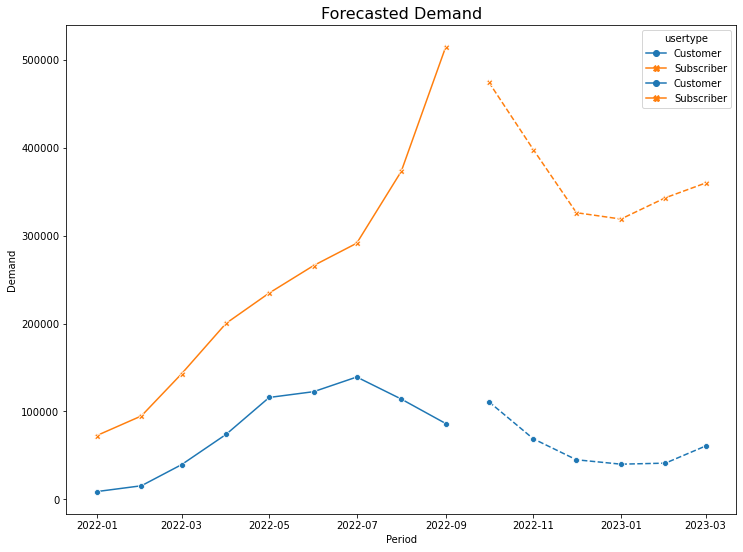

In [111]:
fig, ax = plt.subplots(figsize=(12,9))
sns.lineplot(data = tempplot, x = 'period', y = 'total_demand', hue = 'usertype', ax = ax, 
        style = "usertype", markers = True, dashes = False)
sns.lineplot(data = tempplot, x = 'period', y = 'predicted_demand', hue = 'usertype', ax = ax, 
        style = "usertype", linestyle = '--', markers = True, dashes = False)
plt.xlabel('Period', fontsize = 10)
plt.ylabel('Demand', fontsize = 10)
plt.title('Forecasted Demand', fontsize = 16)
plt.savefig('forecasted_demand_per_usertype.jpg', bbox_inches='tight')

In [82]:
# dataframe for docking stations, csv downloaded from web

docks = pd.read_csv('current_bluebikes_stations.csv', header = 1)
docks.head()

Number                                 Name   Latitude  Longitude  \
0  K32015                       1200 Beacon St  42.344149 -71.114674   
1  W32006                          160 Arsenal  42.364664 -71.175694   
2  A32019                     175 N Harvard St  42.363796 -71.129164   
3  S32035                        191 Beacon St  42.380323 -71.108786   
4  C32094  2 Hummingbird Lane at Olmsted Green  42.288870 -71.095003   

     District Public  Total docks  Deployment Year  
0   Brookline    Yes           15           2021.0  
1   Watertown    Yes           11           2021.0  
2      Boston    Yes           18           2014.0  
3  Somerville    Yes           19           2018.0  
4      Boston    Yes           17           2020.0

In [83]:
# cleaned weather dataset (shared in teams by Hetal, this file contains average temperature in F for each month)

temp = pd.read_csv('WEATHER_DATA-2019_2022.csv')
temp.head()

year  month  temperature
0  2019      1         30.7
1  2019      2         33.5
2  2019      3         39.1
3  2019      4         51.7
4  2019      5         57.8

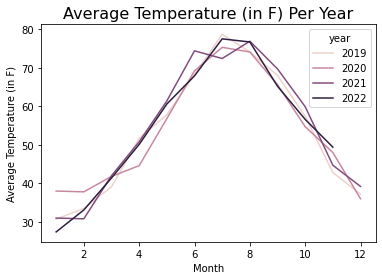

In [88]:
# plotting temperature 

sns.lineplot(data=temp, x = 'month', y = 'temperature', hue = 'year')
plt.xlabel('Month', fontsize = 10)
plt.ylabel('Average Temperature (in F)', fontsize = 10)
plt.title('Average Temperature (in F) Per Year', fontsize = 16)
plt.savefig('Average_temperature_per_year.jpg')

In [89]:
# changing datatype of month column from integer to string for easy merging

temp['month'] = temp.month.map("{:02}".format)
temp['year'] = temp['year'].astype(str)
temp.head()

year month  temperature
0  2019    01         30.7
1  2019    02         33.5
2  2019    03         39.1
3  2019    04         51.7
4  2019    05         57.8

In [90]:
# merging seasonal demand dataframe with weather dataframe 

custtemp = df4.merge(temp, how = 'inner', left_on = ['year', 'month'], right_on = ['year', 'month'])
custtemp.head()

usertype  year month  total_demand     period  temperature
0    Customer  2019    01          4782 2019-01-01         30.7
1  Subscriber  2019    01         65090 2019-01-01         30.7
2    Customer  2019    02          6775 2019-02-01         33.5
3  Subscriber  2019    02         73691 2019-02-01         33.5
4    Customer  2019    03         14523 2019-03-01         39.1

In [91]:
# exporting dataframe to excel file (not necessary)

custtemp.to_csv("enriched_dataset.csv", index = False)

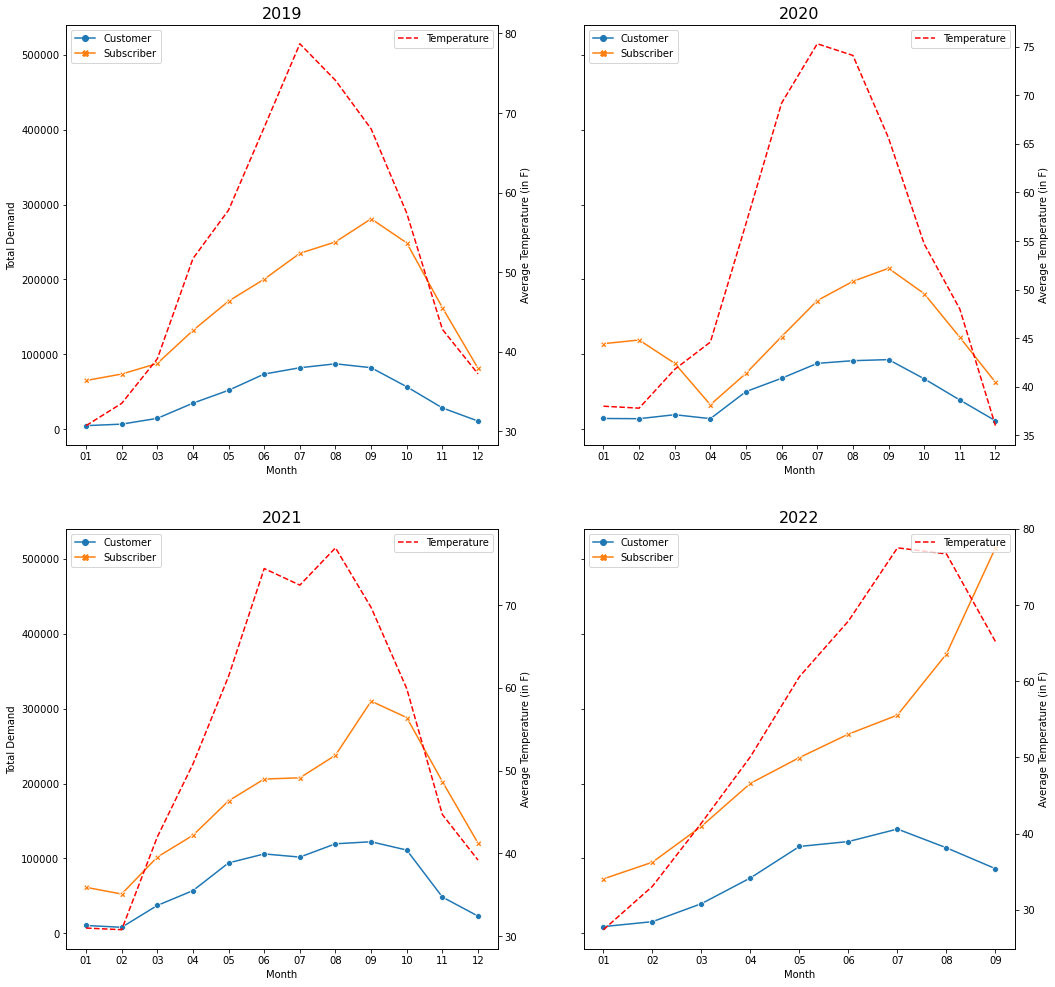

In [92]:
# plotting temperature and seasonal demand in one graph for each year

fig, axes = plt.subplots(2,2, figsize=(17,17), sharey=True)
col_subplots = custtemp['year'].unique()
axes_it = axes.flat

for col, ax in zip(col_subplots, axes_it):
    ax2 = ax.twinx()
    ax.set_title(col, fontsize = 16)
    df = custtemp[custtemp['year'] == col]
    sns.lineplot(data = df, x = 'month', y = 'total_demand', hue = 'usertype', ax = ax, 
                 style = "usertype", markers = True, dashes = False)
    sns.lineplot(data = df[df['usertype']=='Customer'], x = 'month', y = 'temperature', color = "red", 
                 linestyle = '--', markers= True, ax = ax2)
    ax.legend(loc = "upper left")
    ax2.legend(labels = ['Temperature'], loc = "upper right")
    ax.set_xlabel('Month', fontsize = 10)
    ax.set_ylabel( 'Total Demand', fontsize = 10)
    ax2.set_ylabel('Average Temperature (in F)', fontsize = 10)
        
for ax in axes_it:
    ax.axis('off')

plt.savefig('temperature_and_seasonal_demand.jpg')